In [1]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

항공사의 만족도 조사 정보들을 담은 데이터를 통해 각 응답자의 만족 여부 예측

주어진 데이터 이외의 데이터는 사용 금지!

## 데이터 수집
- 규칙: 외부데이터 사용금지  
- train데이터만 사용가능

In [2]:
# 자료받기
data = pd.read_csv('./data/airline_dataset/train.csv')
test = pd.read_csv('./data/airline_dataset/test.csv')
data.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   1  Female  disloyal Customer   22  Business travel       Eco   
1   2  Female     Loyal Customer   37  Business travel  Business   
2   3    Male     Loyal Customer   46  Business travel  Business   
3   4  Female  disloyal Customer   24  Business travel       Eco   
4   5  Female     Loyal Customer   58  Business travel  Business   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0             1599             3                                  0   
1             2810             2                                  4   
2             2622             1                                  1   
3             2348             3                                  3   
4              105             3                                  3   

   Food and drink  ...  Ease of Online booking  On-board service  \
0               3  ...                       4                 5   
1               4  ...                       5                 5   
2               1  ...                       4                 4   
3               3  ...                       3                 2   
4               3  ...                       4                 4   

   Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                 4                 4                4            5   
1                 4                 2                1            5   
2                 4                 4                5            4   
3                 4                 5                3            4   
4                 4                 4                4            4   

   Online boarding  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                4                           0                       0.0   
1                2                          18                      18.0   
2                3                           0                       0.0   
3                3                          10                       2.0   
4                5                           0                       0.0   

   target  
0       0  
1       0  
2       1  
3       0  
4       1  

[5 rows x 24 columns]

## 데이터 전처리
- 목표 데이터 확인 및 필요 데이터 정의
- 결측치 확인 -> 제외로 처리
- 이상치 확인 -> scaler를 통해 이상치 최소화

In [3]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [4]:
# id컬럼 제외
data = data.drop('id', axis = 1)
test = test.drop('id', axis = 1)

data.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Female  disloyal Customer   22  Business travel       Eco             1599   
1  Female     Loyal Customer   37  Business travel  Business             2810   
2    Male     Loyal Customer   46  Business travel  Business             2622   
3  Female  disloyal Customer   24  Business travel       Eco             2348   
4  Female     Loyal Customer   58  Business travel  Business              105   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             3                                  0               3   
1             2                                  4               4   
2             1                                  1               1   
3             3                                  3               3   
4             3                                  3               3   

   Gate location  ...  Ease of Online booking  On-board service  \
0              3  ...                       4                 5   
1              4  ...                       5                 5   
2              1  ...                       4                 4   
3              3  ...                       3                 2   
4              3  ...                       4                 4   

   Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                 4                 4                4            5   
1                 4                 2                1            5   
2                 4                 4                5            4   
3                 4                 5                3            4   
4                 4                 4                4            4   

   Online boarding  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                4                           0                       0.0   
1                2                          18                      18.0   
2                3                           0                       0.0   
3                3                          10                       2.0   
4                5                           0                       0.0   

   target  
0       0  
1       0  
2       1  
3       0  
4       1  

[5 rows x 23 columns]

In [5]:
data.info() #3000개의 레이블 존재, 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

### 결측치 확인

In [6]:
# 결측치 확인 함수
def check_nan(df):
    exist_nan_col = []
    for col in data.columns:
        num_nan = data[col].isnull().sum()
        if num_nan:
            exist_nan_col.append(col)
            print(f'{col}열에는 결측치가 {num_nan}개 있습니다.')
        else:
            print(f'{col}열에는 결측치가 없습니다.')
    return exist_nan_col

In [7]:
check_nan(data)

Gender열에는 결측치가 없습니다.
Customer Type열에는 결측치가 없습니다.
Age열에는 결측치가 없습니다.
Type of Travel열에는 결측치가 없습니다.
Class열에는 결측치가 없습니다.
Flight Distance열에는 결측치가 없습니다.
Seat comfort열에는 결측치가 없습니다.
Departure/Arrival time convenient열에는 결측치가 없습니다.
Food and drink열에는 결측치가 없습니다.
Gate location열에는 결측치가 없습니다.
Inflight wifi service열에는 결측치가 없습니다.
Inflight entertainment열에는 결측치가 없습니다.
Online support열에는 결측치가 없습니다.
Ease of Online booking열에는 결측치가 없습니다.
On-board service열에는 결측치가 없습니다.
Leg room service열에는 결측치가 없습니다.
Baggage handling열에는 결측치가 없습니다.
Checkin service열에는 결측치가 없습니다.
Cleanliness열에는 결측치가 없습니다.
Online boarding열에는 결측치가 없습니다.
Departure Delay in Minutes열에는 결측치가 없습니다.
Arrival Delay in Minutes열에는 결측치가 없습니다.
target열에는 결측치가 없습니다.


[]

### 이상치 확인

In [8]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
target    

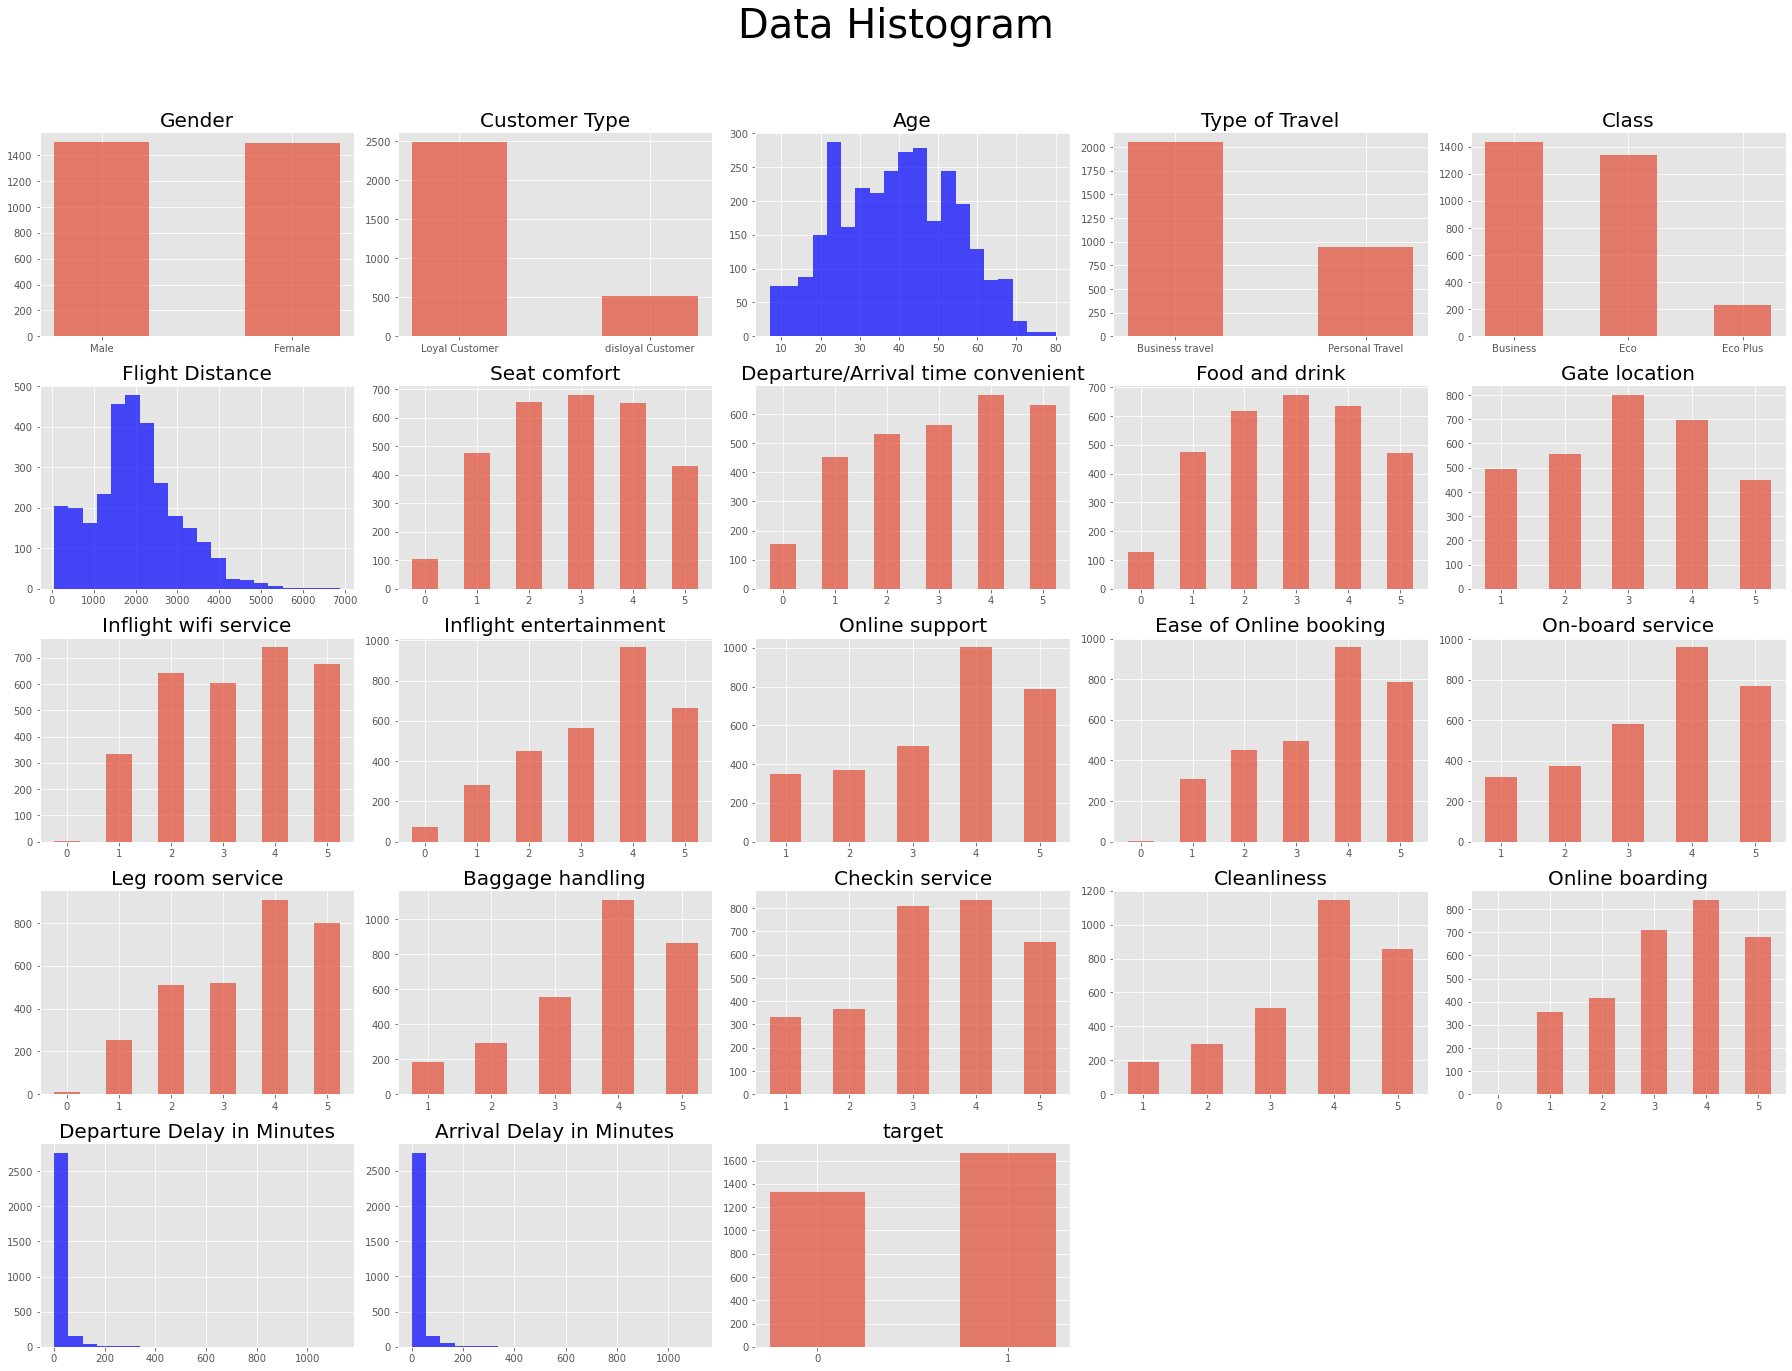

In [9]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = data.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(data[cols[i]].unique()) > 20:
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = data[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 'gender'열의 남녀성비는 거의 50:50으로 보입니다.
- 'Age'열은 정규분포 형태를 보입니다.
- 연속형 변수들은 네거티브 왜도를 보이는 경향이 있습니다.

### feature와 target변수간의 상관관계

#### 범주형 feature와 target 관계

In [10]:
categorical_featurecol = data.columns[data.dtypes == 'object']
len(categorical_featurecol)

4

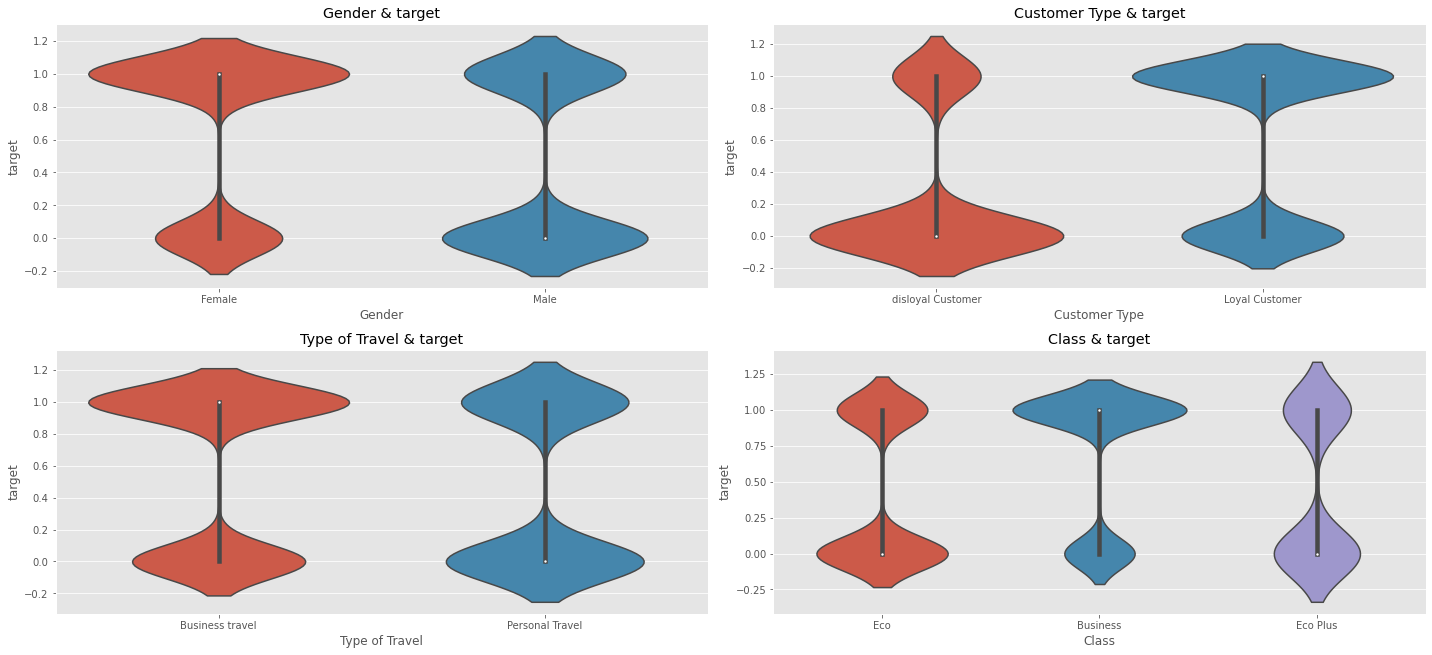

In [11]:
plt.figure(figsize=(20,10))
for i in range(len(categorical_featurecol)):
    plt.subplot(2,2,i+1)
    plt.title(f'{categorical_featurecol[i]} & target')
    plt.xlabel(categorical_featurecol[i])
    plt.ylabel('target')
    sns.violinplot(x = data[categorical_featurecol[i]], y = data['target'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Customer Type에 따라서 target(만족도)가 차이난다.


#### 연속형 feature와 target 관계

In [12]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
target    

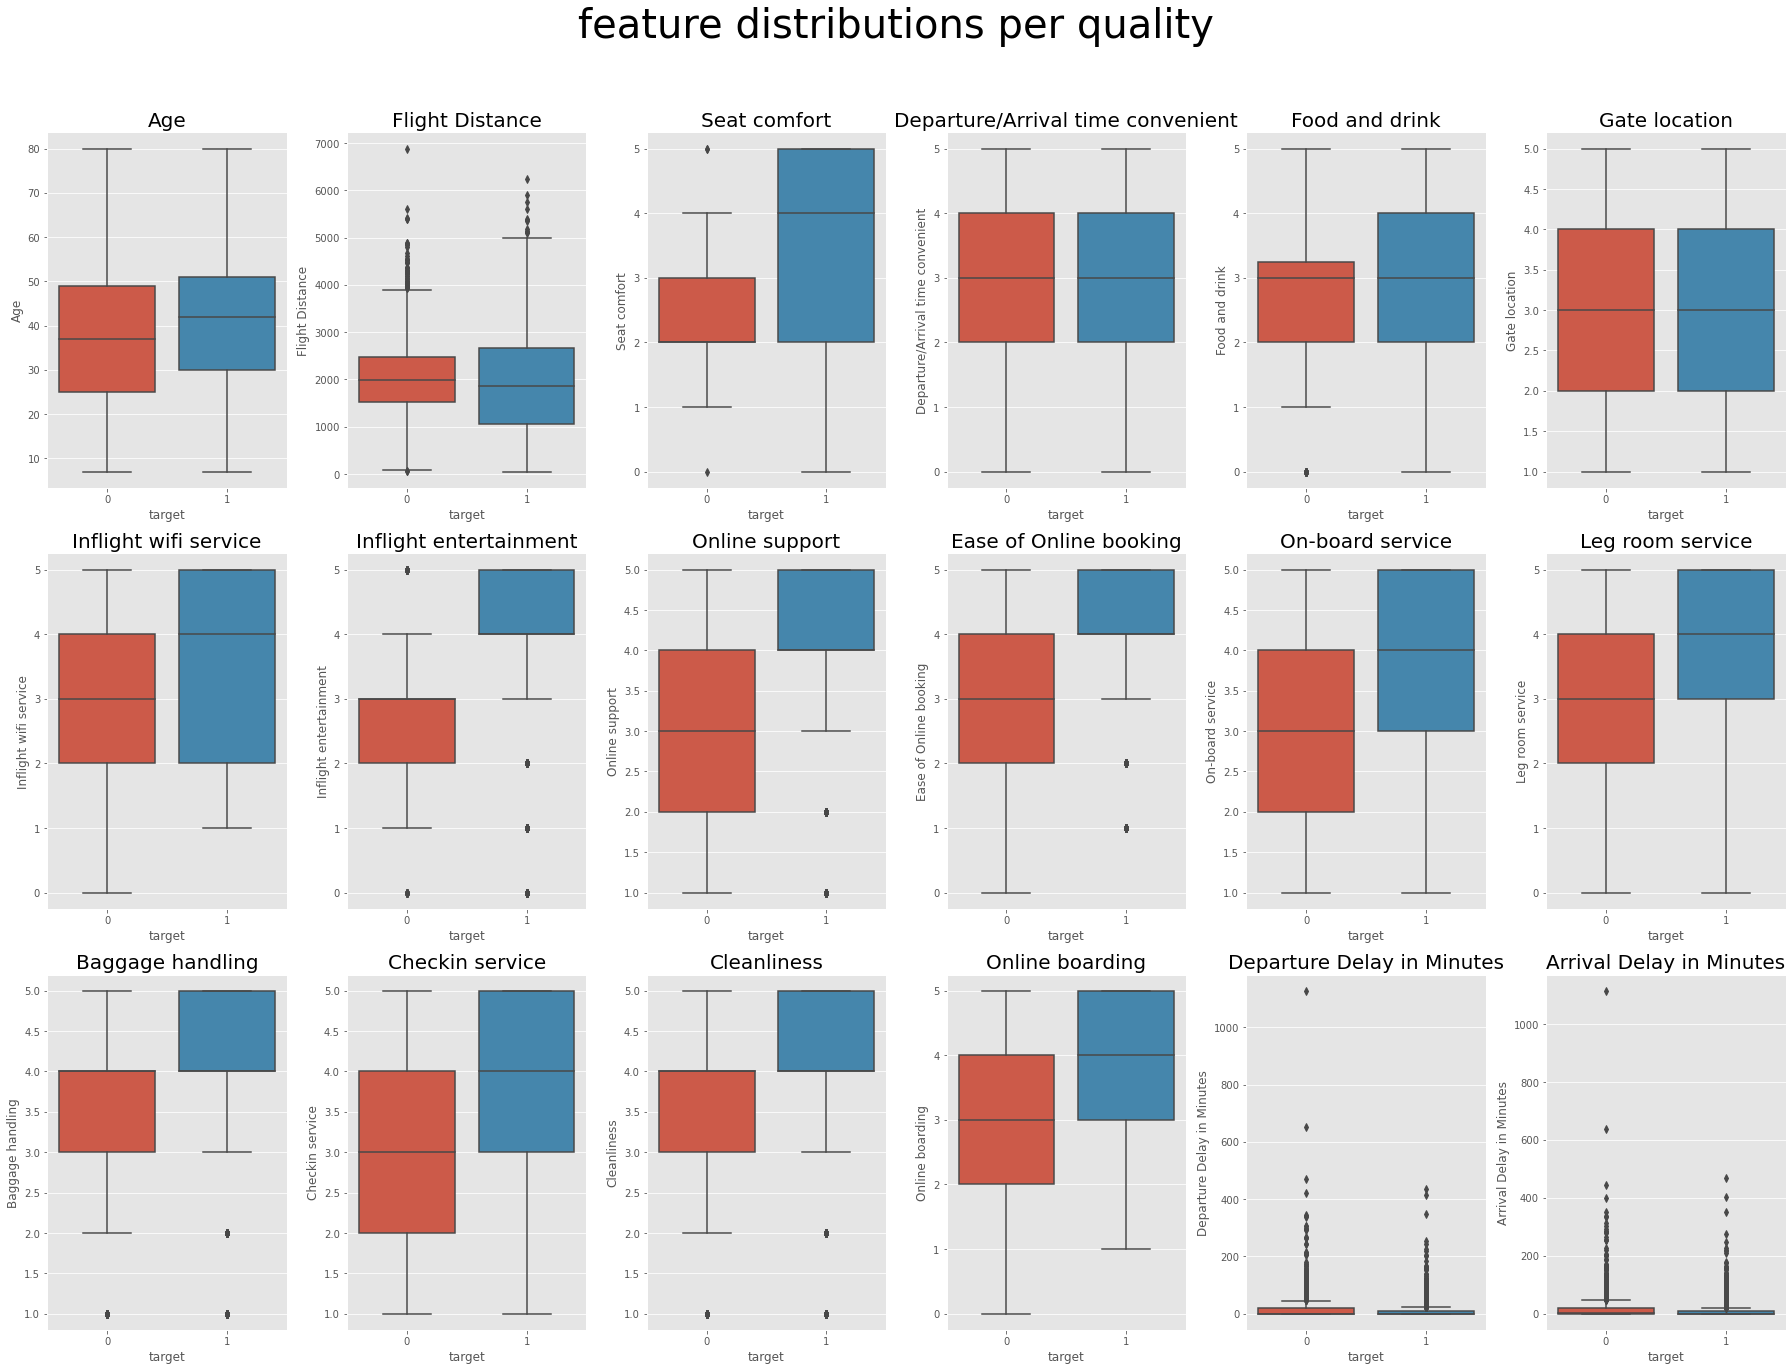

In [13]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- age, Departure/Arrival time convenient, gate location 과 같은 변수는 target 에 영향이 적음(이들은 분석에서 제거해도 무관할 듯 합니다!)

In [14]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

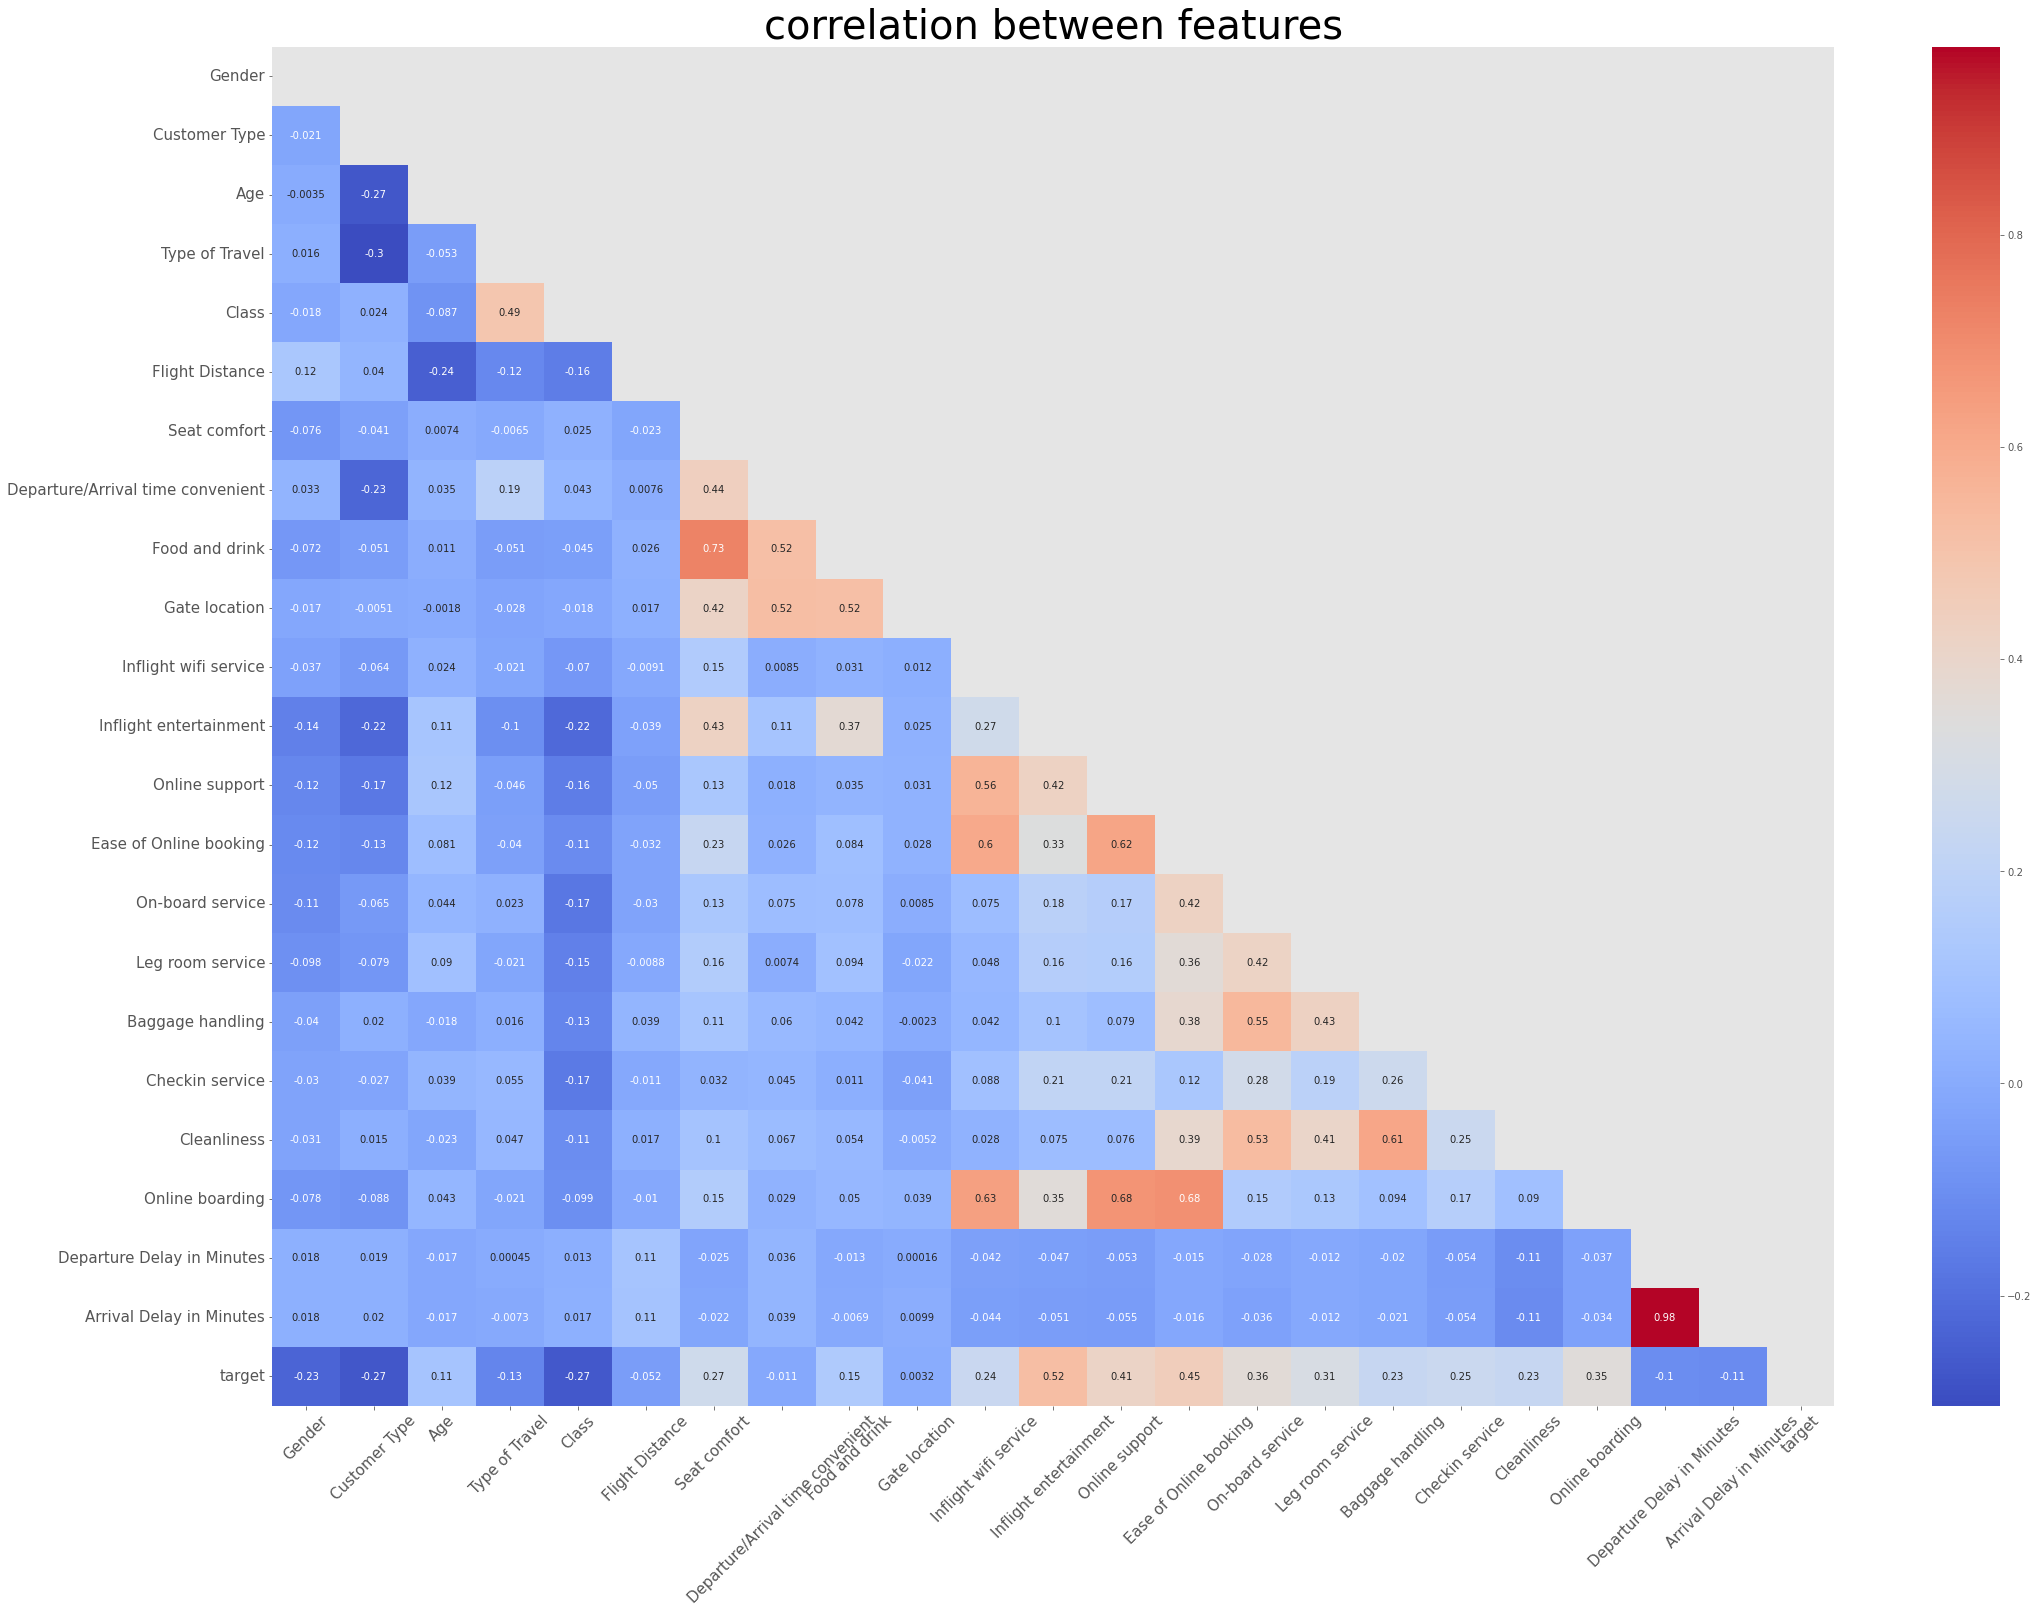

In [15]:
#상관관계 분석도
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

- target은 Inflight entertainment와 가장 높은 상관(0.52)을 보입니다.

- 그 이외에도 Online Support, Ease of Online booking, On-board service 와도 높은 상관을 보입니다.

In [16]:
# 상관계수의 절대값이 0.1이상인 열들
data.columns[np.abs(heat_table['target']) > 0.1]

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Seat comfort', 'Food and drink', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [ ]:
# 다중공산성 ㅊ

In [17]:
# 나이브베이즈..., 디씨전트리..., knn 뭐가 더 있을까 앙상블로...

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [19]:
scaler = RobustScaler() #XGBoost는 이상치에 취약하기 때문에 RobustScaler로 정규화
model = XGBClassifier()

In [20]:
label = data['target']
data = data.drop('target', axis = 1)

In [21]:
# onehotencoding

train = pd.get_dummies(data)
test = pd.get_dummies(test)

In [22]:
# 정규화
def scaled(df):
    temp = scaler.fit_transform(df[df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]])
    df[df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]] = temp
    return df

In [23]:
train = scaled(train)
test = scaled(test)

In [24]:
# 훈련용과 검증용 데이터 나누기
x_train, x_val, y_train, y_val = train_test_split(train, label, test_size= 0.3)

In [25]:
from sklearn.model_selection import GridSearchCV

# 객체 생성, 일단은 트리 100개만 만듦
xgb_model = XGBClassifier()

# 후보 파라미터 선정
params = {'n_estimators':[450,500,550],'max_depth':[7,9], 'min_child_weight':[3,5], 'colsample_bytree':[0.4,0.5,0.6], 'learning_rate' : [0.02, 0.03]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='accuracy', eval_set=[(x_val, y_val)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

[0]	validation_0-auc:0.88255
[1]	validation_0-auc:0.91164
[2]	validation_0-auc:0.94343
[3]	validation_0-auc:0.94222
[4]	validation_0-auc:0.94167
[5]	validation_0-auc:0.94185
[6]	validation_0-auc:0.94073
[7]	validation_0-auc:0.94079
[8]	validation_0-auc:0.94129
[9]	validation_0-auc:0.94588
[10]	validation_0-auc:0.94828
[11]	validation_0-auc:0.94620
[12]	validation_0-auc:0.94682
[13]	validation_0-auc:0.94796
[14]	validation_0-auc:0.94762
[15]	validation_0-auc:0.94890
[16]	validation_0-auc:0.95030
[17]	validation_0-auc:0.95299
[18]	validation_0-auc:0.95279
[19]	validation_0-auc:0.95244
[20]	validation_0-auc:0.95357
[21]	validation_0-auc:0.95548
[22]	validation_0-auc:0.95599
[23]	validation_0-auc:0.95536
[24]	validation_0-auc:0.95461
[25]	validation_0-auc:0.95526
[26]	validation_0-auc:0.95473
[27]	validation_0-auc:0.95556
[28]	validation_0-auc:0.95632
[29]	validation_0-auc:0.95619


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95616
[31]	validation_0-auc:0.95622
[32]	validation_0-auc:0.95677
[33]	validation_0-auc:0.95686
[34]	validation_0-auc:0.95701
[35]	validation_0-auc:0.95675
[36]	validation_0-auc:0.95700
[37]	validation_0-auc:0.95682
[38]	validation_0-auc:0.95710
[39]	validation_0-auc:0.95728
[40]	validation_0-auc:0.95755
[41]	validation_0-auc:0.95805
[42]	validation_0-auc:0.95838
[43]	validation_0-auc:0.95863
[44]	validation_0-auc:0.95894
[45]	validation_0-auc:0.95880
[46]	validation_0-auc:0.95890
[47]	validation_0-auc:0.95913
[48]	validation_0-auc:0.95892
[49]	validation_0-auc:0.95901
[50]	validation_0-auc:0.95938
[51]	validation_0-auc:0.95917
[52]	validation_0-auc:0.95975
[53]	validation_0-auc:0.95995
[54]	validation_0-auc:0.95981
[55]	validation_0-auc:0.96015
[56]	validation_0-auc:0.96002
[57]	validation_0-auc:0.96004
[58]	validation_0-auc:0.96039
[59]	validation_0-auc:0.96074
[60]	validation_0-auc:0.96091
[61]	validation_0-auc:0.96100
[62]	validation_0-auc:0.96113
[63]	valid

[297]	validation_0-auc:0.97257
[298]	validation_0-auc:0.97262
[299]	validation_0-auc:0.97264
[300]	validation_0-auc:0.97264
[301]	validation_0-auc:0.97260
[302]	validation_0-auc:0.97260
[303]	validation_0-auc:0.97258
[304]	validation_0-auc:0.97256
[305]	validation_0-auc:0.97259
[306]	validation_0-auc:0.97253
[307]	validation_0-auc:0.97257
[308]	validation_0-auc:0.97256
[309]	validation_0-auc:0.97259
[310]	validation_0-auc:0.97254
[311]	validation_0-auc:0.97251
[312]	validation_0-auc:0.97248
[313]	validation_0-auc:0.97245
[314]	validation_0-auc:0.97249
[315]	validation_0-auc:0.97246
[316]	validation_0-auc:0.97244
[317]	validation_0-auc:0.97246
[318]	validation_0-auc:0.97249
[319]	validation_0-auc:0.97254
[320]	validation_0-auc:0.97253
[321]	validation_0-auc:0.97260
[322]	validation_0-auc:0.97259
[323]	validation_0-auc:0.97261
[324]	validation_0-auc:0.97263
[325]	validation_0-auc:0.97258
[326]	validation_0-auc:0.97255
[327]	validation_0-auc:0.97258
[328]	validation_0-auc:0.97260
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95440
[30]	validation_0-auc:0.95413
[31]	validation_0-auc:0.95373
[32]	validation_0-auc:0.95433
[33]	validation_0-auc:0.95434
[34]	validation_0-auc:0.95436
[35]	validation_0-auc:0.95395
[36]	validation_0-auc:0.95422
[37]	validation_0-auc:0.95437
[38]	validation_0-auc:0.95478
[39]	validation_0-auc:0.95459
[40]	validation_0-auc:0.95498
[41]	validation_0-auc:0.95530
[42]	validation_0-auc:0.95570
[43]	validation_0-auc:0.95567
[44]	validation_0-auc:0.95603
[45]	validation_0-auc:0.95574
[46]	validation_0-auc:0.95610
[47]	validation_0-auc:0.95668
[48]	validation_0-auc:0.95659
[49]	validation_0-auc:0.95695
[50]	validation_0-auc:0.95750
[51]	validation_0-auc:0.95717
[52]	validation_0-auc:0.95722
[53]	validation_0-auc:0.95748
[54]	validation_0-auc:0.95773
[55]	validation_0-auc:0.95796
[56]	validation_0-auc:0.95794
[57]	validation_0-auc:0.95776
[58]	validation_0-auc:0.95800
[59]	validation_0-auc:0.95863
[60]	validation_0-auc:0.95868
[61]	validation_0-auc:0.95879
[62]	valid

[296]	validation_0-auc:0.96907
[297]	validation_0-auc:0.96906
[298]	validation_0-auc:0.96912
[299]	validation_0-auc:0.96907
[300]	validation_0-auc:0.96909
[301]	validation_0-auc:0.96909
[302]	validation_0-auc:0.96907
[303]	validation_0-auc:0.96921
[304]	validation_0-auc:0.96922
[305]	validation_0-auc:0.96921
[306]	validation_0-auc:0.96923
[307]	validation_0-auc:0.96922
[308]	validation_0-auc:0.96923
[309]	validation_0-auc:0.96920
[310]	validation_0-auc:0.96919
[311]	validation_0-auc:0.96921
[312]	validation_0-auc:0.96924
[313]	validation_0-auc:0.96921
[314]	validation_0-auc:0.96924
[315]	validation_0-auc:0.96926
[316]	validation_0-auc:0.96916
[317]	validation_0-auc:0.96917
[318]	validation_0-auc:0.96913
[319]	validation_0-auc:0.96919
[320]	validation_0-auc:0.96922
[321]	validation_0-auc:0.96917
[322]	validation_0-auc:0.96921
[323]	validation_0-auc:0.96924
[324]	validation_0-auc:0.96930
[325]	validation_0-auc:0.96923
[326]	validation_0-auc:0.96919
[327]	validation_0-auc:0.96922
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95510
[30]	validation_0-auc:0.95529
[31]	validation_0-auc:0.95476
[32]	validation_0-auc:0.95518
[33]	validation_0-auc:0.95501
[34]	validation_0-auc:0.95538
[35]	validation_0-auc:0.95517
[36]	validation_0-auc:0.95539
[37]	validation_0-auc:0.95538
[38]	validation_0-auc:0.95512
[39]	validation_0-auc:0.95525
[40]	validation_0-auc:0.95577
[41]	validation_0-auc:0.95616
[42]	validation_0-auc:0.95654
[43]	validation_0-auc:0.95662
[44]	validation_0-auc:0.95718
[45]	validation_0-auc:0.95722
[46]	validation_0-auc:0.95762
[47]	validation_0-auc:0.95811
[48]	validation_0-auc:0.95809
[49]	validation_0-auc:0.95845
[50]	validation_0-auc:0.95904
[51]	validation_0-auc:0.95888
[52]	validation_0-auc:0.95876
[53]	validation_0-auc:0.95894
[54]	validation_0-auc:0.95887
[55]	validation_0-auc:0.95939
[56]	validation_0-auc:0.95945
[57]	validation_0-auc:0.95922
[58]	validation_0-auc:0.95957
[59]	validation_0-auc:0.96009
[60]	validation_0-auc:0.95995
[61]	validation_0-auc:0.95984
[62]	valid

[296]	validation_0-auc:0.97228
[297]	validation_0-auc:0.97231
[298]	validation_0-auc:0.97241
[299]	validation_0-auc:0.97238
[300]	validation_0-auc:0.97240
[301]	validation_0-auc:0.97239
[302]	validation_0-auc:0.97241
[303]	validation_0-auc:0.97247
[304]	validation_0-auc:0.97246
[305]	validation_0-auc:0.97247
[306]	validation_0-auc:0.97255
[307]	validation_0-auc:0.97253
[308]	validation_0-auc:0.97256
[309]	validation_0-auc:0.97253
[310]	validation_0-auc:0.97257
[311]	validation_0-auc:0.97259
[312]	validation_0-auc:0.97257
[313]	validation_0-auc:0.97255
[314]	validation_0-auc:0.97255
[315]	validation_0-auc:0.97260
[316]	validation_0-auc:0.97255
[317]	validation_0-auc:0.97261
[318]	validation_0-auc:0.97266
[319]	validation_0-auc:0.97267
[320]	validation_0-auc:0.97273
[321]	validation_0-auc:0.97274
[322]	validation_0-auc:0.97279
[323]	validation_0-auc:0.97280
[324]	validation_0-auc:0.97278
[325]	validation_0-auc:0.97275
[326]	validation_0-auc:0.97277
[327]	validation_0-auc:0.97285
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95616
[31]	validation_0-auc:0.95622
[32]	validation_0-auc:0.95677
[33]	validation_0-auc:0.95686
[34]	validation_0-auc:0.95701
[35]	validation_0-auc:0.95675
[36]	validation_0-auc:0.95700
[37]	validation_0-auc:0.95682
[38]	validation_0-auc:0.95710
[39]	validation_0-auc:0.95728
[40]	validation_0-auc:0.95755
[41]	validation_0-auc:0.95805
[42]	validation_0-auc:0.95838
[43]	validation_0-auc:0.95863
[44]	validation_0-auc:0.95894
[45]	validation_0-auc:0.95880
[46]	validation_0-auc:0.95890
[47]	validation_0-auc:0.95913
[48]	validation_0-auc:0.95892
[49]	validation_0-auc:0.95901
[50]	validation_0-auc:0.95938
[51]	validation_0-auc:0.95917
[52]	validation_0-auc:0.95975
[53]	validation_0-auc:0.95995
[54]	validation_0-auc:0.95981
[55]	validation_0-auc:0.96015
[56]	validation_0-auc:0.96002
[57]	validation_0-auc:0.96004
[58]	validation_0-auc:0.96039
[59]	validation_0-auc:0.96074
[60]	validation_0-auc:0.96091
[61]	validation_0-auc:0.96100
[62]	validation_0-auc:0.96113
[63]	valid

[297]	validation_0-auc:0.97257
[298]	validation_0-auc:0.97262
[299]	validation_0-auc:0.97264
[300]	validation_0-auc:0.97264
[301]	validation_0-auc:0.97260
[302]	validation_0-auc:0.97260
[303]	validation_0-auc:0.97258
[304]	validation_0-auc:0.97256
[305]	validation_0-auc:0.97259
[306]	validation_0-auc:0.97253
[307]	validation_0-auc:0.97257
[308]	validation_0-auc:0.97256
[309]	validation_0-auc:0.97259
[310]	validation_0-auc:0.97254
[311]	validation_0-auc:0.97251
[312]	validation_0-auc:0.97248
[313]	validation_0-auc:0.97245
[314]	validation_0-auc:0.97249
[315]	validation_0-auc:0.97246
[316]	validation_0-auc:0.97244
[317]	validation_0-auc:0.97246
[318]	validation_0-auc:0.97249
[319]	validation_0-auc:0.97254
[320]	validation_0-auc:0.97253
[321]	validation_0-auc:0.97260
[322]	validation_0-auc:0.97259
[323]	validation_0-auc:0.97261
[324]	validation_0-auc:0.97263
[325]	validation_0-auc:0.97258
[326]	validation_0-auc:0.97255
[327]	validation_0-auc:0.97258
[328]	validation_0-auc:0.97260
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95373
[32]	validation_0-auc:0.95433
[33]	validation_0-auc:0.95434
[34]	validation_0-auc:0.95436
[35]	validation_0-auc:0.95395
[36]	validation_0-auc:0.95422
[37]	validation_0-auc:0.95437
[38]	validation_0-auc:0.95478
[39]	validation_0-auc:0.95459
[40]	validation_0-auc:0.95498
[41]	validation_0-auc:0.95530
[42]	validation_0-auc:0.95570
[43]	validation_0-auc:0.95567
[44]	validation_0-auc:0.95603
[45]	validation_0-auc:0.95574
[46]	validation_0-auc:0.95610
[47]	validation_0-auc:0.95668
[48]	validation_0-auc:0.95659
[49]	validation_0-auc:0.95695
[50]	validation_0-auc:0.95750
[51]	validation_0-auc:0.95717
[52]	validation_0-auc:0.95722
[53]	validation_0-auc:0.95748
[54]	validation_0-auc:0.95773
[55]	validation_0-auc:0.95796
[56]	validation_0-auc:0.95794
[57]	validation_0-auc:0.95776
[58]	validation_0-auc:0.95800
[59]	validation_0-auc:0.95863
[60]	validation_0-auc:0.95868
[61]	validation_0-auc:0.95879
[62]	validation_0-auc:0.95893
[63]	validation_0-auc:0.95899
[64]	valid

[298]	validation_0-auc:0.96912
[299]	validation_0-auc:0.96907
[300]	validation_0-auc:0.96909
[301]	validation_0-auc:0.96909
[302]	validation_0-auc:0.96907
[303]	validation_0-auc:0.96921
[304]	validation_0-auc:0.96922
[305]	validation_0-auc:0.96921
[306]	validation_0-auc:0.96923
[307]	validation_0-auc:0.96922
[308]	validation_0-auc:0.96923
[309]	validation_0-auc:0.96920
[310]	validation_0-auc:0.96919
[311]	validation_0-auc:0.96921
[312]	validation_0-auc:0.96924
[313]	validation_0-auc:0.96921
[314]	validation_0-auc:0.96924
[315]	validation_0-auc:0.96926
[316]	validation_0-auc:0.96916
[317]	validation_0-auc:0.96917
[318]	validation_0-auc:0.96913
[319]	validation_0-auc:0.96919
[320]	validation_0-auc:0.96922
[321]	validation_0-auc:0.96917
[322]	validation_0-auc:0.96921
[323]	validation_0-auc:0.96924
[324]	validation_0-auc:0.96930
[325]	validation_0-auc:0.96923
[326]	validation_0-auc:0.96919
[327]	validation_0-auc:0.96922
[328]	validation_0-auc:0.96921
[329]	validation_0-auc:0.96918
[330]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95510
[30]	validation_0-auc:0.95529
[31]	validation_0-auc:0.95476
[32]	validation_0-auc:0.95518
[33]	validation_0-auc:0.95501
[34]	validation_0-auc:0.95538
[35]	validation_0-auc:0.95517
[36]	validation_0-auc:0.95539
[37]	validation_0-auc:0.95538
[38]	validation_0-auc:0.95512
[39]	validation_0-auc:0.95525
[40]	validation_0-auc:0.95577
[41]	validation_0-auc:0.95616
[42]	validation_0-auc:0.95654
[43]	validation_0-auc:0.95662
[44]	validation_0-auc:0.95718
[45]	validation_0-auc:0.95722
[46]	validation_0-auc:0.95762
[47]	validation_0-auc:0.95811
[48]	validation_0-auc:0.95809
[49]	validation_0-auc:0.95845
[50]	validation_0-auc:0.95904
[51]	validation_0-auc:0.95888
[52]	validation_0-auc:0.95876
[53]	validation_0-auc:0.95894
[54]	validation_0-auc:0.95887
[55]	validation_0-auc:0.95939
[56]	validation_0-auc:0.95945
[57]	validation_0-auc:0.95922
[58]	validation_0-auc:0.95957
[59]	validation_0-auc:0.96009
[60]	validation_0-auc:0.95995
[61]	validation_0-auc:0.95984
[62]	valid

[296]	validation_0-auc:0.97228
[297]	validation_0-auc:0.97231
[298]	validation_0-auc:0.97241
[299]	validation_0-auc:0.97238
[300]	validation_0-auc:0.97240
[301]	validation_0-auc:0.97239
[302]	validation_0-auc:0.97241
[303]	validation_0-auc:0.97247
[304]	validation_0-auc:0.97246
[305]	validation_0-auc:0.97247
[306]	validation_0-auc:0.97255
[307]	validation_0-auc:0.97253
[308]	validation_0-auc:0.97256
[309]	validation_0-auc:0.97253
[310]	validation_0-auc:0.97257
[311]	validation_0-auc:0.97259
[312]	validation_0-auc:0.97257
[313]	validation_0-auc:0.97255
[314]	validation_0-auc:0.97255
[315]	validation_0-auc:0.97260
[316]	validation_0-auc:0.97255
[317]	validation_0-auc:0.97261
[318]	validation_0-auc:0.97266
[319]	validation_0-auc:0.97267
[320]	validation_0-auc:0.97273
[321]	validation_0-auc:0.97274
[322]	validation_0-auc:0.97279
[323]	validation_0-auc:0.97280
[324]	validation_0-auc:0.97278
[325]	validation_0-auc:0.97275
[326]	validation_0-auc:0.97277
[327]	validation_0-auc:0.97285
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95622
[32]	validation_0-auc:0.95677
[33]	validation_0-auc:0.95686
[34]	validation_0-auc:0.95701
[35]	validation_0-auc:0.95675
[36]	validation_0-auc:0.95700
[37]	validation_0-auc:0.95682
[38]	validation_0-auc:0.95710
[39]	validation_0-auc:0.95728
[40]	validation_0-auc:0.95755
[41]	validation_0-auc:0.95805
[42]	validation_0-auc:0.95838
[43]	validation_0-auc:0.95863
[44]	validation_0-auc:0.95894
[45]	validation_0-auc:0.95880
[46]	validation_0-auc:0.95890
[47]	validation_0-auc:0.95913
[48]	validation_0-auc:0.95892
[49]	validation_0-auc:0.95901
[50]	validation_0-auc:0.95938
[51]	validation_0-auc:0.95917
[52]	validation_0-auc:0.95975
[53]	validation_0-auc:0.95995
[54]	validation_0-auc:0.95981
[55]	validation_0-auc:0.96015
[56]	validation_0-auc:0.96002
[57]	validation_0-auc:0.96004
[58]	validation_0-auc:0.96039
[59]	validation_0-auc:0.96074
[60]	validation_0-auc:0.96091
[61]	validation_0-auc:0.96100
[62]	validation_0-auc:0.96113
[63]	validation_0-auc:0.96117
[64]	valid

[298]	validation_0-auc:0.97262
[299]	validation_0-auc:0.97264
[300]	validation_0-auc:0.97264
[301]	validation_0-auc:0.97260
[302]	validation_0-auc:0.97260
[303]	validation_0-auc:0.97258
[304]	validation_0-auc:0.97256
[305]	validation_0-auc:0.97259
[306]	validation_0-auc:0.97253
[307]	validation_0-auc:0.97257
[308]	validation_0-auc:0.97256
[309]	validation_0-auc:0.97259
[310]	validation_0-auc:0.97254
[311]	validation_0-auc:0.97251
[312]	validation_0-auc:0.97248
[313]	validation_0-auc:0.97245
[314]	validation_0-auc:0.97249
[315]	validation_0-auc:0.97246
[316]	validation_0-auc:0.97244
[317]	validation_0-auc:0.97246
[318]	validation_0-auc:0.97249
[319]	validation_0-auc:0.97254
[320]	validation_0-auc:0.97253
[321]	validation_0-auc:0.97260
[322]	validation_0-auc:0.97259
[323]	validation_0-auc:0.97261
[324]	validation_0-auc:0.97263
[325]	validation_0-auc:0.97258
[326]	validation_0-auc:0.97255
[327]	validation_0-auc:0.97258
[328]	validation_0-auc:0.97260
[329]	validation_0-auc:0.97260
[330]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95466
[29]	validation_0-auc:0.95440
[30]	validation_0-auc:0.95413
[31]	validation_0-auc:0.95373
[32]	validation_0-auc:0.95433
[33]	validation_0-auc:0.95434
[34]	validation_0-auc:0.95436
[35]	validation_0-auc:0.95395
[36]	validation_0-auc:0.95422
[37]	validation_0-auc:0.95437
[38]	validation_0-auc:0.95478
[39]	validation_0-auc:0.95459
[40]	validation_0-auc:0.95498
[41]	validation_0-auc:0.95530
[42]	validation_0-auc:0.95570
[43]	validation_0-auc:0.95567
[44]	validation_0-auc:0.95603
[45]	validation_0-auc:0.95574
[46]	validation_0-auc:0.95610
[47]	validation_0-auc:0.95668
[48]	validation_0-auc:0.95659
[49]	validation_0-auc:0.95695
[50]	validation_0-auc:0.95750
[51]	validation_0-auc:0.95717
[52]	validation_0-auc:0.95722
[53]	validation_0-auc:0.95748
[54]	validation_0-auc:0.95773
[55]	validation_0-auc:0.95796
[56]	validation_0-auc:0.95794
[57]	validation_0-auc:0.95776
[58]	validation_0-auc:0.95800
[59]	validation_0-auc:0.95863
[60]	validation_0-auc:0.95868
[61]	valid

[295]	validation_0-auc:0.96912
[296]	validation_0-auc:0.96907
[297]	validation_0-auc:0.96906
[298]	validation_0-auc:0.96912
[299]	validation_0-auc:0.96907
[300]	validation_0-auc:0.96909
[301]	validation_0-auc:0.96909
[302]	validation_0-auc:0.96907
[303]	validation_0-auc:0.96921
[304]	validation_0-auc:0.96922
[305]	validation_0-auc:0.96921
[306]	validation_0-auc:0.96923
[307]	validation_0-auc:0.96922
[308]	validation_0-auc:0.96923
[309]	validation_0-auc:0.96920
[310]	validation_0-auc:0.96919
[311]	validation_0-auc:0.96921
[312]	validation_0-auc:0.96924
[313]	validation_0-auc:0.96921
[314]	validation_0-auc:0.96924
[315]	validation_0-auc:0.96926
[316]	validation_0-auc:0.96916
[317]	validation_0-auc:0.96917
[318]	validation_0-auc:0.96913
[319]	validation_0-auc:0.96919
[320]	validation_0-auc:0.96922
[321]	validation_0-auc:0.96917
[322]	validation_0-auc:0.96921
[323]	validation_0-auc:0.96924
[324]	validation_0-auc:0.96930
[325]	validation_0-auc:0.96923
[326]	validation_0-auc:0.96919
[327]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95529
[31]	validation_0-auc:0.95476
[32]	validation_0-auc:0.95518
[33]	validation_0-auc:0.95501
[34]	validation_0-auc:0.95538
[35]	validation_0-auc:0.95517
[36]	validation_0-auc:0.95539
[37]	validation_0-auc:0.95538
[38]	validation_0-auc:0.95512
[39]	validation_0-auc:0.95525
[40]	validation_0-auc:0.95577
[41]	validation_0-auc:0.95616
[42]	validation_0-auc:0.95654
[43]	validation_0-auc:0.95662
[44]	validation_0-auc:0.95718
[45]	validation_0-auc:0.95722
[46]	validation_0-auc:0.95762
[47]	validation_0-auc:0.95811
[48]	validation_0-auc:0.95809
[49]	validation_0-auc:0.95845
[50]	validation_0-auc:0.95904
[51]	validation_0-auc:0.95888
[52]	validation_0-auc:0.95876
[53]	validation_0-auc:0.95894
[54]	validation_0-auc:0.95887
[55]	validation_0-auc:0.95939
[56]	validation_0-auc:0.95945
[57]	validation_0-auc:0.95922
[58]	validation_0-auc:0.95957
[59]	validation_0-auc:0.96009
[60]	validation_0-auc:0.95995
[61]	validation_0-auc:0.95984
[62]	validation_0-auc:0.96007
[63]	valid

[297]	validation_0-auc:0.97231
[298]	validation_0-auc:0.97241
[299]	validation_0-auc:0.97238
[300]	validation_0-auc:0.97240
[301]	validation_0-auc:0.97239
[302]	validation_0-auc:0.97241
[303]	validation_0-auc:0.97247
[304]	validation_0-auc:0.97246
[305]	validation_0-auc:0.97247
[306]	validation_0-auc:0.97255
[307]	validation_0-auc:0.97253
[308]	validation_0-auc:0.97256
[309]	validation_0-auc:0.97253
[310]	validation_0-auc:0.97257
[311]	validation_0-auc:0.97259
[312]	validation_0-auc:0.97257
[313]	validation_0-auc:0.97255
[314]	validation_0-auc:0.97255
[315]	validation_0-auc:0.97260
[316]	validation_0-auc:0.97255
[317]	validation_0-auc:0.97261
[318]	validation_0-auc:0.97266
[319]	validation_0-auc:0.97267
[320]	validation_0-auc:0.97273
[321]	validation_0-auc:0.97274
[322]	validation_0-auc:0.97279
[323]	validation_0-auc:0.97280
[324]	validation_0-auc:0.97278
[325]	validation_0-auc:0.97275
[326]	validation_0-auc:0.97277
[327]	validation_0-auc:0.97285
[328]	validation_0-auc:0.97281
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95444
[34]	validation_0-auc:0.95434
[35]	validation_0-auc:0.95388
[36]	validation_0-auc:0.95398
[37]	validation_0-auc:0.95377
[38]	validation_0-auc:0.95394
[39]	validation_0-auc:0.95414
[40]	validation_0-auc:0.95466
[41]	validation_0-auc:0.95539
[42]	validation_0-auc:0.95599
[43]	validation_0-auc:0.95624
[44]	validation_0-auc:0.95617
[45]	validation_0-auc:0.95594
[46]	validation_0-auc:0.95603
[47]	validation_0-auc:0.95605
[48]	validation_0-auc:0.95596
[49]	validation_0-auc:0.95623
[50]	validation_0-auc:0.95684
[51]	validation_0-auc:0.95646
[52]	validation_0-auc:0.95681
[53]	validation_0-auc:0.95691
[54]	validation_0-auc:0.95678
[55]	validation_0-auc:0.95737
[56]	validation_0-auc:0.95723
[57]	validation_0-auc:0.95715
[58]	validation_0-auc:0.95757
[59]	validation_0-auc:0.95790
[60]	validation_0-auc:0.95795
[61]	validation_0-auc:0.95776
[62]	validation_0-auc:0.95803
[63]	validation_0-auc:0.95807
[64]	validation_0-auc:0.95782
[65]	validation_0-auc:0.95786
[66]	valid

[300]	validation_0-auc:0.97076
[301]	validation_0-auc:0.97074
[302]	validation_0-auc:0.97077
[303]	validation_0-auc:0.97081
[304]	validation_0-auc:0.97080
[305]	validation_0-auc:0.97079
[306]	validation_0-auc:0.97079
[307]	validation_0-auc:0.97085
[308]	validation_0-auc:0.97081
[309]	validation_0-auc:0.97086
[310]	validation_0-auc:0.97088
[311]	validation_0-auc:0.97088
[312]	validation_0-auc:0.97086
[313]	validation_0-auc:0.97077
[314]	validation_0-auc:0.97083
[315]	validation_0-auc:0.97083
[316]	validation_0-auc:0.97080
[317]	validation_0-auc:0.97081
[318]	validation_0-auc:0.97081
[319]	validation_0-auc:0.97079
[320]	validation_0-auc:0.97074
[321]	validation_0-auc:0.97072
[322]	validation_0-auc:0.97074
[323]	validation_0-auc:0.97069
[324]	validation_0-auc:0.97071
[325]	validation_0-auc:0.97072
[326]	validation_0-auc:0.97078
[327]	validation_0-auc:0.97084
[328]	validation_0-auc:0.97084
[329]	validation_0-auc:0.97086
[330]	validation_0-auc:0.97090
[331]	validation_0-auc:0.97086
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-auc:0.95271
[39]	validation_0-auc:0.95246
[40]	validation_0-auc:0.95300
[41]	validation_0-auc:0.95326
[42]	validation_0-auc:0.95374
[43]	validation_0-auc:0.95398
[44]	validation_0-auc:0.95445
[45]	validation_0-auc:0.95423
[46]	validation_0-auc:0.95446
[47]	validation_0-auc:0.95487
[48]	validation_0-auc:0.95493
[49]	validation_0-auc:0.95538
[50]	validation_0-auc:0.95595
[51]	validation_0-auc:0.95555
[52]	validation_0-auc:0.95580
[53]	validation_0-auc:0.95612
[54]	validation_0-auc:0.95590
[55]	validation_0-auc:0.95636
[56]	validation_0-auc:0.95615
[57]	validation_0-auc:0.95600
[58]	validation_0-auc:0.95634
[59]	validation_0-auc:0.95687
[60]	validation_0-auc:0.95685
[61]	validation_0-auc:0.95702
[62]	validation_0-auc:0.95719
[63]	validation_0-auc:0.95731
[64]	validation_0-auc:0.95705
[65]	validation_0-auc:0.95733
[66]	validation_0-auc:0.95776
[67]	validation_0-auc:0.95794
[68]	validation_0-auc:0.95785
[69]	validation_0-auc:0.95798
[70]	validation_0-auc:0.95858
[71]	valid

[305]	validation_0-auc:0.96812
[306]	validation_0-auc:0.96810
[307]	validation_0-auc:0.96813
[308]	validation_0-auc:0.96815
[309]	validation_0-auc:0.96816
[310]	validation_0-auc:0.96815
[311]	validation_0-auc:0.96822
[312]	validation_0-auc:0.96820
[313]	validation_0-auc:0.96817
[314]	validation_0-auc:0.96816
[315]	validation_0-auc:0.96821
[316]	validation_0-auc:0.96815
[317]	validation_0-auc:0.96819
[318]	validation_0-auc:0.96815
[319]	validation_0-auc:0.96820
[320]	validation_0-auc:0.96822
[321]	validation_0-auc:0.96821
[322]	validation_0-auc:0.96822
[323]	validation_0-auc:0.96829
[324]	validation_0-auc:0.96827
[325]	validation_0-auc:0.96828
[326]	validation_0-auc:0.96831
[327]	validation_0-auc:0.96834
[328]	validation_0-auc:0.96831
[329]	validation_0-auc:0.96833
[330]	validation_0-auc:0.96836
[331]	validation_0-auc:0.96839
[332]	validation_0-auc:0.96833
[333]	validation_0-auc:0.96829
[334]	validation_0-auc:0.96832
[335]	validation_0-auc:0.96839
[336]	validation_0-auc:0.96841
[337]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.94572
[37]	validation_0-auc:0.94573
[38]	validation_0-auc:0.94582
[39]	validation_0-auc:0.94606
[40]	validation_0-auc:0.94678
[41]	validation_0-auc:0.94735
[42]	validation_0-auc:0.94776
[43]	validation_0-auc:0.94781
[44]	validation_0-auc:0.94837
[45]	validation_0-auc:0.94810
[46]	validation_0-auc:0.94842
[47]	validation_0-auc:0.94922
[48]	validation_0-auc:0.94922
[49]	validation_0-auc:0.95001
[50]	validation_0-auc:0.95071
[51]	validation_0-auc:0.95073
[52]	validation_0-auc:0.95086
[53]	validation_0-auc:0.95118
[54]	validation_0-auc:0.95083
[55]	validation_0-auc:0.95139
[56]	validation_0-auc:0.95157
[57]	validation_0-auc:0.95146
[58]	validation_0-auc:0.95186
[59]	validation_0-auc:0.95216
[60]	validation_0-auc:0.95225
[61]	validation_0-auc:0.95216
[62]	validation_0-auc:0.95261
[63]	validation_0-auc:0.95291
[64]	validation_0-auc:0.95267
[65]	validation_0-auc:0.95296
[66]	validation_0-auc:0.95321
[67]	validation_0-auc:0.95358
[68]	validation_0-auc:0.95377
[69]	valid

[303]	validation_0-auc:0.97023
[304]	validation_0-auc:0.97022
[305]	validation_0-auc:0.97025
[306]	validation_0-auc:0.97024
[307]	validation_0-auc:0.97019
[308]	validation_0-auc:0.97015
[309]	validation_0-auc:0.97024
[310]	validation_0-auc:0.97032
[311]	validation_0-auc:0.97034
[312]	validation_0-auc:0.97035
[313]	validation_0-auc:0.97036
[314]	validation_0-auc:0.97037
[315]	validation_0-auc:0.97039
[316]	validation_0-auc:0.97036
[317]	validation_0-auc:0.97039
[318]	validation_0-auc:0.97040
[319]	validation_0-auc:0.97044
[320]	validation_0-auc:0.97047
[321]	validation_0-auc:0.97046
[322]	validation_0-auc:0.97050
[323]	validation_0-auc:0.97049
[324]	validation_0-auc:0.97051
[325]	validation_0-auc:0.97047
[326]	validation_0-auc:0.97047
[327]	validation_0-auc:0.97054
[328]	validation_0-auc:0.97049
[329]	validation_0-auc:0.97059
[330]	validation_0-auc:0.97057
[331]	validation_0-auc:0.97049
[332]	validation_0-auc:0.97051
[333]	validation_0-auc:0.97049
[334]	validation_0-auc:0.97059
[335]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95398
[37]	validation_0-auc:0.95377
[38]	validation_0-auc:0.95394
[39]	validation_0-auc:0.95414
[40]	validation_0-auc:0.95466
[41]	validation_0-auc:0.95539
[42]	validation_0-auc:0.95599
[43]	validation_0-auc:0.95624
[44]	validation_0-auc:0.95617
[45]	validation_0-auc:0.95594
[46]	validation_0-auc:0.95603
[47]	validation_0-auc:0.95605
[48]	validation_0-auc:0.95596
[49]	validation_0-auc:0.95623
[50]	validation_0-auc:0.95684
[51]	validation_0-auc:0.95646
[52]	validation_0-auc:0.95681
[53]	validation_0-auc:0.95691
[54]	validation_0-auc:0.95678
[55]	validation_0-auc:0.95737
[56]	validation_0-auc:0.95723
[57]	validation_0-auc:0.95715
[58]	validation_0-auc:0.95757
[59]	validation_0-auc:0.95790
[60]	validation_0-auc:0.95795
[61]	validation_0-auc:0.95776
[62]	validation_0-auc:0.95803
[63]	validation_0-auc:0.95807
[64]	validation_0-auc:0.95782
[65]	validation_0-auc:0.95786
[66]	validation_0-auc:0.95817
[67]	validation_0-auc:0.95865
[68]	validation_0-auc:0.95870
[69]	valid

[303]	validation_0-auc:0.97081
[304]	validation_0-auc:0.97080
[305]	validation_0-auc:0.97079
[306]	validation_0-auc:0.97079
[307]	validation_0-auc:0.97085
[308]	validation_0-auc:0.97081
[309]	validation_0-auc:0.97086
[310]	validation_0-auc:0.97088
[311]	validation_0-auc:0.97088
[312]	validation_0-auc:0.97086
[313]	validation_0-auc:0.97077
[314]	validation_0-auc:0.97083
[315]	validation_0-auc:0.97083
[316]	validation_0-auc:0.97080
[317]	validation_0-auc:0.97081
[318]	validation_0-auc:0.97081
[319]	validation_0-auc:0.97079
[320]	validation_0-auc:0.97074
[321]	validation_0-auc:0.97072
[322]	validation_0-auc:0.97074
[323]	validation_0-auc:0.97069
[324]	validation_0-auc:0.97071
[325]	validation_0-auc:0.97072
[326]	validation_0-auc:0.97078
[327]	validation_0-auc:0.97084
[328]	validation_0-auc:0.97084
[329]	validation_0-auc:0.97086
[330]	validation_0-auc:0.97090
[331]	validation_0-auc:0.97086
[332]	validation_0-auc:0.97088
[333]	validation_0-auc:0.97081
[334]	validation_0-auc:0.97084
[335]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95238
[33]	validation_0-auc:0.95231
[34]	validation_0-auc:0.95235
[35]	validation_0-auc:0.95188
[36]	validation_0-auc:0.95204
[37]	validation_0-auc:0.95231
[38]	validation_0-auc:0.95271
[39]	validation_0-auc:0.95246
[40]	validation_0-auc:0.95300
[41]	validation_0-auc:0.95326
[42]	validation_0-auc:0.95374
[43]	validation_0-auc:0.95398
[44]	validation_0-auc:0.95445
[45]	validation_0-auc:0.95423
[46]	validation_0-auc:0.95446
[47]	validation_0-auc:0.95487
[48]	validation_0-auc:0.95493
[49]	validation_0-auc:0.95538
[50]	validation_0-auc:0.95595
[51]	validation_0-auc:0.95555
[52]	validation_0-auc:0.95580
[53]	validation_0-auc:0.95612
[54]	validation_0-auc:0.95590
[55]	validation_0-auc:0.95636
[56]	validation_0-auc:0.95615
[57]	validation_0-auc:0.95600
[58]	validation_0-auc:0.95634
[59]	validation_0-auc:0.95687
[60]	validation_0-auc:0.95685
[61]	validation_0-auc:0.95702
[62]	validation_0-auc:0.95719
[63]	validation_0-auc:0.95731
[64]	validation_0-auc:0.95705
[65]	valid

[299]	validation_0-auc:0.96795
[300]	validation_0-auc:0.96800
[301]	validation_0-auc:0.96804
[302]	validation_0-auc:0.96810
[303]	validation_0-auc:0.96810
[304]	validation_0-auc:0.96807
[305]	validation_0-auc:0.96812
[306]	validation_0-auc:0.96810
[307]	validation_0-auc:0.96813
[308]	validation_0-auc:0.96815
[309]	validation_0-auc:0.96816
[310]	validation_0-auc:0.96815
[311]	validation_0-auc:0.96822
[312]	validation_0-auc:0.96820
[313]	validation_0-auc:0.96817
[314]	validation_0-auc:0.96816
[315]	validation_0-auc:0.96821
[316]	validation_0-auc:0.96815
[317]	validation_0-auc:0.96819
[318]	validation_0-auc:0.96815
[319]	validation_0-auc:0.96820
[320]	validation_0-auc:0.96822
[321]	validation_0-auc:0.96821
[322]	validation_0-auc:0.96822
[323]	validation_0-auc:0.96829
[324]	validation_0-auc:0.96827
[325]	validation_0-auc:0.96828
[326]	validation_0-auc:0.96831
[327]	validation_0-auc:0.96834
[328]	validation_0-auc:0.96831
[329]	validation_0-auc:0.96833
[330]	validation_0-auc:0.96836
[331]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-auc:0.94573
[38]	validation_0-auc:0.94582
[39]	validation_0-auc:0.94606
[40]	validation_0-auc:0.94678
[41]	validation_0-auc:0.94735
[42]	validation_0-auc:0.94776
[43]	validation_0-auc:0.94781
[44]	validation_0-auc:0.94837
[45]	validation_0-auc:0.94810
[46]	validation_0-auc:0.94842
[47]	validation_0-auc:0.94922
[48]	validation_0-auc:0.94922
[49]	validation_0-auc:0.95001
[50]	validation_0-auc:0.95071
[51]	validation_0-auc:0.95073
[52]	validation_0-auc:0.95086
[53]	validation_0-auc:0.95118
[54]	validation_0-auc:0.95083
[55]	validation_0-auc:0.95139
[56]	validation_0-auc:0.95157
[57]	validation_0-auc:0.95146
[58]	validation_0-auc:0.95186
[59]	validation_0-auc:0.95216
[60]	validation_0-auc:0.95225
[61]	validation_0-auc:0.95216
[62]	validation_0-auc:0.95261
[63]	validation_0-auc:0.95291
[64]	validation_0-auc:0.95267
[65]	validation_0-auc:0.95296
[66]	validation_0-auc:0.95321
[67]	validation_0-auc:0.95358
[68]	validation_0-auc:0.95377
[69]	validation_0-auc:0.95395
[70]	valid

[304]	validation_0-auc:0.97022
[305]	validation_0-auc:0.97025
[306]	validation_0-auc:0.97024
[307]	validation_0-auc:0.97019
[308]	validation_0-auc:0.97015
[309]	validation_0-auc:0.97024
[310]	validation_0-auc:0.97032
[311]	validation_0-auc:0.97034
[312]	validation_0-auc:0.97035
[313]	validation_0-auc:0.97036
[314]	validation_0-auc:0.97037
[315]	validation_0-auc:0.97039
[316]	validation_0-auc:0.97036
[317]	validation_0-auc:0.97039
[318]	validation_0-auc:0.97040
[319]	validation_0-auc:0.97044
[320]	validation_0-auc:0.97047
[321]	validation_0-auc:0.97046
[322]	validation_0-auc:0.97050
[323]	validation_0-auc:0.97049
[324]	validation_0-auc:0.97051
[325]	validation_0-auc:0.97047
[326]	validation_0-auc:0.97047
[327]	validation_0-auc:0.97054
[328]	validation_0-auc:0.97049
[329]	validation_0-auc:0.97059
[330]	validation_0-auc:0.97057
[331]	validation_0-auc:0.97049
[332]	validation_0-auc:0.97051
[333]	validation_0-auc:0.97049
[334]	validation_0-auc:0.97059
[335]	validation_0-auc:0.97055
[336]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-auc:0.94263
[13]	validation_0-auc:0.94458
[14]	validation_0-auc:0.94403
[15]	validation_0-auc:0.94586
[16]	validation_0-auc:0.94666
[17]	validation_0-auc:0.95004
[18]	validation_0-auc:0.95043
[19]	validation_0-auc:0.95022
[20]	validation_0-auc:0.95162
[21]	validation_0-auc:0.95297
[22]	validation_0-auc:0.95267
[23]	validation_0-auc:0.95282
[24]	validation_0-auc:0.95244
[25]	validation_0-auc:0.95273
[26]	validation_0-auc:0.95257
[27]	validation_0-auc:0.95331
[28]	validation_0-auc:0.95357
[29]	validation_0-auc:0.95376
[30]	validation_0-auc:0.95380
[31]	validation_0-auc:0.95375
[32]	validation_0-auc:0.95456
[33]	validation_0-auc:0.95444
[34]	validation_0-auc:0.95434
[35]	validation_0-auc:0.95388
[36]	validation_0-auc:0.95398
[37]	validation_0-auc:0.95377
[38]	validation_0-auc:0.95394
[39]	validation_0-auc:0.95414
[40]	validation_0-auc:0.95466
[41]	validation_0-auc:0.95539
[42]	validation_0-auc:0.95599
[43]	validation_0-auc:0.95624
[44]	validation_0-auc:0.95617
[45]	valid

[280]	validation_0-auc:0.97069
[281]	validation_0-auc:0.97061
[282]	validation_0-auc:0.97069
[283]	validation_0-auc:0.97073
[284]	validation_0-auc:0.97074
[285]	validation_0-auc:0.97069
[286]	validation_0-auc:0.97072
[287]	validation_0-auc:0.97071
[288]	validation_0-auc:0.97059
[289]	validation_0-auc:0.97060
[290]	validation_0-auc:0.97067
[291]	validation_0-auc:0.97071
[292]	validation_0-auc:0.97064
[293]	validation_0-auc:0.97064
[294]	validation_0-auc:0.97070
[295]	validation_0-auc:0.97067
[296]	validation_0-auc:0.97065
[297]	validation_0-auc:0.97069
[298]	validation_0-auc:0.97078
[299]	validation_0-auc:0.97076
[300]	validation_0-auc:0.97076
[301]	validation_0-auc:0.97074
[302]	validation_0-auc:0.97077
[303]	validation_0-auc:0.97081
[304]	validation_0-auc:0.97080
[305]	validation_0-auc:0.97079
[306]	validation_0-auc:0.97079
[307]	validation_0-auc:0.97085
[308]	validation_0-auc:0.97081
[309]	validation_0-auc:0.97086
[310]	validation_0-auc:0.97088
[311]	validation_0-auc:0.97088
[312]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95204
[37]	validation_0-auc:0.95231
[38]	validation_0-auc:0.95271
[39]	validation_0-auc:0.95246
[40]	validation_0-auc:0.95300
[41]	validation_0-auc:0.95326
[42]	validation_0-auc:0.95374
[43]	validation_0-auc:0.95398
[44]	validation_0-auc:0.95445
[45]	validation_0-auc:0.95423
[46]	validation_0-auc:0.95446
[47]	validation_0-auc:0.95487
[48]	validation_0-auc:0.95493
[49]	validation_0-auc:0.95538
[50]	validation_0-auc:0.95595
[51]	validation_0-auc:0.95555
[52]	validation_0-auc:0.95580
[53]	validation_0-auc:0.95612
[54]	validation_0-auc:0.95590
[55]	validation_0-auc:0.95636
[56]	validation_0-auc:0.95615
[57]	validation_0-auc:0.95600
[58]	validation_0-auc:0.95634
[59]	validation_0-auc:0.95687
[60]	validation_0-auc:0.95685
[61]	validation_0-auc:0.95702
[62]	validation_0-auc:0.95719
[63]	validation_0-auc:0.95731
[64]	validation_0-auc:0.95705
[65]	validation_0-auc:0.95733
[66]	validation_0-auc:0.95776
[67]	validation_0-auc:0.95794
[68]	validation_0-auc:0.95785
[69]	valid

[303]	validation_0-auc:0.96810
[304]	validation_0-auc:0.96807
[305]	validation_0-auc:0.96812
[306]	validation_0-auc:0.96810
[307]	validation_0-auc:0.96813
[308]	validation_0-auc:0.96815
[309]	validation_0-auc:0.96816
[310]	validation_0-auc:0.96815
[311]	validation_0-auc:0.96822
[312]	validation_0-auc:0.96820
[313]	validation_0-auc:0.96817
[314]	validation_0-auc:0.96816
[315]	validation_0-auc:0.96821
[316]	validation_0-auc:0.96815
[317]	validation_0-auc:0.96819
[318]	validation_0-auc:0.96815
[319]	validation_0-auc:0.96820
[320]	validation_0-auc:0.96822
[321]	validation_0-auc:0.96821
[322]	validation_0-auc:0.96822
[323]	validation_0-auc:0.96829
[324]	validation_0-auc:0.96827
[325]	validation_0-auc:0.96828
[326]	validation_0-auc:0.96831
[327]	validation_0-auc:0.96834
[328]	validation_0-auc:0.96831
[329]	validation_0-auc:0.96833
[330]	validation_0-auc:0.96836
[331]	validation_0-auc:0.96839
[332]	validation_0-auc:0.96833
[333]	validation_0-auc:0.96829
[334]	validation_0-auc:0.96832
[335]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-auc:0.94537
[23]	validation_0-auc:0.94478
[24]	validation_0-auc:0.94451
[25]	validation_0-auc:0.94525
[26]	validation_0-auc:0.94521
[27]	validation_0-auc:0.94541
[28]	validation_0-auc:0.94615
[29]	validation_0-auc:0.94556
[30]	validation_0-auc:0.94583
[31]	validation_0-auc:0.94547
[32]	validation_0-auc:0.94567
[33]	validation_0-auc:0.94549
[34]	validation_0-auc:0.94576
[35]	validation_0-auc:0.94579
[36]	validation_0-auc:0.94572
[37]	validation_0-auc:0.94573
[38]	validation_0-auc:0.94582
[39]	validation_0-auc:0.94606
[40]	validation_0-auc:0.94678
[41]	validation_0-auc:0.94735
[42]	validation_0-auc:0.94776
[43]	validation_0-auc:0.94781
[44]	validation_0-auc:0.94837
[45]	validation_0-auc:0.94810
[46]	validation_0-auc:0.94842
[47]	validation_0-auc:0.94922
[48]	validation_0-auc:0.94922
[49]	validation_0-auc:0.95001
[50]	validation_0-auc:0.95071
[51]	validation_0-auc:0.95073
[52]	validation_0-auc:0.95086
[53]	validation_0-auc:0.95118
[54]	validation_0-auc:0.95083
[55]	valid

[289]	validation_0-auc:0.96995
[290]	validation_0-auc:0.96994
[291]	validation_0-auc:0.96997
[292]	validation_0-auc:0.96990
[293]	validation_0-auc:0.96991
[294]	validation_0-auc:0.96988
[295]	validation_0-auc:0.96992
[296]	validation_0-auc:0.96992
[297]	validation_0-auc:0.96998
[298]	validation_0-auc:0.97004
[299]	validation_0-auc:0.97002
[300]	validation_0-auc:0.97009
[301]	validation_0-auc:0.97011
[302]	validation_0-auc:0.97015
[303]	validation_0-auc:0.97023
[304]	validation_0-auc:0.97022
[305]	validation_0-auc:0.97025
[306]	validation_0-auc:0.97024
[307]	validation_0-auc:0.97019
[308]	validation_0-auc:0.97015
[309]	validation_0-auc:0.97024
[310]	validation_0-auc:0.97032
[311]	validation_0-auc:0.97034
[312]	validation_0-auc:0.97035
[313]	validation_0-auc:0.97036
[314]	validation_0-auc:0.97037
[315]	validation_0-auc:0.97039
[316]	validation_0-auc:0.97036
[317]	validation_0-auc:0.97039
[318]	validation_0-auc:0.97040
[319]	validation_0-auc:0.97044
[320]	validation_0-auc:0.97047
[321]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-auc:0.95663
[23]	validation_0-auc:0.95689
[24]	validation_0-auc:0.95606
[25]	validation_0-auc:0.95686
[26]	validation_0-auc:0.95627
[27]	validation_0-auc:0.95696
[28]	validation_0-auc:0.95771
[29]	validation_0-auc:0.95736
[30]	validation_0-auc:0.95739
[31]	validation_0-auc:0.95742
[32]	validation_0-auc:0.95807
[33]	validation_0-auc:0.95795
[34]	validation_0-auc:0.95802
[35]	validation_0-auc:0.95778
[36]	validation_0-auc:0.95801
[37]	validation_0-auc:0.95798
[38]	validation_0-auc:0.95823
[39]	validation_0-auc:0.95815
[40]	validation_0-auc:0.95846
[41]	validation_0-auc:0.95892
[42]	validation_0-auc:0.95917
[43]	validation_0-auc:0.95949
[44]	validation_0-auc:0.95967
[45]	validation_0-auc:0.95938
[46]	validation_0-auc:0.95961
[47]	validation_0-auc:0.95985
[48]	validation_0-auc:0.95972
[49]	validation_0-auc:0.95976
[50]	validation_0-auc:0.96012
[51]	validation_0-auc:0.95988
[52]	validation_0-auc:0.96035
[53]	validation_0-auc:0.96060
[54]	validation_0-auc:0.96047
[55]	valid

[289]	validation_0-auc:0.97305
[290]	validation_0-auc:0.97299
[291]	validation_0-auc:0.97303
[292]	validation_0-auc:0.97307
[293]	validation_0-auc:0.97310
[294]	validation_0-auc:0.97311
[295]	validation_0-auc:0.97313
[296]	validation_0-auc:0.97309
[297]	validation_0-auc:0.97311
[298]	validation_0-auc:0.97306
[299]	validation_0-auc:0.97303
[300]	validation_0-auc:0.97304
[301]	validation_0-auc:0.97305
[302]	validation_0-auc:0.97302
[303]	validation_0-auc:0.97306
[304]	validation_0-auc:0.97303
[305]	validation_0-auc:0.97305
[306]	validation_0-auc:0.97301
[307]	validation_0-auc:0.97305
[308]	validation_0-auc:0.97305
[309]	validation_0-auc:0.97302
[310]	validation_0-auc:0.97297
[311]	validation_0-auc:0.97299
[312]	validation_0-auc:0.97296
[313]	validation_0-auc:0.97292
[314]	validation_0-auc:0.97295
[315]	validation_0-auc:0.97299
[316]	validation_0-auc:0.97301
[317]	validation_0-auc:0.97307
[318]	validation_0-auc:0.97307
[319]	validation_0-auc:0.97309
[320]	validation_0-auc:0.97311
[321]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95483
[30]	validation_0-auc:0.95457
[31]	validation_0-auc:0.95409
[32]	validation_0-auc:0.95495
[33]	validation_0-auc:0.95485
[34]	validation_0-auc:0.95497
[35]	validation_0-auc:0.95466
[36]	validation_0-auc:0.95486
[37]	validation_0-auc:0.95496
[38]	validation_0-auc:0.95538
[39]	validation_0-auc:0.95526
[40]	validation_0-auc:0.95579
[41]	validation_0-auc:0.95595
[42]	validation_0-auc:0.95637
[43]	validation_0-auc:0.95637
[44]	validation_0-auc:0.95676
[45]	validation_0-auc:0.95637
[46]	validation_0-auc:0.95683
[47]	validation_0-auc:0.95745
[48]	validation_0-auc:0.95745
[49]	validation_0-auc:0.95799
[50]	validation_0-auc:0.95841
[51]	validation_0-auc:0.95807
[52]	validation_0-auc:0.95825
[53]	validation_0-auc:0.95847
[54]	validation_0-auc:0.95859
[55]	validation_0-auc:0.95887
[56]	validation_0-auc:0.95881
[57]	validation_0-auc:0.95865
[58]	validation_0-auc:0.95889
[59]	validation_0-auc:0.95949
[60]	validation_0-auc:0.95953
[61]	validation_0-auc:0.95954
[62]	valid

[296]	validation_0-auc:0.96969
[297]	validation_0-auc:0.96970
[298]	validation_0-auc:0.96978
[299]	validation_0-auc:0.96977
[300]	validation_0-auc:0.96977
[301]	validation_0-auc:0.96970
[302]	validation_0-auc:0.96972
[303]	validation_0-auc:0.96976
[304]	validation_0-auc:0.96973
[305]	validation_0-auc:0.96974
[306]	validation_0-auc:0.96976
[307]	validation_0-auc:0.96976
[308]	validation_0-auc:0.96976
[309]	validation_0-auc:0.96974
[310]	validation_0-auc:0.96975
[311]	validation_0-auc:0.96970
[312]	validation_0-auc:0.96964
[313]	validation_0-auc:0.96958
[314]	validation_0-auc:0.96953
[315]	validation_0-auc:0.96955
[316]	validation_0-auc:0.96954
[317]	validation_0-auc:0.96955
[318]	validation_0-auc:0.96952
[319]	validation_0-auc:0.96961
[320]	validation_0-auc:0.96963
[321]	validation_0-auc:0.96962
[0]	validation_0-auc:0.88871
[1]	validation_0-auc:0.90541
[2]	validation_0-auc:0.93529
[3]	validation_0-auc:0.93475
[4]	validation_0-auc:0.93790
[5]	validation_0-auc:0.93757
[6]	validation_0-auc

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95609
[29]	validation_0-auc:0.95571
[30]	validation_0-auc:0.95569
[31]	validation_0-auc:0.95529
[32]	validation_0-auc:0.95575
[33]	validation_0-auc:0.95540
[34]	validation_0-auc:0.95568
[35]	validation_0-auc:0.95546
[36]	validation_0-auc:0.95560
[37]	validation_0-auc:0.95545
[38]	validation_0-auc:0.95525
[39]	validation_0-auc:0.95547
[40]	validation_0-auc:0.95597
[41]	validation_0-auc:0.95643
[42]	validation_0-auc:0.95679
[43]	validation_0-auc:0.95677
[44]	validation_0-auc:0.95734
[45]	validation_0-auc:0.95734
[46]	validation_0-auc:0.95788
[47]	validation_0-auc:0.95844
[48]	validation_0-auc:0.95842
[49]	validation_0-auc:0.95875
[50]	validation_0-auc:0.95931
[51]	validation_0-auc:0.95910
[52]	validation_0-auc:0.95905
[53]	validation_0-auc:0.95922
[54]	validation_0-auc:0.95913
[55]	validation_0-auc:0.95960
[56]	validation_0-auc:0.95960
[57]	validation_0-auc:0.95945
[58]	validation_0-auc:0.95970
[59]	validation_0-auc:0.96025
[60]	validation_0-auc:0.96014
[61]	valid

[295]	validation_0-auc:0.97218
[296]	validation_0-auc:0.97220
[297]	validation_0-auc:0.97225
[298]	validation_0-auc:0.97223
[299]	validation_0-auc:0.97220
[300]	validation_0-auc:0.97223
[301]	validation_0-auc:0.97223
[302]	validation_0-auc:0.97227
[303]	validation_0-auc:0.97230
[304]	validation_0-auc:0.97235
[305]	validation_0-auc:0.97238
[306]	validation_0-auc:0.97237
[307]	validation_0-auc:0.97232
[308]	validation_0-auc:0.97232
[309]	validation_0-auc:0.97238
[310]	validation_0-auc:0.97238
[311]	validation_0-auc:0.97239
[312]	validation_0-auc:0.97242
[313]	validation_0-auc:0.97238
[314]	validation_0-auc:0.97242
[315]	validation_0-auc:0.97243
[316]	validation_0-auc:0.97244
[317]	validation_0-auc:0.97247
[318]	validation_0-auc:0.97243
[319]	validation_0-auc:0.97251
[320]	validation_0-auc:0.97256
[321]	validation_0-auc:0.97255
[322]	validation_0-auc:0.97260
[323]	validation_0-auc:0.97261
[324]	validation_0-auc:0.97265
[325]	validation_0-auc:0.97264
[326]	validation_0-auc:0.97265
[327]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95696
[28]	validation_0-auc:0.95771
[29]	validation_0-auc:0.95736
[30]	validation_0-auc:0.95739
[31]	validation_0-auc:0.95742
[32]	validation_0-auc:0.95807
[33]	validation_0-auc:0.95795
[34]	validation_0-auc:0.95802
[35]	validation_0-auc:0.95778
[36]	validation_0-auc:0.95801
[37]	validation_0-auc:0.95798
[38]	validation_0-auc:0.95823
[39]	validation_0-auc:0.95815
[40]	validation_0-auc:0.95846
[41]	validation_0-auc:0.95892
[42]	validation_0-auc:0.95917
[43]	validation_0-auc:0.95949
[44]	validation_0-auc:0.95967
[45]	validation_0-auc:0.95938
[46]	validation_0-auc:0.95961
[47]	validation_0-auc:0.95985
[48]	validation_0-auc:0.95972
[49]	validation_0-auc:0.95976
[50]	validation_0-auc:0.96012
[51]	validation_0-auc:0.95988
[52]	validation_0-auc:0.96035
[53]	validation_0-auc:0.96060
[54]	validation_0-auc:0.96047
[55]	validation_0-auc:0.96072
[56]	validation_0-auc:0.96055
[57]	validation_0-auc:0.96064
[58]	validation_0-auc:0.96091
[59]	validation_0-auc:0.96143
[60]	valid

[294]	validation_0-auc:0.97311
[295]	validation_0-auc:0.97313
[296]	validation_0-auc:0.97309
[297]	validation_0-auc:0.97311
[298]	validation_0-auc:0.97306
[299]	validation_0-auc:0.97303
[300]	validation_0-auc:0.97304
[301]	validation_0-auc:0.97305
[302]	validation_0-auc:0.97302
[303]	validation_0-auc:0.97306
[304]	validation_0-auc:0.97303
[305]	validation_0-auc:0.97305
[306]	validation_0-auc:0.97301
[307]	validation_0-auc:0.97305
[308]	validation_0-auc:0.97305
[309]	validation_0-auc:0.97302
[310]	validation_0-auc:0.97297
[311]	validation_0-auc:0.97299
[312]	validation_0-auc:0.97296
[313]	validation_0-auc:0.97292
[314]	validation_0-auc:0.97295
[315]	validation_0-auc:0.97299
[316]	validation_0-auc:0.97301
[317]	validation_0-auc:0.97307
[318]	validation_0-auc:0.97307
[319]	validation_0-auc:0.97309
[320]	validation_0-auc:0.97311
[321]	validation_0-auc:0.97313
[322]	validation_0-auc:0.97316
[323]	validation_0-auc:0.97314
[324]	validation_0-auc:0.97313
[325]	validation_0-auc:0.97313
[326]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-auc:0.95406
[26]	validation_0-auc:0.95399
[27]	validation_0-auc:0.95471
[28]	validation_0-auc:0.95515
[29]	validation_0-auc:0.95483
[30]	validation_0-auc:0.95457
[31]	validation_0-auc:0.95409
[32]	validation_0-auc:0.95495
[33]	validation_0-auc:0.95485
[34]	validation_0-auc:0.95497
[35]	validation_0-auc:0.95466
[36]	validation_0-auc:0.95486
[37]	validation_0-auc:0.95496
[38]	validation_0-auc:0.95538
[39]	validation_0-auc:0.95526
[40]	validation_0-auc:0.95579
[41]	validation_0-auc:0.95595
[42]	validation_0-auc:0.95637
[43]	validation_0-auc:0.95637
[44]	validation_0-auc:0.95676
[45]	validation_0-auc:0.95637
[46]	validation_0-auc:0.95683
[47]	validation_0-auc:0.95745
[48]	validation_0-auc:0.95745
[49]	validation_0-auc:0.95799
[50]	validation_0-auc:0.95841
[51]	validation_0-auc:0.95807
[52]	validation_0-auc:0.95825
[53]	validation_0-auc:0.95847
[54]	validation_0-auc:0.95859
[55]	validation_0-auc:0.95887
[56]	validation_0-auc:0.95881
[57]	validation_0-auc:0.95865
[58]	valid

[292]	validation_0-auc:0.96976
[293]	validation_0-auc:0.96978
[294]	validation_0-auc:0.96975
[295]	validation_0-auc:0.96972
[296]	validation_0-auc:0.96969
[297]	validation_0-auc:0.96970
[298]	validation_0-auc:0.96978
[299]	validation_0-auc:0.96977
[300]	validation_0-auc:0.96977
[301]	validation_0-auc:0.96970
[302]	validation_0-auc:0.96972
[303]	validation_0-auc:0.96976
[304]	validation_0-auc:0.96973
[305]	validation_0-auc:0.96974
[306]	validation_0-auc:0.96976
[307]	validation_0-auc:0.96976
[308]	validation_0-auc:0.96976
[309]	validation_0-auc:0.96974
[310]	validation_0-auc:0.96975
[311]	validation_0-auc:0.96970
[312]	validation_0-auc:0.96964
[313]	validation_0-auc:0.96958
[314]	validation_0-auc:0.96953
[315]	validation_0-auc:0.96955
[316]	validation_0-auc:0.96954
[317]	validation_0-auc:0.96955
[318]	validation_0-auc:0.96952
[319]	validation_0-auc:0.96961
[320]	validation_0-auc:0.96963
[0]	validation_0-auc:0.88871
[1]	validation_0-auc:0.90541
[2]	validation_0-auc:0.93529
[3]	validation

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95609
[29]	validation_0-auc:0.95571
[30]	validation_0-auc:0.95569
[31]	validation_0-auc:0.95529
[32]	validation_0-auc:0.95575
[33]	validation_0-auc:0.95540
[34]	validation_0-auc:0.95568
[35]	validation_0-auc:0.95546
[36]	validation_0-auc:0.95560
[37]	validation_0-auc:0.95545
[38]	validation_0-auc:0.95525
[39]	validation_0-auc:0.95547
[40]	validation_0-auc:0.95597
[41]	validation_0-auc:0.95643
[42]	validation_0-auc:0.95679
[43]	validation_0-auc:0.95677
[44]	validation_0-auc:0.95734
[45]	validation_0-auc:0.95734
[46]	validation_0-auc:0.95788
[47]	validation_0-auc:0.95844
[48]	validation_0-auc:0.95842
[49]	validation_0-auc:0.95875
[50]	validation_0-auc:0.95931
[51]	validation_0-auc:0.95910
[52]	validation_0-auc:0.95905
[53]	validation_0-auc:0.95922
[54]	validation_0-auc:0.95913
[55]	validation_0-auc:0.95960
[56]	validation_0-auc:0.95960
[57]	validation_0-auc:0.95945
[58]	validation_0-auc:0.95970
[59]	validation_0-auc:0.96025
[60]	validation_0-auc:0.96014
[61]	valid

[295]	validation_0-auc:0.97218
[296]	validation_0-auc:0.97220
[297]	validation_0-auc:0.97225
[298]	validation_0-auc:0.97223
[299]	validation_0-auc:0.97220
[300]	validation_0-auc:0.97223
[301]	validation_0-auc:0.97223
[302]	validation_0-auc:0.97227
[303]	validation_0-auc:0.97230
[304]	validation_0-auc:0.97235
[305]	validation_0-auc:0.97238
[306]	validation_0-auc:0.97237
[307]	validation_0-auc:0.97232
[308]	validation_0-auc:0.97232
[309]	validation_0-auc:0.97238
[310]	validation_0-auc:0.97238
[311]	validation_0-auc:0.97239
[312]	validation_0-auc:0.97242
[313]	validation_0-auc:0.97238
[314]	validation_0-auc:0.97242
[315]	validation_0-auc:0.97243
[316]	validation_0-auc:0.97244
[317]	validation_0-auc:0.97247
[318]	validation_0-auc:0.97243
[319]	validation_0-auc:0.97251
[320]	validation_0-auc:0.97256
[321]	validation_0-auc:0.97255
[322]	validation_0-auc:0.97260
[323]	validation_0-auc:0.97261
[324]	validation_0-auc:0.97265
[325]	validation_0-auc:0.97264
[326]	validation_0-auc:0.97265
[327]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-auc:0.95606
[25]	validation_0-auc:0.95686
[26]	validation_0-auc:0.95627
[27]	validation_0-auc:0.95696
[28]	validation_0-auc:0.95771
[29]	validation_0-auc:0.95736
[30]	validation_0-auc:0.95739
[31]	validation_0-auc:0.95742
[32]	validation_0-auc:0.95807
[33]	validation_0-auc:0.95795
[34]	validation_0-auc:0.95802
[35]	validation_0-auc:0.95778
[36]	validation_0-auc:0.95801
[37]	validation_0-auc:0.95798
[38]	validation_0-auc:0.95823
[39]	validation_0-auc:0.95815
[40]	validation_0-auc:0.95846
[41]	validation_0-auc:0.95892
[42]	validation_0-auc:0.95917
[43]	validation_0-auc:0.95949
[44]	validation_0-auc:0.95967
[45]	validation_0-auc:0.95938
[46]	validation_0-auc:0.95961
[47]	validation_0-auc:0.95985
[48]	validation_0-auc:0.95972
[49]	validation_0-auc:0.95976
[50]	validation_0-auc:0.96012
[51]	validation_0-auc:0.95988
[52]	validation_0-auc:0.96035
[53]	validation_0-auc:0.96060
[54]	validation_0-auc:0.96047
[55]	validation_0-auc:0.96072
[56]	validation_0-auc:0.96055
[57]	valid

[291]	validation_0-auc:0.97303
[292]	validation_0-auc:0.97307
[293]	validation_0-auc:0.97310
[294]	validation_0-auc:0.97311
[295]	validation_0-auc:0.97313
[296]	validation_0-auc:0.97309
[297]	validation_0-auc:0.97311
[298]	validation_0-auc:0.97306
[299]	validation_0-auc:0.97303
[300]	validation_0-auc:0.97304
[301]	validation_0-auc:0.97305
[302]	validation_0-auc:0.97302
[303]	validation_0-auc:0.97306
[304]	validation_0-auc:0.97303
[305]	validation_0-auc:0.97305
[306]	validation_0-auc:0.97301
[307]	validation_0-auc:0.97305
[308]	validation_0-auc:0.97305
[309]	validation_0-auc:0.97302
[310]	validation_0-auc:0.97297
[311]	validation_0-auc:0.97299
[312]	validation_0-auc:0.97296
[313]	validation_0-auc:0.97292
[314]	validation_0-auc:0.97295
[315]	validation_0-auc:0.97299
[316]	validation_0-auc:0.97301
[317]	validation_0-auc:0.97307
[318]	validation_0-auc:0.97307
[319]	validation_0-auc:0.97309
[320]	validation_0-auc:0.97311
[321]	validation_0-auc:0.97313
[322]	validation_0-auc:0.97316
[323]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95409
[32]	validation_0-auc:0.95495
[33]	validation_0-auc:0.95485
[34]	validation_0-auc:0.95497
[35]	validation_0-auc:0.95466
[36]	validation_0-auc:0.95486
[37]	validation_0-auc:0.95496
[38]	validation_0-auc:0.95538
[39]	validation_0-auc:0.95526
[40]	validation_0-auc:0.95579
[41]	validation_0-auc:0.95595
[42]	validation_0-auc:0.95637
[43]	validation_0-auc:0.95637
[44]	validation_0-auc:0.95676
[45]	validation_0-auc:0.95637
[46]	validation_0-auc:0.95683
[47]	validation_0-auc:0.95745
[48]	validation_0-auc:0.95745
[49]	validation_0-auc:0.95799
[50]	validation_0-auc:0.95841
[51]	validation_0-auc:0.95807
[52]	validation_0-auc:0.95825
[53]	validation_0-auc:0.95847
[54]	validation_0-auc:0.95859
[55]	validation_0-auc:0.95887
[56]	validation_0-auc:0.95881
[57]	validation_0-auc:0.95865
[58]	validation_0-auc:0.95889
[59]	validation_0-auc:0.95949
[60]	validation_0-auc:0.95953
[61]	validation_0-auc:0.95954
[62]	validation_0-auc:0.95974
[63]	validation_0-auc:0.95993
[64]	valid

[298]	validation_0-auc:0.96978
[299]	validation_0-auc:0.96977
[300]	validation_0-auc:0.96977
[301]	validation_0-auc:0.96970
[302]	validation_0-auc:0.96972
[303]	validation_0-auc:0.96976
[304]	validation_0-auc:0.96973
[305]	validation_0-auc:0.96974
[306]	validation_0-auc:0.96976
[307]	validation_0-auc:0.96976
[308]	validation_0-auc:0.96976
[309]	validation_0-auc:0.96974
[310]	validation_0-auc:0.96975
[311]	validation_0-auc:0.96970
[312]	validation_0-auc:0.96964
[313]	validation_0-auc:0.96958
[314]	validation_0-auc:0.96953
[315]	validation_0-auc:0.96955
[316]	validation_0-auc:0.96954
[317]	validation_0-auc:0.96955
[318]	validation_0-auc:0.96952
[319]	validation_0-auc:0.96961
[320]	validation_0-auc:0.96963
[321]	validation_0-auc:0.96962
[0]	validation_0-auc:0.88871
[1]	validation_0-auc:0.90541
[2]	validation_0-auc:0.93529
[3]	validation_0-auc:0.93475
[4]	validation_0-auc:0.93790
[5]	validation_0-auc:0.93757
[6]	validation_0-auc:0.93484
[7]	validation_0-auc:0.93569
[8]	validation_0-auc:0.9

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95529
[32]	validation_0-auc:0.95575
[33]	validation_0-auc:0.95540
[34]	validation_0-auc:0.95568
[35]	validation_0-auc:0.95546
[36]	validation_0-auc:0.95560
[37]	validation_0-auc:0.95545
[38]	validation_0-auc:0.95525
[39]	validation_0-auc:0.95547
[40]	validation_0-auc:0.95597
[41]	validation_0-auc:0.95643
[42]	validation_0-auc:0.95679
[43]	validation_0-auc:0.95677
[44]	validation_0-auc:0.95734
[45]	validation_0-auc:0.95734
[46]	validation_0-auc:0.95788
[47]	validation_0-auc:0.95844
[48]	validation_0-auc:0.95842
[49]	validation_0-auc:0.95875
[50]	validation_0-auc:0.95931
[51]	validation_0-auc:0.95910
[52]	validation_0-auc:0.95905
[53]	validation_0-auc:0.95922
[54]	validation_0-auc:0.95913
[55]	validation_0-auc:0.95960
[56]	validation_0-auc:0.95960
[57]	validation_0-auc:0.95945
[58]	validation_0-auc:0.95970
[59]	validation_0-auc:0.96025
[60]	validation_0-auc:0.96014
[61]	validation_0-auc:0.95994
[62]	validation_0-auc:0.96038
[63]	validation_0-auc:0.96040
[64]	valid

[298]	validation_0-auc:0.97223
[299]	validation_0-auc:0.97220
[300]	validation_0-auc:0.97223
[301]	validation_0-auc:0.97223
[302]	validation_0-auc:0.97227
[303]	validation_0-auc:0.97230
[304]	validation_0-auc:0.97235
[305]	validation_0-auc:0.97238
[306]	validation_0-auc:0.97237
[307]	validation_0-auc:0.97232
[308]	validation_0-auc:0.97232
[309]	validation_0-auc:0.97238
[310]	validation_0-auc:0.97238
[311]	validation_0-auc:0.97239
[312]	validation_0-auc:0.97242
[313]	validation_0-auc:0.97238
[314]	validation_0-auc:0.97242
[315]	validation_0-auc:0.97243
[316]	validation_0-auc:0.97244
[317]	validation_0-auc:0.97247
[318]	validation_0-auc:0.97243
[319]	validation_0-auc:0.97251
[320]	validation_0-auc:0.97256
[321]	validation_0-auc:0.97255
[322]	validation_0-auc:0.97260
[323]	validation_0-auc:0.97261
[324]	validation_0-auc:0.97265
[325]	validation_0-auc:0.97264
[326]	validation_0-auc:0.97265
[327]	validation_0-auc:0.97271
[328]	validation_0-auc:0.97273
[329]	validation_0-auc:0.97274
[330]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95380
[36]	validation_0-auc:0.95402
[37]	validation_0-auc:0.95368
[38]	validation_0-auc:0.95387
[39]	validation_0-auc:0.95396
[40]	validation_0-auc:0.95456
[41]	validation_0-auc:0.95516
[42]	validation_0-auc:0.95588
[43]	validation_0-auc:0.95607
[44]	validation_0-auc:0.95599
[45]	validation_0-auc:0.95575
[46]	validation_0-auc:0.95587
[47]	validation_0-auc:0.95596
[48]	validation_0-auc:0.95600
[49]	validation_0-auc:0.95608
[50]	validation_0-auc:0.95674
[51]	validation_0-auc:0.95629
[52]	validation_0-auc:0.95669
[53]	validation_0-auc:0.95688
[54]	validation_0-auc:0.95676
[55]	validation_0-auc:0.95725
[56]	validation_0-auc:0.95714
[57]	validation_0-auc:0.95709
[58]	validation_0-auc:0.95737
[59]	validation_0-auc:0.95785
[60]	validation_0-auc:0.95786
[61]	validation_0-auc:0.95769
[62]	validation_0-auc:0.95795
[63]	validation_0-auc:0.95795
[64]	validation_0-auc:0.95771
[65]	validation_0-auc:0.95767
[66]	validation_0-auc:0.95820
[67]	validation_0-auc:0.95865
[68]	valid

[302]	validation_0-auc:0.97115
[303]	validation_0-auc:0.97121
[304]	validation_0-auc:0.97120
[305]	validation_0-auc:0.97116
[306]	validation_0-auc:0.97116
[307]	validation_0-auc:0.97113
[308]	validation_0-auc:0.97112
[309]	validation_0-auc:0.97113
[310]	validation_0-auc:0.97118
[311]	validation_0-auc:0.97116
[312]	validation_0-auc:0.97113
[313]	validation_0-auc:0.97110
[314]	validation_0-auc:0.97110
[315]	validation_0-auc:0.97113
[316]	validation_0-auc:0.97115
[317]	validation_0-auc:0.97116
[318]	validation_0-auc:0.97114
[319]	validation_0-auc:0.97118
[320]	validation_0-auc:0.97118
[321]	validation_0-auc:0.97116
[322]	validation_0-auc:0.97115
[323]	validation_0-auc:0.97108
[324]	validation_0-auc:0.97111
[325]	validation_0-auc:0.97106
[326]	validation_0-auc:0.97105
[327]	validation_0-auc:0.97110
[328]	validation_0-auc:0.97110
[329]	validation_0-auc:0.97105
[330]	validation_0-auc:0.97110
[331]	validation_0-auc:0.97103
[332]	validation_0-auc:0.97102
[333]	validation_0-auc:0.97103
[0]	vali

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95250
[33]	validation_0-auc:0.95243
[34]	validation_0-auc:0.95238
[35]	validation_0-auc:0.95199
[36]	validation_0-auc:0.95208
[37]	validation_0-auc:0.95246
[38]	validation_0-auc:0.95287
[39]	validation_0-auc:0.95268
[40]	validation_0-auc:0.95302
[41]	validation_0-auc:0.95335
[42]	validation_0-auc:0.95377
[43]	validation_0-auc:0.95419
[44]	validation_0-auc:0.95471
[45]	validation_0-auc:0.95433
[46]	validation_0-auc:0.95469
[47]	validation_0-auc:0.95525
[48]	validation_0-auc:0.95528
[49]	validation_0-auc:0.95587
[50]	validation_0-auc:0.95625
[51]	validation_0-auc:0.95589
[52]	validation_0-auc:0.95598
[53]	validation_0-auc:0.95631
[54]	validation_0-auc:0.95625
[55]	validation_0-auc:0.95671
[56]	validation_0-auc:0.95643
[57]	validation_0-auc:0.95628
[58]	validation_0-auc:0.95659
[59]	validation_0-auc:0.95720
[60]	validation_0-auc:0.95716
[61]	validation_0-auc:0.95721
[62]	validation_0-auc:0.95749
[63]	validation_0-auc:0.95764
[64]	validation_0-auc:0.95749
[65]	valid

[299]	validation_0-auc:0.96817
[300]	validation_0-auc:0.96820
[301]	validation_0-auc:0.96818
[302]	validation_0-auc:0.96824
[303]	validation_0-auc:0.96828
[304]	validation_0-auc:0.96826
[305]	validation_0-auc:0.96833
[306]	validation_0-auc:0.96831
[307]	validation_0-auc:0.96831
[308]	validation_0-auc:0.96831
[309]	validation_0-auc:0.96832
[310]	validation_0-auc:0.96831
[311]	validation_0-auc:0.96838
[312]	validation_0-auc:0.96836
[313]	validation_0-auc:0.96830
[314]	validation_0-auc:0.96826
[315]	validation_0-auc:0.96831
[316]	validation_0-auc:0.96827
[317]	validation_0-auc:0.96829
[318]	validation_0-auc:0.96826
[319]	validation_0-auc:0.96833
[320]	validation_0-auc:0.96837
[321]	validation_0-auc:0.96838
[322]	validation_0-auc:0.96841
[323]	validation_0-auc:0.96845
[324]	validation_0-auc:0.96849
[325]	validation_0-auc:0.96849
[326]	validation_0-auc:0.96846
[327]	validation_0-auc:0.96851
[328]	validation_0-auc:0.96850
[329]	validation_0-auc:0.96852
[330]	validation_0-auc:0.96856
[331]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.94626
[36]	validation_0-auc:0.94624
[37]	validation_0-auc:0.94624
[38]	validation_0-auc:0.94631
[39]	validation_0-auc:0.94655
[40]	validation_0-auc:0.94713
[41]	validation_0-auc:0.94770
[42]	validation_0-auc:0.94802
[43]	validation_0-auc:0.94812
[44]	validation_0-auc:0.94873
[45]	validation_0-auc:0.94847
[46]	validation_0-auc:0.94873
[47]	validation_0-auc:0.94965
[48]	validation_0-auc:0.94969
[49]	validation_0-auc:0.95046
[50]	validation_0-auc:0.95096
[51]	validation_0-auc:0.95105
[52]	validation_0-auc:0.95124
[53]	validation_0-auc:0.95156
[54]	validation_0-auc:0.95133
[55]	validation_0-auc:0.95188
[56]	validation_0-auc:0.95187
[57]	validation_0-auc:0.95173
[58]	validation_0-auc:0.95203
[59]	validation_0-auc:0.95247
[60]	validation_0-auc:0.95245
[61]	validation_0-auc:0.95245
[62]	validation_0-auc:0.95288
[63]	validation_0-auc:0.95308
[64]	validation_0-auc:0.95293
[65]	validation_0-auc:0.95308
[66]	validation_0-auc:0.95335
[67]	validation_0-auc:0.95368
[68]	valid

[302]	validation_0-auc:0.97037
[303]	validation_0-auc:0.97048
[304]	validation_0-auc:0.97049
[305]	validation_0-auc:0.97045
[306]	validation_0-auc:0.97055
[307]	validation_0-auc:0.97052
[308]	validation_0-auc:0.97055
[309]	validation_0-auc:0.97058
[310]	validation_0-auc:0.97059
[311]	validation_0-auc:0.97050
[312]	validation_0-auc:0.97053
[313]	validation_0-auc:0.97048
[314]	validation_0-auc:0.97049
[315]	validation_0-auc:0.97050
[316]	validation_0-auc:0.97045
[317]	validation_0-auc:0.97048
[318]	validation_0-auc:0.97052
[319]	validation_0-auc:0.97056
[320]	validation_0-auc:0.97056
[321]	validation_0-auc:0.97061
[322]	validation_0-auc:0.97065
[323]	validation_0-auc:0.97067
[324]	validation_0-auc:0.97071
[325]	validation_0-auc:0.97065
[326]	validation_0-auc:0.97062
[327]	validation_0-auc:0.97067
[328]	validation_0-auc:0.97063
[329]	validation_0-auc:0.97069
[330]	validation_0-auc:0.97067
[331]	validation_0-auc:0.97060
[332]	validation_0-auc:0.97057
[333]	validation_0-auc:0.97056
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95427
[35]	validation_0-auc:0.95380
[36]	validation_0-auc:0.95402
[37]	validation_0-auc:0.95368
[38]	validation_0-auc:0.95387
[39]	validation_0-auc:0.95396
[40]	validation_0-auc:0.95456
[41]	validation_0-auc:0.95516
[42]	validation_0-auc:0.95588
[43]	validation_0-auc:0.95607
[44]	validation_0-auc:0.95599
[45]	validation_0-auc:0.95575
[46]	validation_0-auc:0.95587
[47]	validation_0-auc:0.95596
[48]	validation_0-auc:0.95600
[49]	validation_0-auc:0.95608
[50]	validation_0-auc:0.95674
[51]	validation_0-auc:0.95629
[52]	validation_0-auc:0.95669
[53]	validation_0-auc:0.95688
[54]	validation_0-auc:0.95676
[55]	validation_0-auc:0.95725
[56]	validation_0-auc:0.95714
[57]	validation_0-auc:0.95709
[58]	validation_0-auc:0.95737
[59]	validation_0-auc:0.95785
[60]	validation_0-auc:0.95786
[61]	validation_0-auc:0.95769
[62]	validation_0-auc:0.95795
[63]	validation_0-auc:0.95795
[64]	validation_0-auc:0.95771
[65]	validation_0-auc:0.95767
[66]	validation_0-auc:0.95820
[67]	valid

[301]	validation_0-auc:0.97114
[302]	validation_0-auc:0.97115
[303]	validation_0-auc:0.97121
[304]	validation_0-auc:0.97120
[305]	validation_0-auc:0.97116
[306]	validation_0-auc:0.97116
[307]	validation_0-auc:0.97113
[308]	validation_0-auc:0.97112
[309]	validation_0-auc:0.97113
[310]	validation_0-auc:0.97118
[311]	validation_0-auc:0.97116
[312]	validation_0-auc:0.97113
[313]	validation_0-auc:0.97110
[314]	validation_0-auc:0.97110
[315]	validation_0-auc:0.97113
[316]	validation_0-auc:0.97115
[317]	validation_0-auc:0.97116
[318]	validation_0-auc:0.97114
[319]	validation_0-auc:0.97118
[320]	validation_0-auc:0.97118
[321]	validation_0-auc:0.97116
[322]	validation_0-auc:0.97115
[323]	validation_0-auc:0.97108
[324]	validation_0-auc:0.97111
[325]	validation_0-auc:0.97106
[326]	validation_0-auc:0.97105
[327]	validation_0-auc:0.97110
[328]	validation_0-auc:0.97110
[329]	validation_0-auc:0.97105
[330]	validation_0-auc:0.97110
[331]	validation_0-auc:0.97103
[332]	validation_0-auc:0.97102
[0]	vali

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95214
[30]	validation_0-auc:0.95213
[31]	validation_0-auc:0.95179
[32]	validation_0-auc:0.95250
[33]	validation_0-auc:0.95243
[34]	validation_0-auc:0.95238
[35]	validation_0-auc:0.95199
[36]	validation_0-auc:0.95208
[37]	validation_0-auc:0.95246
[38]	validation_0-auc:0.95287
[39]	validation_0-auc:0.95268
[40]	validation_0-auc:0.95302
[41]	validation_0-auc:0.95335
[42]	validation_0-auc:0.95377
[43]	validation_0-auc:0.95419
[44]	validation_0-auc:0.95471
[45]	validation_0-auc:0.95433
[46]	validation_0-auc:0.95469
[47]	validation_0-auc:0.95525
[48]	validation_0-auc:0.95528
[49]	validation_0-auc:0.95587
[50]	validation_0-auc:0.95625
[51]	validation_0-auc:0.95589
[52]	validation_0-auc:0.95598
[53]	validation_0-auc:0.95631
[54]	validation_0-auc:0.95625
[55]	validation_0-auc:0.95671
[56]	validation_0-auc:0.95643
[57]	validation_0-auc:0.95628
[58]	validation_0-auc:0.95659
[59]	validation_0-auc:0.95720
[60]	validation_0-auc:0.95716
[61]	validation_0-auc:0.95721
[62]	valid

[296]	validation_0-auc:0.96815
[297]	validation_0-auc:0.96814
[298]	validation_0-auc:0.96820
[299]	validation_0-auc:0.96817
[300]	validation_0-auc:0.96820
[301]	validation_0-auc:0.96818
[302]	validation_0-auc:0.96824
[303]	validation_0-auc:0.96828
[304]	validation_0-auc:0.96826
[305]	validation_0-auc:0.96833
[306]	validation_0-auc:0.96831
[307]	validation_0-auc:0.96831
[308]	validation_0-auc:0.96831
[309]	validation_0-auc:0.96832
[310]	validation_0-auc:0.96831
[311]	validation_0-auc:0.96838
[312]	validation_0-auc:0.96836
[313]	validation_0-auc:0.96830
[314]	validation_0-auc:0.96826
[315]	validation_0-auc:0.96831
[316]	validation_0-auc:0.96827
[317]	validation_0-auc:0.96829
[318]	validation_0-auc:0.96826
[319]	validation_0-auc:0.96833
[320]	validation_0-auc:0.96837
[321]	validation_0-auc:0.96838
[322]	validation_0-auc:0.96841
[323]	validation_0-auc:0.96845
[324]	validation_0-auc:0.96849
[325]	validation_0-auc:0.96849
[326]	validation_0-auc:0.96846
[327]	validation_0-auc:0.96851
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.94531
[27]	validation_0-auc:0.94548
[28]	validation_0-auc:0.94639
[29]	validation_0-auc:0.94592
[30]	validation_0-auc:0.94611
[31]	validation_0-auc:0.94585
[32]	validation_0-auc:0.94613
[33]	validation_0-auc:0.94605
[34]	validation_0-auc:0.94615
[35]	validation_0-auc:0.94626
[36]	validation_0-auc:0.94624
[37]	validation_0-auc:0.94624
[38]	validation_0-auc:0.94631
[39]	validation_0-auc:0.94655
[40]	validation_0-auc:0.94713
[41]	validation_0-auc:0.94770
[42]	validation_0-auc:0.94802
[43]	validation_0-auc:0.94812
[44]	validation_0-auc:0.94873
[45]	validation_0-auc:0.94847
[46]	validation_0-auc:0.94873
[47]	validation_0-auc:0.94965
[48]	validation_0-auc:0.94969
[49]	validation_0-auc:0.95046
[50]	validation_0-auc:0.95096
[51]	validation_0-auc:0.95105
[52]	validation_0-auc:0.95124
[53]	validation_0-auc:0.95156
[54]	validation_0-auc:0.95133
[55]	validation_0-auc:0.95188
[56]	validation_0-auc:0.95187
[57]	validation_0-auc:0.95173
[58]	validation_0-auc:0.95203
[59]	valid

[293]	validation_0-auc:0.97033
[294]	validation_0-auc:0.97028
[295]	validation_0-auc:0.97025
[296]	validation_0-auc:0.97023
[297]	validation_0-auc:0.97030
[298]	validation_0-auc:0.97037
[299]	validation_0-auc:0.97040
[300]	validation_0-auc:0.97043
[301]	validation_0-auc:0.97042
[302]	validation_0-auc:0.97037
[303]	validation_0-auc:0.97048
[304]	validation_0-auc:0.97049
[305]	validation_0-auc:0.97045
[306]	validation_0-auc:0.97055
[307]	validation_0-auc:0.97052
[308]	validation_0-auc:0.97055
[309]	validation_0-auc:0.97058
[310]	validation_0-auc:0.97059
[311]	validation_0-auc:0.97050
[312]	validation_0-auc:0.97053
[313]	validation_0-auc:0.97048
[314]	validation_0-auc:0.97049
[315]	validation_0-auc:0.97050
[316]	validation_0-auc:0.97045
[317]	validation_0-auc:0.97048
[318]	validation_0-auc:0.97052
[319]	validation_0-auc:0.97056
[320]	validation_0-auc:0.97056
[321]	validation_0-auc:0.97061
[322]	validation_0-auc:0.97065
[323]	validation_0-auc:0.97067
[324]	validation_0-auc:0.97071
[325]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95427
[35]	validation_0-auc:0.95380
[36]	validation_0-auc:0.95402
[37]	validation_0-auc:0.95368
[38]	validation_0-auc:0.95387
[39]	validation_0-auc:0.95396
[40]	validation_0-auc:0.95456
[41]	validation_0-auc:0.95516
[42]	validation_0-auc:0.95588
[43]	validation_0-auc:0.95607
[44]	validation_0-auc:0.95599
[45]	validation_0-auc:0.95575
[46]	validation_0-auc:0.95587
[47]	validation_0-auc:0.95596
[48]	validation_0-auc:0.95600
[49]	validation_0-auc:0.95608
[50]	validation_0-auc:0.95674
[51]	validation_0-auc:0.95629
[52]	validation_0-auc:0.95669
[53]	validation_0-auc:0.95688
[54]	validation_0-auc:0.95676
[55]	validation_0-auc:0.95725
[56]	validation_0-auc:0.95714
[57]	validation_0-auc:0.95709
[58]	validation_0-auc:0.95737
[59]	validation_0-auc:0.95785
[60]	validation_0-auc:0.95786
[61]	validation_0-auc:0.95769
[62]	validation_0-auc:0.95795
[63]	validation_0-auc:0.95795
[64]	validation_0-auc:0.95771
[65]	validation_0-auc:0.95767
[66]	validation_0-auc:0.95820
[67]	valid

[301]	validation_0-auc:0.97114
[302]	validation_0-auc:0.97115
[303]	validation_0-auc:0.97121
[304]	validation_0-auc:0.97120
[305]	validation_0-auc:0.97116
[306]	validation_0-auc:0.97116
[307]	validation_0-auc:0.97113
[308]	validation_0-auc:0.97112
[309]	validation_0-auc:0.97113
[310]	validation_0-auc:0.97118
[311]	validation_0-auc:0.97116
[312]	validation_0-auc:0.97113
[313]	validation_0-auc:0.97110
[314]	validation_0-auc:0.97110
[315]	validation_0-auc:0.97113
[316]	validation_0-auc:0.97115
[317]	validation_0-auc:0.97116
[318]	validation_0-auc:0.97114
[319]	validation_0-auc:0.97118
[320]	validation_0-auc:0.97118
[321]	validation_0-auc:0.97116
[322]	validation_0-auc:0.97115
[323]	validation_0-auc:0.97108
[324]	validation_0-auc:0.97111
[325]	validation_0-auc:0.97106
[326]	validation_0-auc:0.97105
[327]	validation_0-auc:0.97110
[328]	validation_0-auc:0.97110
[329]	validation_0-auc:0.97105
[330]	validation_0-auc:0.97110
[331]	validation_0-auc:0.97103
[332]	validation_0-auc:0.97102
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95243
[34]	validation_0-auc:0.95238
[35]	validation_0-auc:0.95199
[36]	validation_0-auc:0.95208
[37]	validation_0-auc:0.95246
[38]	validation_0-auc:0.95287
[39]	validation_0-auc:0.95268
[40]	validation_0-auc:0.95302
[41]	validation_0-auc:0.95335
[42]	validation_0-auc:0.95377
[43]	validation_0-auc:0.95419
[44]	validation_0-auc:0.95471
[45]	validation_0-auc:0.95433
[46]	validation_0-auc:0.95469
[47]	validation_0-auc:0.95525
[48]	validation_0-auc:0.95528
[49]	validation_0-auc:0.95587
[50]	validation_0-auc:0.95625
[51]	validation_0-auc:0.95589
[52]	validation_0-auc:0.95598
[53]	validation_0-auc:0.95631
[54]	validation_0-auc:0.95625
[55]	validation_0-auc:0.95671
[56]	validation_0-auc:0.95643
[57]	validation_0-auc:0.95628
[58]	validation_0-auc:0.95659
[59]	validation_0-auc:0.95720
[60]	validation_0-auc:0.95716
[61]	validation_0-auc:0.95721
[62]	validation_0-auc:0.95749
[63]	validation_0-auc:0.95764
[64]	validation_0-auc:0.95749
[65]	validation_0-auc:0.95768
[66]	valid

[300]	validation_0-auc:0.96820
[301]	validation_0-auc:0.96818
[302]	validation_0-auc:0.96824
[303]	validation_0-auc:0.96828
[304]	validation_0-auc:0.96826
[305]	validation_0-auc:0.96833
[306]	validation_0-auc:0.96831
[307]	validation_0-auc:0.96831
[308]	validation_0-auc:0.96831
[309]	validation_0-auc:0.96832
[310]	validation_0-auc:0.96831
[311]	validation_0-auc:0.96838
[312]	validation_0-auc:0.96836
[313]	validation_0-auc:0.96830
[314]	validation_0-auc:0.96826
[315]	validation_0-auc:0.96831
[316]	validation_0-auc:0.96827
[317]	validation_0-auc:0.96829
[318]	validation_0-auc:0.96826
[319]	validation_0-auc:0.96833
[320]	validation_0-auc:0.96837
[321]	validation_0-auc:0.96838
[322]	validation_0-auc:0.96841
[323]	validation_0-auc:0.96845
[324]	validation_0-auc:0.96849
[325]	validation_0-auc:0.96849
[326]	validation_0-auc:0.96846
[327]	validation_0-auc:0.96851
[328]	validation_0-auc:0.96850
[329]	validation_0-auc:0.96852
[330]	validation_0-auc:0.96856
[331]	validation_0-auc:0.96855
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.94615
[35]	validation_0-auc:0.94626
[36]	validation_0-auc:0.94624
[37]	validation_0-auc:0.94624
[38]	validation_0-auc:0.94631
[39]	validation_0-auc:0.94655
[40]	validation_0-auc:0.94713
[41]	validation_0-auc:0.94770
[42]	validation_0-auc:0.94802
[43]	validation_0-auc:0.94812
[44]	validation_0-auc:0.94873
[45]	validation_0-auc:0.94847
[46]	validation_0-auc:0.94873
[47]	validation_0-auc:0.94965
[48]	validation_0-auc:0.94969
[49]	validation_0-auc:0.95046
[50]	validation_0-auc:0.95096
[51]	validation_0-auc:0.95105
[52]	validation_0-auc:0.95124
[53]	validation_0-auc:0.95156
[54]	validation_0-auc:0.95133
[55]	validation_0-auc:0.95188
[56]	validation_0-auc:0.95187
[57]	validation_0-auc:0.95173
[58]	validation_0-auc:0.95203
[59]	validation_0-auc:0.95247
[60]	validation_0-auc:0.95245
[61]	validation_0-auc:0.95245
[62]	validation_0-auc:0.95288
[63]	validation_0-auc:0.95308
[64]	validation_0-auc:0.95293
[65]	validation_0-auc:0.95308
[66]	validation_0-auc:0.95335
[67]	valid

[301]	validation_0-auc:0.97042
[302]	validation_0-auc:0.97037
[303]	validation_0-auc:0.97048
[304]	validation_0-auc:0.97049
[305]	validation_0-auc:0.97045
[306]	validation_0-auc:0.97055
[307]	validation_0-auc:0.97052
[308]	validation_0-auc:0.97055
[309]	validation_0-auc:0.97058
[310]	validation_0-auc:0.97059
[311]	validation_0-auc:0.97050
[312]	validation_0-auc:0.97053
[313]	validation_0-auc:0.97048
[314]	validation_0-auc:0.97049
[315]	validation_0-auc:0.97050
[316]	validation_0-auc:0.97045
[317]	validation_0-auc:0.97048
[318]	validation_0-auc:0.97052
[319]	validation_0-auc:0.97056
[320]	validation_0-auc:0.97056
[321]	validation_0-auc:0.97061
[322]	validation_0-auc:0.97065
[323]	validation_0-auc:0.97067
[324]	validation_0-auc:0.97071
[325]	validation_0-auc:0.97065
[326]	validation_0-auc:0.97062
[327]	validation_0-auc:0.97067
[328]	validation_0-auc:0.97063
[329]	validation_0-auc:0.97069
[330]	validation_0-auc:0.97067
[331]	validation_0-auc:0.97060
[332]	validation_0-auc:0.97057
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95807
[37]	validation_0-auc:0.95792
[38]	validation_0-auc:0.95807
[39]	validation_0-auc:0.95842
[40]	validation_0-auc:0.95866
[41]	validation_0-auc:0.95933
[42]	validation_0-auc:0.95977
[43]	validation_0-auc:0.96005
[44]	validation_0-auc:0.96016
[45]	validation_0-auc:0.95988
[46]	validation_0-auc:0.96004
[47]	validation_0-auc:0.96026
[48]	validation_0-auc:0.96003
[49]	validation_0-auc:0.96040
[50]	validation_0-auc:0.96100
[51]	validation_0-auc:0.96054
[52]	validation_0-auc:0.96100
[53]	validation_0-auc:0.96114
[54]	validation_0-auc:0.96113
[55]	validation_0-auc:0.96150
[56]	validation_0-auc:0.96130
[57]	validation_0-auc:0.96123
[58]	validation_0-auc:0.96147
[59]	validation_0-auc:0.96184
[60]	validation_0-auc:0.96183
[61]	validation_0-auc:0.96179
[62]	validation_0-auc:0.96210
[63]	validation_0-auc:0.96197
[64]	validation_0-auc:0.96190
[65]	validation_0-auc:0.96203
[66]	validation_0-auc:0.96248
[67]	validation_0-auc:0.96315
[68]	validation_0-auc:0.96307
[69]	valid

[303]	validation_0-auc:0.97308
[304]	validation_0-auc:0.97297
[305]	validation_0-auc:0.97293
[306]	validation_0-auc:0.97289
[307]	validation_0-auc:0.97288
[308]	validation_0-auc:0.97290
[309]	validation_0-auc:0.97291
[310]	validation_0-auc:0.97294
[311]	validation_0-auc:0.97293
[312]	validation_0-auc:0.97287
[313]	validation_0-auc:0.97286
[0]	validation_0-auc:0.89266
[1]	validation_0-auc:0.90530
[2]	validation_0-auc:0.94073
[3]	validation_0-auc:0.93844
[4]	validation_0-auc:0.93881
[5]	validation_0-auc:0.93732
[6]	validation_0-auc:0.93664
[7]	validation_0-auc:0.93666
[8]	validation_0-auc:0.93726
[9]	validation_0-auc:0.94204
[10]	validation_0-auc:0.94456
[11]	validation_0-auc:0.94360
[12]	validation_0-auc:0.94332
[13]	validation_0-auc:0.94490
[14]	validation_0-auc:0.94450
[15]	validation_0-auc:0.94486
[16]	validation_0-auc:0.94680
[17]	validation_0-auc:0.94934
[18]	validation_0-auc:0.94965
[19]	validation_0-auc:0.95021
[20]	validation_0-auc:0.95139
[21]	validation_0-auc:0.95287
[22]	vali

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95517
[36]	validation_0-auc:0.95550
[37]	validation_0-auc:0.95547
[38]	validation_0-auc:0.95594
[39]	validation_0-auc:0.95582
[40]	validation_0-auc:0.95630
[41]	validation_0-auc:0.95660
[42]	validation_0-auc:0.95706
[43]	validation_0-auc:0.95716
[44]	validation_0-auc:0.95751
[45]	validation_0-auc:0.95712
[46]	validation_0-auc:0.95755
[47]	validation_0-auc:0.95812
[48]	validation_0-auc:0.95832
[49]	validation_0-auc:0.95872
[50]	validation_0-auc:0.95913
[51]	validation_0-auc:0.95892
[52]	validation_0-auc:0.95880
[53]	validation_0-auc:0.95911
[54]	validation_0-auc:0.95913
[55]	validation_0-auc:0.95972
[56]	validation_0-auc:0.95970
[57]	validation_0-auc:0.95964
[58]	validation_0-auc:0.95986
[59]	validation_0-auc:0.96033
[60]	validation_0-auc:0.96042
[61]	validation_0-auc:0.96040
[62]	validation_0-auc:0.96066
[63]	validation_0-auc:0.96082
[64]	validation_0-auc:0.96066
[65]	validation_0-auc:0.96077
[66]	validation_0-auc:0.96125
[67]	validation_0-auc:0.96163
[68]	valid

[302]	validation_0-auc:0.97059
[303]	validation_0-auc:0.97067
[304]	validation_0-auc:0.97064
[305]	validation_0-auc:0.97060
[306]	validation_0-auc:0.97072
[307]	validation_0-auc:0.97071
[308]	validation_0-auc:0.97074
[309]	validation_0-auc:0.97078
[310]	validation_0-auc:0.97074
[311]	validation_0-auc:0.97072
[312]	validation_0-auc:0.97076
[313]	validation_0-auc:0.97071
[314]	validation_0-auc:0.97064
[315]	validation_0-auc:0.97068
[316]	validation_0-auc:0.97068
[317]	validation_0-auc:0.97067
[318]	validation_0-auc:0.97066
[319]	validation_0-auc:0.97079
[320]	validation_0-auc:0.97076
[321]	validation_0-auc:0.97074
[322]	validation_0-auc:0.97073
[323]	validation_0-auc:0.97068
[324]	validation_0-auc:0.97076
[325]	validation_0-auc:0.97076
[326]	validation_0-auc:0.97077
[327]	validation_0-auc:0.97084
[328]	validation_0-auc:0.97086
[329]	validation_0-auc:0.97085
[330]	validation_0-auc:0.97091
[331]	validation_0-auc:0.97093
[332]	validation_0-auc:0.97092
[333]	validation_0-auc:0.97086
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95548
[36]	validation_0-auc:0.95556
[37]	validation_0-auc:0.95547
[38]	validation_0-auc:0.95526
[39]	validation_0-auc:0.95536
[40]	validation_0-auc:0.95579
[41]	validation_0-auc:0.95637
[42]	validation_0-auc:0.95692
[43]	validation_0-auc:0.95726
[44]	validation_0-auc:0.95787
[45]	validation_0-auc:0.95785
[46]	validation_0-auc:0.95843
[47]	validation_0-auc:0.95883
[48]	validation_0-auc:0.95878
[49]	validation_0-auc:0.95910
[50]	validation_0-auc:0.95978
[51]	validation_0-auc:0.95976
[52]	validation_0-auc:0.95971
[53]	validation_0-auc:0.95982
[54]	validation_0-auc:0.95952
[55]	validation_0-auc:0.95997
[56]	validation_0-auc:0.96017
[57]	validation_0-auc:0.95991
[58]	validation_0-auc:0.96043
[59]	validation_0-auc:0.96074
[60]	validation_0-auc:0.96080
[61]	validation_0-auc:0.96084
[62]	validation_0-auc:0.96098
[63]	validation_0-auc:0.96103
[64]	validation_0-auc:0.96086
[65]	validation_0-auc:0.96105
[66]	validation_0-auc:0.96157
[67]	validation_0-auc:0.96189
[68]	valid

[302]	validation_0-auc:0.97301
[303]	validation_0-auc:0.97302
[304]	validation_0-auc:0.97309
[305]	validation_0-auc:0.97306
[306]	validation_0-auc:0.97311
[307]	validation_0-auc:0.97304
[308]	validation_0-auc:0.97292
[309]	validation_0-auc:0.97295
[310]	validation_0-auc:0.97297
[311]	validation_0-auc:0.97299
[312]	validation_0-auc:0.97295
[313]	validation_0-auc:0.97297
[314]	validation_0-auc:0.97295
[315]	validation_0-auc:0.97292
[316]	validation_0-auc:0.97289
[317]	validation_0-auc:0.97286
[318]	validation_0-auc:0.97287
[319]	validation_0-auc:0.97288
[320]	validation_0-auc:0.97286
[321]	validation_0-auc:0.97289
[322]	validation_0-auc:0.97282
[323]	validation_0-auc:0.97284
[324]	validation_0-auc:0.97282
[325]	validation_0-auc:0.97280
[326]	validation_0-auc:0.97282
[327]	validation_0-auc:0.97289
[328]	validation_0-auc:0.97287
[329]	validation_0-auc:0.97290
[330]	validation_0-auc:0.97292
[331]	validation_0-auc:0.97287
[332]	validation_0-auc:0.97284
[333]	validation_0-auc:0.97282
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95808
[36]	validation_0-auc:0.95807
[37]	validation_0-auc:0.95792
[38]	validation_0-auc:0.95807
[39]	validation_0-auc:0.95842
[40]	validation_0-auc:0.95866
[41]	validation_0-auc:0.95933
[42]	validation_0-auc:0.95977
[43]	validation_0-auc:0.96005
[44]	validation_0-auc:0.96016
[45]	validation_0-auc:0.95988
[46]	validation_0-auc:0.96004
[47]	validation_0-auc:0.96026
[48]	validation_0-auc:0.96003
[49]	validation_0-auc:0.96040
[50]	validation_0-auc:0.96100
[51]	validation_0-auc:0.96054
[52]	validation_0-auc:0.96100
[53]	validation_0-auc:0.96114
[54]	validation_0-auc:0.96113
[55]	validation_0-auc:0.96150
[56]	validation_0-auc:0.96130
[57]	validation_0-auc:0.96123
[58]	validation_0-auc:0.96147
[59]	validation_0-auc:0.96184
[60]	validation_0-auc:0.96183
[61]	validation_0-auc:0.96179
[62]	validation_0-auc:0.96210
[63]	validation_0-auc:0.96197
[64]	validation_0-auc:0.96190
[65]	validation_0-auc:0.96203
[66]	validation_0-auc:0.96248
[67]	validation_0-auc:0.96315
[68]	valid

[301]	validation_0-auc:0.97306
[302]	validation_0-auc:0.97305
[303]	validation_0-auc:0.97308
[304]	validation_0-auc:0.97297
[305]	validation_0-auc:0.97293
[306]	validation_0-auc:0.97289
[307]	validation_0-auc:0.97288
[308]	validation_0-auc:0.97290
[309]	validation_0-auc:0.97291
[310]	validation_0-auc:0.97294
[311]	validation_0-auc:0.97293
[312]	validation_0-auc:0.97287
[313]	validation_0-auc:0.97286
[0]	validation_0-auc:0.89266
[1]	validation_0-auc:0.90530
[2]	validation_0-auc:0.94073
[3]	validation_0-auc:0.93844
[4]	validation_0-auc:0.93881
[5]	validation_0-auc:0.93732
[6]	validation_0-auc:0.93664
[7]	validation_0-auc:0.93666
[8]	validation_0-auc:0.93726
[9]	validation_0-auc:0.94204
[10]	validation_0-auc:0.94456
[11]	validation_0-auc:0.94360
[12]	validation_0-auc:0.94332
[13]	validation_0-auc:0.94490
[14]	validation_0-auc:0.94450
[15]	validation_0-auc:0.94486
[16]	validation_0-auc:0.94680
[17]	validation_0-auc:0.94934
[18]	validation_0-auc:0.94965
[19]	validation_0-auc:0.95021
[20]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95550
[37]	validation_0-auc:0.95547
[38]	validation_0-auc:0.95594
[39]	validation_0-auc:0.95582
[40]	validation_0-auc:0.95630
[41]	validation_0-auc:0.95660
[42]	validation_0-auc:0.95706
[43]	validation_0-auc:0.95716
[44]	validation_0-auc:0.95751
[45]	validation_0-auc:0.95712
[46]	validation_0-auc:0.95755
[47]	validation_0-auc:0.95812
[48]	validation_0-auc:0.95832
[49]	validation_0-auc:0.95872
[50]	validation_0-auc:0.95913
[51]	validation_0-auc:0.95892
[52]	validation_0-auc:0.95880
[53]	validation_0-auc:0.95911
[54]	validation_0-auc:0.95913
[55]	validation_0-auc:0.95972
[56]	validation_0-auc:0.95970
[57]	validation_0-auc:0.95964
[58]	validation_0-auc:0.95986
[59]	validation_0-auc:0.96033
[60]	validation_0-auc:0.96042
[61]	validation_0-auc:0.96040
[62]	validation_0-auc:0.96066
[63]	validation_0-auc:0.96082
[64]	validation_0-auc:0.96066
[65]	validation_0-auc:0.96077
[66]	validation_0-auc:0.96125
[67]	validation_0-auc:0.96163
[68]	validation_0-auc:0.96165
[69]	valid

[303]	validation_0-auc:0.97067
[304]	validation_0-auc:0.97064
[305]	validation_0-auc:0.97060
[306]	validation_0-auc:0.97072
[307]	validation_0-auc:0.97071
[308]	validation_0-auc:0.97074
[309]	validation_0-auc:0.97078
[310]	validation_0-auc:0.97074
[311]	validation_0-auc:0.97072
[312]	validation_0-auc:0.97076
[313]	validation_0-auc:0.97071
[314]	validation_0-auc:0.97064
[315]	validation_0-auc:0.97068
[316]	validation_0-auc:0.97068
[317]	validation_0-auc:0.97067
[318]	validation_0-auc:0.97066
[319]	validation_0-auc:0.97079
[320]	validation_0-auc:0.97076
[321]	validation_0-auc:0.97074
[322]	validation_0-auc:0.97073
[323]	validation_0-auc:0.97068
[324]	validation_0-auc:0.97076
[325]	validation_0-auc:0.97076
[326]	validation_0-auc:0.97077
[327]	validation_0-auc:0.97084
[328]	validation_0-auc:0.97086
[329]	validation_0-auc:0.97085
[330]	validation_0-auc:0.97091
[331]	validation_0-auc:0.97093
[332]	validation_0-auc:0.97092
[333]	validation_0-auc:0.97086
[334]	validation_0-auc:0.97092
[335]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95395
[28]	validation_0-auc:0.95488
[29]	validation_0-auc:0.95449
[30]	validation_0-auc:0.95495
[31]	validation_0-auc:0.95471
[32]	validation_0-auc:0.95522
[33]	validation_0-auc:0.95519
[34]	validation_0-auc:0.95555
[35]	validation_0-auc:0.95548
[36]	validation_0-auc:0.95556
[37]	validation_0-auc:0.95547
[38]	validation_0-auc:0.95526
[39]	validation_0-auc:0.95536
[40]	validation_0-auc:0.95579
[41]	validation_0-auc:0.95637
[42]	validation_0-auc:0.95692
[43]	validation_0-auc:0.95726
[44]	validation_0-auc:0.95787
[45]	validation_0-auc:0.95785
[46]	validation_0-auc:0.95843
[47]	validation_0-auc:0.95883
[48]	validation_0-auc:0.95878
[49]	validation_0-auc:0.95910
[50]	validation_0-auc:0.95978
[51]	validation_0-auc:0.95976
[52]	validation_0-auc:0.95971
[53]	validation_0-auc:0.95982
[54]	validation_0-auc:0.95952
[55]	validation_0-auc:0.95997
[56]	validation_0-auc:0.96017
[57]	validation_0-auc:0.95991
[58]	validation_0-auc:0.96043
[59]	validation_0-auc:0.96074
[60]	valid

[294]	validation_0-auc:0.97294
[295]	validation_0-auc:0.97293
[296]	validation_0-auc:0.97291
[297]	validation_0-auc:0.97295
[298]	validation_0-auc:0.97300
[299]	validation_0-auc:0.97302
[300]	validation_0-auc:0.97304
[301]	validation_0-auc:0.97301
[302]	validation_0-auc:0.97301
[303]	validation_0-auc:0.97302
[304]	validation_0-auc:0.97309
[305]	validation_0-auc:0.97306
[306]	validation_0-auc:0.97311
[307]	validation_0-auc:0.97304
[308]	validation_0-auc:0.97292
[309]	validation_0-auc:0.97295
[310]	validation_0-auc:0.97297
[311]	validation_0-auc:0.97299
[312]	validation_0-auc:0.97295
[313]	validation_0-auc:0.97297
[314]	validation_0-auc:0.97295
[315]	validation_0-auc:0.97292
[316]	validation_0-auc:0.97289
[317]	validation_0-auc:0.97286
[318]	validation_0-auc:0.97287
[319]	validation_0-auc:0.97288
[320]	validation_0-auc:0.97286
[321]	validation_0-auc:0.97289
[322]	validation_0-auc:0.97282
[323]	validation_0-auc:0.97284
[324]	validation_0-auc:0.97282
[325]	validation_0-auc:0.97280
[326]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95842
[34]	validation_0-auc:0.95864
[35]	validation_0-auc:0.95808
[36]	validation_0-auc:0.95807
[37]	validation_0-auc:0.95792
[38]	validation_0-auc:0.95807
[39]	validation_0-auc:0.95842
[40]	validation_0-auc:0.95866
[41]	validation_0-auc:0.95933
[42]	validation_0-auc:0.95977
[43]	validation_0-auc:0.96005
[44]	validation_0-auc:0.96016
[45]	validation_0-auc:0.95988
[46]	validation_0-auc:0.96004
[47]	validation_0-auc:0.96026
[48]	validation_0-auc:0.96003
[49]	validation_0-auc:0.96040
[50]	validation_0-auc:0.96100
[51]	validation_0-auc:0.96054
[52]	validation_0-auc:0.96100
[53]	validation_0-auc:0.96114
[54]	validation_0-auc:0.96113
[55]	validation_0-auc:0.96150
[56]	validation_0-auc:0.96130
[57]	validation_0-auc:0.96123
[58]	validation_0-auc:0.96147
[59]	validation_0-auc:0.96184
[60]	validation_0-auc:0.96183
[61]	validation_0-auc:0.96179
[62]	validation_0-auc:0.96210
[63]	validation_0-auc:0.96197
[64]	validation_0-auc:0.96190
[65]	validation_0-auc:0.96203
[66]	valid

[300]	validation_0-auc:0.97304
[301]	validation_0-auc:0.97306
[302]	validation_0-auc:0.97305
[303]	validation_0-auc:0.97308
[304]	validation_0-auc:0.97297
[305]	validation_0-auc:0.97293
[306]	validation_0-auc:0.97289
[307]	validation_0-auc:0.97288
[308]	validation_0-auc:0.97290
[309]	validation_0-auc:0.97291
[310]	validation_0-auc:0.97294
[311]	validation_0-auc:0.97293
[312]	validation_0-auc:0.97287
[313]	validation_0-auc:0.97286
[0]	validation_0-auc:0.89266
[1]	validation_0-auc:0.90530
[2]	validation_0-auc:0.94073
[3]	validation_0-auc:0.93844
[4]	validation_0-auc:0.93881
[5]	validation_0-auc:0.93732
[6]	validation_0-auc:0.93664
[7]	validation_0-auc:0.93666
[8]	validation_0-auc:0.93726
[9]	validation_0-auc:0.94204
[10]	validation_0-auc:0.94456
[11]	validation_0-auc:0.94360
[12]	validation_0-auc:0.94332
[13]	validation_0-auc:0.94490
[14]	validation_0-auc:0.94450
[15]	validation_0-auc:0.94486
[16]	validation_0-auc:0.94680
[17]	validation_0-auc:0.94934
[18]	validation_0-auc:0.94965
[19]	v

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95457
[32]	validation_0-auc:0.95537
[33]	validation_0-auc:0.95525
[34]	validation_0-auc:0.95535
[35]	validation_0-auc:0.95517
[36]	validation_0-auc:0.95550
[37]	validation_0-auc:0.95547
[38]	validation_0-auc:0.95594
[39]	validation_0-auc:0.95582
[40]	validation_0-auc:0.95630
[41]	validation_0-auc:0.95660
[42]	validation_0-auc:0.95706
[43]	validation_0-auc:0.95716
[44]	validation_0-auc:0.95751
[45]	validation_0-auc:0.95712
[46]	validation_0-auc:0.95755
[47]	validation_0-auc:0.95812
[48]	validation_0-auc:0.95832
[49]	validation_0-auc:0.95872
[50]	validation_0-auc:0.95913
[51]	validation_0-auc:0.95892
[52]	validation_0-auc:0.95880
[53]	validation_0-auc:0.95911
[54]	validation_0-auc:0.95913
[55]	validation_0-auc:0.95972
[56]	validation_0-auc:0.95970
[57]	validation_0-auc:0.95964
[58]	validation_0-auc:0.95986
[59]	validation_0-auc:0.96033
[60]	validation_0-auc:0.96042
[61]	validation_0-auc:0.96040
[62]	validation_0-auc:0.96066
[63]	validation_0-auc:0.96082
[64]	valid

[298]	validation_0-auc:0.97070
[299]	validation_0-auc:0.97061
[300]	validation_0-auc:0.97057
[301]	validation_0-auc:0.97061
[302]	validation_0-auc:0.97059
[303]	validation_0-auc:0.97067
[304]	validation_0-auc:0.97064
[305]	validation_0-auc:0.97060
[306]	validation_0-auc:0.97072
[307]	validation_0-auc:0.97071
[308]	validation_0-auc:0.97074
[309]	validation_0-auc:0.97078
[310]	validation_0-auc:0.97074
[311]	validation_0-auc:0.97072
[312]	validation_0-auc:0.97076
[313]	validation_0-auc:0.97071
[314]	validation_0-auc:0.97064
[315]	validation_0-auc:0.97068
[316]	validation_0-auc:0.97068
[317]	validation_0-auc:0.97067
[318]	validation_0-auc:0.97066
[319]	validation_0-auc:0.97079
[320]	validation_0-auc:0.97076
[321]	validation_0-auc:0.97074
[322]	validation_0-auc:0.97073
[323]	validation_0-auc:0.97068
[324]	validation_0-auc:0.97076
[325]	validation_0-auc:0.97076
[326]	validation_0-auc:0.97077
[327]	validation_0-auc:0.97084
[328]	validation_0-auc:0.97086
[329]	validation_0-auc:0.97085
[330]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95495
[31]	validation_0-auc:0.95471
[32]	validation_0-auc:0.95522
[33]	validation_0-auc:0.95519
[34]	validation_0-auc:0.95555
[35]	validation_0-auc:0.95548
[36]	validation_0-auc:0.95556
[37]	validation_0-auc:0.95547
[38]	validation_0-auc:0.95526
[39]	validation_0-auc:0.95536
[40]	validation_0-auc:0.95579
[41]	validation_0-auc:0.95637
[42]	validation_0-auc:0.95692
[43]	validation_0-auc:0.95726
[44]	validation_0-auc:0.95787
[45]	validation_0-auc:0.95785
[46]	validation_0-auc:0.95843
[47]	validation_0-auc:0.95883
[48]	validation_0-auc:0.95878
[49]	validation_0-auc:0.95910
[50]	validation_0-auc:0.95978
[51]	validation_0-auc:0.95976
[52]	validation_0-auc:0.95971
[53]	validation_0-auc:0.95982
[54]	validation_0-auc:0.95952
[55]	validation_0-auc:0.95997
[56]	validation_0-auc:0.96017
[57]	validation_0-auc:0.95991
[58]	validation_0-auc:0.96043
[59]	validation_0-auc:0.96074
[60]	validation_0-auc:0.96080
[61]	validation_0-auc:0.96084
[62]	validation_0-auc:0.96098
[63]	valid

[297]	validation_0-auc:0.97295
[298]	validation_0-auc:0.97300
[299]	validation_0-auc:0.97302
[300]	validation_0-auc:0.97304
[301]	validation_0-auc:0.97301
[302]	validation_0-auc:0.97301
[303]	validation_0-auc:0.97302
[304]	validation_0-auc:0.97309
[305]	validation_0-auc:0.97306
[306]	validation_0-auc:0.97311
[307]	validation_0-auc:0.97304
[308]	validation_0-auc:0.97292
[309]	validation_0-auc:0.97295
[310]	validation_0-auc:0.97297
[311]	validation_0-auc:0.97299
[312]	validation_0-auc:0.97295
[313]	validation_0-auc:0.97297
[314]	validation_0-auc:0.97295
[315]	validation_0-auc:0.97292
[316]	validation_0-auc:0.97289
[317]	validation_0-auc:0.97286
[318]	validation_0-auc:0.97287
[319]	validation_0-auc:0.97288
[320]	validation_0-auc:0.97286
[321]	validation_0-auc:0.97289
[322]	validation_0-auc:0.97282
[323]	validation_0-auc:0.97284
[324]	validation_0-auc:0.97282
[325]	validation_0-auc:0.97280
[326]	validation_0-auc:0.97282
[327]	validation_0-auc:0.97289
[328]	validation_0-auc:0.97287
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-auc:0.95534
[38]	validation_0-auc:0.95554
[39]	validation_0-auc:0.95585
[40]	validation_0-auc:0.95618
[41]	validation_0-auc:0.95676
[42]	validation_0-auc:0.95740
[43]	validation_0-auc:0.95788
[44]	validation_0-auc:0.95778
[45]	validation_0-auc:0.95756
[46]	validation_0-auc:0.95790
[47]	validation_0-auc:0.95794
[48]	validation_0-auc:0.95807
[49]	validation_0-auc:0.95835
[50]	validation_0-auc:0.95889
[51]	validation_0-auc:0.95863
[52]	validation_0-auc:0.95906
[53]	validation_0-auc:0.95905
[54]	validation_0-auc:0.95900
[55]	validation_0-auc:0.95950
[56]	validation_0-auc:0.95927
[57]	validation_0-auc:0.95920
[58]	validation_0-auc:0.95984
[59]	validation_0-auc:0.96055
[60]	validation_0-auc:0.96050
[61]	validation_0-auc:0.96043
[62]	validation_0-auc:0.96096
[63]	validation_0-auc:0.96108
[64]	validation_0-auc:0.96091
[65]	validation_0-auc:0.96111
[66]	validation_0-auc:0.96175
[67]	validation_0-auc:0.96223
[68]	validation_0-auc:0.96230
[69]	validation_0-auc:0.96236
[70]	valid

[304]	validation_0-auc:0.97184
[305]	validation_0-auc:0.97182
[306]	validation_0-auc:0.97180
[307]	validation_0-auc:0.97179
[308]	validation_0-auc:0.97180
[309]	validation_0-auc:0.97185
[310]	validation_0-auc:0.97181
[311]	validation_0-auc:0.97177
[312]	validation_0-auc:0.97172
[313]	validation_0-auc:0.97174
[314]	validation_0-auc:0.97167
[315]	validation_0-auc:0.97163
[0]	validation_0-auc:0.88790
[1]	validation_0-auc:0.89581
[2]	validation_0-auc:0.93250
[3]	validation_0-auc:0.93376
[4]	validation_0-auc:0.93507
[5]	validation_0-auc:0.93395
[6]	validation_0-auc:0.93260
[7]	validation_0-auc:0.93264
[8]	validation_0-auc:0.93423
[9]	validation_0-auc:0.93961
[10]	validation_0-auc:0.94312
[11]	validation_0-auc:0.94266
[12]	validation_0-auc:0.94230
[13]	validation_0-auc:0.94409
[14]	validation_0-auc:0.94430
[15]	validation_0-auc:0.94442
[16]	validation_0-auc:0.94636
[17]	validation_0-auc:0.94905
[18]	validation_0-auc:0.94893
[19]	validation_0-auc:0.94889
[20]	validation_0-auc:0.95030
[21]	val

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-auc:0.95369
[39]	validation_0-auc:0.95349
[40]	validation_0-auc:0.95395
[41]	validation_0-auc:0.95443
[42]	validation_0-auc:0.95474
[43]	validation_0-auc:0.95491
[44]	validation_0-auc:0.95550
[45]	validation_0-auc:0.95530
[46]	validation_0-auc:0.95570
[47]	validation_0-auc:0.95612
[48]	validation_0-auc:0.95619
[49]	validation_0-auc:0.95679
[50]	validation_0-auc:0.95709
[51]	validation_0-auc:0.95683
[52]	validation_0-auc:0.95694
[53]	validation_0-auc:0.95759
[54]	validation_0-auc:0.95748
[55]	validation_0-auc:0.95815
[56]	validation_0-auc:0.95799
[57]	validation_0-auc:0.95790
[58]	validation_0-auc:0.95821
[59]	validation_0-auc:0.95874
[60]	validation_0-auc:0.95880
[61]	validation_0-auc:0.95888
[62]	validation_0-auc:0.95933
[63]	validation_0-auc:0.95952
[64]	validation_0-auc:0.95931
[65]	validation_0-auc:0.95944
[66]	validation_0-auc:0.95982
[67]	validation_0-auc:0.96010
[68]	validation_0-auc:0.95998
[69]	validation_0-auc:0.96007
[70]	validation_0-auc:0.96093
[71]	valid

[305]	validation_0-auc:0.96907
[306]	validation_0-auc:0.96908
[307]	validation_0-auc:0.96909
[308]	validation_0-auc:0.96903
[309]	validation_0-auc:0.96909
[310]	validation_0-auc:0.96904
[311]	validation_0-auc:0.96904
[312]	validation_0-auc:0.96911
[313]	validation_0-auc:0.96907
[314]	validation_0-auc:0.96900
[315]	validation_0-auc:0.96899
[316]	validation_0-auc:0.96898
[317]	validation_0-auc:0.96903
[318]	validation_0-auc:0.96902
[319]	validation_0-auc:0.96910
[320]	validation_0-auc:0.96908
[321]	validation_0-auc:0.96917
[322]	validation_0-auc:0.96919
[323]	validation_0-auc:0.96917
[324]	validation_0-auc:0.96920
[325]	validation_0-auc:0.96923
[326]	validation_0-auc:0.96923
[327]	validation_0-auc:0.96937
[328]	validation_0-auc:0.96933
[329]	validation_0-auc:0.96933
[330]	validation_0-auc:0.96935
[331]	validation_0-auc:0.96941
[332]	validation_0-auc:0.96936
[333]	validation_0-auc:0.96937
[334]	validation_0-auc:0.96937
[335]	validation_0-auc:0.96939
[336]	validation_0-auc:0.96933
[337]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.94766
[35]	validation_0-auc:0.94750
[36]	validation_0-auc:0.94767
[37]	validation_0-auc:0.94759
[38]	validation_0-auc:0.94741
[39]	validation_0-auc:0.94747
[40]	validation_0-auc:0.94806
[41]	validation_0-auc:0.94882
[42]	validation_0-auc:0.94929
[43]	validation_0-auc:0.94990
[44]	validation_0-auc:0.94999
[45]	validation_0-auc:0.95021
[46]	validation_0-auc:0.95068
[47]	validation_0-auc:0.95102
[48]	validation_0-auc:0.95091
[49]	validation_0-auc:0.95101
[50]	validation_0-auc:0.95229
[51]	validation_0-auc:0.95250
[52]	validation_0-auc:0.95257
[53]	validation_0-auc:0.95258
[54]	validation_0-auc:0.95227
[55]	validation_0-auc:0.95293
[56]	validation_0-auc:0.95295
[57]	validation_0-auc:0.95314
[58]	validation_0-auc:0.95401
[59]	validation_0-auc:0.95530
[60]	validation_0-auc:0.95536
[61]	validation_0-auc:0.95550
[62]	validation_0-auc:0.95624
[63]	validation_0-auc:0.95640
[64]	validation_0-auc:0.95604
[65]	validation_0-auc:0.95616
[66]	validation_0-auc:0.95714
[67]	valid

[301]	validation_0-auc:0.96954
[302]	validation_0-auc:0.96958
[303]	validation_0-auc:0.96959
[304]	validation_0-auc:0.96956
[305]	validation_0-auc:0.96959
[306]	validation_0-auc:0.96963
[307]	validation_0-auc:0.96957
[308]	validation_0-auc:0.96955
[309]	validation_0-auc:0.96949
[310]	validation_0-auc:0.96950
[311]	validation_0-auc:0.96949
[312]	validation_0-auc:0.96942
[313]	validation_0-auc:0.96937
[314]	validation_0-auc:0.96933
[315]	validation_0-auc:0.96937
[316]	validation_0-auc:0.96930
[0]	validation_0-auc:0.89150
[1]	validation_0-auc:0.91637
[2]	validation_0-auc:0.94490
[3]	validation_0-auc:0.94103
[4]	validation_0-auc:0.93756
[5]	validation_0-auc:0.93676
[6]	validation_0-auc:0.93531
[7]	validation_0-auc:0.93515
[8]	validation_0-auc:0.93585
[9]	validation_0-auc:0.94180
[10]	validation_0-auc:0.94351
[11]	validation_0-auc:0.94291
[12]	validation_0-auc:0.94446
[13]	validation_0-auc:0.94654
[14]	validation_0-auc:0.94593
[15]	validation_0-auc:0.94729
[16]	validation_0-auc:0.94809
[17]

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95561
[36]	validation_0-auc:0.95549
[37]	validation_0-auc:0.95534
[38]	validation_0-auc:0.95554
[39]	validation_0-auc:0.95585
[40]	validation_0-auc:0.95618
[41]	validation_0-auc:0.95676
[42]	validation_0-auc:0.95740
[43]	validation_0-auc:0.95788
[44]	validation_0-auc:0.95778
[45]	validation_0-auc:0.95756
[46]	validation_0-auc:0.95790
[47]	validation_0-auc:0.95794
[48]	validation_0-auc:0.95807
[49]	validation_0-auc:0.95835
[50]	validation_0-auc:0.95889
[51]	validation_0-auc:0.95863
[52]	validation_0-auc:0.95906
[53]	validation_0-auc:0.95905
[54]	validation_0-auc:0.95900
[55]	validation_0-auc:0.95950
[56]	validation_0-auc:0.95927
[57]	validation_0-auc:0.95920
[58]	validation_0-auc:0.95984
[59]	validation_0-auc:0.96055
[60]	validation_0-auc:0.96050
[61]	validation_0-auc:0.96043
[62]	validation_0-auc:0.96096
[63]	validation_0-auc:0.96108
[64]	validation_0-auc:0.96091
[65]	validation_0-auc:0.96111
[66]	validation_0-auc:0.96175
[67]	validation_0-auc:0.96223
[68]	valid

[302]	validation_0-auc:0.97174
[303]	validation_0-auc:0.97185
[304]	validation_0-auc:0.97184
[305]	validation_0-auc:0.97182
[306]	validation_0-auc:0.97180
[307]	validation_0-auc:0.97179
[308]	validation_0-auc:0.97180
[309]	validation_0-auc:0.97185
[310]	validation_0-auc:0.97181
[311]	validation_0-auc:0.97177
[312]	validation_0-auc:0.97172
[313]	validation_0-auc:0.97174
[314]	validation_0-auc:0.97167
[315]	validation_0-auc:0.97163
[0]	validation_0-auc:0.88790
[1]	validation_0-auc:0.89581
[2]	validation_0-auc:0.93250
[3]	validation_0-auc:0.93376
[4]	validation_0-auc:0.93507
[5]	validation_0-auc:0.93395
[6]	validation_0-auc:0.93260
[7]	validation_0-auc:0.93264
[8]	validation_0-auc:0.93423
[9]	validation_0-auc:0.93961
[10]	validation_0-auc:0.94312
[11]	validation_0-auc:0.94266
[12]	validation_0-auc:0.94230
[13]	validation_0-auc:0.94409
[14]	validation_0-auc:0.94430
[15]	validation_0-auc:0.94442
[16]	validation_0-auc:0.94636
[17]	validation_0-auc:0.94905
[18]	validation_0-auc:0.94893
[19]	v

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95340
[34]	validation_0-auc:0.95362
[35]	validation_0-auc:0.95312
[36]	validation_0-auc:0.95321
[37]	validation_0-auc:0.95341
[38]	validation_0-auc:0.95369
[39]	validation_0-auc:0.95349
[40]	validation_0-auc:0.95395
[41]	validation_0-auc:0.95443
[42]	validation_0-auc:0.95474
[43]	validation_0-auc:0.95491
[44]	validation_0-auc:0.95550
[45]	validation_0-auc:0.95530
[46]	validation_0-auc:0.95570
[47]	validation_0-auc:0.95612
[48]	validation_0-auc:0.95619
[49]	validation_0-auc:0.95679
[50]	validation_0-auc:0.95709
[51]	validation_0-auc:0.95683
[52]	validation_0-auc:0.95694
[53]	validation_0-auc:0.95759
[54]	validation_0-auc:0.95748
[55]	validation_0-auc:0.95815
[56]	validation_0-auc:0.95799
[57]	validation_0-auc:0.95790
[58]	validation_0-auc:0.95821
[59]	validation_0-auc:0.95874
[60]	validation_0-auc:0.95880
[61]	validation_0-auc:0.95888
[62]	validation_0-auc:0.95933
[63]	validation_0-auc:0.95952
[64]	validation_0-auc:0.95931
[65]	validation_0-auc:0.95944
[66]	valid

[300]	validation_0-auc:0.96892
[301]	validation_0-auc:0.96900
[302]	validation_0-auc:0.96896
[303]	validation_0-auc:0.96901
[304]	validation_0-auc:0.96899
[305]	validation_0-auc:0.96907
[306]	validation_0-auc:0.96908
[307]	validation_0-auc:0.96909
[308]	validation_0-auc:0.96903
[309]	validation_0-auc:0.96909
[310]	validation_0-auc:0.96904
[311]	validation_0-auc:0.96904
[312]	validation_0-auc:0.96911
[313]	validation_0-auc:0.96907
[314]	validation_0-auc:0.96900
[315]	validation_0-auc:0.96899
[316]	validation_0-auc:0.96898
[317]	validation_0-auc:0.96903
[318]	validation_0-auc:0.96902
[319]	validation_0-auc:0.96910
[320]	validation_0-auc:0.96908
[321]	validation_0-auc:0.96917
[322]	validation_0-auc:0.96919
[323]	validation_0-auc:0.96917
[324]	validation_0-auc:0.96920
[325]	validation_0-auc:0.96923
[326]	validation_0-auc:0.96923
[327]	validation_0-auc:0.96937
[328]	validation_0-auc:0.96933
[329]	validation_0-auc:0.96933
[330]	validation_0-auc:0.96935
[331]	validation_0-auc:0.96941
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.94754
[34]	validation_0-auc:0.94766
[35]	validation_0-auc:0.94750
[36]	validation_0-auc:0.94767
[37]	validation_0-auc:0.94759
[38]	validation_0-auc:0.94741
[39]	validation_0-auc:0.94747
[40]	validation_0-auc:0.94806
[41]	validation_0-auc:0.94882
[42]	validation_0-auc:0.94929
[43]	validation_0-auc:0.94990
[44]	validation_0-auc:0.94999
[45]	validation_0-auc:0.95021
[46]	validation_0-auc:0.95068
[47]	validation_0-auc:0.95102
[48]	validation_0-auc:0.95091
[49]	validation_0-auc:0.95101
[50]	validation_0-auc:0.95229
[51]	validation_0-auc:0.95250
[52]	validation_0-auc:0.95257
[53]	validation_0-auc:0.95258
[54]	validation_0-auc:0.95227
[55]	validation_0-auc:0.95293
[56]	validation_0-auc:0.95295
[57]	validation_0-auc:0.95314
[58]	validation_0-auc:0.95401
[59]	validation_0-auc:0.95530
[60]	validation_0-auc:0.95536
[61]	validation_0-auc:0.95550
[62]	validation_0-auc:0.95624
[63]	validation_0-auc:0.95640
[64]	validation_0-auc:0.95604
[65]	validation_0-auc:0.95616
[66]	valid

[300]	validation_0-auc:0.96958
[301]	validation_0-auc:0.96954
[302]	validation_0-auc:0.96958
[303]	validation_0-auc:0.96959
[304]	validation_0-auc:0.96956
[305]	validation_0-auc:0.96959
[306]	validation_0-auc:0.96963
[307]	validation_0-auc:0.96957
[308]	validation_0-auc:0.96955
[309]	validation_0-auc:0.96949
[310]	validation_0-auc:0.96950
[311]	validation_0-auc:0.96949
[312]	validation_0-auc:0.96942
[313]	validation_0-auc:0.96937
[314]	validation_0-auc:0.96933
[315]	validation_0-auc:0.96937
[316]	validation_0-auc:0.96930
[0]	validation_0-auc:0.89150
[1]	validation_0-auc:0.91637
[2]	validation_0-auc:0.94490
[3]	validation_0-auc:0.94103
[4]	validation_0-auc:0.93756
[5]	validation_0-auc:0.93676
[6]	validation_0-auc:0.93531
[7]	validation_0-auc:0.93515
[8]	validation_0-auc:0.93585
[9]	validation_0-auc:0.94180
[10]	validation_0-auc:0.94351
[11]	validation_0-auc:0.94291
[12]	validation_0-auc:0.94446
[13]	validation_0-auc:0.94654
[14]	validation_0-auc:0.94593
[15]	validation_0-auc:0.94729
[16

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95640
[33]	validation_0-auc:0.95612
[34]	validation_0-auc:0.95603
[35]	validation_0-auc:0.95561
[36]	validation_0-auc:0.95549
[37]	validation_0-auc:0.95534
[38]	validation_0-auc:0.95554
[39]	validation_0-auc:0.95585
[40]	validation_0-auc:0.95618
[41]	validation_0-auc:0.95676
[42]	validation_0-auc:0.95740
[43]	validation_0-auc:0.95788
[44]	validation_0-auc:0.95778
[45]	validation_0-auc:0.95756
[46]	validation_0-auc:0.95790
[47]	validation_0-auc:0.95794
[48]	validation_0-auc:0.95807
[49]	validation_0-auc:0.95835
[50]	validation_0-auc:0.95889
[51]	validation_0-auc:0.95863
[52]	validation_0-auc:0.95906
[53]	validation_0-auc:0.95905
[54]	validation_0-auc:0.95900
[55]	validation_0-auc:0.95950
[56]	validation_0-auc:0.95927
[57]	validation_0-auc:0.95920
[58]	validation_0-auc:0.95984
[59]	validation_0-auc:0.96055
[60]	validation_0-auc:0.96050
[61]	validation_0-auc:0.96043
[62]	validation_0-auc:0.96096
[63]	validation_0-auc:0.96108
[64]	validation_0-auc:0.96091
[65]	valid

[299]	validation_0-auc:0.97183
[300]	validation_0-auc:0.97182
[301]	validation_0-auc:0.97176
[302]	validation_0-auc:0.97174
[303]	validation_0-auc:0.97185
[304]	validation_0-auc:0.97184
[305]	validation_0-auc:0.97182
[306]	validation_0-auc:0.97180
[307]	validation_0-auc:0.97179
[308]	validation_0-auc:0.97180
[309]	validation_0-auc:0.97185
[310]	validation_0-auc:0.97181
[311]	validation_0-auc:0.97177
[312]	validation_0-auc:0.97172
[313]	validation_0-auc:0.97174
[314]	validation_0-auc:0.97167
[0]	validation_0-auc:0.88790
[1]	validation_0-auc:0.89581
[2]	validation_0-auc:0.93250
[3]	validation_0-auc:0.93376
[4]	validation_0-auc:0.93507
[5]	validation_0-auc:0.93395
[6]	validation_0-auc:0.93260
[7]	validation_0-auc:0.93264
[8]	validation_0-auc:0.93423
[9]	validation_0-auc:0.93961
[10]	validation_0-auc:0.94312
[11]	validation_0-auc:0.94266
[12]	validation_0-auc:0.94230
[13]	validation_0-auc:0.94409
[14]	validation_0-auc:0.94430
[15]	validation_0-auc:0.94442
[16]	validation_0-auc:0.94636
[17]

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95348
[33]	validation_0-auc:0.95340
[34]	validation_0-auc:0.95362
[35]	validation_0-auc:0.95312
[36]	validation_0-auc:0.95321
[37]	validation_0-auc:0.95341
[38]	validation_0-auc:0.95369
[39]	validation_0-auc:0.95349
[40]	validation_0-auc:0.95395
[41]	validation_0-auc:0.95443
[42]	validation_0-auc:0.95474
[43]	validation_0-auc:0.95491
[44]	validation_0-auc:0.95550
[45]	validation_0-auc:0.95530
[46]	validation_0-auc:0.95570
[47]	validation_0-auc:0.95612
[48]	validation_0-auc:0.95619
[49]	validation_0-auc:0.95679
[50]	validation_0-auc:0.95709
[51]	validation_0-auc:0.95683
[52]	validation_0-auc:0.95694
[53]	validation_0-auc:0.95759
[54]	validation_0-auc:0.95748
[55]	validation_0-auc:0.95815
[56]	validation_0-auc:0.95799
[57]	validation_0-auc:0.95790
[58]	validation_0-auc:0.95821
[59]	validation_0-auc:0.95874
[60]	validation_0-auc:0.95880
[61]	validation_0-auc:0.95888
[62]	validation_0-auc:0.95933
[63]	validation_0-auc:0.95952
[64]	validation_0-auc:0.95931
[65]	valid

[299]	validation_0-auc:0.96891
[300]	validation_0-auc:0.96892
[301]	validation_0-auc:0.96900
[302]	validation_0-auc:0.96896
[303]	validation_0-auc:0.96901
[304]	validation_0-auc:0.96899
[305]	validation_0-auc:0.96907
[306]	validation_0-auc:0.96908
[307]	validation_0-auc:0.96909
[308]	validation_0-auc:0.96903
[309]	validation_0-auc:0.96909
[310]	validation_0-auc:0.96904
[311]	validation_0-auc:0.96904
[312]	validation_0-auc:0.96911
[313]	validation_0-auc:0.96907
[314]	validation_0-auc:0.96900
[315]	validation_0-auc:0.96899
[316]	validation_0-auc:0.96898
[317]	validation_0-auc:0.96903
[318]	validation_0-auc:0.96902
[319]	validation_0-auc:0.96910
[320]	validation_0-auc:0.96908
[321]	validation_0-auc:0.96917
[322]	validation_0-auc:0.96919
[323]	validation_0-auc:0.96917
[324]	validation_0-auc:0.96920
[325]	validation_0-auc:0.96923
[326]	validation_0-auc:0.96923
[327]	validation_0-auc:0.96937
[328]	validation_0-auc:0.96933
[329]	validation_0-auc:0.96933
[330]	validation_0-auc:0.96935
[331]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-auc:0.94759
[38]	validation_0-auc:0.94741
[39]	validation_0-auc:0.94747
[40]	validation_0-auc:0.94806
[41]	validation_0-auc:0.94882
[42]	validation_0-auc:0.94929
[43]	validation_0-auc:0.94990
[44]	validation_0-auc:0.94999
[45]	validation_0-auc:0.95021
[46]	validation_0-auc:0.95068
[47]	validation_0-auc:0.95102
[48]	validation_0-auc:0.95091
[49]	validation_0-auc:0.95101
[50]	validation_0-auc:0.95229
[51]	validation_0-auc:0.95250
[52]	validation_0-auc:0.95257
[53]	validation_0-auc:0.95258
[54]	validation_0-auc:0.95227
[55]	validation_0-auc:0.95293
[56]	validation_0-auc:0.95295
[57]	validation_0-auc:0.95314
[58]	validation_0-auc:0.95401
[59]	validation_0-auc:0.95530
[60]	validation_0-auc:0.95536
[61]	validation_0-auc:0.95550
[62]	validation_0-auc:0.95624
[63]	validation_0-auc:0.95640
[64]	validation_0-auc:0.95604
[65]	validation_0-auc:0.95616
[66]	validation_0-auc:0.95714
[67]	validation_0-auc:0.95734
[68]	validation_0-auc:0.95725
[69]	validation_0-auc:0.95747
[70]	valid

[304]	validation_0-auc:0.96956
[305]	validation_0-auc:0.96959
[306]	validation_0-auc:0.96963
[307]	validation_0-auc:0.96957
[308]	validation_0-auc:0.96955
[309]	validation_0-auc:0.96949
[310]	validation_0-auc:0.96950
[311]	validation_0-auc:0.96949
[312]	validation_0-auc:0.96942
[313]	validation_0-auc:0.96937
[314]	validation_0-auc:0.96933
[315]	validation_0-auc:0.96937
[316]	validation_0-auc:0.96930
[0]	validation_0-auc:0.88228
[1]	validation_0-auc:0.91148
[2]	validation_0-auc:0.94265
[3]	validation_0-auc:0.94223
[4]	validation_0-auc:0.94179
[5]	validation_0-auc:0.94220
[6]	validation_0-auc:0.94088
[7]	validation_0-auc:0.94135
[8]	validation_0-auc:0.94178
[9]	validation_0-auc:0.94621
[10]	validation_0-auc:0.94916
[11]	validation_0-auc:0.94772
[12]	validation_0-auc:0.94841
[13]	validation_0-auc:0.94988
[14]	validation_0-auc:0.94914
[15]	validation_0-auc:0.95071
[16]	validation_0-auc:0.95222
[17]	validation_0-auc:0.95462
[18]	validation_0-auc:0.95436
[19]	validation_0-auc:0.95435
[20]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95876
[29]	validation_0-auc:0.95834
[30]	validation_0-auc:0.95836
[31]	validation_0-auc:0.95830
[32]	validation_0-auc:0.95913
[33]	validation_0-auc:0.95917
[34]	validation_0-auc:0.95932
[35]	validation_0-auc:0.95874
[36]	validation_0-auc:0.95898
[37]	validation_0-auc:0.95873
[38]	validation_0-auc:0.95900
[39]	validation_0-auc:0.95919
[40]	validation_0-auc:0.95949
[41]	validation_0-auc:0.96008
[42]	validation_0-auc:0.96043
[43]	validation_0-auc:0.96079
[44]	validation_0-auc:0.96095
[45]	validation_0-auc:0.96067
[46]	validation_0-auc:0.96088
[47]	validation_0-auc:0.96101
[48]	validation_0-auc:0.96084
[49]	validation_0-auc:0.96123
[50]	validation_0-auc:0.96168
[51]	validation_0-auc:0.96128
[52]	validation_0-auc:0.96163
[53]	validation_0-auc:0.96194
[54]	validation_0-auc:0.96174
[55]	validation_0-auc:0.96214
[56]	validation_0-auc:0.96190
[57]	validation_0-auc:0.96179
[58]	validation_0-auc:0.96198
[59]	validation_0-auc:0.96239
[60]	validation_0-auc:0.96247
[61]	valid

[295]	validation_0-auc:0.97274
[296]	validation_0-auc:0.97280
[297]	validation_0-auc:0.97270
[298]	validation_0-auc:0.97280
[299]	validation_0-auc:0.97277
[300]	validation_0-auc:0.97281
[301]	validation_0-auc:0.97271
[302]	validation_0-auc:0.97273
[303]	validation_0-auc:0.97286
[304]	validation_0-auc:0.97282
[305]	validation_0-auc:0.97278
[306]	validation_0-auc:0.97283
[307]	validation_0-auc:0.97283
[308]	validation_0-auc:0.97282
[309]	validation_0-auc:0.97286
[310]	validation_0-auc:0.97290
[311]	validation_0-auc:0.97285
[312]	validation_0-auc:0.97283
[313]	validation_0-auc:0.97280
[314]	validation_0-auc:0.97284
[315]	validation_0-auc:0.97286
[316]	validation_0-auc:0.97284
[317]	validation_0-auc:0.97285
[318]	validation_0-auc:0.97286
[319]	validation_0-auc:0.97282
[320]	validation_0-auc:0.97279
[321]	validation_0-auc:0.97283
[322]	validation_0-auc:0.97288
[323]	validation_0-auc:0.97287
[324]	validation_0-auc:0.97290
[325]	validation_0-auc:0.97290
[326]	validation_0-auc:0.97289
[327]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95488
[32]	validation_0-auc:0.95573
[33]	validation_0-auc:0.95546
[34]	validation_0-auc:0.95573
[35]	validation_0-auc:0.95541
[36]	validation_0-auc:0.95573
[37]	validation_0-auc:0.95593
[38]	validation_0-auc:0.95634
[39]	validation_0-auc:0.95615
[40]	validation_0-auc:0.95660
[41]	validation_0-auc:0.95686
[42]	validation_0-auc:0.95735
[43]	validation_0-auc:0.95744
[44]	validation_0-auc:0.95791
[45]	validation_0-auc:0.95746
[46]	validation_0-auc:0.95803
[47]	validation_0-auc:0.95886
[48]	validation_0-auc:0.95896
[49]	validation_0-auc:0.95947
[50]	validation_0-auc:0.96003
[51]	validation_0-auc:0.95961
[52]	validation_0-auc:0.95958
[53]	validation_0-auc:0.95996
[54]	validation_0-auc:0.95998
[55]	validation_0-auc:0.96032
[56]	validation_0-auc:0.96032
[57]	validation_0-auc:0.96025
[58]	validation_0-auc:0.96037
[59]	validation_0-auc:0.96091
[60]	validation_0-auc:0.96103
[61]	validation_0-auc:0.96105
[62]	validation_0-auc:0.96134
[63]	validation_0-auc:0.96142
[64]	valid

[298]	validation_0-auc:0.97026
[299]	validation_0-auc:0.97026
[300]	validation_0-auc:0.97032
[301]	validation_0-auc:0.97038
[302]	validation_0-auc:0.97033
[303]	validation_0-auc:0.97043
[304]	validation_0-auc:0.97043
[305]	validation_0-auc:0.97043
[306]	validation_0-auc:0.97054
[307]	validation_0-auc:0.97057
[308]	validation_0-auc:0.97052
[309]	validation_0-auc:0.97054
[310]	validation_0-auc:0.97050
[311]	validation_0-auc:0.97051
[312]	validation_0-auc:0.97054
[313]	validation_0-auc:0.97045
[314]	validation_0-auc:0.97042
[315]	validation_0-auc:0.97042
[316]	validation_0-auc:0.97042
[317]	validation_0-auc:0.97048
[318]	validation_0-auc:0.97043
[319]	validation_0-auc:0.97054
[320]	validation_0-auc:0.97057
[321]	validation_0-auc:0.97058
[322]	validation_0-auc:0.97054
[323]	validation_0-auc:0.97052
[324]	validation_0-auc:0.97057
[325]	validation_0-auc:0.97054
[326]	validation_0-auc:0.97054
[327]	validation_0-auc:0.97057
[328]	validation_0-auc:0.97054
[329]	validation_0-auc:0.97054
[330]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95597
[32]	validation_0-auc:0.95634
[33]	validation_0-auc:0.95641
[34]	validation_0-auc:0.95672
[35]	validation_0-auc:0.95638
[36]	validation_0-auc:0.95643
[37]	validation_0-auc:0.95633
[38]	validation_0-auc:0.95620
[39]	validation_0-auc:0.95612
[40]	validation_0-auc:0.95650
[41]	validation_0-auc:0.95705
[42]	validation_0-auc:0.95761
[43]	validation_0-auc:0.95806
[44]	validation_0-auc:0.95866
[45]	validation_0-auc:0.95868
[46]	validation_0-auc:0.95929
[47]	validation_0-auc:0.95982
[48]	validation_0-auc:0.95989
[49]	validation_0-auc:0.96007
[50]	validation_0-auc:0.96077
[51]	validation_0-auc:0.96081
[52]	validation_0-auc:0.96075
[53]	validation_0-auc:0.96097
[54]	validation_0-auc:0.96057
[55]	validation_0-auc:0.96106
[56]	validation_0-auc:0.96118
[57]	validation_0-auc:0.96091
[58]	validation_0-auc:0.96125
[59]	validation_0-auc:0.96168
[60]	validation_0-auc:0.96180
[61]	validation_0-auc:0.96173
[62]	validation_0-auc:0.96198
[63]	validation_0-auc:0.96190
[64]	valid

[298]	validation_0-auc:0.97359
[299]	validation_0-auc:0.97359
[300]	validation_0-auc:0.97357
[301]	validation_0-auc:0.97354
[302]	validation_0-auc:0.97358
[303]	validation_0-auc:0.97365
[304]	validation_0-auc:0.97366
[305]	validation_0-auc:0.97364
[306]	validation_0-auc:0.97365
[307]	validation_0-auc:0.97367
[308]	validation_0-auc:0.97368
[309]	validation_0-auc:0.97363
[310]	validation_0-auc:0.97363
[311]	validation_0-auc:0.97362
[312]	validation_0-auc:0.97360
[313]	validation_0-auc:0.97360
[314]	validation_0-auc:0.97354
[315]	validation_0-auc:0.97355
[316]	validation_0-auc:0.97352
[317]	validation_0-auc:0.97352
[318]	validation_0-auc:0.97347
[319]	validation_0-auc:0.97356
[320]	validation_0-auc:0.97358
[321]	validation_0-auc:0.97364
[322]	validation_0-auc:0.97365
[323]	validation_0-auc:0.97364
[324]	validation_0-auc:0.97366
[325]	validation_0-auc:0.97363
[326]	validation_0-auc:0.97356
[327]	validation_0-auc:0.97362
[328]	validation_0-auc:0.97363
[329]	validation_0-auc:0.97366
[330]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95836
[31]	validation_0-auc:0.95830
[32]	validation_0-auc:0.95913
[33]	validation_0-auc:0.95917
[34]	validation_0-auc:0.95932
[35]	validation_0-auc:0.95874
[36]	validation_0-auc:0.95898
[37]	validation_0-auc:0.95873
[38]	validation_0-auc:0.95900
[39]	validation_0-auc:0.95919
[40]	validation_0-auc:0.95949
[41]	validation_0-auc:0.96008
[42]	validation_0-auc:0.96043
[43]	validation_0-auc:0.96079
[44]	validation_0-auc:0.96095
[45]	validation_0-auc:0.96067
[46]	validation_0-auc:0.96088
[47]	validation_0-auc:0.96101
[48]	validation_0-auc:0.96084
[49]	validation_0-auc:0.96123
[50]	validation_0-auc:0.96168
[51]	validation_0-auc:0.96128
[52]	validation_0-auc:0.96163
[53]	validation_0-auc:0.96194
[54]	validation_0-auc:0.96174
[55]	validation_0-auc:0.96214
[56]	validation_0-auc:0.96190
[57]	validation_0-auc:0.96179
[58]	validation_0-auc:0.96198
[59]	validation_0-auc:0.96239
[60]	validation_0-auc:0.96247
[61]	validation_0-auc:0.96242
[62]	validation_0-auc:0.96276
[63]	valid

[297]	validation_0-auc:0.97270
[298]	validation_0-auc:0.97280
[299]	validation_0-auc:0.97277
[300]	validation_0-auc:0.97281
[301]	validation_0-auc:0.97271
[302]	validation_0-auc:0.97273
[303]	validation_0-auc:0.97286
[304]	validation_0-auc:0.97282
[305]	validation_0-auc:0.97278
[306]	validation_0-auc:0.97283
[307]	validation_0-auc:0.97283
[308]	validation_0-auc:0.97282
[309]	validation_0-auc:0.97286
[310]	validation_0-auc:0.97290
[311]	validation_0-auc:0.97285
[312]	validation_0-auc:0.97283
[313]	validation_0-auc:0.97280
[314]	validation_0-auc:0.97284
[315]	validation_0-auc:0.97286
[316]	validation_0-auc:0.97284
[317]	validation_0-auc:0.97285
[318]	validation_0-auc:0.97286
[319]	validation_0-auc:0.97282
[320]	validation_0-auc:0.97279
[321]	validation_0-auc:0.97283
[322]	validation_0-auc:0.97288
[323]	validation_0-auc:0.97287
[324]	validation_0-auc:0.97290
[325]	validation_0-auc:0.97290
[326]	validation_0-auc:0.97289
[327]	validation_0-auc:0.97287
[328]	validation_0-auc:0.97286
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95591
[29]	validation_0-auc:0.95539
[30]	validation_0-auc:0.95531
[31]	validation_0-auc:0.95488
[32]	validation_0-auc:0.95573
[33]	validation_0-auc:0.95546
[34]	validation_0-auc:0.95573
[35]	validation_0-auc:0.95541
[36]	validation_0-auc:0.95573
[37]	validation_0-auc:0.95593
[38]	validation_0-auc:0.95634
[39]	validation_0-auc:0.95615
[40]	validation_0-auc:0.95660
[41]	validation_0-auc:0.95686
[42]	validation_0-auc:0.95735
[43]	validation_0-auc:0.95744
[44]	validation_0-auc:0.95791
[45]	validation_0-auc:0.95746
[46]	validation_0-auc:0.95803
[47]	validation_0-auc:0.95886
[48]	validation_0-auc:0.95896
[49]	validation_0-auc:0.95947
[50]	validation_0-auc:0.96003
[51]	validation_0-auc:0.95961
[52]	validation_0-auc:0.95958
[53]	validation_0-auc:0.95996
[54]	validation_0-auc:0.95998
[55]	validation_0-auc:0.96032
[56]	validation_0-auc:0.96032
[57]	validation_0-auc:0.96025
[58]	validation_0-auc:0.96037
[59]	validation_0-auc:0.96091
[60]	validation_0-auc:0.96103
[61]	valid

[295]	validation_0-auc:0.97017
[296]	validation_0-auc:0.97012
[297]	validation_0-auc:0.97016
[298]	validation_0-auc:0.97026
[299]	validation_0-auc:0.97026
[300]	validation_0-auc:0.97032
[301]	validation_0-auc:0.97038
[302]	validation_0-auc:0.97033
[303]	validation_0-auc:0.97043
[304]	validation_0-auc:0.97043
[305]	validation_0-auc:0.97043
[306]	validation_0-auc:0.97054
[307]	validation_0-auc:0.97057
[308]	validation_0-auc:0.97052
[309]	validation_0-auc:0.97054
[310]	validation_0-auc:0.97050
[311]	validation_0-auc:0.97051
[312]	validation_0-auc:0.97054
[313]	validation_0-auc:0.97045
[314]	validation_0-auc:0.97042
[315]	validation_0-auc:0.97042
[316]	validation_0-auc:0.97042
[317]	validation_0-auc:0.97048
[318]	validation_0-auc:0.97043
[319]	validation_0-auc:0.97054
[320]	validation_0-auc:0.97057
[321]	validation_0-auc:0.97058
[322]	validation_0-auc:0.97054
[323]	validation_0-auc:0.97052
[324]	validation_0-auc:0.97057
[325]	validation_0-auc:0.97054
[326]	validation_0-auc:0.97054
[327]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.95534
[27]	validation_0-auc:0.95575
[28]	validation_0-auc:0.95651
[29]	validation_0-auc:0.95594
[30]	validation_0-auc:0.95646
[31]	validation_0-auc:0.95597
[32]	validation_0-auc:0.95634
[33]	validation_0-auc:0.95641
[34]	validation_0-auc:0.95672
[35]	validation_0-auc:0.95638
[36]	validation_0-auc:0.95643
[37]	validation_0-auc:0.95633
[38]	validation_0-auc:0.95620
[39]	validation_0-auc:0.95612
[40]	validation_0-auc:0.95650
[41]	validation_0-auc:0.95705
[42]	validation_0-auc:0.95761
[43]	validation_0-auc:0.95806
[44]	validation_0-auc:0.95866
[45]	validation_0-auc:0.95868
[46]	validation_0-auc:0.95929
[47]	validation_0-auc:0.95982
[48]	validation_0-auc:0.95989
[49]	validation_0-auc:0.96007
[50]	validation_0-auc:0.96077
[51]	validation_0-auc:0.96081
[52]	validation_0-auc:0.96075
[53]	validation_0-auc:0.96097
[54]	validation_0-auc:0.96057
[55]	validation_0-auc:0.96106
[56]	validation_0-auc:0.96118
[57]	validation_0-auc:0.96091
[58]	validation_0-auc:0.96125
[59]	valid

[293]	validation_0-auc:0.97346
[294]	validation_0-auc:0.97344
[295]	validation_0-auc:0.97349
[296]	validation_0-auc:0.97348
[297]	validation_0-auc:0.97350
[298]	validation_0-auc:0.97359
[299]	validation_0-auc:0.97359
[300]	validation_0-auc:0.97357
[301]	validation_0-auc:0.97354
[302]	validation_0-auc:0.97358
[303]	validation_0-auc:0.97365
[304]	validation_0-auc:0.97366
[305]	validation_0-auc:0.97364
[306]	validation_0-auc:0.97365
[307]	validation_0-auc:0.97367
[308]	validation_0-auc:0.97368
[309]	validation_0-auc:0.97363
[310]	validation_0-auc:0.97363
[311]	validation_0-auc:0.97362
[312]	validation_0-auc:0.97360
[313]	validation_0-auc:0.97360
[314]	validation_0-auc:0.97354
[315]	validation_0-auc:0.97355
[316]	validation_0-auc:0.97352
[317]	validation_0-auc:0.97352
[318]	validation_0-auc:0.97347
[319]	validation_0-auc:0.97356
[320]	validation_0-auc:0.97358
[321]	validation_0-auc:0.97364
[322]	validation_0-auc:0.97365
[323]	validation_0-auc:0.97364
[324]	validation_0-auc:0.97366
[325]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95829
[28]	validation_0-auc:0.95876
[29]	validation_0-auc:0.95834
[30]	validation_0-auc:0.95836
[31]	validation_0-auc:0.95830
[32]	validation_0-auc:0.95913
[33]	validation_0-auc:0.95917
[34]	validation_0-auc:0.95932
[35]	validation_0-auc:0.95874
[36]	validation_0-auc:0.95898
[37]	validation_0-auc:0.95873
[38]	validation_0-auc:0.95900
[39]	validation_0-auc:0.95919
[40]	validation_0-auc:0.95949
[41]	validation_0-auc:0.96008
[42]	validation_0-auc:0.96043
[43]	validation_0-auc:0.96079
[44]	validation_0-auc:0.96095
[45]	validation_0-auc:0.96067
[46]	validation_0-auc:0.96088
[47]	validation_0-auc:0.96101
[48]	validation_0-auc:0.96084
[49]	validation_0-auc:0.96123
[50]	validation_0-auc:0.96168
[51]	validation_0-auc:0.96128
[52]	validation_0-auc:0.96163
[53]	validation_0-auc:0.96194
[54]	validation_0-auc:0.96174
[55]	validation_0-auc:0.96214
[56]	validation_0-auc:0.96190
[57]	validation_0-auc:0.96179
[58]	validation_0-auc:0.96198
[59]	validation_0-auc:0.96239
[60]	valid

[294]	validation_0-auc:0.97276
[295]	validation_0-auc:0.97274
[296]	validation_0-auc:0.97280
[297]	validation_0-auc:0.97270
[298]	validation_0-auc:0.97280
[299]	validation_0-auc:0.97277
[300]	validation_0-auc:0.97281
[301]	validation_0-auc:0.97271
[302]	validation_0-auc:0.97273
[303]	validation_0-auc:0.97286
[304]	validation_0-auc:0.97282
[305]	validation_0-auc:0.97278
[306]	validation_0-auc:0.97283
[307]	validation_0-auc:0.97283
[308]	validation_0-auc:0.97282
[309]	validation_0-auc:0.97286
[310]	validation_0-auc:0.97290
[311]	validation_0-auc:0.97285
[312]	validation_0-auc:0.97283
[313]	validation_0-auc:0.97280
[314]	validation_0-auc:0.97284
[315]	validation_0-auc:0.97286
[316]	validation_0-auc:0.97284
[317]	validation_0-auc:0.97285
[318]	validation_0-auc:0.97286
[319]	validation_0-auc:0.97282
[320]	validation_0-auc:0.97279
[321]	validation_0-auc:0.97283
[322]	validation_0-auc:0.97288
[323]	validation_0-auc:0.97287
[324]	validation_0-auc:0.97290
[325]	validation_0-auc:0.97290
[326]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95531
[31]	validation_0-auc:0.95488
[32]	validation_0-auc:0.95573
[33]	validation_0-auc:0.95546
[34]	validation_0-auc:0.95573
[35]	validation_0-auc:0.95541
[36]	validation_0-auc:0.95573
[37]	validation_0-auc:0.95593
[38]	validation_0-auc:0.95634
[39]	validation_0-auc:0.95615
[40]	validation_0-auc:0.95660
[41]	validation_0-auc:0.95686
[42]	validation_0-auc:0.95735
[43]	validation_0-auc:0.95744
[44]	validation_0-auc:0.95791
[45]	validation_0-auc:0.95746
[46]	validation_0-auc:0.95803
[47]	validation_0-auc:0.95886
[48]	validation_0-auc:0.95896
[49]	validation_0-auc:0.95947
[50]	validation_0-auc:0.96003
[51]	validation_0-auc:0.95961
[52]	validation_0-auc:0.95958
[53]	validation_0-auc:0.95996
[54]	validation_0-auc:0.95998
[55]	validation_0-auc:0.96032
[56]	validation_0-auc:0.96032
[57]	validation_0-auc:0.96025
[58]	validation_0-auc:0.96037
[59]	validation_0-auc:0.96091
[60]	validation_0-auc:0.96103
[61]	validation_0-auc:0.96105
[62]	validation_0-auc:0.96134
[63]	valid

[297]	validation_0-auc:0.97016
[298]	validation_0-auc:0.97026
[299]	validation_0-auc:0.97026
[300]	validation_0-auc:0.97032
[301]	validation_0-auc:0.97038
[302]	validation_0-auc:0.97033
[303]	validation_0-auc:0.97043
[304]	validation_0-auc:0.97043
[305]	validation_0-auc:0.97043
[306]	validation_0-auc:0.97054
[307]	validation_0-auc:0.97057
[308]	validation_0-auc:0.97052
[309]	validation_0-auc:0.97054
[310]	validation_0-auc:0.97050
[311]	validation_0-auc:0.97051
[312]	validation_0-auc:0.97054
[313]	validation_0-auc:0.97045
[314]	validation_0-auc:0.97042
[315]	validation_0-auc:0.97042
[316]	validation_0-auc:0.97042
[317]	validation_0-auc:0.97048
[318]	validation_0-auc:0.97043
[319]	validation_0-auc:0.97054
[320]	validation_0-auc:0.97057
[321]	validation_0-auc:0.97058
[322]	validation_0-auc:0.97054
[323]	validation_0-auc:0.97052
[324]	validation_0-auc:0.97057
[325]	validation_0-auc:0.97054
[326]	validation_0-auc:0.97054
[327]	validation_0-auc:0.97057
[328]	validation_0-auc:0.97054
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95594
[30]	validation_0-auc:0.95646
[31]	validation_0-auc:0.95597
[32]	validation_0-auc:0.95634
[33]	validation_0-auc:0.95641
[34]	validation_0-auc:0.95672
[35]	validation_0-auc:0.95638
[36]	validation_0-auc:0.95643
[37]	validation_0-auc:0.95633
[38]	validation_0-auc:0.95620
[39]	validation_0-auc:0.95612
[40]	validation_0-auc:0.95650
[41]	validation_0-auc:0.95705
[42]	validation_0-auc:0.95761
[43]	validation_0-auc:0.95806
[44]	validation_0-auc:0.95866
[45]	validation_0-auc:0.95868
[46]	validation_0-auc:0.95929
[47]	validation_0-auc:0.95982
[48]	validation_0-auc:0.95989
[49]	validation_0-auc:0.96007
[50]	validation_0-auc:0.96077
[51]	validation_0-auc:0.96081
[52]	validation_0-auc:0.96075
[53]	validation_0-auc:0.96097
[54]	validation_0-auc:0.96057
[55]	validation_0-auc:0.96106
[56]	validation_0-auc:0.96118
[57]	validation_0-auc:0.96091
[58]	validation_0-auc:0.96125
[59]	validation_0-auc:0.96168
[60]	validation_0-auc:0.96180
[61]	validation_0-auc:0.96173
[62]	valid

[296]	validation_0-auc:0.97348
[297]	validation_0-auc:0.97350
[298]	validation_0-auc:0.97359
[299]	validation_0-auc:0.97359
[300]	validation_0-auc:0.97357
[301]	validation_0-auc:0.97354
[302]	validation_0-auc:0.97358
[303]	validation_0-auc:0.97365
[304]	validation_0-auc:0.97366
[305]	validation_0-auc:0.97364
[306]	validation_0-auc:0.97365
[307]	validation_0-auc:0.97367
[308]	validation_0-auc:0.97368
[309]	validation_0-auc:0.97363
[310]	validation_0-auc:0.97363
[311]	validation_0-auc:0.97362
[312]	validation_0-auc:0.97360
[313]	validation_0-auc:0.97360
[314]	validation_0-auc:0.97354
[315]	validation_0-auc:0.97355
[316]	validation_0-auc:0.97352
[317]	validation_0-auc:0.97352
[318]	validation_0-auc:0.97347
[319]	validation_0-auc:0.97356
[320]	validation_0-auc:0.97358
[321]	validation_0-auc:0.97364
[322]	validation_0-auc:0.97365
[323]	validation_0-auc:0.97364
[324]	validation_0-auc:0.97366
[325]	validation_0-auc:0.97363
[326]	validation_0-auc:0.97356
[327]	validation_0-auc:0.97362
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95520
[34]	validation_0-auc:0.95512
[35]	validation_0-auc:0.95478
[36]	validation_0-auc:0.95471
[37]	validation_0-auc:0.95456
[38]	validation_0-auc:0.95474
[39]	validation_0-auc:0.95505
[40]	validation_0-auc:0.95549
[41]	validation_0-auc:0.95610
[42]	validation_0-auc:0.95692
[43]	validation_0-auc:0.95743
[44]	validation_0-auc:0.95739
[45]	validation_0-auc:0.95728
[46]	validation_0-auc:0.95741
[47]	validation_0-auc:0.95739
[48]	validation_0-auc:0.95757
[49]	validation_0-auc:0.95790
[50]	validation_0-auc:0.95871
[51]	validation_0-auc:0.95846
[52]	validation_0-auc:0.95892
[53]	validation_0-auc:0.95884
[54]	validation_0-auc:0.95892
[55]	validation_0-auc:0.95944
[56]	validation_0-auc:0.95928
[57]	validation_0-auc:0.95912
[58]	validation_0-auc:0.95959
[59]	validation_0-auc:0.96051
[60]	validation_0-auc:0.96040
[61]	validation_0-auc:0.96041
[62]	validation_0-auc:0.96095
[63]	validation_0-auc:0.96096
[64]	validation_0-auc:0.96073
[65]	validation_0-auc:0.96108
[66]	valid

[300]	validation_0-auc:0.97209
[301]	validation_0-auc:0.97204
[302]	validation_0-auc:0.97206
[303]	validation_0-auc:0.97214
[304]	validation_0-auc:0.97218
[305]	validation_0-auc:0.97218
[306]	validation_0-auc:0.97214
[307]	validation_0-auc:0.97212
[308]	validation_0-auc:0.97212
[309]	validation_0-auc:0.97213
[310]	validation_0-auc:0.97215
[311]	validation_0-auc:0.97217
[312]	validation_0-auc:0.97213
[313]	validation_0-auc:0.97211
[314]	validation_0-auc:0.97217
[315]	validation_0-auc:0.97217
[316]	validation_0-auc:0.97216
[317]	validation_0-auc:0.97219
[318]	validation_0-auc:0.97218
[319]	validation_0-auc:0.97213
[320]	validation_0-auc:0.97206
[321]	validation_0-auc:0.97217
[322]	validation_0-auc:0.97224
[323]	validation_0-auc:0.97219
[324]	validation_0-auc:0.97220
[0]	validation_0-auc:0.88790
[1]	validation_0-auc:0.89621
[2]	validation_0-auc:0.93195
[3]	validation_0-auc:0.93317
[4]	validation_0-auc:0.93466
[5]	validation_0-auc:0.93375
[6]	validation_0-auc:0.93247
[7]	validation_0-auc:0

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95318
[35]	validation_0-auc:0.95267
[36]	validation_0-auc:0.95284
[37]	validation_0-auc:0.95299
[38]	validation_0-auc:0.95345
[39]	validation_0-auc:0.95315
[40]	validation_0-auc:0.95361
[41]	validation_0-auc:0.95401
[42]	validation_0-auc:0.95436
[43]	validation_0-auc:0.95464
[44]	validation_0-auc:0.95524
[45]	validation_0-auc:0.95502
[46]	validation_0-auc:0.95522
[47]	validation_0-auc:0.95585
[48]	validation_0-auc:0.95593
[49]	validation_0-auc:0.95656
[50]	validation_0-auc:0.95697
[51]	validation_0-auc:0.95663
[52]	validation_0-auc:0.95702
[53]	validation_0-auc:0.95750
[54]	validation_0-auc:0.95739
[55]	validation_0-auc:0.95820
[56]	validation_0-auc:0.95804
[57]	validation_0-auc:0.95796
[58]	validation_0-auc:0.95825
[59]	validation_0-auc:0.95873
[60]	validation_0-auc:0.95884
[61]	validation_0-auc:0.95895
[62]	validation_0-auc:0.95932
[63]	validation_0-auc:0.95952
[64]	validation_0-auc:0.95936
[65]	validation_0-auc:0.95942
[66]	validation_0-auc:0.95983
[67]	valid

[301]	validation_0-auc:0.96910
[302]	validation_0-auc:0.96910
[303]	validation_0-auc:0.96921
[304]	validation_0-auc:0.96917
[305]	validation_0-auc:0.96920
[306]	validation_0-auc:0.96925
[307]	validation_0-auc:0.96919
[308]	validation_0-auc:0.96922
[309]	validation_0-auc:0.96926
[310]	validation_0-auc:0.96924
[311]	validation_0-auc:0.96927
[312]	validation_0-auc:0.96922
[313]	validation_0-auc:0.96916
[314]	validation_0-auc:0.96915
[315]	validation_0-auc:0.96911
[316]	validation_0-auc:0.96908
[317]	validation_0-auc:0.96911
[318]	validation_0-auc:0.96909
[319]	validation_0-auc:0.96920
[320]	validation_0-auc:0.96923
[321]	validation_0-auc:0.96922
[322]	validation_0-auc:0.96923
[323]	validation_0-auc:0.96921
[324]	validation_0-auc:0.96926
[325]	validation_0-auc:0.96929
[326]	validation_0-auc:0.96934
[327]	validation_0-auc:0.96945
[328]	validation_0-auc:0.96941
[329]	validation_0-auc:0.96940
[330]	validation_0-auc:0.96948
[331]	validation_0-auc:0.96950
[332]	validation_0-auc:0.96946
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.94767
[32]	validation_0-auc:0.94815
[33]	validation_0-auc:0.94770
[34]	validation_0-auc:0.94782
[35]	validation_0-auc:0.94763
[36]	validation_0-auc:0.94779
[37]	validation_0-auc:0.94772
[38]	validation_0-auc:0.94762
[39]	validation_0-auc:0.94764
[40]	validation_0-auc:0.94808
[41]	validation_0-auc:0.94885
[42]	validation_0-auc:0.94941
[43]	validation_0-auc:0.94965
[44]	validation_0-auc:0.95009
[45]	validation_0-auc:0.95032
[46]	validation_0-auc:0.95063
[47]	validation_0-auc:0.95107
[48]	validation_0-auc:0.95090
[49]	validation_0-auc:0.95108
[50]	validation_0-auc:0.95242
[51]	validation_0-auc:0.95266
[52]	validation_0-auc:0.95277
[53]	validation_0-auc:0.95265
[54]	validation_0-auc:0.95237
[55]	validation_0-auc:0.95303
[56]	validation_0-auc:0.95293
[57]	validation_0-auc:0.95308
[58]	validation_0-auc:0.95402
[59]	validation_0-auc:0.95532
[60]	validation_0-auc:0.95545
[61]	validation_0-auc:0.95532
[62]	validation_0-auc:0.95612
[63]	validation_0-auc:0.95629
[64]	valid

[298]	validation_0-auc:0.96951
[299]	validation_0-auc:0.96954
[300]	validation_0-auc:0.96950
[301]	validation_0-auc:0.96951
[302]	validation_0-auc:0.96960
[303]	validation_0-auc:0.96962
[304]	validation_0-auc:0.96962
[305]	validation_0-auc:0.96969
[306]	validation_0-auc:0.96969
[307]	validation_0-auc:0.96969
[308]	validation_0-auc:0.96966
[309]	validation_0-auc:0.96963
[310]	validation_0-auc:0.96956
[311]	validation_0-auc:0.96958
[312]	validation_0-auc:0.96951
[313]	validation_0-auc:0.96958
[314]	validation_0-auc:0.96958
[315]	validation_0-auc:0.96956
[316]	validation_0-auc:0.96948
[0]	validation_0-auc:0.89150
[1]	validation_0-auc:0.91637
[2]	validation_0-auc:0.94374
[3]	validation_0-auc:0.93989
[4]	validation_0-auc:0.93675
[5]	validation_0-auc:0.93560
[6]	validation_0-auc:0.93433
[7]	validation_0-auc:0.93411
[8]	validation_0-auc:0.93512
[9]	validation_0-auc:0.94107
[10]	validation_0-auc:0.94262
[11]	validation_0-auc:0.94195
[12]	validation_0-auc:0.94377
[13]	validation_0-auc:0.94589
[

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95450
[32]	validation_0-auc:0.95538
[33]	validation_0-auc:0.95520
[34]	validation_0-auc:0.95512
[35]	validation_0-auc:0.95478
[36]	validation_0-auc:0.95471
[37]	validation_0-auc:0.95456
[38]	validation_0-auc:0.95474
[39]	validation_0-auc:0.95505
[40]	validation_0-auc:0.95549
[41]	validation_0-auc:0.95610
[42]	validation_0-auc:0.95692
[43]	validation_0-auc:0.95743
[44]	validation_0-auc:0.95739
[45]	validation_0-auc:0.95728
[46]	validation_0-auc:0.95741
[47]	validation_0-auc:0.95739
[48]	validation_0-auc:0.95757
[49]	validation_0-auc:0.95790
[50]	validation_0-auc:0.95871
[51]	validation_0-auc:0.95846
[52]	validation_0-auc:0.95892
[53]	validation_0-auc:0.95884
[54]	validation_0-auc:0.95892
[55]	validation_0-auc:0.95944
[56]	validation_0-auc:0.95928
[57]	validation_0-auc:0.95912
[58]	validation_0-auc:0.95959
[59]	validation_0-auc:0.96051
[60]	validation_0-auc:0.96040
[61]	validation_0-auc:0.96041
[62]	validation_0-auc:0.96095
[63]	validation_0-auc:0.96096
[64]	valid

[298]	validation_0-auc:0.97221
[299]	validation_0-auc:0.97218
[300]	validation_0-auc:0.97209
[301]	validation_0-auc:0.97204
[302]	validation_0-auc:0.97206
[303]	validation_0-auc:0.97214
[304]	validation_0-auc:0.97218
[305]	validation_0-auc:0.97218
[306]	validation_0-auc:0.97214
[307]	validation_0-auc:0.97212
[308]	validation_0-auc:0.97212
[309]	validation_0-auc:0.97213
[310]	validation_0-auc:0.97215
[311]	validation_0-auc:0.97217
[312]	validation_0-auc:0.97213
[313]	validation_0-auc:0.97211
[314]	validation_0-auc:0.97217
[315]	validation_0-auc:0.97217
[316]	validation_0-auc:0.97216
[317]	validation_0-auc:0.97219
[318]	validation_0-auc:0.97218
[319]	validation_0-auc:0.97213
[320]	validation_0-auc:0.97206
[321]	validation_0-auc:0.97217
[322]	validation_0-auc:0.97224
[323]	validation_0-auc:0.97219
[324]	validation_0-auc:0.97220
[0]	validation_0-auc:0.88790
[1]	validation_0-auc:0.89621
[2]	validation_0-auc:0.93195
[3]	validation_0-auc:0.93317
[4]	validation_0-auc:0.93466
[5]	validation_0-a

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95259
[31]	validation_0-auc:0.95223
[32]	validation_0-auc:0.95303
[33]	validation_0-auc:0.95299
[34]	validation_0-auc:0.95318
[35]	validation_0-auc:0.95267
[36]	validation_0-auc:0.95284
[37]	validation_0-auc:0.95299
[38]	validation_0-auc:0.95345
[39]	validation_0-auc:0.95315
[40]	validation_0-auc:0.95361
[41]	validation_0-auc:0.95401
[42]	validation_0-auc:0.95436
[43]	validation_0-auc:0.95464
[44]	validation_0-auc:0.95524
[45]	validation_0-auc:0.95502
[46]	validation_0-auc:0.95522
[47]	validation_0-auc:0.95585
[48]	validation_0-auc:0.95593
[49]	validation_0-auc:0.95656
[50]	validation_0-auc:0.95697
[51]	validation_0-auc:0.95663
[52]	validation_0-auc:0.95702
[53]	validation_0-auc:0.95750
[54]	validation_0-auc:0.95739
[55]	validation_0-auc:0.95820
[56]	validation_0-auc:0.95804
[57]	validation_0-auc:0.95796
[58]	validation_0-auc:0.95825
[59]	validation_0-auc:0.95873
[60]	validation_0-auc:0.95884
[61]	validation_0-auc:0.95895
[62]	validation_0-auc:0.95932
[63]	valid

[297]	validation_0-auc:0.96896
[298]	validation_0-auc:0.96903
[299]	validation_0-auc:0.96901
[300]	validation_0-auc:0.96903
[301]	validation_0-auc:0.96910
[302]	validation_0-auc:0.96910
[303]	validation_0-auc:0.96921
[304]	validation_0-auc:0.96917
[305]	validation_0-auc:0.96920
[306]	validation_0-auc:0.96925
[307]	validation_0-auc:0.96919
[308]	validation_0-auc:0.96922
[309]	validation_0-auc:0.96926
[310]	validation_0-auc:0.96924
[311]	validation_0-auc:0.96927
[312]	validation_0-auc:0.96922
[313]	validation_0-auc:0.96916
[314]	validation_0-auc:0.96915
[315]	validation_0-auc:0.96911
[316]	validation_0-auc:0.96908
[317]	validation_0-auc:0.96911
[318]	validation_0-auc:0.96909
[319]	validation_0-auc:0.96920
[320]	validation_0-auc:0.96923
[321]	validation_0-auc:0.96922
[322]	validation_0-auc:0.96923
[323]	validation_0-auc:0.96921
[324]	validation_0-auc:0.96926
[325]	validation_0-auc:0.96929
[326]	validation_0-auc:0.96934
[327]	validation_0-auc:0.96945
[328]	validation_0-auc:0.96941
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.94763
[36]	validation_0-auc:0.94779
[37]	validation_0-auc:0.94772
[38]	validation_0-auc:0.94762
[39]	validation_0-auc:0.94764
[40]	validation_0-auc:0.94808
[41]	validation_0-auc:0.94885
[42]	validation_0-auc:0.94941
[43]	validation_0-auc:0.94965
[44]	validation_0-auc:0.95009
[45]	validation_0-auc:0.95032
[46]	validation_0-auc:0.95063
[47]	validation_0-auc:0.95107
[48]	validation_0-auc:0.95090
[49]	validation_0-auc:0.95108
[50]	validation_0-auc:0.95242
[51]	validation_0-auc:0.95266
[52]	validation_0-auc:0.95277
[53]	validation_0-auc:0.95265
[54]	validation_0-auc:0.95237
[55]	validation_0-auc:0.95303
[56]	validation_0-auc:0.95293
[57]	validation_0-auc:0.95308
[58]	validation_0-auc:0.95402
[59]	validation_0-auc:0.95532
[60]	validation_0-auc:0.95545
[61]	validation_0-auc:0.95532
[62]	validation_0-auc:0.95612
[63]	validation_0-auc:0.95629
[64]	validation_0-auc:0.95612
[65]	validation_0-auc:0.95623
[66]	validation_0-auc:0.95706
[67]	validation_0-auc:0.95741
[68]	valid

[302]	validation_0-auc:0.96960
[303]	validation_0-auc:0.96962
[304]	validation_0-auc:0.96962
[305]	validation_0-auc:0.96969
[306]	validation_0-auc:0.96969
[307]	validation_0-auc:0.96969
[308]	validation_0-auc:0.96966
[309]	validation_0-auc:0.96963
[310]	validation_0-auc:0.96956
[311]	validation_0-auc:0.96958
[312]	validation_0-auc:0.96951
[313]	validation_0-auc:0.96958
[314]	validation_0-auc:0.96958
[315]	validation_0-auc:0.96956
[316]	validation_0-auc:0.96948
[0]	validation_0-auc:0.89150
[1]	validation_0-auc:0.91637
[2]	validation_0-auc:0.94374
[3]	validation_0-auc:0.93989
[4]	validation_0-auc:0.93675
[5]	validation_0-auc:0.93560
[6]	validation_0-auc:0.93433
[7]	validation_0-auc:0.93411
[8]	validation_0-auc:0.93512
[9]	validation_0-auc:0.94107
[10]	validation_0-auc:0.94262
[11]	validation_0-auc:0.94195
[12]	validation_0-auc:0.94377
[13]	validation_0-auc:0.94589
[14]	validation_0-auc:0.94553
[15]	validation_0-auc:0.94710
[16]	validation_0-auc:0.94803
[17]	validation_0-auc:0.95124
[18]	

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95538
[33]	validation_0-auc:0.95520
[34]	validation_0-auc:0.95512
[35]	validation_0-auc:0.95478
[36]	validation_0-auc:0.95471
[37]	validation_0-auc:0.95456
[38]	validation_0-auc:0.95474
[39]	validation_0-auc:0.95505
[40]	validation_0-auc:0.95549
[41]	validation_0-auc:0.95610
[42]	validation_0-auc:0.95692
[43]	validation_0-auc:0.95743
[44]	validation_0-auc:0.95739
[45]	validation_0-auc:0.95728
[46]	validation_0-auc:0.95741
[47]	validation_0-auc:0.95739
[48]	validation_0-auc:0.95757
[49]	validation_0-auc:0.95790
[50]	validation_0-auc:0.95871
[51]	validation_0-auc:0.95846
[52]	validation_0-auc:0.95892
[53]	validation_0-auc:0.95884
[54]	validation_0-auc:0.95892
[55]	validation_0-auc:0.95944
[56]	validation_0-auc:0.95928
[57]	validation_0-auc:0.95912
[58]	validation_0-auc:0.95959
[59]	validation_0-auc:0.96051
[60]	validation_0-auc:0.96040
[61]	validation_0-auc:0.96041
[62]	validation_0-auc:0.96095
[63]	validation_0-auc:0.96096
[64]	validation_0-auc:0.96073
[65]	valid

[299]	validation_0-auc:0.97218
[300]	validation_0-auc:0.97209
[301]	validation_0-auc:0.97204
[302]	validation_0-auc:0.97206
[303]	validation_0-auc:0.97214
[304]	validation_0-auc:0.97218
[305]	validation_0-auc:0.97218
[306]	validation_0-auc:0.97214
[307]	validation_0-auc:0.97212
[308]	validation_0-auc:0.97212
[309]	validation_0-auc:0.97213
[310]	validation_0-auc:0.97215
[311]	validation_0-auc:0.97217
[312]	validation_0-auc:0.97213
[313]	validation_0-auc:0.97211
[314]	validation_0-auc:0.97217
[315]	validation_0-auc:0.97217
[316]	validation_0-auc:0.97216
[317]	validation_0-auc:0.97219
[318]	validation_0-auc:0.97218
[319]	validation_0-auc:0.97213
[320]	validation_0-auc:0.97206
[321]	validation_0-auc:0.97217
[322]	validation_0-auc:0.97224
[323]	validation_0-auc:0.97219
[324]	validation_0-auc:0.97220
[325]	validation_0-auc:0.97215
[0]	validation_0-auc:0.88790
[1]	validation_0-auc:0.89621
[2]	validation_0-auc:0.93195
[3]	validation_0-auc:0.93317
[4]	validation_0-auc:0.93466
[5]	validation_0-a

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95318
[35]	validation_0-auc:0.95267
[36]	validation_0-auc:0.95284
[37]	validation_0-auc:0.95299
[38]	validation_0-auc:0.95345
[39]	validation_0-auc:0.95315
[40]	validation_0-auc:0.95361
[41]	validation_0-auc:0.95401
[42]	validation_0-auc:0.95436
[43]	validation_0-auc:0.95464
[44]	validation_0-auc:0.95524
[45]	validation_0-auc:0.95502
[46]	validation_0-auc:0.95522
[47]	validation_0-auc:0.95585
[48]	validation_0-auc:0.95593
[49]	validation_0-auc:0.95656
[50]	validation_0-auc:0.95697
[51]	validation_0-auc:0.95663
[52]	validation_0-auc:0.95702
[53]	validation_0-auc:0.95750
[54]	validation_0-auc:0.95739
[55]	validation_0-auc:0.95820
[56]	validation_0-auc:0.95804
[57]	validation_0-auc:0.95796
[58]	validation_0-auc:0.95825
[59]	validation_0-auc:0.95873
[60]	validation_0-auc:0.95884
[61]	validation_0-auc:0.95895
[62]	validation_0-auc:0.95932
[63]	validation_0-auc:0.95952
[64]	validation_0-auc:0.95936
[65]	validation_0-auc:0.95942
[66]	validation_0-auc:0.95983
[67]	valid

[301]	validation_0-auc:0.96910
[302]	validation_0-auc:0.96910
[303]	validation_0-auc:0.96921
[304]	validation_0-auc:0.96917
[305]	validation_0-auc:0.96920
[306]	validation_0-auc:0.96925
[307]	validation_0-auc:0.96919
[308]	validation_0-auc:0.96922
[309]	validation_0-auc:0.96926
[310]	validation_0-auc:0.96924
[311]	validation_0-auc:0.96927
[312]	validation_0-auc:0.96922
[313]	validation_0-auc:0.96916
[314]	validation_0-auc:0.96915
[315]	validation_0-auc:0.96911
[316]	validation_0-auc:0.96908
[317]	validation_0-auc:0.96911
[318]	validation_0-auc:0.96909
[319]	validation_0-auc:0.96920
[320]	validation_0-auc:0.96923
[321]	validation_0-auc:0.96922
[322]	validation_0-auc:0.96923
[323]	validation_0-auc:0.96921
[324]	validation_0-auc:0.96926
[325]	validation_0-auc:0.96929
[326]	validation_0-auc:0.96934
[327]	validation_0-auc:0.96945
[328]	validation_0-auc:0.96941
[329]	validation_0-auc:0.96940
[330]	validation_0-auc:0.96948
[331]	validation_0-auc:0.96950
[332]	validation_0-auc:0.96946
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.94767
[32]	validation_0-auc:0.94815
[33]	validation_0-auc:0.94770
[34]	validation_0-auc:0.94782
[35]	validation_0-auc:0.94763
[36]	validation_0-auc:0.94779
[37]	validation_0-auc:0.94772
[38]	validation_0-auc:0.94762
[39]	validation_0-auc:0.94764
[40]	validation_0-auc:0.94808
[41]	validation_0-auc:0.94885
[42]	validation_0-auc:0.94941
[43]	validation_0-auc:0.94965
[44]	validation_0-auc:0.95009
[45]	validation_0-auc:0.95032
[46]	validation_0-auc:0.95063
[47]	validation_0-auc:0.95107
[48]	validation_0-auc:0.95090
[49]	validation_0-auc:0.95108
[50]	validation_0-auc:0.95242
[51]	validation_0-auc:0.95266
[52]	validation_0-auc:0.95277
[53]	validation_0-auc:0.95265
[54]	validation_0-auc:0.95237
[55]	validation_0-auc:0.95303
[56]	validation_0-auc:0.95293
[57]	validation_0-auc:0.95308
[58]	validation_0-auc:0.95402
[59]	validation_0-auc:0.95532
[60]	validation_0-auc:0.95545
[61]	validation_0-auc:0.95532
[62]	validation_0-auc:0.95612
[63]	validation_0-auc:0.95629
[64]	valid

[298]	validation_0-auc:0.96951
[299]	validation_0-auc:0.96954
[300]	validation_0-auc:0.96950
[301]	validation_0-auc:0.96951
[302]	validation_0-auc:0.96960
[303]	validation_0-auc:0.96962
[304]	validation_0-auc:0.96962
[305]	validation_0-auc:0.96969
[306]	validation_0-auc:0.96969
[307]	validation_0-auc:0.96969
[308]	validation_0-auc:0.96966
[309]	validation_0-auc:0.96963
[310]	validation_0-auc:0.96956
[311]	validation_0-auc:0.96958
[312]	validation_0-auc:0.96951
[313]	validation_0-auc:0.96958
[314]	validation_0-auc:0.96958
[315]	validation_0-auc:0.96956
[0]	validation_0-auc:0.90053
[1]	validation_0-auc:0.93246
[2]	validation_0-auc:0.94953
[3]	validation_0-auc:0.94891
[4]	validation_0-auc:0.94853
[5]	validation_0-auc:0.94667
[6]	validation_0-auc:0.94511
[7]	validation_0-auc:0.94648
[8]	validation_0-auc:0.94546
[9]	validation_0-auc:0.94884
[10]	validation_0-auc:0.95151
[11]	validation_0-auc:0.94988
[12]	validation_0-auc:0.95076
[13]	validation_0-auc:0.95260
[14]	validation_0-auc:0.95213
[1

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95803
[35]	validation_0-auc:0.95781
[36]	validation_0-auc:0.95741
[37]	validation_0-auc:0.95736
[38]	validation_0-auc:0.95760
[39]	validation_0-auc:0.95800
[40]	validation_0-auc:0.95805
[41]	validation_0-auc:0.95839
[42]	validation_0-auc:0.95891
[43]	validation_0-auc:0.95914
[44]	validation_0-auc:0.95939
[45]	validation_0-auc:0.95923
[46]	validation_0-auc:0.95943
[47]	validation_0-auc:0.95941
[48]	validation_0-auc:0.95950
[49]	validation_0-auc:0.95957
[50]	validation_0-auc:0.96000
[51]	validation_0-auc:0.95968
[52]	validation_0-auc:0.96014
[53]	validation_0-auc:0.96045
[54]	validation_0-auc:0.96071
[55]	validation_0-auc:0.96098
[56]	validation_0-auc:0.96096
[57]	validation_0-auc:0.96096
[58]	validation_0-auc:0.96116
[59]	validation_0-auc:0.96169
[60]	validation_0-auc:0.96174
[61]	validation_0-auc:0.96173
[62]	validation_0-auc:0.96177
[63]	validation_0-auc:0.96194
[64]	validation_0-auc:0.96189
[65]	validation_0-auc:0.96227
[66]	validation_0-auc:0.96272
[67]	valid

[301]	validation_0-auc:0.97435
[302]	validation_0-auc:0.97435
[303]	validation_0-auc:0.97431
[304]	validation_0-auc:0.97434
[305]	validation_0-auc:0.97438
[306]	validation_0-auc:0.97445
[307]	validation_0-auc:0.97446
[308]	validation_0-auc:0.97444
[309]	validation_0-auc:0.97442
[310]	validation_0-auc:0.97447
[311]	validation_0-auc:0.97440
[312]	validation_0-auc:0.97442
[313]	validation_0-auc:0.97451
[314]	validation_0-auc:0.97453
[315]	validation_0-auc:0.97448
[316]	validation_0-auc:0.97452
[317]	validation_0-auc:0.97457
[318]	validation_0-auc:0.97456
[319]	validation_0-auc:0.97446
[320]	validation_0-auc:0.97449
[321]	validation_0-auc:0.97445
[322]	validation_0-auc:0.97444
[323]	validation_0-auc:0.97445
[324]	validation_0-auc:0.97439
[325]	validation_0-auc:0.97440
[326]	validation_0-auc:0.97437
[327]	validation_0-auc:0.97436
[328]	validation_0-auc:0.97435
[329]	validation_0-auc:0.97440
[330]	validation_0-auc:0.97440
[331]	validation_0-auc:0.97445
[332]	validation_0-auc:0.97445
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95701
[31]	validation_0-auc:0.95638
[32]	validation_0-auc:0.95654
[33]	validation_0-auc:0.95623
[34]	validation_0-auc:0.95641
[35]	validation_0-auc:0.95620
[36]	validation_0-auc:0.95612
[37]	validation_0-auc:0.95598
[38]	validation_0-auc:0.95632
[39]	validation_0-auc:0.95635
[40]	validation_0-auc:0.95653
[41]	validation_0-auc:0.95645
[42]	validation_0-auc:0.95670
[43]	validation_0-auc:0.95674
[44]	validation_0-auc:0.95703
[45]	validation_0-auc:0.95680
[46]	validation_0-auc:0.95731
[47]	validation_0-auc:0.95813
[48]	validation_0-auc:0.95815
[49]	validation_0-auc:0.95825
[50]	validation_0-auc:0.95872
[51]	validation_0-auc:0.95835
[52]	validation_0-auc:0.95842
[53]	validation_0-auc:0.95866
[54]	validation_0-auc:0.95889
[55]	validation_0-auc:0.95932
[56]	validation_0-auc:0.95932
[57]	validation_0-auc:0.95915
[58]	validation_0-auc:0.95932
[59]	validation_0-auc:0.95982
[60]	validation_0-auc:0.95987
[61]	validation_0-auc:0.95982
[62]	validation_0-auc:0.96011
[63]	valid

[297]	validation_0-auc:0.96996
[298]	validation_0-auc:0.96999
[299]	validation_0-auc:0.96995
[300]	validation_0-auc:0.96988
[301]	validation_0-auc:0.96985
[302]	validation_0-auc:0.96989
[303]	validation_0-auc:0.96991
[304]	validation_0-auc:0.96995
[305]	validation_0-auc:0.96993
[306]	validation_0-auc:0.96993
[307]	validation_0-auc:0.96987
[308]	validation_0-auc:0.96990
[309]	validation_0-auc:0.96994
[310]	validation_0-auc:0.96991
[311]	validation_0-auc:0.96988
[312]	validation_0-auc:0.96999
[313]	validation_0-auc:0.97002
[314]	validation_0-auc:0.96996
[315]	validation_0-auc:0.97006
[316]	validation_0-auc:0.97004
[317]	validation_0-auc:0.97008
[318]	validation_0-auc:0.97003
[319]	validation_0-auc:0.97015
[320]	validation_0-auc:0.97010
[321]	validation_0-auc:0.97011
[322]	validation_0-auc:0.97010
[323]	validation_0-auc:0.97012
[324]	validation_0-auc:0.97014
[325]	validation_0-auc:0.97009
[326]	validation_0-auc:0.97012
[327]	validation_0-auc:0.97016
[328]	validation_0-auc:0.97016
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95591
[36]	validation_0-auc:0.95617
[37]	validation_0-auc:0.95616
[38]	validation_0-auc:0.95597
[39]	validation_0-auc:0.95623
[40]	validation_0-auc:0.95662
[41]	validation_0-auc:0.95659
[42]	validation_0-auc:0.95718
[43]	validation_0-auc:0.95698
[44]	validation_0-auc:0.95762
[45]	validation_0-auc:0.95751
[46]	validation_0-auc:0.95783
[47]	validation_0-auc:0.95815
[48]	validation_0-auc:0.95807
[49]	validation_0-auc:0.95835
[50]	validation_0-auc:0.95889
[51]	validation_0-auc:0.95860
[52]	validation_0-auc:0.95894
[53]	validation_0-auc:0.95918
[54]	validation_0-auc:0.95947
[55]	validation_0-auc:0.95964
[56]	validation_0-auc:0.95991
[57]	validation_0-auc:0.95963
[58]	validation_0-auc:0.95985
[59]	validation_0-auc:0.96036
[60]	validation_0-auc:0.96024
[61]	validation_0-auc:0.96011
[62]	validation_0-auc:0.96044
[63]	validation_0-auc:0.96043
[64]	validation_0-auc:0.96025
[65]	validation_0-auc:0.96032
[66]	validation_0-auc:0.96071
[67]	validation_0-auc:0.96096
[68]	valid

[302]	validation_0-auc:0.97251
[303]	validation_0-auc:0.97257
[304]	validation_0-auc:0.97258
[305]	validation_0-auc:0.97262
[306]	validation_0-auc:0.97260
[307]	validation_0-auc:0.97261
[308]	validation_0-auc:0.97257
[309]	validation_0-auc:0.97258
[310]	validation_0-auc:0.97259
[311]	validation_0-auc:0.97263
[312]	validation_0-auc:0.97263
[313]	validation_0-auc:0.97271
[314]	validation_0-auc:0.97267
[315]	validation_0-auc:0.97264
[316]	validation_0-auc:0.97265
[317]	validation_0-auc:0.97269
[318]	validation_0-auc:0.97263
[319]	validation_0-auc:0.97269
[320]	validation_0-auc:0.97270
[321]	validation_0-auc:0.97268
[322]	validation_0-auc:0.97266
[323]	validation_0-auc:0.97262
[324]	validation_0-auc:0.97264
[325]	validation_0-auc:0.97260
[326]	validation_0-auc:0.97261
[327]	validation_0-auc:0.97270
[328]	validation_0-auc:0.97274
[329]	validation_0-auc:0.97273
[330]	validation_0-auc:0.97276
[331]	validation_0-auc:0.97278
[332]	validation_0-auc:0.97274
[333]	validation_0-auc:0.97272
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95746
[34]	validation_0-auc:0.95803
[35]	validation_0-auc:0.95781
[36]	validation_0-auc:0.95741
[37]	validation_0-auc:0.95736
[38]	validation_0-auc:0.95760
[39]	validation_0-auc:0.95800
[40]	validation_0-auc:0.95805
[41]	validation_0-auc:0.95839
[42]	validation_0-auc:0.95891
[43]	validation_0-auc:0.95914
[44]	validation_0-auc:0.95939
[45]	validation_0-auc:0.95923
[46]	validation_0-auc:0.95943
[47]	validation_0-auc:0.95941
[48]	validation_0-auc:0.95950
[49]	validation_0-auc:0.95957
[50]	validation_0-auc:0.96000
[51]	validation_0-auc:0.95968
[52]	validation_0-auc:0.96014
[53]	validation_0-auc:0.96045
[54]	validation_0-auc:0.96071
[55]	validation_0-auc:0.96098
[56]	validation_0-auc:0.96096
[57]	validation_0-auc:0.96096
[58]	validation_0-auc:0.96116
[59]	validation_0-auc:0.96169
[60]	validation_0-auc:0.96174
[61]	validation_0-auc:0.96173
[62]	validation_0-auc:0.96177
[63]	validation_0-auc:0.96194
[64]	validation_0-auc:0.96189
[65]	validation_0-auc:0.96227
[66]	valid

[300]	validation_0-auc:0.97440
[301]	validation_0-auc:0.97435
[302]	validation_0-auc:0.97435
[303]	validation_0-auc:0.97431
[304]	validation_0-auc:0.97434
[305]	validation_0-auc:0.97438
[306]	validation_0-auc:0.97445
[307]	validation_0-auc:0.97446
[308]	validation_0-auc:0.97444
[309]	validation_0-auc:0.97442
[310]	validation_0-auc:0.97447
[311]	validation_0-auc:0.97440
[312]	validation_0-auc:0.97442
[313]	validation_0-auc:0.97451
[314]	validation_0-auc:0.97453
[315]	validation_0-auc:0.97448
[316]	validation_0-auc:0.97452
[317]	validation_0-auc:0.97457
[318]	validation_0-auc:0.97456
[319]	validation_0-auc:0.97446
[320]	validation_0-auc:0.97449
[321]	validation_0-auc:0.97445
[322]	validation_0-auc:0.97444
[323]	validation_0-auc:0.97445
[324]	validation_0-auc:0.97439
[325]	validation_0-auc:0.97440
[326]	validation_0-auc:0.97437
[327]	validation_0-auc:0.97436
[328]	validation_0-auc:0.97435
[329]	validation_0-auc:0.97440
[330]	validation_0-auc:0.97440
[331]	validation_0-auc:0.97445
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95623
[34]	validation_0-auc:0.95641
[35]	validation_0-auc:0.95620
[36]	validation_0-auc:0.95612
[37]	validation_0-auc:0.95598
[38]	validation_0-auc:0.95632
[39]	validation_0-auc:0.95635
[40]	validation_0-auc:0.95653
[41]	validation_0-auc:0.95645
[42]	validation_0-auc:0.95670
[43]	validation_0-auc:0.95674
[44]	validation_0-auc:0.95703
[45]	validation_0-auc:0.95680
[46]	validation_0-auc:0.95731
[47]	validation_0-auc:0.95813
[48]	validation_0-auc:0.95815
[49]	validation_0-auc:0.95825
[50]	validation_0-auc:0.95872
[51]	validation_0-auc:0.95835
[52]	validation_0-auc:0.95842
[53]	validation_0-auc:0.95866
[54]	validation_0-auc:0.95889
[55]	validation_0-auc:0.95932
[56]	validation_0-auc:0.95932
[57]	validation_0-auc:0.95915
[58]	validation_0-auc:0.95932
[59]	validation_0-auc:0.95982
[60]	validation_0-auc:0.95987
[61]	validation_0-auc:0.95982
[62]	validation_0-auc:0.96011
[63]	validation_0-auc:0.96018
[64]	validation_0-auc:0.95997
[65]	validation_0-auc:0.96012
[66]	valid

[300]	validation_0-auc:0.96988
[301]	validation_0-auc:0.96985
[302]	validation_0-auc:0.96989
[303]	validation_0-auc:0.96991
[304]	validation_0-auc:0.96995
[305]	validation_0-auc:0.96993
[306]	validation_0-auc:0.96993
[307]	validation_0-auc:0.96987
[308]	validation_0-auc:0.96990
[309]	validation_0-auc:0.96994
[310]	validation_0-auc:0.96991
[311]	validation_0-auc:0.96988
[312]	validation_0-auc:0.96999
[313]	validation_0-auc:0.97002
[314]	validation_0-auc:0.96996
[315]	validation_0-auc:0.97006
[316]	validation_0-auc:0.97004
[317]	validation_0-auc:0.97008
[318]	validation_0-auc:0.97003
[319]	validation_0-auc:0.97015
[320]	validation_0-auc:0.97010
[321]	validation_0-auc:0.97011
[322]	validation_0-auc:0.97010
[323]	validation_0-auc:0.97012
[324]	validation_0-auc:0.97014
[325]	validation_0-auc:0.97009
[326]	validation_0-auc:0.97012
[327]	validation_0-auc:0.97016
[328]	validation_0-auc:0.97016
[329]	validation_0-auc:0.97018
[330]	validation_0-auc:0.97019
[331]	validation_0-auc:0.97021
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95597
[30]	validation_0-auc:0.95597
[31]	validation_0-auc:0.95554
[32]	validation_0-auc:0.95606
[33]	validation_0-auc:0.95589
[34]	validation_0-auc:0.95618
[35]	validation_0-auc:0.95591
[36]	validation_0-auc:0.95617
[37]	validation_0-auc:0.95616
[38]	validation_0-auc:0.95597
[39]	validation_0-auc:0.95623
[40]	validation_0-auc:0.95662
[41]	validation_0-auc:0.95659
[42]	validation_0-auc:0.95718
[43]	validation_0-auc:0.95698
[44]	validation_0-auc:0.95762
[45]	validation_0-auc:0.95751
[46]	validation_0-auc:0.95783
[47]	validation_0-auc:0.95815
[48]	validation_0-auc:0.95807
[49]	validation_0-auc:0.95835
[50]	validation_0-auc:0.95889
[51]	validation_0-auc:0.95860
[52]	validation_0-auc:0.95894
[53]	validation_0-auc:0.95918
[54]	validation_0-auc:0.95947
[55]	validation_0-auc:0.95964
[56]	validation_0-auc:0.95991
[57]	validation_0-auc:0.95963
[58]	validation_0-auc:0.95985
[59]	validation_0-auc:0.96036
[60]	validation_0-auc:0.96024
[61]	validation_0-auc:0.96011
[62]	valid

[296]	validation_0-auc:0.97241
[297]	validation_0-auc:0.97237
[298]	validation_0-auc:0.97241
[299]	validation_0-auc:0.97244
[300]	validation_0-auc:0.97240
[301]	validation_0-auc:0.97252
[302]	validation_0-auc:0.97251
[303]	validation_0-auc:0.97257
[304]	validation_0-auc:0.97258
[305]	validation_0-auc:0.97262
[306]	validation_0-auc:0.97260
[307]	validation_0-auc:0.97261
[308]	validation_0-auc:0.97257
[309]	validation_0-auc:0.97258
[310]	validation_0-auc:0.97259
[311]	validation_0-auc:0.97263
[312]	validation_0-auc:0.97263
[313]	validation_0-auc:0.97271
[314]	validation_0-auc:0.97267
[315]	validation_0-auc:0.97264
[316]	validation_0-auc:0.97265
[317]	validation_0-auc:0.97269
[318]	validation_0-auc:0.97263
[319]	validation_0-auc:0.97269
[320]	validation_0-auc:0.97270
[321]	validation_0-auc:0.97268
[322]	validation_0-auc:0.97266
[323]	validation_0-auc:0.97262
[324]	validation_0-auc:0.97264
[325]	validation_0-auc:0.97260
[326]	validation_0-auc:0.97261
[327]	validation_0-auc:0.97270
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95831
[29]	validation_0-auc:0.95818
[30]	validation_0-auc:0.95807
[31]	validation_0-auc:0.95737
[32]	validation_0-auc:0.95728
[33]	validation_0-auc:0.95746
[34]	validation_0-auc:0.95803
[35]	validation_0-auc:0.95781
[36]	validation_0-auc:0.95741
[37]	validation_0-auc:0.95736
[38]	validation_0-auc:0.95760
[39]	validation_0-auc:0.95800
[40]	validation_0-auc:0.95805
[41]	validation_0-auc:0.95839
[42]	validation_0-auc:0.95891
[43]	validation_0-auc:0.95914
[44]	validation_0-auc:0.95939
[45]	validation_0-auc:0.95923
[46]	validation_0-auc:0.95943
[47]	validation_0-auc:0.95941
[48]	validation_0-auc:0.95950
[49]	validation_0-auc:0.95957
[50]	validation_0-auc:0.96000
[51]	validation_0-auc:0.95968
[52]	validation_0-auc:0.96014
[53]	validation_0-auc:0.96045
[54]	validation_0-auc:0.96071
[55]	validation_0-auc:0.96098
[56]	validation_0-auc:0.96096
[57]	validation_0-auc:0.96096
[58]	validation_0-auc:0.96116
[59]	validation_0-auc:0.96169
[60]	validation_0-auc:0.96174
[61]	valid

[295]	validation_0-auc:0.97428
[296]	validation_0-auc:0.97431
[297]	validation_0-auc:0.97430
[298]	validation_0-auc:0.97431
[299]	validation_0-auc:0.97440
[300]	validation_0-auc:0.97440
[301]	validation_0-auc:0.97435
[302]	validation_0-auc:0.97435
[303]	validation_0-auc:0.97431
[304]	validation_0-auc:0.97434
[305]	validation_0-auc:0.97438
[306]	validation_0-auc:0.97445
[307]	validation_0-auc:0.97446
[308]	validation_0-auc:0.97444
[309]	validation_0-auc:0.97442
[310]	validation_0-auc:0.97447
[311]	validation_0-auc:0.97440
[312]	validation_0-auc:0.97442
[313]	validation_0-auc:0.97451
[314]	validation_0-auc:0.97453
[315]	validation_0-auc:0.97448
[316]	validation_0-auc:0.97452
[317]	validation_0-auc:0.97457
[318]	validation_0-auc:0.97456
[319]	validation_0-auc:0.97446
[320]	validation_0-auc:0.97449
[321]	validation_0-auc:0.97445
[322]	validation_0-auc:0.97444
[323]	validation_0-auc:0.97445
[324]	validation_0-auc:0.97439
[325]	validation_0-auc:0.97440
[326]	validation_0-auc:0.97437
[327]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95641
[35]	validation_0-auc:0.95620
[36]	validation_0-auc:0.95612
[37]	validation_0-auc:0.95598
[38]	validation_0-auc:0.95632
[39]	validation_0-auc:0.95635
[40]	validation_0-auc:0.95653
[41]	validation_0-auc:0.95645
[42]	validation_0-auc:0.95670
[43]	validation_0-auc:0.95674
[44]	validation_0-auc:0.95703
[45]	validation_0-auc:0.95680
[46]	validation_0-auc:0.95731
[47]	validation_0-auc:0.95813
[48]	validation_0-auc:0.95815
[49]	validation_0-auc:0.95825
[50]	validation_0-auc:0.95872
[51]	validation_0-auc:0.95835
[52]	validation_0-auc:0.95842
[53]	validation_0-auc:0.95866
[54]	validation_0-auc:0.95889
[55]	validation_0-auc:0.95932
[56]	validation_0-auc:0.95932
[57]	validation_0-auc:0.95915
[58]	validation_0-auc:0.95932
[59]	validation_0-auc:0.95982
[60]	validation_0-auc:0.95987
[61]	validation_0-auc:0.95982
[62]	validation_0-auc:0.96011
[63]	validation_0-auc:0.96018
[64]	validation_0-auc:0.95997
[65]	validation_0-auc:0.96012
[66]	validation_0-auc:0.96041
[67]	valid

[301]	validation_0-auc:0.96985
[302]	validation_0-auc:0.96989
[303]	validation_0-auc:0.96991
[304]	validation_0-auc:0.96995
[305]	validation_0-auc:0.96993
[306]	validation_0-auc:0.96993
[307]	validation_0-auc:0.96987
[308]	validation_0-auc:0.96990
[309]	validation_0-auc:0.96994
[310]	validation_0-auc:0.96991
[311]	validation_0-auc:0.96988
[312]	validation_0-auc:0.96999
[313]	validation_0-auc:0.97002
[314]	validation_0-auc:0.96996
[315]	validation_0-auc:0.97006
[316]	validation_0-auc:0.97004
[317]	validation_0-auc:0.97008
[318]	validation_0-auc:0.97003
[319]	validation_0-auc:0.97015
[320]	validation_0-auc:0.97010
[321]	validation_0-auc:0.97011
[322]	validation_0-auc:0.97010
[323]	validation_0-auc:0.97012
[324]	validation_0-auc:0.97014
[325]	validation_0-auc:0.97009
[326]	validation_0-auc:0.97012
[327]	validation_0-auc:0.97016
[328]	validation_0-auc:0.97016
[329]	validation_0-auc:0.97018
[330]	validation_0-auc:0.97019
[331]	validation_0-auc:0.97021
[332]	validation_0-auc:0.97018
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95589
[34]	validation_0-auc:0.95618
[35]	validation_0-auc:0.95591
[36]	validation_0-auc:0.95617
[37]	validation_0-auc:0.95616
[38]	validation_0-auc:0.95597
[39]	validation_0-auc:0.95623
[40]	validation_0-auc:0.95662
[41]	validation_0-auc:0.95659
[42]	validation_0-auc:0.95718
[43]	validation_0-auc:0.95698
[44]	validation_0-auc:0.95762
[45]	validation_0-auc:0.95751
[46]	validation_0-auc:0.95783
[47]	validation_0-auc:0.95815
[48]	validation_0-auc:0.95807
[49]	validation_0-auc:0.95835
[50]	validation_0-auc:0.95889
[51]	validation_0-auc:0.95860
[52]	validation_0-auc:0.95894
[53]	validation_0-auc:0.95918
[54]	validation_0-auc:0.95947
[55]	validation_0-auc:0.95964
[56]	validation_0-auc:0.95991
[57]	validation_0-auc:0.95963
[58]	validation_0-auc:0.95985
[59]	validation_0-auc:0.96036
[60]	validation_0-auc:0.96024
[61]	validation_0-auc:0.96011
[62]	validation_0-auc:0.96044
[63]	validation_0-auc:0.96043
[64]	validation_0-auc:0.96025
[65]	validation_0-auc:0.96032
[66]	valid

[300]	validation_0-auc:0.97240
[301]	validation_0-auc:0.97252
[302]	validation_0-auc:0.97251
[303]	validation_0-auc:0.97257
[304]	validation_0-auc:0.97258
[305]	validation_0-auc:0.97262
[306]	validation_0-auc:0.97260
[307]	validation_0-auc:0.97261
[308]	validation_0-auc:0.97257
[309]	validation_0-auc:0.97258
[310]	validation_0-auc:0.97259
[311]	validation_0-auc:0.97263
[312]	validation_0-auc:0.97263
[313]	validation_0-auc:0.97271
[314]	validation_0-auc:0.97267
[315]	validation_0-auc:0.97264
[316]	validation_0-auc:0.97265
[317]	validation_0-auc:0.97269
[318]	validation_0-auc:0.97263
[319]	validation_0-auc:0.97269
[320]	validation_0-auc:0.97270
[321]	validation_0-auc:0.97268
[322]	validation_0-auc:0.97266
[323]	validation_0-auc:0.97262
[324]	validation_0-auc:0.97264
[325]	validation_0-auc:0.97260
[326]	validation_0-auc:0.97261
[327]	validation_0-auc:0.97270
[328]	validation_0-auc:0.97274
[329]	validation_0-auc:0.97273
[330]	validation_0-auc:0.97276
[331]	validation_0-auc:0.97278
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95495
[37]	validation_0-auc:0.95458
[38]	validation_0-auc:0.95500
[39]	validation_0-auc:0.95525
[40]	validation_0-auc:0.95511
[41]	validation_0-auc:0.95528
[42]	validation_0-auc:0.95559
[43]	validation_0-auc:0.95587
[44]	validation_0-auc:0.95578
[45]	validation_0-auc:0.95539
[46]	validation_0-auc:0.95553
[47]	validation_0-auc:0.95605
[48]	validation_0-auc:0.95606
[49]	validation_0-auc:0.95624
[50]	validation_0-auc:0.95670
[51]	validation_0-auc:0.95625
[52]	validation_0-auc:0.95676
[53]	validation_0-auc:0.95684
[54]	validation_0-auc:0.95687
[55]	validation_0-auc:0.95742
[56]	validation_0-auc:0.95738
[57]	validation_0-auc:0.95740
[58]	validation_0-auc:0.95746
[59]	validation_0-auc:0.95779
[60]	validation_0-auc:0.95774
[61]	validation_0-auc:0.95768
[62]	validation_0-auc:0.95783
[63]	validation_0-auc:0.95798
[64]	validation_0-auc:0.95807
[65]	validation_0-auc:0.95847
[66]	validation_0-auc:0.95900
[67]	validation_0-auc:0.95917
[68]	validation_0-auc:0.95928
[69]	valid

[303]	validation_0-auc:0.97115
[304]	validation_0-auc:0.97115
[305]	validation_0-auc:0.97115
[306]	validation_0-auc:0.97129
[307]	validation_0-auc:0.97129
[308]	validation_0-auc:0.97130
[309]	validation_0-auc:0.97124
[310]	validation_0-auc:0.97129
[311]	validation_0-auc:0.97127
[312]	validation_0-auc:0.97129
[313]	validation_0-auc:0.97127
[0]	validation_0-auc:0.88300
[1]	validation_0-auc:0.92245
[2]	validation_0-auc:0.94268
[3]	validation_0-auc:0.94226
[4]	validation_0-auc:0.93978
[5]	validation_0-auc:0.93736
[6]	validation_0-auc:0.93398
[7]	validation_0-auc:0.93503
[8]	validation_0-auc:0.93818
[9]	validation_0-auc:0.94181
[10]	validation_0-auc:0.94511
[11]	validation_0-auc:0.94449
[12]	validation_0-auc:0.94525
[13]	validation_0-auc:0.94776
[14]	validation_0-auc:0.94773
[15]	validation_0-auc:0.94714
[16]	validation_0-auc:0.94814
[17]	validation_0-auc:0.95066
[18]	validation_0-auc:0.95115
[19]	validation_0-auc:0.95071
[20]	validation_0-auc:0.95234
[21]	validation_0-auc:0.95440
[22]	vali

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95459
[34]	validation_0-auc:0.95481
[35]	validation_0-auc:0.95441
[36]	validation_0-auc:0.95403
[37]	validation_0-auc:0.95393
[38]	validation_0-auc:0.95420
[39]	validation_0-auc:0.95418
[40]	validation_0-auc:0.95439
[41]	validation_0-auc:0.95464
[42]	validation_0-auc:0.95492
[43]	validation_0-auc:0.95491
[44]	validation_0-auc:0.95518
[45]	validation_0-auc:0.95515
[46]	validation_0-auc:0.95567
[47]	validation_0-auc:0.95643
[48]	validation_0-auc:0.95639
[49]	validation_0-auc:0.95646
[50]	validation_0-auc:0.95698
[51]	validation_0-auc:0.95664
[52]	validation_0-auc:0.95662
[53]	validation_0-auc:0.95689
[54]	validation_0-auc:0.95705
[55]	validation_0-auc:0.95761
[56]	validation_0-auc:0.95761
[57]	validation_0-auc:0.95752
[58]	validation_0-auc:0.95771
[59]	validation_0-auc:0.95828
[60]	validation_0-auc:0.95829
[61]	validation_0-auc:0.95828
[62]	validation_0-auc:0.95827
[63]	validation_0-auc:0.95849
[64]	validation_0-auc:0.95841
[65]	validation_0-auc:0.95866
[66]	valid

[300]	validation_0-auc:0.96887
[301]	validation_0-auc:0.96886
[302]	validation_0-auc:0.96886
[303]	validation_0-auc:0.96895
[304]	validation_0-auc:0.96898
[305]	validation_0-auc:0.96905
[306]	validation_0-auc:0.96911
[307]	validation_0-auc:0.96912
[308]	validation_0-auc:0.96915
[309]	validation_0-auc:0.96925
[310]	validation_0-auc:0.96926
[311]	validation_0-auc:0.96925
[312]	validation_0-auc:0.96922
[313]	validation_0-auc:0.96923
[314]	validation_0-auc:0.96923
[315]	validation_0-auc:0.96918
[316]	validation_0-auc:0.96920
[317]	validation_0-auc:0.96922
[318]	validation_0-auc:0.96919
[319]	validation_0-auc:0.96931
[320]	validation_0-auc:0.96931
[321]	validation_0-auc:0.96932
[322]	validation_0-auc:0.96934
[323]	validation_0-auc:0.96943
[324]	validation_0-auc:0.96943
[325]	validation_0-auc:0.96945
[326]	validation_0-auc:0.96946
[327]	validation_0-auc:0.96951
[328]	validation_0-auc:0.96952
[329]	validation_0-auc:0.96952
[330]	validation_0-auc:0.96948
[331]	validation_0-auc:0.96949
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95044
[36]	validation_0-auc:0.95038
[37]	validation_0-auc:0.95043
[38]	validation_0-auc:0.95019
[39]	validation_0-auc:0.95054
[40]	validation_0-auc:0.95112
[41]	validation_0-auc:0.95106
[42]	validation_0-auc:0.95146
[43]	validation_0-auc:0.95144
[44]	validation_0-auc:0.95166
[45]	validation_0-auc:0.95142
[46]	validation_0-auc:0.95209
[47]	validation_0-auc:0.95266
[48]	validation_0-auc:0.95243
[49]	validation_0-auc:0.95288
[50]	validation_0-auc:0.95350
[51]	validation_0-auc:0.95321
[52]	validation_0-auc:0.95362
[53]	validation_0-auc:0.95371
[54]	validation_0-auc:0.95418
[55]	validation_0-auc:0.95462
[56]	validation_0-auc:0.95480
[57]	validation_0-auc:0.95456
[58]	validation_0-auc:0.95457
[59]	validation_0-auc:0.95513
[60]	validation_0-auc:0.95517
[61]	validation_0-auc:0.95516
[62]	validation_0-auc:0.95529
[63]	validation_0-auc:0.95541
[64]	validation_0-auc:0.95536
[65]	validation_0-auc:0.95542
[66]	validation_0-auc:0.95576
[67]	validation_0-auc:0.95603
[68]	valid

[302]	validation_0-auc:0.97011
[303]	validation_0-auc:0.97012
[304]	validation_0-auc:0.97016
[305]	validation_0-auc:0.97017
[306]	validation_0-auc:0.97019
[307]	validation_0-auc:0.97027
[308]	validation_0-auc:0.97031
[309]	validation_0-auc:0.97032
[310]	validation_0-auc:0.97035
[311]	validation_0-auc:0.97039
[312]	validation_0-auc:0.97051
[313]	validation_0-auc:0.97049
[314]	validation_0-auc:0.97051
[315]	validation_0-auc:0.97051
[316]	validation_0-auc:0.97047
[317]	validation_0-auc:0.97053
[318]	validation_0-auc:0.97050
[319]	validation_0-auc:0.97048
[320]	validation_0-auc:0.97059
[321]	validation_0-auc:0.97061
[322]	validation_0-auc:0.97064
[323]	validation_0-auc:0.97062
[324]	validation_0-auc:0.97062
[325]	validation_0-auc:0.97057
[326]	validation_0-auc:0.97049
[327]	validation_0-auc:0.97053
[328]	validation_0-auc:0.97047
[329]	validation_0-auc:0.97049
[330]	validation_0-auc:0.97052
[331]	validation_0-auc:0.97040
[332]	validation_0-auc:0.97036
[333]	validation_0-auc:0.97037
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.95431
[27]	validation_0-auc:0.95572
[28]	validation_0-auc:0.95583
[29]	validation_0-auc:0.95579
[30]	validation_0-auc:0.95566
[31]	validation_0-auc:0.95542
[32]	validation_0-auc:0.95545
[33]	validation_0-auc:0.95545
[34]	validation_0-auc:0.95576
[35]	validation_0-auc:0.95521
[36]	validation_0-auc:0.95495
[37]	validation_0-auc:0.95458
[38]	validation_0-auc:0.95500
[39]	validation_0-auc:0.95525
[40]	validation_0-auc:0.95511
[41]	validation_0-auc:0.95528
[42]	validation_0-auc:0.95559
[43]	validation_0-auc:0.95587
[44]	validation_0-auc:0.95578
[45]	validation_0-auc:0.95539
[46]	validation_0-auc:0.95553
[47]	validation_0-auc:0.95605
[48]	validation_0-auc:0.95606
[49]	validation_0-auc:0.95624
[50]	validation_0-auc:0.95670
[51]	validation_0-auc:0.95625
[52]	validation_0-auc:0.95676
[53]	validation_0-auc:0.95684
[54]	validation_0-auc:0.95687
[55]	validation_0-auc:0.95742
[56]	validation_0-auc:0.95738
[57]	validation_0-auc:0.95740
[58]	validation_0-auc:0.95746
[59]	valid

[293]	validation_0-auc:0.97138
[294]	validation_0-auc:0.97135
[295]	validation_0-auc:0.97131
[296]	validation_0-auc:0.97127
[297]	validation_0-auc:0.97125
[298]	validation_0-auc:0.97124
[299]	validation_0-auc:0.97124
[300]	validation_0-auc:0.97118
[301]	validation_0-auc:0.97115
[302]	validation_0-auc:0.97115
[303]	validation_0-auc:0.97115
[304]	validation_0-auc:0.97115
[305]	validation_0-auc:0.97115
[306]	validation_0-auc:0.97129
[307]	validation_0-auc:0.97129
[308]	validation_0-auc:0.97130
[309]	validation_0-auc:0.97124
[310]	validation_0-auc:0.97129
[311]	validation_0-auc:0.97127
[312]	validation_0-auc:0.97129
[313]	validation_0-auc:0.97127
[0]	validation_0-auc:0.88300
[1]	validation_0-auc:0.92245
[2]	validation_0-auc:0.94268
[3]	validation_0-auc:0.94226
[4]	validation_0-auc:0.93978
[5]	validation_0-auc:0.93736
[6]	validation_0-auc:0.93398
[7]	validation_0-auc:0.93503
[8]	validation_0-auc:0.93818
[9]	validation_0-auc:0.94181
[10]	validation_0-auc:0.94511
[11]	validation_0-auc:0.94449

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95403
[37]	validation_0-auc:0.95393
[38]	validation_0-auc:0.95420
[39]	validation_0-auc:0.95418
[40]	validation_0-auc:0.95439
[41]	validation_0-auc:0.95464
[42]	validation_0-auc:0.95492
[43]	validation_0-auc:0.95491
[44]	validation_0-auc:0.95518
[45]	validation_0-auc:0.95515
[46]	validation_0-auc:0.95567
[47]	validation_0-auc:0.95643
[48]	validation_0-auc:0.95639
[49]	validation_0-auc:0.95646
[50]	validation_0-auc:0.95698
[51]	validation_0-auc:0.95664
[52]	validation_0-auc:0.95662
[53]	validation_0-auc:0.95689
[54]	validation_0-auc:0.95705
[55]	validation_0-auc:0.95761
[56]	validation_0-auc:0.95761
[57]	validation_0-auc:0.95752
[58]	validation_0-auc:0.95771
[59]	validation_0-auc:0.95828
[60]	validation_0-auc:0.95829
[61]	validation_0-auc:0.95828
[62]	validation_0-auc:0.95827
[63]	validation_0-auc:0.95849
[64]	validation_0-auc:0.95841
[65]	validation_0-auc:0.95866
[66]	validation_0-auc:0.95906
[67]	validation_0-auc:0.95941
[68]	validation_0-auc:0.95907
[69]	valid

[303]	validation_0-auc:0.96895
[304]	validation_0-auc:0.96898
[305]	validation_0-auc:0.96905
[306]	validation_0-auc:0.96911
[307]	validation_0-auc:0.96912
[308]	validation_0-auc:0.96915
[309]	validation_0-auc:0.96925
[310]	validation_0-auc:0.96926
[311]	validation_0-auc:0.96925
[312]	validation_0-auc:0.96922
[313]	validation_0-auc:0.96923
[314]	validation_0-auc:0.96923
[315]	validation_0-auc:0.96918
[316]	validation_0-auc:0.96920
[317]	validation_0-auc:0.96922
[318]	validation_0-auc:0.96919
[319]	validation_0-auc:0.96931
[320]	validation_0-auc:0.96931
[321]	validation_0-auc:0.96932
[322]	validation_0-auc:0.96934
[323]	validation_0-auc:0.96943
[324]	validation_0-auc:0.96943
[325]	validation_0-auc:0.96945
[326]	validation_0-auc:0.96946
[327]	validation_0-auc:0.96951
[328]	validation_0-auc:0.96952
[329]	validation_0-auc:0.96952
[330]	validation_0-auc:0.96948
[331]	validation_0-auc:0.96949
[332]	validation_0-auc:0.96941
[333]	validation_0-auc:0.96939
[334]	validation_0-auc:0.96946
[335]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-auc:0.95043
[38]	validation_0-auc:0.95019
[39]	validation_0-auc:0.95054
[40]	validation_0-auc:0.95112
[41]	validation_0-auc:0.95106
[42]	validation_0-auc:0.95146
[43]	validation_0-auc:0.95144
[44]	validation_0-auc:0.95166
[45]	validation_0-auc:0.95142
[46]	validation_0-auc:0.95209
[47]	validation_0-auc:0.95266
[48]	validation_0-auc:0.95243
[49]	validation_0-auc:0.95288
[50]	validation_0-auc:0.95350
[51]	validation_0-auc:0.95321
[52]	validation_0-auc:0.95362
[53]	validation_0-auc:0.95371
[54]	validation_0-auc:0.95418
[55]	validation_0-auc:0.95462
[56]	validation_0-auc:0.95480
[57]	validation_0-auc:0.95456
[58]	validation_0-auc:0.95457
[59]	validation_0-auc:0.95513
[60]	validation_0-auc:0.95517
[61]	validation_0-auc:0.95516
[62]	validation_0-auc:0.95529
[63]	validation_0-auc:0.95541
[64]	validation_0-auc:0.95536
[65]	validation_0-auc:0.95542
[66]	validation_0-auc:0.95576
[67]	validation_0-auc:0.95603
[68]	validation_0-auc:0.95610
[69]	validation_0-auc:0.95629
[70]	valid

[304]	validation_0-auc:0.97016
[305]	validation_0-auc:0.97017
[306]	validation_0-auc:0.97019
[307]	validation_0-auc:0.97027
[308]	validation_0-auc:0.97031
[309]	validation_0-auc:0.97032
[310]	validation_0-auc:0.97035
[311]	validation_0-auc:0.97039
[312]	validation_0-auc:0.97051
[313]	validation_0-auc:0.97049
[314]	validation_0-auc:0.97051
[315]	validation_0-auc:0.97051
[316]	validation_0-auc:0.97047
[317]	validation_0-auc:0.97053
[318]	validation_0-auc:0.97050
[319]	validation_0-auc:0.97048
[320]	validation_0-auc:0.97059
[321]	validation_0-auc:0.97061
[322]	validation_0-auc:0.97064
[323]	validation_0-auc:0.97062
[324]	validation_0-auc:0.97062
[325]	validation_0-auc:0.97057
[326]	validation_0-auc:0.97049
[327]	validation_0-auc:0.97053
[328]	validation_0-auc:0.97047
[329]	validation_0-auc:0.97049
[330]	validation_0-auc:0.97052
[331]	validation_0-auc:0.97040
[332]	validation_0-auc:0.97036
[333]	validation_0-auc:0.97037
[334]	validation_0-auc:0.97032
[335]	validation_0-auc:0.97027
[336]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95576
[35]	validation_0-auc:0.95521
[36]	validation_0-auc:0.95495
[37]	validation_0-auc:0.95458
[38]	validation_0-auc:0.95500
[39]	validation_0-auc:0.95525
[40]	validation_0-auc:0.95511
[41]	validation_0-auc:0.95528
[42]	validation_0-auc:0.95559
[43]	validation_0-auc:0.95587
[44]	validation_0-auc:0.95578
[45]	validation_0-auc:0.95539
[46]	validation_0-auc:0.95553
[47]	validation_0-auc:0.95605
[48]	validation_0-auc:0.95606
[49]	validation_0-auc:0.95624
[50]	validation_0-auc:0.95670
[51]	validation_0-auc:0.95625
[52]	validation_0-auc:0.95676
[53]	validation_0-auc:0.95684
[54]	validation_0-auc:0.95687
[55]	validation_0-auc:0.95742
[56]	validation_0-auc:0.95738
[57]	validation_0-auc:0.95740
[58]	validation_0-auc:0.95746
[59]	validation_0-auc:0.95779
[60]	validation_0-auc:0.95774
[61]	validation_0-auc:0.95768
[62]	validation_0-auc:0.95783
[63]	validation_0-auc:0.95798
[64]	validation_0-auc:0.95807
[65]	validation_0-auc:0.95847
[66]	validation_0-auc:0.95900
[67]	valid

[301]	validation_0-auc:0.97115
[302]	validation_0-auc:0.97115
[303]	validation_0-auc:0.97115
[304]	validation_0-auc:0.97115
[305]	validation_0-auc:0.97115
[306]	validation_0-auc:0.97129
[307]	validation_0-auc:0.97129
[308]	validation_0-auc:0.97130
[309]	validation_0-auc:0.97124
[310]	validation_0-auc:0.97129
[311]	validation_0-auc:0.97127
[312]	validation_0-auc:0.97129
[313]	validation_0-auc:0.97127
[0]	validation_0-auc:0.88300
[1]	validation_0-auc:0.92245
[2]	validation_0-auc:0.94268
[3]	validation_0-auc:0.94226
[4]	validation_0-auc:0.93978
[5]	validation_0-auc:0.93736
[6]	validation_0-auc:0.93398
[7]	validation_0-auc:0.93503
[8]	validation_0-auc:0.93818
[9]	validation_0-auc:0.94181
[10]	validation_0-auc:0.94511
[11]	validation_0-auc:0.94449
[12]	validation_0-auc:0.94525
[13]	validation_0-auc:0.94776
[14]	validation_0-auc:0.94773
[15]	validation_0-auc:0.94714
[16]	validation_0-auc:0.94814
[17]	validation_0-auc:0.95066
[18]	validation_0-auc:0.95115
[19]	validation_0-auc:0.95071
[20]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95403
[37]	validation_0-auc:0.95393
[38]	validation_0-auc:0.95420
[39]	validation_0-auc:0.95418
[40]	validation_0-auc:0.95439
[41]	validation_0-auc:0.95464
[42]	validation_0-auc:0.95492
[43]	validation_0-auc:0.95491
[44]	validation_0-auc:0.95518
[45]	validation_0-auc:0.95515
[46]	validation_0-auc:0.95567
[47]	validation_0-auc:0.95643
[48]	validation_0-auc:0.95639
[49]	validation_0-auc:0.95646
[50]	validation_0-auc:0.95698
[51]	validation_0-auc:0.95664
[52]	validation_0-auc:0.95662
[53]	validation_0-auc:0.95689
[54]	validation_0-auc:0.95705
[55]	validation_0-auc:0.95761
[56]	validation_0-auc:0.95761
[57]	validation_0-auc:0.95752
[58]	validation_0-auc:0.95771
[59]	validation_0-auc:0.95828
[60]	validation_0-auc:0.95829
[61]	validation_0-auc:0.95828
[62]	validation_0-auc:0.95827
[63]	validation_0-auc:0.95849
[64]	validation_0-auc:0.95841
[65]	validation_0-auc:0.95866
[66]	validation_0-auc:0.95906
[67]	validation_0-auc:0.95941
[68]	validation_0-auc:0.95907
[69]	valid

[303]	validation_0-auc:0.96895
[304]	validation_0-auc:0.96898
[305]	validation_0-auc:0.96905
[306]	validation_0-auc:0.96911
[307]	validation_0-auc:0.96912
[308]	validation_0-auc:0.96915
[309]	validation_0-auc:0.96925
[310]	validation_0-auc:0.96926
[311]	validation_0-auc:0.96925
[312]	validation_0-auc:0.96922
[313]	validation_0-auc:0.96923
[314]	validation_0-auc:0.96923
[315]	validation_0-auc:0.96918
[316]	validation_0-auc:0.96920
[317]	validation_0-auc:0.96922
[318]	validation_0-auc:0.96919
[319]	validation_0-auc:0.96931
[320]	validation_0-auc:0.96931
[321]	validation_0-auc:0.96932
[322]	validation_0-auc:0.96934
[323]	validation_0-auc:0.96943
[324]	validation_0-auc:0.96943
[325]	validation_0-auc:0.96945
[326]	validation_0-auc:0.96946
[327]	validation_0-auc:0.96951
[328]	validation_0-auc:0.96952
[329]	validation_0-auc:0.96952
[330]	validation_0-auc:0.96948
[331]	validation_0-auc:0.96949
[332]	validation_0-auc:0.96941
[333]	validation_0-auc:0.96939
[334]	validation_0-auc:0.96946
[335]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95062
[28]	validation_0-auc:0.95107
[29]	validation_0-auc:0.95069
[30]	validation_0-auc:0.95068
[31]	validation_0-auc:0.95031
[32]	validation_0-auc:0.95059
[33]	validation_0-auc:0.95028
[34]	validation_0-auc:0.95042
[35]	validation_0-auc:0.95044
[36]	validation_0-auc:0.95038
[37]	validation_0-auc:0.95043
[38]	validation_0-auc:0.95019
[39]	validation_0-auc:0.95054
[40]	validation_0-auc:0.95112
[41]	validation_0-auc:0.95106
[42]	validation_0-auc:0.95146
[43]	validation_0-auc:0.95144
[44]	validation_0-auc:0.95166
[45]	validation_0-auc:0.95142
[46]	validation_0-auc:0.95209
[47]	validation_0-auc:0.95266
[48]	validation_0-auc:0.95243
[49]	validation_0-auc:0.95288
[50]	validation_0-auc:0.95350
[51]	validation_0-auc:0.95321
[52]	validation_0-auc:0.95362
[53]	validation_0-auc:0.95371
[54]	validation_0-auc:0.95418
[55]	validation_0-auc:0.95462
[56]	validation_0-auc:0.95480
[57]	validation_0-auc:0.95456
[58]	validation_0-auc:0.95457
[59]	validation_0-auc:0.95513
[60]	valid

[294]	validation_0-auc:0.96998
[295]	validation_0-auc:0.96996
[296]	validation_0-auc:0.96997
[297]	validation_0-auc:0.97001
[298]	validation_0-auc:0.97004
[299]	validation_0-auc:0.97013
[300]	validation_0-auc:0.97008
[301]	validation_0-auc:0.97015
[302]	validation_0-auc:0.97011
[303]	validation_0-auc:0.97012
[304]	validation_0-auc:0.97016
[305]	validation_0-auc:0.97017
[306]	validation_0-auc:0.97019
[307]	validation_0-auc:0.97027
[308]	validation_0-auc:0.97031
[309]	validation_0-auc:0.97032
[310]	validation_0-auc:0.97035
[311]	validation_0-auc:0.97039
[312]	validation_0-auc:0.97051
[313]	validation_0-auc:0.97049
[314]	validation_0-auc:0.97051
[315]	validation_0-auc:0.97051
[316]	validation_0-auc:0.97047
[317]	validation_0-auc:0.97053
[318]	validation_0-auc:0.97050
[319]	validation_0-auc:0.97048
[320]	validation_0-auc:0.97059
[321]	validation_0-auc:0.97061
[322]	validation_0-auc:0.97064
[323]	validation_0-auc:0.97062
[324]	validation_0-auc:0.97062
[325]	validation_0-auc:0.97057
[326]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.95844
[27]	validation_0-auc:0.95926
[28]	validation_0-auc:0.95932
[29]	validation_0-auc:0.95938
[30]	validation_0-auc:0.95917
[31]	validation_0-auc:0.95854
[32]	validation_0-auc:0.95850
[33]	validation_0-auc:0.95847
[34]	validation_0-auc:0.95891
[35]	validation_0-auc:0.95867
[36]	validation_0-auc:0.95817
[37]	validation_0-auc:0.95825
[38]	validation_0-auc:0.95846
[39]	validation_0-auc:0.95875
[40]	validation_0-auc:0.95885
[41]	validation_0-auc:0.95911
[42]	validation_0-auc:0.95964
[43]	validation_0-auc:0.95987
[44]	validation_0-auc:0.95997
[45]	validation_0-auc:0.95959
[46]	validation_0-auc:0.95989
[47]	validation_0-auc:0.96010
[48]	validation_0-auc:0.96023
[49]	validation_0-auc:0.96047
[50]	validation_0-auc:0.96098
[51]	validation_0-auc:0.96045
[52]	validation_0-auc:0.96096
[53]	validation_0-auc:0.96117
[54]	validation_0-auc:0.96147
[55]	validation_0-auc:0.96186
[56]	validation_0-auc:0.96175
[57]	validation_0-auc:0.96174
[58]	validation_0-auc:0.96193
[59]	valid

[293]	validation_0-auc:0.97437
[294]	validation_0-auc:0.97439
[295]	validation_0-auc:0.97435
[296]	validation_0-auc:0.97437
[297]	validation_0-auc:0.97438
[298]	validation_0-auc:0.97435
[299]	validation_0-auc:0.97444
[300]	validation_0-auc:0.97443
[301]	validation_0-auc:0.97443
[302]	validation_0-auc:0.97437
[303]	validation_0-auc:0.97450
[304]	validation_0-auc:0.97452
[305]	validation_0-auc:0.97459
[306]	validation_0-auc:0.97466
[307]	validation_0-auc:0.97461
[308]	validation_0-auc:0.97461
[309]	validation_0-auc:0.97461
[310]	validation_0-auc:0.97469
[311]	validation_0-auc:0.97463
[312]	validation_0-auc:0.97466
[313]	validation_0-auc:0.97473
[314]	validation_0-auc:0.97472
[315]	validation_0-auc:0.97471
[316]	validation_0-auc:0.97469
[317]	validation_0-auc:0.97470
[318]	validation_0-auc:0.97471
[319]	validation_0-auc:0.97467
[320]	validation_0-auc:0.97469
[321]	validation_0-auc:0.97467
[322]	validation_0-auc:0.97469
[323]	validation_0-auc:0.97466
[324]	validation_0-auc:0.97466
[325]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95797
[28]	validation_0-auc:0.95830
[29]	validation_0-auc:0.95798
[30]	validation_0-auc:0.95753
[31]	validation_0-auc:0.95693
[32]	validation_0-auc:0.95727
[33]	validation_0-auc:0.95703
[34]	validation_0-auc:0.95711
[35]	validation_0-auc:0.95689
[36]	validation_0-auc:0.95666
[37]	validation_0-auc:0.95651
[38]	validation_0-auc:0.95665
[39]	validation_0-auc:0.95692
[40]	validation_0-auc:0.95692
[41]	validation_0-auc:0.95701
[42]	validation_0-auc:0.95722
[43]	validation_0-auc:0.95732
[44]	validation_0-auc:0.95762
[45]	validation_0-auc:0.95735
[46]	validation_0-auc:0.95786
[47]	validation_0-auc:0.95842
[48]	validation_0-auc:0.95852
[49]	validation_0-auc:0.95850
[50]	validation_0-auc:0.95888
[51]	validation_0-auc:0.95861
[52]	validation_0-auc:0.95879
[53]	validation_0-auc:0.95906
[54]	validation_0-auc:0.95932
[55]	validation_0-auc:0.95977
[56]	validation_0-auc:0.95971
[57]	validation_0-auc:0.95965
[58]	validation_0-auc:0.95967
[59]	validation_0-auc:0.96024
[60]	valid

[294]	validation_0-auc:0.97050
[295]	validation_0-auc:0.97044
[296]	validation_0-auc:0.97044
[297]	validation_0-auc:0.97043
[298]	validation_0-auc:0.97046
[299]	validation_0-auc:0.97049
[300]	validation_0-auc:0.97048
[301]	validation_0-auc:0.97050
[302]	validation_0-auc:0.97045
[303]	validation_0-auc:0.97048
[304]	validation_0-auc:0.97048
[305]	validation_0-auc:0.97045
[306]	validation_0-auc:0.97046
[307]	validation_0-auc:0.97050
[308]	validation_0-auc:0.97050
[309]	validation_0-auc:0.97044
[310]	validation_0-auc:0.97053
[311]	validation_0-auc:0.97052
[312]	validation_0-auc:0.97046
[313]	validation_0-auc:0.97049
[314]	validation_0-auc:0.97046
[315]	validation_0-auc:0.97048
[316]	validation_0-auc:0.97048
[317]	validation_0-auc:0.97048
[318]	validation_0-auc:0.97049
[319]	validation_0-auc:0.97051
[320]	validation_0-auc:0.97050
[321]	validation_0-auc:0.97051
[322]	validation_0-auc:0.97052
[323]	validation_0-auc:0.97057
[324]	validation_0-auc:0.97056
[325]	validation_0-auc:0.97054
[326]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95689
[28]	validation_0-auc:0.95731
[29]	validation_0-auc:0.95679
[30]	validation_0-auc:0.95682
[31]	validation_0-auc:0.95653
[32]	validation_0-auc:0.95716
[33]	validation_0-auc:0.95714
[34]	validation_0-auc:0.95731
[35]	validation_0-auc:0.95700
[36]	validation_0-auc:0.95700
[37]	validation_0-auc:0.95684
[38]	validation_0-auc:0.95693
[39]	validation_0-auc:0.95692
[40]	validation_0-auc:0.95719
[41]	validation_0-auc:0.95694
[42]	validation_0-auc:0.95756
[43]	validation_0-auc:0.95738
[44]	validation_0-auc:0.95798
[45]	validation_0-auc:0.95803
[46]	validation_0-auc:0.95831
[47]	validation_0-auc:0.95880
[48]	validation_0-auc:0.95850
[49]	validation_0-auc:0.95884
[50]	validation_0-auc:0.95936
[51]	validation_0-auc:0.95893
[52]	validation_0-auc:0.95914
[53]	validation_0-auc:0.95966
[54]	validation_0-auc:0.95998
[55]	validation_0-auc:0.96032
[56]	validation_0-auc:0.96029
[57]	validation_0-auc:0.96016
[58]	validation_0-auc:0.96040
[59]	validation_0-auc:0.96088
[60]	valid

[294]	validation_0-auc:0.97304
[295]	validation_0-auc:0.97306
[296]	validation_0-auc:0.97311
[297]	validation_0-auc:0.97317
[298]	validation_0-auc:0.97314
[299]	validation_0-auc:0.97317
[300]	validation_0-auc:0.97319
[301]	validation_0-auc:0.97317
[302]	validation_0-auc:0.97321
[303]	validation_0-auc:0.97324
[304]	validation_0-auc:0.97319
[305]	validation_0-auc:0.97319
[306]	validation_0-auc:0.97323
[307]	validation_0-auc:0.97327
[308]	validation_0-auc:0.97328
[309]	validation_0-auc:0.97333
[310]	validation_0-auc:0.97334
[311]	validation_0-auc:0.97334
[312]	validation_0-auc:0.97323
[313]	validation_0-auc:0.97327
[314]	validation_0-auc:0.97330
[315]	validation_0-auc:0.97326
[316]	validation_0-auc:0.97328
[317]	validation_0-auc:0.97326
[318]	validation_0-auc:0.97321
[319]	validation_0-auc:0.97327
[320]	validation_0-auc:0.97322
[321]	validation_0-auc:0.97325
[322]	validation_0-auc:0.97324
[323]	validation_0-auc:0.97327
[324]	validation_0-auc:0.97332
[325]	validation_0-auc:0.97330
[326]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-auc:0.95829
[25]	validation_0-auc:0.95891
[26]	validation_0-auc:0.95844
[27]	validation_0-auc:0.95926
[28]	validation_0-auc:0.95932
[29]	validation_0-auc:0.95938
[30]	validation_0-auc:0.95917
[31]	validation_0-auc:0.95854
[32]	validation_0-auc:0.95850
[33]	validation_0-auc:0.95847
[34]	validation_0-auc:0.95891
[35]	validation_0-auc:0.95867
[36]	validation_0-auc:0.95817
[37]	validation_0-auc:0.95825
[38]	validation_0-auc:0.95846
[39]	validation_0-auc:0.95875
[40]	validation_0-auc:0.95885
[41]	validation_0-auc:0.95911
[42]	validation_0-auc:0.95964
[43]	validation_0-auc:0.95987
[44]	validation_0-auc:0.95997
[45]	validation_0-auc:0.95959
[46]	validation_0-auc:0.95989
[47]	validation_0-auc:0.96010
[48]	validation_0-auc:0.96023
[49]	validation_0-auc:0.96047
[50]	validation_0-auc:0.96098
[51]	validation_0-auc:0.96045
[52]	validation_0-auc:0.96096
[53]	validation_0-auc:0.96117
[54]	validation_0-auc:0.96147
[55]	validation_0-auc:0.96186
[56]	validation_0-auc:0.96175
[57]	valid

[291]	validation_0-auc:0.97422
[292]	validation_0-auc:0.97427
[293]	validation_0-auc:0.97437
[294]	validation_0-auc:0.97439
[295]	validation_0-auc:0.97435
[296]	validation_0-auc:0.97437
[297]	validation_0-auc:0.97438
[298]	validation_0-auc:0.97435
[299]	validation_0-auc:0.97444
[300]	validation_0-auc:0.97443
[301]	validation_0-auc:0.97443
[302]	validation_0-auc:0.97437
[303]	validation_0-auc:0.97450
[304]	validation_0-auc:0.97452
[305]	validation_0-auc:0.97459
[306]	validation_0-auc:0.97466
[307]	validation_0-auc:0.97461
[308]	validation_0-auc:0.97461
[309]	validation_0-auc:0.97461
[310]	validation_0-auc:0.97469
[311]	validation_0-auc:0.97463
[312]	validation_0-auc:0.97466
[313]	validation_0-auc:0.97473
[314]	validation_0-auc:0.97472
[315]	validation_0-auc:0.97471
[316]	validation_0-auc:0.97469
[317]	validation_0-auc:0.97470
[318]	validation_0-auc:0.97471
[319]	validation_0-auc:0.97467
[320]	validation_0-auc:0.97469
[321]	validation_0-auc:0.97467
[322]	validation_0-auc:0.97469
[323]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.95722
[27]	validation_0-auc:0.95797
[28]	validation_0-auc:0.95830
[29]	validation_0-auc:0.95798
[30]	validation_0-auc:0.95753
[31]	validation_0-auc:0.95693
[32]	validation_0-auc:0.95727
[33]	validation_0-auc:0.95703
[34]	validation_0-auc:0.95711
[35]	validation_0-auc:0.95689
[36]	validation_0-auc:0.95666
[37]	validation_0-auc:0.95651
[38]	validation_0-auc:0.95665
[39]	validation_0-auc:0.95692
[40]	validation_0-auc:0.95692
[41]	validation_0-auc:0.95701
[42]	validation_0-auc:0.95722
[43]	validation_0-auc:0.95732
[44]	validation_0-auc:0.95762
[45]	validation_0-auc:0.95735
[46]	validation_0-auc:0.95786
[47]	validation_0-auc:0.95842
[48]	validation_0-auc:0.95852
[49]	validation_0-auc:0.95850
[50]	validation_0-auc:0.95888
[51]	validation_0-auc:0.95861
[52]	validation_0-auc:0.95879
[53]	validation_0-auc:0.95906
[54]	validation_0-auc:0.95932
[55]	validation_0-auc:0.95977
[56]	validation_0-auc:0.95971
[57]	validation_0-auc:0.95965
[58]	validation_0-auc:0.95967
[59]	valid

[293]	validation_0-auc:0.97050
[294]	validation_0-auc:0.97050
[295]	validation_0-auc:0.97044
[296]	validation_0-auc:0.97044
[297]	validation_0-auc:0.97043
[298]	validation_0-auc:0.97046
[299]	validation_0-auc:0.97049
[300]	validation_0-auc:0.97048
[301]	validation_0-auc:0.97050
[302]	validation_0-auc:0.97045
[303]	validation_0-auc:0.97048
[304]	validation_0-auc:0.97048
[305]	validation_0-auc:0.97045
[306]	validation_0-auc:0.97046
[307]	validation_0-auc:0.97050
[308]	validation_0-auc:0.97050
[309]	validation_0-auc:0.97044
[310]	validation_0-auc:0.97053
[311]	validation_0-auc:0.97052
[312]	validation_0-auc:0.97046
[313]	validation_0-auc:0.97049
[314]	validation_0-auc:0.97046
[315]	validation_0-auc:0.97048
[316]	validation_0-auc:0.97048
[317]	validation_0-auc:0.97048
[318]	validation_0-auc:0.97049
[319]	validation_0-auc:0.97051
[320]	validation_0-auc:0.97050
[321]	validation_0-auc:0.97051
[322]	validation_0-auc:0.97052
[323]	validation_0-auc:0.97057
[324]	validation_0-auc:0.97056
[325]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-auc:0.95618
[26]	validation_0-auc:0.95643
[27]	validation_0-auc:0.95689
[28]	validation_0-auc:0.95731
[29]	validation_0-auc:0.95679
[30]	validation_0-auc:0.95682
[31]	validation_0-auc:0.95653
[32]	validation_0-auc:0.95716
[33]	validation_0-auc:0.95714
[34]	validation_0-auc:0.95731
[35]	validation_0-auc:0.95700
[36]	validation_0-auc:0.95700
[37]	validation_0-auc:0.95684
[38]	validation_0-auc:0.95693
[39]	validation_0-auc:0.95692
[40]	validation_0-auc:0.95719
[41]	validation_0-auc:0.95694
[42]	validation_0-auc:0.95756
[43]	validation_0-auc:0.95738
[44]	validation_0-auc:0.95798
[45]	validation_0-auc:0.95803
[46]	validation_0-auc:0.95831
[47]	validation_0-auc:0.95880
[48]	validation_0-auc:0.95850
[49]	validation_0-auc:0.95884
[50]	validation_0-auc:0.95936
[51]	validation_0-auc:0.95893
[52]	validation_0-auc:0.95914
[53]	validation_0-auc:0.95966
[54]	validation_0-auc:0.95998
[55]	validation_0-auc:0.96032
[56]	validation_0-auc:0.96029
[57]	validation_0-auc:0.96016
[58]	valid

[292]	validation_0-auc:0.97310
[293]	validation_0-auc:0.97311
[294]	validation_0-auc:0.97304
[295]	validation_0-auc:0.97306
[296]	validation_0-auc:0.97311
[297]	validation_0-auc:0.97317
[298]	validation_0-auc:0.97314
[299]	validation_0-auc:0.97317
[300]	validation_0-auc:0.97319
[301]	validation_0-auc:0.97317
[302]	validation_0-auc:0.97321
[303]	validation_0-auc:0.97324
[304]	validation_0-auc:0.97319
[305]	validation_0-auc:0.97319
[306]	validation_0-auc:0.97323
[307]	validation_0-auc:0.97327
[308]	validation_0-auc:0.97328
[309]	validation_0-auc:0.97333
[310]	validation_0-auc:0.97334
[311]	validation_0-auc:0.97334
[312]	validation_0-auc:0.97323
[313]	validation_0-auc:0.97327
[314]	validation_0-auc:0.97330
[315]	validation_0-auc:0.97326
[316]	validation_0-auc:0.97328
[317]	validation_0-auc:0.97326
[318]	validation_0-auc:0.97321
[319]	validation_0-auc:0.97327
[320]	validation_0-auc:0.97322
[321]	validation_0-auc:0.97325
[322]	validation_0-auc:0.97324
[323]	validation_0-auc:0.97327
[324]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.95844
[27]	validation_0-auc:0.95926
[28]	validation_0-auc:0.95932
[29]	validation_0-auc:0.95938
[30]	validation_0-auc:0.95917
[31]	validation_0-auc:0.95854
[32]	validation_0-auc:0.95850
[33]	validation_0-auc:0.95847
[34]	validation_0-auc:0.95891
[35]	validation_0-auc:0.95867
[36]	validation_0-auc:0.95817
[37]	validation_0-auc:0.95825
[38]	validation_0-auc:0.95846
[39]	validation_0-auc:0.95875
[40]	validation_0-auc:0.95885
[41]	validation_0-auc:0.95911
[42]	validation_0-auc:0.95964
[43]	validation_0-auc:0.95987
[44]	validation_0-auc:0.95997
[45]	validation_0-auc:0.95959
[46]	validation_0-auc:0.95989
[47]	validation_0-auc:0.96010
[48]	validation_0-auc:0.96023
[49]	validation_0-auc:0.96047
[50]	validation_0-auc:0.96098
[51]	validation_0-auc:0.96045
[52]	validation_0-auc:0.96096
[53]	validation_0-auc:0.96117
[54]	validation_0-auc:0.96147
[55]	validation_0-auc:0.96186
[56]	validation_0-auc:0.96175
[57]	validation_0-auc:0.96174
[58]	validation_0-auc:0.96193
[59]	valid

[293]	validation_0-auc:0.97437
[294]	validation_0-auc:0.97439
[295]	validation_0-auc:0.97435
[296]	validation_0-auc:0.97437
[297]	validation_0-auc:0.97438
[298]	validation_0-auc:0.97435
[299]	validation_0-auc:0.97444
[300]	validation_0-auc:0.97443
[301]	validation_0-auc:0.97443
[302]	validation_0-auc:0.97437
[303]	validation_0-auc:0.97450
[304]	validation_0-auc:0.97452
[305]	validation_0-auc:0.97459
[306]	validation_0-auc:0.97466
[307]	validation_0-auc:0.97461
[308]	validation_0-auc:0.97461
[309]	validation_0-auc:0.97461
[310]	validation_0-auc:0.97469
[311]	validation_0-auc:0.97463
[312]	validation_0-auc:0.97466
[313]	validation_0-auc:0.97473
[314]	validation_0-auc:0.97472
[315]	validation_0-auc:0.97471
[316]	validation_0-auc:0.97469
[317]	validation_0-auc:0.97470
[318]	validation_0-auc:0.97471
[319]	validation_0-auc:0.97467
[320]	validation_0-auc:0.97469
[321]	validation_0-auc:0.97467
[322]	validation_0-auc:0.97469
[323]	validation_0-auc:0.97466
[324]	validation_0-auc:0.97466
[325]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.95722
[27]	validation_0-auc:0.95797
[28]	validation_0-auc:0.95830
[29]	validation_0-auc:0.95798
[30]	validation_0-auc:0.95753
[31]	validation_0-auc:0.95693
[32]	validation_0-auc:0.95727
[33]	validation_0-auc:0.95703
[34]	validation_0-auc:0.95711
[35]	validation_0-auc:0.95689
[36]	validation_0-auc:0.95666
[37]	validation_0-auc:0.95651
[38]	validation_0-auc:0.95665
[39]	validation_0-auc:0.95692
[40]	validation_0-auc:0.95692
[41]	validation_0-auc:0.95701
[42]	validation_0-auc:0.95722
[43]	validation_0-auc:0.95732
[44]	validation_0-auc:0.95762
[45]	validation_0-auc:0.95735
[46]	validation_0-auc:0.95786
[47]	validation_0-auc:0.95842
[48]	validation_0-auc:0.95852
[49]	validation_0-auc:0.95850
[50]	validation_0-auc:0.95888
[51]	validation_0-auc:0.95861
[52]	validation_0-auc:0.95879
[53]	validation_0-auc:0.95906
[54]	validation_0-auc:0.95932
[55]	validation_0-auc:0.95977
[56]	validation_0-auc:0.95971
[57]	validation_0-auc:0.95965
[58]	validation_0-auc:0.95967
[59]	valid

[293]	validation_0-auc:0.97050
[294]	validation_0-auc:0.97050
[295]	validation_0-auc:0.97044
[296]	validation_0-auc:0.97044
[297]	validation_0-auc:0.97043
[298]	validation_0-auc:0.97046
[299]	validation_0-auc:0.97049
[300]	validation_0-auc:0.97048
[301]	validation_0-auc:0.97050
[302]	validation_0-auc:0.97045
[303]	validation_0-auc:0.97048
[304]	validation_0-auc:0.97048
[305]	validation_0-auc:0.97045
[306]	validation_0-auc:0.97046
[307]	validation_0-auc:0.97050
[308]	validation_0-auc:0.97050
[309]	validation_0-auc:0.97044
[310]	validation_0-auc:0.97053
[311]	validation_0-auc:0.97052
[312]	validation_0-auc:0.97046
[313]	validation_0-auc:0.97049
[314]	validation_0-auc:0.97046
[315]	validation_0-auc:0.97048
[316]	validation_0-auc:0.97048
[317]	validation_0-auc:0.97048
[318]	validation_0-auc:0.97049
[319]	validation_0-auc:0.97051
[320]	validation_0-auc:0.97050
[321]	validation_0-auc:0.97051
[322]	validation_0-auc:0.97052
[323]	validation_0-auc:0.97057
[324]	validation_0-auc:0.97056
[325]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-auc:0.95618
[26]	validation_0-auc:0.95643
[27]	validation_0-auc:0.95689
[28]	validation_0-auc:0.95731
[29]	validation_0-auc:0.95679
[30]	validation_0-auc:0.95682
[31]	validation_0-auc:0.95653
[32]	validation_0-auc:0.95716
[33]	validation_0-auc:0.95714
[34]	validation_0-auc:0.95731
[35]	validation_0-auc:0.95700
[36]	validation_0-auc:0.95700
[37]	validation_0-auc:0.95684
[38]	validation_0-auc:0.95693
[39]	validation_0-auc:0.95692
[40]	validation_0-auc:0.95719
[41]	validation_0-auc:0.95694
[42]	validation_0-auc:0.95756
[43]	validation_0-auc:0.95738
[44]	validation_0-auc:0.95798
[45]	validation_0-auc:0.95803
[46]	validation_0-auc:0.95831
[47]	validation_0-auc:0.95880
[48]	validation_0-auc:0.95850
[49]	validation_0-auc:0.95884
[50]	validation_0-auc:0.95936
[51]	validation_0-auc:0.95893
[52]	validation_0-auc:0.95914
[53]	validation_0-auc:0.95966
[54]	validation_0-auc:0.95998
[55]	validation_0-auc:0.96032
[56]	validation_0-auc:0.96029
[57]	validation_0-auc:0.96016
[58]	valid

[292]	validation_0-auc:0.97310
[293]	validation_0-auc:0.97311
[294]	validation_0-auc:0.97304
[295]	validation_0-auc:0.97306
[296]	validation_0-auc:0.97311
[297]	validation_0-auc:0.97317
[298]	validation_0-auc:0.97314
[299]	validation_0-auc:0.97317
[300]	validation_0-auc:0.97319
[301]	validation_0-auc:0.97317
[302]	validation_0-auc:0.97321
[303]	validation_0-auc:0.97324
[304]	validation_0-auc:0.97319
[305]	validation_0-auc:0.97319
[306]	validation_0-auc:0.97323
[307]	validation_0-auc:0.97327
[308]	validation_0-auc:0.97328
[309]	validation_0-auc:0.97333
[310]	validation_0-auc:0.97334
[311]	validation_0-auc:0.97334
[312]	validation_0-auc:0.97323
[313]	validation_0-auc:0.97327
[314]	validation_0-auc:0.97330
[315]	validation_0-auc:0.97326
[316]	validation_0-auc:0.97328
[317]	validation_0-auc:0.97326
[318]	validation_0-auc:0.97321
[319]	validation_0-auc:0.97327
[320]	validation_0-auc:0.97322
[321]	validation_0-auc:0.97325
[322]	validation_0-auc:0.97324
[323]	validation_0-auc:0.97327
[324]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95566
[29]	validation_0-auc:0.95563
[30]	validation_0-auc:0.95553
[31]	validation_0-auc:0.95535
[32]	validation_0-auc:0.95514
[33]	validation_0-auc:0.95509
[34]	validation_0-auc:0.95541
[35]	validation_0-auc:0.95489
[36]	validation_0-auc:0.95481
[37]	validation_0-auc:0.95449
[38]	validation_0-auc:0.95485
[39]	validation_0-auc:0.95508
[40]	validation_0-auc:0.95502
[41]	validation_0-auc:0.95538
[42]	validation_0-auc:0.95556
[43]	validation_0-auc:0.95569
[44]	validation_0-auc:0.95564
[45]	validation_0-auc:0.95543
[46]	validation_0-auc:0.95552
[47]	validation_0-auc:0.95593
[48]	validation_0-auc:0.95600
[49]	validation_0-auc:0.95607
[50]	validation_0-auc:0.95677
[51]	validation_0-auc:0.95636
[52]	validation_0-auc:0.95688
[53]	validation_0-auc:0.95711
[54]	validation_0-auc:0.95705
[55]	validation_0-auc:0.95774
[56]	validation_0-auc:0.95759
[57]	validation_0-auc:0.95752
[58]	validation_0-auc:0.95760
[59]	validation_0-auc:0.95817
[60]	validation_0-auc:0.95802
[61]	valid

[295]	validation_0-auc:0.97130
[296]	validation_0-auc:0.97128
[297]	validation_0-auc:0.97130
[298]	validation_0-auc:0.97129
[299]	validation_0-auc:0.97128
[300]	validation_0-auc:0.97132
[301]	validation_0-auc:0.97131
[302]	validation_0-auc:0.97128
[303]	validation_0-auc:0.97123
[304]	validation_0-auc:0.97124
[305]	validation_0-auc:0.97130
[306]	validation_0-auc:0.97136
[307]	validation_0-auc:0.97145
[308]	validation_0-auc:0.97137
[309]	validation_0-auc:0.97138
[310]	validation_0-auc:0.97137
[311]	validation_0-auc:0.97131
[312]	validation_0-auc:0.97136
[313]	validation_0-auc:0.97135
[314]	validation_0-auc:0.97133
[315]	validation_0-auc:0.97132
[316]	validation_0-auc:0.97131
[317]	validation_0-auc:0.97131
[318]	validation_0-auc:0.97134
[319]	validation_0-auc:0.97138
[320]	validation_0-auc:0.97140
[321]	validation_0-auc:0.97137
[322]	validation_0-auc:0.97138
[323]	validation_0-auc:0.97140
[324]	validation_0-auc:0.97136
[325]	validation_0-auc:0.97132
[326]	validation_0-auc:0.97135
[327]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95573
[31]	validation_0-auc:0.95532
[32]	validation_0-auc:0.95531
[33]	validation_0-auc:0.95501
[34]	validation_0-auc:0.95517
[35]	validation_0-auc:0.95491
[36]	validation_0-auc:0.95436
[37]	validation_0-auc:0.95410
[38]	validation_0-auc:0.95455
[39]	validation_0-auc:0.95448
[40]	validation_0-auc:0.95471
[41]	validation_0-auc:0.95484
[42]	validation_0-auc:0.95525
[43]	validation_0-auc:0.95522
[44]	validation_0-auc:0.95564
[45]	validation_0-auc:0.95550
[46]	validation_0-auc:0.95604
[47]	validation_0-auc:0.95679
[48]	validation_0-auc:0.95677
[49]	validation_0-auc:0.95691
[50]	validation_0-auc:0.95749
[51]	validation_0-auc:0.95711
[52]	validation_0-auc:0.95715
[53]	validation_0-auc:0.95734
[54]	validation_0-auc:0.95760
[55]	validation_0-auc:0.95821
[56]	validation_0-auc:0.95811
[57]	validation_0-auc:0.95810
[58]	validation_0-auc:0.95817
[59]	validation_0-auc:0.95890
[60]	validation_0-auc:0.95897
[61]	validation_0-auc:0.95883
[62]	validation_0-auc:0.95922
[63]	valid

[297]	validation_0-auc:0.96864
[298]	validation_0-auc:0.96872
[299]	validation_0-auc:0.96875
[300]	validation_0-auc:0.96886
[301]	validation_0-auc:0.96887
[302]	validation_0-auc:0.96882
[303]	validation_0-auc:0.96895
[304]	validation_0-auc:0.96900
[305]	validation_0-auc:0.96905
[306]	validation_0-auc:0.96912
[307]	validation_0-auc:0.96912
[308]	validation_0-auc:0.96911
[309]	validation_0-auc:0.96921
[310]	validation_0-auc:0.96922
[311]	validation_0-auc:0.96924
[312]	validation_0-auc:0.96920
[313]	validation_0-auc:0.96922
[314]	validation_0-auc:0.96919
[315]	validation_0-auc:0.96916
[316]	validation_0-auc:0.96916
[317]	validation_0-auc:0.96918
[318]	validation_0-auc:0.96913
[319]	validation_0-auc:0.96923
[320]	validation_0-auc:0.96925
[321]	validation_0-auc:0.96921
[322]	validation_0-auc:0.96924
[323]	validation_0-auc:0.96930
[324]	validation_0-auc:0.96936
[325]	validation_0-auc:0.96938
[326]	validation_0-auc:0.96939
[327]	validation_0-auc:0.96938
[328]	validation_0-auc:0.96935
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95098
[29]	validation_0-auc:0.95076
[30]	validation_0-auc:0.95056
[31]	validation_0-auc:0.95019
[32]	validation_0-auc:0.95070
[33]	validation_0-auc:0.95048
[34]	validation_0-auc:0.95057
[35]	validation_0-auc:0.95060
[36]	validation_0-auc:0.95060
[37]	validation_0-auc:0.95059
[38]	validation_0-auc:0.95031
[39]	validation_0-auc:0.95062
[40]	validation_0-auc:0.95122
[41]	validation_0-auc:0.95121
[42]	validation_0-auc:0.95146
[43]	validation_0-auc:0.95147
[44]	validation_0-auc:0.95172
[45]	validation_0-auc:0.95152
[46]	validation_0-auc:0.95207
[47]	validation_0-auc:0.95279
[48]	validation_0-auc:0.95244
[49]	validation_0-auc:0.95312
[50]	validation_0-auc:0.95366
[51]	validation_0-auc:0.95335
[52]	validation_0-auc:0.95386
[53]	validation_0-auc:0.95393
[54]	validation_0-auc:0.95425
[55]	validation_0-auc:0.95485
[56]	validation_0-auc:0.95490
[57]	validation_0-auc:0.95476
[58]	validation_0-auc:0.95466
[59]	validation_0-auc:0.95524
[60]	validation_0-auc:0.95548
[61]	valid

[295]	validation_0-auc:0.97025
[296]	validation_0-auc:0.97030
[297]	validation_0-auc:0.97032
[298]	validation_0-auc:0.97027
[299]	validation_0-auc:0.97033
[300]	validation_0-auc:0.97033
[301]	validation_0-auc:0.97033
[302]	validation_0-auc:0.97033
[303]	validation_0-auc:0.97038
[304]	validation_0-auc:0.97038
[305]	validation_0-auc:0.97041
[306]	validation_0-auc:0.97050
[307]	validation_0-auc:0.97050
[308]	validation_0-auc:0.97049
[309]	validation_0-auc:0.97047
[310]	validation_0-auc:0.97047
[311]	validation_0-auc:0.97040
[312]	validation_0-auc:0.97047
[313]	validation_0-auc:0.97042
[314]	validation_0-auc:0.97038
[315]	validation_0-auc:0.97043
[316]	validation_0-auc:0.97038
[317]	validation_0-auc:0.97040
[318]	validation_0-auc:0.97039
[319]	validation_0-auc:0.97042
[320]	validation_0-auc:0.97047
[321]	validation_0-auc:0.97048
[322]	validation_0-auc:0.97048
[323]	validation_0-auc:0.97042
[324]	validation_0-auc:0.97038
[325]	validation_0-auc:0.97034
[326]	validation_0-auc:0.97031
[327]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95535
[32]	validation_0-auc:0.95514
[33]	validation_0-auc:0.95509
[34]	validation_0-auc:0.95541
[35]	validation_0-auc:0.95489
[36]	validation_0-auc:0.95481
[37]	validation_0-auc:0.95449
[38]	validation_0-auc:0.95485
[39]	validation_0-auc:0.95508
[40]	validation_0-auc:0.95502
[41]	validation_0-auc:0.95538
[42]	validation_0-auc:0.95556
[43]	validation_0-auc:0.95569
[44]	validation_0-auc:0.95564
[45]	validation_0-auc:0.95543
[46]	validation_0-auc:0.95552
[47]	validation_0-auc:0.95593
[48]	validation_0-auc:0.95600
[49]	validation_0-auc:0.95607
[50]	validation_0-auc:0.95677
[51]	validation_0-auc:0.95636
[52]	validation_0-auc:0.95688
[53]	validation_0-auc:0.95711
[54]	validation_0-auc:0.95705
[55]	validation_0-auc:0.95774
[56]	validation_0-auc:0.95759
[57]	validation_0-auc:0.95752
[58]	validation_0-auc:0.95760
[59]	validation_0-auc:0.95817
[60]	validation_0-auc:0.95802
[61]	validation_0-auc:0.95790
[62]	validation_0-auc:0.95793
[63]	validation_0-auc:0.95813
[64]	valid

[298]	validation_0-auc:0.97129
[299]	validation_0-auc:0.97128
[300]	validation_0-auc:0.97132
[301]	validation_0-auc:0.97131
[302]	validation_0-auc:0.97128
[303]	validation_0-auc:0.97123
[304]	validation_0-auc:0.97124
[305]	validation_0-auc:0.97130
[306]	validation_0-auc:0.97136
[307]	validation_0-auc:0.97145
[308]	validation_0-auc:0.97137
[309]	validation_0-auc:0.97138
[310]	validation_0-auc:0.97137
[311]	validation_0-auc:0.97131
[312]	validation_0-auc:0.97136
[313]	validation_0-auc:0.97135
[314]	validation_0-auc:0.97133
[315]	validation_0-auc:0.97132
[316]	validation_0-auc:0.97131
[317]	validation_0-auc:0.97131
[318]	validation_0-auc:0.97134
[319]	validation_0-auc:0.97138
[320]	validation_0-auc:0.97140
[321]	validation_0-auc:0.97137
[322]	validation_0-auc:0.97138
[323]	validation_0-auc:0.97140
[324]	validation_0-auc:0.97136
[325]	validation_0-auc:0.97132
[326]	validation_0-auc:0.97135
[327]	validation_0-auc:0.97131
[328]	validation_0-auc:0.97127
[329]	validation_0-auc:0.97129
[330]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95501
[34]	validation_0-auc:0.95517
[35]	validation_0-auc:0.95491
[36]	validation_0-auc:0.95436
[37]	validation_0-auc:0.95410
[38]	validation_0-auc:0.95455
[39]	validation_0-auc:0.95448
[40]	validation_0-auc:0.95471
[41]	validation_0-auc:0.95484
[42]	validation_0-auc:0.95525
[43]	validation_0-auc:0.95522
[44]	validation_0-auc:0.95564
[45]	validation_0-auc:0.95550
[46]	validation_0-auc:0.95604
[47]	validation_0-auc:0.95679
[48]	validation_0-auc:0.95677
[49]	validation_0-auc:0.95691
[50]	validation_0-auc:0.95749
[51]	validation_0-auc:0.95711
[52]	validation_0-auc:0.95715
[53]	validation_0-auc:0.95734
[54]	validation_0-auc:0.95760
[55]	validation_0-auc:0.95821
[56]	validation_0-auc:0.95811
[57]	validation_0-auc:0.95810
[58]	validation_0-auc:0.95817
[59]	validation_0-auc:0.95890
[60]	validation_0-auc:0.95897
[61]	validation_0-auc:0.95883
[62]	validation_0-auc:0.95922
[63]	validation_0-auc:0.95948
[64]	validation_0-auc:0.95924
[65]	validation_0-auc:0.95941
[66]	valid

[300]	validation_0-auc:0.96886
[301]	validation_0-auc:0.96887
[302]	validation_0-auc:0.96882
[303]	validation_0-auc:0.96895
[304]	validation_0-auc:0.96900
[305]	validation_0-auc:0.96905
[306]	validation_0-auc:0.96912
[307]	validation_0-auc:0.96912
[308]	validation_0-auc:0.96911
[309]	validation_0-auc:0.96921
[310]	validation_0-auc:0.96922
[311]	validation_0-auc:0.96924
[312]	validation_0-auc:0.96920
[313]	validation_0-auc:0.96922
[314]	validation_0-auc:0.96919
[315]	validation_0-auc:0.96916
[316]	validation_0-auc:0.96916
[317]	validation_0-auc:0.96918
[318]	validation_0-auc:0.96913
[319]	validation_0-auc:0.96923
[320]	validation_0-auc:0.96925
[321]	validation_0-auc:0.96921
[322]	validation_0-auc:0.96924
[323]	validation_0-auc:0.96930
[324]	validation_0-auc:0.96936
[325]	validation_0-auc:0.96938
[326]	validation_0-auc:0.96939
[327]	validation_0-auc:0.96938
[328]	validation_0-auc:0.96935
[329]	validation_0-auc:0.96935
[330]	validation_0-auc:0.96939
[331]	validation_0-auc:0.96940
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95037
[28]	validation_0-auc:0.95098
[29]	validation_0-auc:0.95076
[30]	validation_0-auc:0.95056
[31]	validation_0-auc:0.95019
[32]	validation_0-auc:0.95070
[33]	validation_0-auc:0.95048
[34]	validation_0-auc:0.95057
[35]	validation_0-auc:0.95060
[36]	validation_0-auc:0.95060
[37]	validation_0-auc:0.95059
[38]	validation_0-auc:0.95031
[39]	validation_0-auc:0.95062
[40]	validation_0-auc:0.95122
[41]	validation_0-auc:0.95121
[42]	validation_0-auc:0.95146
[43]	validation_0-auc:0.95147
[44]	validation_0-auc:0.95172
[45]	validation_0-auc:0.95152
[46]	validation_0-auc:0.95207
[47]	validation_0-auc:0.95279
[48]	validation_0-auc:0.95244
[49]	validation_0-auc:0.95312
[50]	validation_0-auc:0.95366
[51]	validation_0-auc:0.95335
[52]	validation_0-auc:0.95386
[53]	validation_0-auc:0.95393
[54]	validation_0-auc:0.95425
[55]	validation_0-auc:0.95485
[56]	validation_0-auc:0.95490
[57]	validation_0-auc:0.95476
[58]	validation_0-auc:0.95466
[59]	validation_0-auc:0.95524
[60]	valid

[294]	validation_0-auc:0.97023
[295]	validation_0-auc:0.97025
[296]	validation_0-auc:0.97030
[297]	validation_0-auc:0.97032
[298]	validation_0-auc:0.97027
[299]	validation_0-auc:0.97033
[300]	validation_0-auc:0.97033
[301]	validation_0-auc:0.97033
[302]	validation_0-auc:0.97033
[303]	validation_0-auc:0.97038
[304]	validation_0-auc:0.97038
[305]	validation_0-auc:0.97041
[306]	validation_0-auc:0.97050
[307]	validation_0-auc:0.97050
[308]	validation_0-auc:0.97049
[309]	validation_0-auc:0.97047
[310]	validation_0-auc:0.97047
[311]	validation_0-auc:0.97040
[312]	validation_0-auc:0.97047
[313]	validation_0-auc:0.97042
[314]	validation_0-auc:0.97038
[315]	validation_0-auc:0.97043
[316]	validation_0-auc:0.97038
[317]	validation_0-auc:0.97040
[318]	validation_0-auc:0.97039
[319]	validation_0-auc:0.97042
[320]	validation_0-auc:0.97047
[321]	validation_0-auc:0.97048
[322]	validation_0-auc:0.97048
[323]	validation_0-auc:0.97042
[324]	validation_0-auc:0.97038
[325]	validation_0-auc:0.97034
[326]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95535
[32]	validation_0-auc:0.95514
[33]	validation_0-auc:0.95509
[34]	validation_0-auc:0.95541
[35]	validation_0-auc:0.95489
[36]	validation_0-auc:0.95481
[37]	validation_0-auc:0.95449
[38]	validation_0-auc:0.95485
[39]	validation_0-auc:0.95508
[40]	validation_0-auc:0.95502
[41]	validation_0-auc:0.95538
[42]	validation_0-auc:0.95556
[43]	validation_0-auc:0.95569
[44]	validation_0-auc:0.95564
[45]	validation_0-auc:0.95543
[46]	validation_0-auc:0.95552
[47]	validation_0-auc:0.95593
[48]	validation_0-auc:0.95600
[49]	validation_0-auc:0.95607
[50]	validation_0-auc:0.95677
[51]	validation_0-auc:0.95636
[52]	validation_0-auc:0.95688
[53]	validation_0-auc:0.95711
[54]	validation_0-auc:0.95705
[55]	validation_0-auc:0.95774
[56]	validation_0-auc:0.95759
[57]	validation_0-auc:0.95752
[58]	validation_0-auc:0.95760
[59]	validation_0-auc:0.95817
[60]	validation_0-auc:0.95802
[61]	validation_0-auc:0.95790
[62]	validation_0-auc:0.95793
[63]	validation_0-auc:0.95813
[64]	valid

[298]	validation_0-auc:0.97129
[299]	validation_0-auc:0.97128
[300]	validation_0-auc:0.97132
[301]	validation_0-auc:0.97131
[302]	validation_0-auc:0.97128
[303]	validation_0-auc:0.97123
[304]	validation_0-auc:0.97124
[305]	validation_0-auc:0.97130
[306]	validation_0-auc:0.97136
[307]	validation_0-auc:0.97145
[308]	validation_0-auc:0.97137
[309]	validation_0-auc:0.97138
[310]	validation_0-auc:0.97137
[311]	validation_0-auc:0.97131
[312]	validation_0-auc:0.97136
[313]	validation_0-auc:0.97135
[314]	validation_0-auc:0.97133
[315]	validation_0-auc:0.97132
[316]	validation_0-auc:0.97131
[317]	validation_0-auc:0.97131
[318]	validation_0-auc:0.97134
[319]	validation_0-auc:0.97138
[320]	validation_0-auc:0.97140
[321]	validation_0-auc:0.97137
[322]	validation_0-auc:0.97138
[323]	validation_0-auc:0.97140
[324]	validation_0-auc:0.97136
[325]	validation_0-auc:0.97132
[326]	validation_0-auc:0.97135
[327]	validation_0-auc:0.97131
[328]	validation_0-auc:0.97127
[329]	validation_0-auc:0.97129
[330]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95501
[34]	validation_0-auc:0.95517
[35]	validation_0-auc:0.95491
[36]	validation_0-auc:0.95436
[37]	validation_0-auc:0.95410
[38]	validation_0-auc:0.95455
[39]	validation_0-auc:0.95448
[40]	validation_0-auc:0.95471
[41]	validation_0-auc:0.95484
[42]	validation_0-auc:0.95525
[43]	validation_0-auc:0.95522
[44]	validation_0-auc:0.95564
[45]	validation_0-auc:0.95550
[46]	validation_0-auc:0.95604
[47]	validation_0-auc:0.95679
[48]	validation_0-auc:0.95677
[49]	validation_0-auc:0.95691
[50]	validation_0-auc:0.95749
[51]	validation_0-auc:0.95711
[52]	validation_0-auc:0.95715
[53]	validation_0-auc:0.95734
[54]	validation_0-auc:0.95760
[55]	validation_0-auc:0.95821
[56]	validation_0-auc:0.95811
[57]	validation_0-auc:0.95810
[58]	validation_0-auc:0.95817
[59]	validation_0-auc:0.95890
[60]	validation_0-auc:0.95897
[61]	validation_0-auc:0.95883
[62]	validation_0-auc:0.95922
[63]	validation_0-auc:0.95948
[64]	validation_0-auc:0.95924
[65]	validation_0-auc:0.95941
[66]	valid

[300]	validation_0-auc:0.96886
[301]	validation_0-auc:0.96887
[302]	validation_0-auc:0.96882
[303]	validation_0-auc:0.96895
[304]	validation_0-auc:0.96900
[305]	validation_0-auc:0.96905
[306]	validation_0-auc:0.96912
[307]	validation_0-auc:0.96912
[308]	validation_0-auc:0.96911
[309]	validation_0-auc:0.96921
[310]	validation_0-auc:0.96922
[311]	validation_0-auc:0.96924
[312]	validation_0-auc:0.96920
[313]	validation_0-auc:0.96922
[314]	validation_0-auc:0.96919
[315]	validation_0-auc:0.96916
[316]	validation_0-auc:0.96916
[317]	validation_0-auc:0.96918
[318]	validation_0-auc:0.96913
[319]	validation_0-auc:0.96923
[320]	validation_0-auc:0.96925
[321]	validation_0-auc:0.96921
[322]	validation_0-auc:0.96924
[323]	validation_0-auc:0.96930
[324]	validation_0-auc:0.96936
[325]	validation_0-auc:0.96938
[326]	validation_0-auc:0.96939
[327]	validation_0-auc:0.96938
[328]	validation_0-auc:0.96935
[329]	validation_0-auc:0.96935
[330]	validation_0-auc:0.96939
[331]	validation_0-auc:0.96940
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95060
[36]	validation_0-auc:0.95060
[37]	validation_0-auc:0.95059
[38]	validation_0-auc:0.95031
[39]	validation_0-auc:0.95062
[40]	validation_0-auc:0.95122
[41]	validation_0-auc:0.95121
[42]	validation_0-auc:0.95146
[43]	validation_0-auc:0.95147
[44]	validation_0-auc:0.95172
[45]	validation_0-auc:0.95152
[46]	validation_0-auc:0.95207
[47]	validation_0-auc:0.95279
[48]	validation_0-auc:0.95244
[49]	validation_0-auc:0.95312
[50]	validation_0-auc:0.95366
[51]	validation_0-auc:0.95335
[52]	validation_0-auc:0.95386
[53]	validation_0-auc:0.95393
[54]	validation_0-auc:0.95425
[55]	validation_0-auc:0.95485
[56]	validation_0-auc:0.95490
[57]	validation_0-auc:0.95476
[58]	validation_0-auc:0.95466
[59]	validation_0-auc:0.95524
[60]	validation_0-auc:0.95548
[61]	validation_0-auc:0.95542
[62]	validation_0-auc:0.95556
[63]	validation_0-auc:0.95555
[64]	validation_0-auc:0.95558
[65]	validation_0-auc:0.95548
[66]	validation_0-auc:0.95594
[67]	validation_0-auc:0.95629
[68]	valid

[302]	validation_0-auc:0.97033
[303]	validation_0-auc:0.97038
[304]	validation_0-auc:0.97038
[305]	validation_0-auc:0.97041
[306]	validation_0-auc:0.97050
[307]	validation_0-auc:0.97050
[308]	validation_0-auc:0.97049
[309]	validation_0-auc:0.97047
[310]	validation_0-auc:0.97047
[311]	validation_0-auc:0.97040
[312]	validation_0-auc:0.97047
[313]	validation_0-auc:0.97042
[314]	validation_0-auc:0.97038
[315]	validation_0-auc:0.97043
[316]	validation_0-auc:0.97038
[317]	validation_0-auc:0.97040
[318]	validation_0-auc:0.97039
[319]	validation_0-auc:0.97042
[320]	validation_0-auc:0.97047
[321]	validation_0-auc:0.97048
[322]	validation_0-auc:0.97048
[323]	validation_0-auc:0.97042
[324]	validation_0-auc:0.97038
[325]	validation_0-auc:0.97034
[326]	validation_0-auc:0.97031
[327]	validation_0-auc:0.97037
[328]	validation_0-auc:0.97031
[329]	validation_0-auc:0.97037
[330]	validation_0-auc:0.97040
[331]	validation_0-auc:0.97035
[332]	validation_0-auc:0.97034
[333]	validation_0-auc:0.97033
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95929
[33]	validation_0-auc:0.95928
[34]	validation_0-auc:0.95975
[35]	validation_0-auc:0.95937
[36]	validation_0-auc:0.95901
[37]	validation_0-auc:0.95875
[38]	validation_0-auc:0.95907
[39]	validation_0-auc:0.95936
[40]	validation_0-auc:0.95957
[41]	validation_0-auc:0.95979
[42]	validation_0-auc:0.96017
[43]	validation_0-auc:0.96021
[44]	validation_0-auc:0.96039
[45]	validation_0-auc:0.96026
[46]	validation_0-auc:0.96050
[47]	validation_0-auc:0.96077
[48]	validation_0-auc:0.96081
[49]	validation_0-auc:0.96110
[50]	validation_0-auc:0.96174
[51]	validation_0-auc:0.96135
[52]	validation_0-auc:0.96186
[53]	validation_0-auc:0.96221
[54]	validation_0-auc:0.96242
[55]	validation_0-auc:0.96272
[56]	validation_0-auc:0.96262
[57]	validation_0-auc:0.96259
[58]	validation_0-auc:0.96279
[59]	validation_0-auc:0.96313
[60]	validation_0-auc:0.96314
[61]	validation_0-auc:0.96313
[62]	validation_0-auc:0.96332
[63]	validation_0-auc:0.96333
[64]	validation_0-auc:0.96349
[65]	valid

[5]	validation_0-auc:0.94503
[6]	validation_0-auc:0.94242
[7]	validation_0-auc:0.94313
[8]	validation_0-auc:0.94471
[9]	validation_0-auc:0.94767
[10]	validation_0-auc:0.94983
[11]	validation_0-auc:0.94990
[12]	validation_0-auc:0.95065
[13]	validation_0-auc:0.95228
[14]	validation_0-auc:0.95198
[15]	validation_0-auc:0.95195
[16]	validation_0-auc:0.95317
[17]	validation_0-auc:0.95495
[18]	validation_0-auc:0.95544
[19]	validation_0-auc:0.95563
[20]	validation_0-auc:0.95666
[21]	validation_0-auc:0.95844
[22]	validation_0-auc:0.95879
[23]	validation_0-auc:0.95816
[24]	validation_0-auc:0.95822
[25]	validation_0-auc:0.95863
[26]	validation_0-auc:0.95856
[27]	validation_0-auc:0.95920
[28]	validation_0-auc:0.95967
[29]	validation_0-auc:0.95908
[30]	validation_0-auc:0.95870
[31]	validation_0-auc:0.95823
[32]	validation_0-auc:0.95878
[33]	validation_0-auc:0.95855


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95878
[35]	validation_0-auc:0.95874
[36]	validation_0-auc:0.95860
[37]	validation_0-auc:0.95846
[38]	validation_0-auc:0.95871
[39]	validation_0-auc:0.95884
[40]	validation_0-auc:0.95881
[41]	validation_0-auc:0.95900
[42]	validation_0-auc:0.95920
[43]	validation_0-auc:0.95916
[44]	validation_0-auc:0.95991
[45]	validation_0-auc:0.95963
[46]	validation_0-auc:0.96028
[47]	validation_0-auc:0.96066
[48]	validation_0-auc:0.96064
[49]	validation_0-auc:0.96100
[50]	validation_0-auc:0.96141
[51]	validation_0-auc:0.96123
[52]	validation_0-auc:0.96114
[53]	validation_0-auc:0.96143
[54]	validation_0-auc:0.96213
[55]	validation_0-auc:0.96262
[56]	validation_0-auc:0.96238
[57]	validation_0-auc:0.96239
[58]	validation_0-auc:0.96266
[59]	validation_0-auc:0.96308
[60]	validation_0-auc:0.96292
[61]	validation_0-auc:0.96278
[62]	validation_0-auc:0.96293
[63]	validation_0-auc:0.96305
[64]	validation_0-auc:0.96287
[65]	validation_0-auc:0.96300
[66]	validation_0-auc:0.96341
[67]	valid

[301]	validation_0-auc:0.97096
[302]	validation_0-auc:0.97092
[303]	validation_0-auc:0.97084
[304]	validation_0-auc:0.97086
[305]	validation_0-auc:0.97076
[306]	validation_0-auc:0.97075
[307]	validation_0-auc:0.97077
[308]	validation_0-auc:0.97076
[309]	validation_0-auc:0.97072
[310]	validation_0-auc:0.97071
[311]	validation_0-auc:0.97073
[312]	validation_0-auc:0.97073
[313]	validation_0-auc:0.97071
[314]	validation_0-auc:0.97067
[315]	validation_0-auc:0.97068
[316]	validation_0-auc:0.97068
[317]	validation_0-auc:0.97069
[318]	validation_0-auc:0.97067
[319]	validation_0-auc:0.97062
[320]	validation_0-auc:0.97067
[321]	validation_0-auc:0.97069
[322]	validation_0-auc:0.97067
[323]	validation_0-auc:0.97064
[324]	validation_0-auc:0.97057
[325]	validation_0-auc:0.97056
[326]	validation_0-auc:0.97054
[327]	validation_0-auc:0.97063
[328]	validation_0-auc:0.97059
[0]	validation_0-auc:0.89316
[1]	validation_0-auc:0.93382
[2]	validation_0-auc:0.94622
[3]	validation_0-auc:0.94423
[4]	validation_0

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95814
[35]	validation_0-auc:0.95806
[36]	validation_0-auc:0.95802
[37]	validation_0-auc:0.95781
[38]	validation_0-auc:0.95784
[39]	validation_0-auc:0.95812
[40]	validation_0-auc:0.95837
[41]	validation_0-auc:0.95863
[42]	validation_0-auc:0.95909
[43]	validation_0-auc:0.95906
[44]	validation_0-auc:0.95955
[45]	validation_0-auc:0.95958
[46]	validation_0-auc:0.96011
[47]	validation_0-auc:0.96075
[48]	validation_0-auc:0.96065
[49]	validation_0-auc:0.96090
[50]	validation_0-auc:0.96120
[51]	validation_0-auc:0.96100
[52]	validation_0-auc:0.96122
[53]	validation_0-auc:0.96146
[54]	validation_0-auc:0.96173
[55]	validation_0-auc:0.96231
[56]	validation_0-auc:0.96245
[57]	validation_0-auc:0.96227
[58]	validation_0-auc:0.96241
[59]	validation_0-auc:0.96293
[60]	validation_0-auc:0.96290
[61]	validation_0-auc:0.96294
[62]	validation_0-auc:0.96312
[63]	validation_0-auc:0.96309
[64]	validation_0-auc:0.96283
[65]	validation_0-auc:0.96292
[66]	validation_0-auc:0.96344
[67]	valid

[301]	validation_0-auc:0.97320
[302]	validation_0-auc:0.97318
[303]	validation_0-auc:0.97317
[304]	validation_0-auc:0.97314
[305]	validation_0-auc:0.97316
[306]	validation_0-auc:0.97307
[307]	validation_0-auc:0.97310
[308]	validation_0-auc:0.97307
[309]	validation_0-auc:0.97305
[310]	validation_0-auc:0.97306
[0]	validation_0-auc:0.90053
[1]	validation_0-auc:0.93243
[2]	validation_0-auc:0.94935
[3]	validation_0-auc:0.94902
[4]	validation_0-auc:0.94860
[5]	validation_0-auc:0.94702
[6]	validation_0-auc:0.94521
[7]	validation_0-auc:0.94677
[8]	validation_0-auc:0.94619
[9]	validation_0-auc:0.94973
[10]	validation_0-auc:0.95223
[11]	validation_0-auc:0.95056
[12]	validation_0-auc:0.95144
[13]	validation_0-auc:0.95343
[14]	validation_0-auc:0.95303
[15]	validation_0-auc:0.95365
[16]	validation_0-auc:0.95452
[17]	validation_0-auc:0.95602
[18]	validation_0-auc:0.95607
[19]	validation_0-auc:0.95607
[20]	validation_0-auc:0.95663
[21]	validation_0-auc:0.95855
[22]	validation_0-auc:0.95904
[23]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95928
[34]	validation_0-auc:0.95975
[35]	validation_0-auc:0.95937
[36]	validation_0-auc:0.95901
[37]	validation_0-auc:0.95875
[38]	validation_0-auc:0.95907
[39]	validation_0-auc:0.95936
[40]	validation_0-auc:0.95957
[41]	validation_0-auc:0.95979
[42]	validation_0-auc:0.96017
[43]	validation_0-auc:0.96021
[44]	validation_0-auc:0.96039
[45]	validation_0-auc:0.96026
[46]	validation_0-auc:0.96050
[47]	validation_0-auc:0.96077
[48]	validation_0-auc:0.96081
[49]	validation_0-auc:0.96110
[50]	validation_0-auc:0.96174
[51]	validation_0-auc:0.96135
[52]	validation_0-auc:0.96186
[53]	validation_0-auc:0.96221
[54]	validation_0-auc:0.96242
[55]	validation_0-auc:0.96272
[56]	validation_0-auc:0.96262
[57]	validation_0-auc:0.96259
[58]	validation_0-auc:0.96279
[59]	validation_0-auc:0.96313
[60]	validation_0-auc:0.96314
[61]	validation_0-auc:0.96313
[62]	validation_0-auc:0.96332
[63]	validation_0-auc:0.96333
[64]	validation_0-auc:0.96349
[65]	validation_0-auc:0.96373
[66]	valid

[5]	validation_0-auc:0.94503
[6]	validation_0-auc:0.94242
[7]	validation_0-auc:0.94313
[8]	validation_0-auc:0.94471
[9]	validation_0-auc:0.94767
[10]	validation_0-auc:0.94983
[11]	validation_0-auc:0.94990
[12]	validation_0-auc:0.95065
[13]	validation_0-auc:0.95228
[14]	validation_0-auc:0.95198
[15]	validation_0-auc:0.95195
[16]	validation_0-auc:0.95317
[17]	validation_0-auc:0.95495
[18]	validation_0-auc:0.95544
[19]	validation_0-auc:0.95563
[20]	validation_0-auc:0.95666
[21]	validation_0-auc:0.95844
[22]	validation_0-auc:0.95879
[23]	validation_0-auc:0.95816
[24]	validation_0-auc:0.95822
[25]	validation_0-auc:0.95863
[26]	validation_0-auc:0.95856
[27]	validation_0-auc:0.95920
[28]	validation_0-auc:0.95967
[29]	validation_0-auc:0.95908
[30]	validation_0-auc:0.95870
[31]	validation_0-auc:0.95823
[32]	validation_0-auc:0.95878


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95855
[34]	validation_0-auc:0.95878
[35]	validation_0-auc:0.95874
[36]	validation_0-auc:0.95860
[37]	validation_0-auc:0.95846
[38]	validation_0-auc:0.95871
[39]	validation_0-auc:0.95884
[40]	validation_0-auc:0.95881
[41]	validation_0-auc:0.95900
[42]	validation_0-auc:0.95920
[43]	validation_0-auc:0.95916
[44]	validation_0-auc:0.95991
[45]	validation_0-auc:0.95963
[46]	validation_0-auc:0.96028
[47]	validation_0-auc:0.96066
[48]	validation_0-auc:0.96064
[49]	validation_0-auc:0.96100
[50]	validation_0-auc:0.96141
[51]	validation_0-auc:0.96123
[52]	validation_0-auc:0.96114
[53]	validation_0-auc:0.96143
[54]	validation_0-auc:0.96213
[55]	validation_0-auc:0.96262
[56]	validation_0-auc:0.96238
[57]	validation_0-auc:0.96239
[58]	validation_0-auc:0.96266
[59]	validation_0-auc:0.96308
[60]	validation_0-auc:0.96292
[61]	validation_0-auc:0.96278
[62]	validation_0-auc:0.96293
[63]	validation_0-auc:0.96305
[64]	validation_0-auc:0.96287
[65]	validation_0-auc:0.96300
[66]	valid

[300]	validation_0-auc:0.97096
[301]	validation_0-auc:0.97096
[302]	validation_0-auc:0.97092
[303]	validation_0-auc:0.97084
[304]	validation_0-auc:0.97086
[305]	validation_0-auc:0.97076
[306]	validation_0-auc:0.97075
[307]	validation_0-auc:0.97077
[308]	validation_0-auc:0.97076
[309]	validation_0-auc:0.97072
[310]	validation_0-auc:0.97071
[311]	validation_0-auc:0.97073
[312]	validation_0-auc:0.97073
[313]	validation_0-auc:0.97071
[314]	validation_0-auc:0.97067
[315]	validation_0-auc:0.97068
[316]	validation_0-auc:0.97068
[317]	validation_0-auc:0.97069
[318]	validation_0-auc:0.97067
[319]	validation_0-auc:0.97062
[320]	validation_0-auc:0.97067
[321]	validation_0-auc:0.97069
[322]	validation_0-auc:0.97067
[323]	validation_0-auc:0.97064
[324]	validation_0-auc:0.97057
[325]	validation_0-auc:0.97056
[326]	validation_0-auc:0.97054
[327]	validation_0-auc:0.97063
[0]	validation_0-auc:0.89316
[1]	validation_0-auc:0.93382
[2]	validation_0-auc:0.94622
[3]	validation_0-auc:0.94423
[4]	validation_0

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95814
[35]	validation_0-auc:0.95806
[36]	validation_0-auc:0.95802
[37]	validation_0-auc:0.95781
[38]	validation_0-auc:0.95784
[39]	validation_0-auc:0.95812
[40]	validation_0-auc:0.95837
[41]	validation_0-auc:0.95863
[42]	validation_0-auc:0.95909
[43]	validation_0-auc:0.95906
[44]	validation_0-auc:0.95955
[45]	validation_0-auc:0.95958
[46]	validation_0-auc:0.96011
[47]	validation_0-auc:0.96075
[48]	validation_0-auc:0.96065
[49]	validation_0-auc:0.96090
[50]	validation_0-auc:0.96120
[51]	validation_0-auc:0.96100
[52]	validation_0-auc:0.96122
[53]	validation_0-auc:0.96146
[54]	validation_0-auc:0.96173
[55]	validation_0-auc:0.96231
[56]	validation_0-auc:0.96245
[57]	validation_0-auc:0.96227
[58]	validation_0-auc:0.96241
[59]	validation_0-auc:0.96293
[60]	validation_0-auc:0.96290
[61]	validation_0-auc:0.96294
[62]	validation_0-auc:0.96312
[63]	validation_0-auc:0.96309
[64]	validation_0-auc:0.96283
[65]	validation_0-auc:0.96292
[66]	validation_0-auc:0.96344
[67]	valid

[301]	validation_0-auc:0.97320
[302]	validation_0-auc:0.97318
[303]	validation_0-auc:0.97317
[304]	validation_0-auc:0.97314
[305]	validation_0-auc:0.97316
[306]	validation_0-auc:0.97307
[307]	validation_0-auc:0.97310
[308]	validation_0-auc:0.97307
[309]	validation_0-auc:0.97305
[0]	validation_0-auc:0.90053
[1]	validation_0-auc:0.93243
[2]	validation_0-auc:0.94935
[3]	validation_0-auc:0.94902
[4]	validation_0-auc:0.94860
[5]	validation_0-auc:0.94702
[6]	validation_0-auc:0.94521
[7]	validation_0-auc:0.94677
[8]	validation_0-auc:0.94619
[9]	validation_0-auc:0.94973
[10]	validation_0-auc:0.95223
[11]	validation_0-auc:0.95056
[12]	validation_0-auc:0.95144
[13]	validation_0-auc:0.95343
[14]	validation_0-auc:0.95303
[15]	validation_0-auc:0.95365
[16]	validation_0-auc:0.95452
[17]	validation_0-auc:0.95602
[18]	validation_0-auc:0.95607
[19]	validation_0-auc:0.95607
[20]	validation_0-auc:0.95663
[21]	validation_0-auc:0.95855
[22]	validation_0-auc:0.95904
[23]	validation_0-auc:0.95839
[24]	valida

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95975
[35]	validation_0-auc:0.95937
[36]	validation_0-auc:0.95901
[37]	validation_0-auc:0.95875
[38]	validation_0-auc:0.95907
[39]	validation_0-auc:0.95936
[40]	validation_0-auc:0.95957
[41]	validation_0-auc:0.95979
[42]	validation_0-auc:0.96017
[43]	validation_0-auc:0.96021
[44]	validation_0-auc:0.96039
[45]	validation_0-auc:0.96026
[46]	validation_0-auc:0.96050
[47]	validation_0-auc:0.96077
[48]	validation_0-auc:0.96081
[49]	validation_0-auc:0.96110
[50]	validation_0-auc:0.96174
[51]	validation_0-auc:0.96135
[52]	validation_0-auc:0.96186
[53]	validation_0-auc:0.96221
[54]	validation_0-auc:0.96242
[55]	validation_0-auc:0.96272
[56]	validation_0-auc:0.96262
[57]	validation_0-auc:0.96259
[58]	validation_0-auc:0.96279
[59]	validation_0-auc:0.96313
[60]	validation_0-auc:0.96314
[61]	validation_0-auc:0.96313
[62]	validation_0-auc:0.96332
[63]	validation_0-auc:0.96333
[64]	validation_0-auc:0.96349
[65]	validation_0-auc:0.96373
[66]	validation_0-auc:0.96420
[67]	valid

[6]	validation_0-auc:0.94242
[7]	validation_0-auc:0.94313
[8]	validation_0-auc:0.94471
[9]	validation_0-auc:0.94767
[10]	validation_0-auc:0.94983
[11]	validation_0-auc:0.94990
[12]	validation_0-auc:0.95065
[13]	validation_0-auc:0.95228
[14]	validation_0-auc:0.95198
[15]	validation_0-auc:0.95195
[16]	validation_0-auc:0.95317
[17]	validation_0-auc:0.95495
[18]	validation_0-auc:0.95544
[19]	validation_0-auc:0.95563
[20]	validation_0-auc:0.95666
[21]	validation_0-auc:0.95844
[22]	validation_0-auc:0.95879
[23]	validation_0-auc:0.95816
[24]	validation_0-auc:0.95822
[25]	validation_0-auc:0.95863
[26]	validation_0-auc:0.95856
[27]	validation_0-auc:0.95920
[28]	validation_0-auc:0.95967
[29]	validation_0-auc:0.95908
[30]	validation_0-auc:0.95870
[31]	validation_0-auc:0.95823
[32]	validation_0-auc:0.95878
[33]	validation_0-auc:0.95855
[34]	validation_0-auc:0.95878


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95874
[36]	validation_0-auc:0.95860
[37]	validation_0-auc:0.95846
[38]	validation_0-auc:0.95871
[39]	validation_0-auc:0.95884
[40]	validation_0-auc:0.95881
[41]	validation_0-auc:0.95900
[42]	validation_0-auc:0.95920
[43]	validation_0-auc:0.95916
[44]	validation_0-auc:0.95991
[45]	validation_0-auc:0.95963
[46]	validation_0-auc:0.96028
[47]	validation_0-auc:0.96066
[48]	validation_0-auc:0.96064
[49]	validation_0-auc:0.96100
[50]	validation_0-auc:0.96141
[51]	validation_0-auc:0.96123
[52]	validation_0-auc:0.96114
[53]	validation_0-auc:0.96143
[54]	validation_0-auc:0.96213
[55]	validation_0-auc:0.96262
[56]	validation_0-auc:0.96238
[57]	validation_0-auc:0.96239
[58]	validation_0-auc:0.96266
[59]	validation_0-auc:0.96308
[60]	validation_0-auc:0.96292
[61]	validation_0-auc:0.96278
[62]	validation_0-auc:0.96293
[63]	validation_0-auc:0.96305
[64]	validation_0-auc:0.96287
[65]	validation_0-auc:0.96300
[66]	validation_0-auc:0.96341
[67]	validation_0-auc:0.96364
[68]	valid

[302]	validation_0-auc:0.97092
[303]	validation_0-auc:0.97084
[304]	validation_0-auc:0.97086
[305]	validation_0-auc:0.97076
[306]	validation_0-auc:0.97075
[307]	validation_0-auc:0.97077
[308]	validation_0-auc:0.97076
[309]	validation_0-auc:0.97072
[310]	validation_0-auc:0.97071
[311]	validation_0-auc:0.97073
[312]	validation_0-auc:0.97073
[313]	validation_0-auc:0.97071
[314]	validation_0-auc:0.97067
[315]	validation_0-auc:0.97068
[316]	validation_0-auc:0.97068
[317]	validation_0-auc:0.97069
[318]	validation_0-auc:0.97067
[319]	validation_0-auc:0.97062
[320]	validation_0-auc:0.97067
[321]	validation_0-auc:0.97069
[322]	validation_0-auc:0.97067
[323]	validation_0-auc:0.97064
[324]	validation_0-auc:0.97057
[325]	validation_0-auc:0.97056
[326]	validation_0-auc:0.97054
[327]	validation_0-auc:0.97063
[328]	validation_0-auc:0.97059
[0]	validation_0-auc:0.89316
[1]	validation_0-auc:0.93382
[2]	validation_0-auc:0.94622
[3]	validation_0-auc:0.94423
[4]	validation_0-auc:0.94406
[5]	validation_0-a

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95814
[35]	validation_0-auc:0.95806
[36]	validation_0-auc:0.95802
[37]	validation_0-auc:0.95781
[38]	validation_0-auc:0.95784
[39]	validation_0-auc:0.95812
[40]	validation_0-auc:0.95837
[41]	validation_0-auc:0.95863
[42]	validation_0-auc:0.95909
[43]	validation_0-auc:0.95906
[44]	validation_0-auc:0.95955
[45]	validation_0-auc:0.95958
[46]	validation_0-auc:0.96011
[47]	validation_0-auc:0.96075
[48]	validation_0-auc:0.96065
[49]	validation_0-auc:0.96090
[50]	validation_0-auc:0.96120
[51]	validation_0-auc:0.96100
[52]	validation_0-auc:0.96122
[53]	validation_0-auc:0.96146
[54]	validation_0-auc:0.96173
[55]	validation_0-auc:0.96231
[56]	validation_0-auc:0.96245
[57]	validation_0-auc:0.96227
[58]	validation_0-auc:0.96241
[59]	validation_0-auc:0.96293
[60]	validation_0-auc:0.96290
[61]	validation_0-auc:0.96294
[62]	validation_0-auc:0.96312
[63]	validation_0-auc:0.96309
[64]	validation_0-auc:0.96283
[65]	validation_0-auc:0.96292
[66]	validation_0-auc:0.96344
[67]	valid

[301]	validation_0-auc:0.97320
[302]	validation_0-auc:0.97318
[303]	validation_0-auc:0.97317
[304]	validation_0-auc:0.97314
[305]	validation_0-auc:0.97316
[306]	validation_0-auc:0.97307
[307]	validation_0-auc:0.97310
[308]	validation_0-auc:0.97307
[309]	validation_0-auc:0.97305
[0]	validation_0-auc:0.89298
[1]	validation_0-auc:0.92443
[2]	validation_0-auc:0.93895
[3]	validation_0-auc:0.93847
[4]	validation_0-auc:0.93740
[5]	validation_0-auc:0.93545
[6]	validation_0-auc:0.93429
[7]	validation_0-auc:0.93590
[8]	validation_0-auc:0.93801
[9]	validation_0-auc:0.94131
[10]	validation_0-auc:0.94376
[11]	validation_0-auc:0.94323
[12]	validation_0-auc:0.94520
[13]	validation_0-auc:0.94730
[14]	validation_0-auc:0.94679
[15]	validation_0-auc:0.94808
[16]	validation_0-auc:0.94839
[17]	validation_0-auc:0.95115
[18]	validation_0-auc:0.95193
[19]	validation_0-auc:0.95143
[20]	validation_0-auc:0.95294
[21]	validation_0-auc:0.95524
[22]	validation_0-auc:0.95535
[23]	validation_0-auc:0.95476
[24]	valida

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95551
[33]	validation_0-auc:0.95528
[34]	validation_0-auc:0.95567
[35]	validation_0-auc:0.95529
[36]	validation_0-auc:0.95485
[37]	validation_0-auc:0.95500
[38]	validation_0-auc:0.95543
[39]	validation_0-auc:0.95624
[40]	validation_0-auc:0.95621
[41]	validation_0-auc:0.95630
[42]	validation_0-auc:0.95654
[43]	validation_0-auc:0.95675
[44]	validation_0-auc:0.95688
[45]	validation_0-auc:0.95656
[46]	validation_0-auc:0.95685
[47]	validation_0-auc:0.95766
[48]	validation_0-auc:0.95776
[49]	validation_0-auc:0.95798
[50]	validation_0-auc:0.95894
[51]	validation_0-auc:0.95882
[52]	validation_0-auc:0.95931
[53]	validation_0-auc:0.95938
[54]	validation_0-auc:0.95956
[55]	validation_0-auc:0.96040
[56]	validation_0-auc:0.96047
[57]	validation_0-auc:0.96044
[58]	validation_0-auc:0.96049
[59]	validation_0-auc:0.96128
[60]	validation_0-auc:0.96115
[61]	validation_0-auc:0.96105
[62]	validation_0-auc:0.96135
[63]	validation_0-auc:0.96137
[64]	validation_0-auc:0.96158
[65]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95609
[36]	validation_0-auc:0.95589
[37]	validation_0-auc:0.95592
[38]	validation_0-auc:0.95586
[39]	validation_0-auc:0.95582
[40]	validation_0-auc:0.95613
[41]	validation_0-auc:0.95614
[42]	validation_0-auc:0.95662
[43]	validation_0-auc:0.95636
[44]	validation_0-auc:0.95729
[45]	validation_0-auc:0.95706
[46]	validation_0-auc:0.95755
[47]	validation_0-auc:0.95826
[48]	validation_0-auc:0.95806
[49]	validation_0-auc:0.95865
[50]	validation_0-auc:0.95919
[51]	validation_0-auc:0.95878
[52]	validation_0-auc:0.95892
[53]	validation_0-auc:0.95920
[54]	validation_0-auc:0.95971
[55]	validation_0-auc:0.96038
[56]	validation_0-auc:0.96029
[57]	validation_0-auc:0.96027
[58]	validation_0-auc:0.96055
[59]	validation_0-auc:0.96108
[60]	validation_0-auc:0.96104
[61]	validation_0-auc:0.96106
[62]	validation_0-auc:0.96137
[63]	validation_0-auc:0.96151
[64]	validation_0-auc:0.96132
[65]	validation_0-auc:0.96142
[66]	validation_0-auc:0.96200
[67]	validation_0-auc:0.96229
[68]	valid

[302]	validation_0-auc:0.96968
[303]	validation_0-auc:0.96975
[304]	validation_0-auc:0.96970
[305]	validation_0-auc:0.96972
[306]	validation_0-auc:0.96968
[307]	validation_0-auc:0.96975
[308]	validation_0-auc:0.96979
[309]	validation_0-auc:0.96974
[310]	validation_0-auc:0.96972
[311]	validation_0-auc:0.96971
[312]	validation_0-auc:0.96969
[313]	validation_0-auc:0.96966
[314]	validation_0-auc:0.96969
[315]	validation_0-auc:0.96972
[316]	validation_0-auc:0.96978
[317]	validation_0-auc:0.96980
[318]	validation_0-auc:0.96984
[319]	validation_0-auc:0.96985
[320]	validation_0-auc:0.96977
[321]	validation_0-auc:0.96978
[322]	validation_0-auc:0.96981
[323]	validation_0-auc:0.96985
[324]	validation_0-auc:0.96984
[325]	validation_0-auc:0.96981
[326]	validation_0-auc:0.96989
[327]	validation_0-auc:0.96997
[328]	validation_0-auc:0.96996
[329]	validation_0-auc:0.97002
[330]	validation_0-auc:0.97007
[331]	validation_0-auc:0.97007
[332]	validation_0-auc:0.97004
[333]	validation_0-auc:0.97004
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95209
[37]	validation_0-auc:0.95196
[38]	validation_0-auc:0.95162
[39]	validation_0-auc:0.95184
[40]	validation_0-auc:0.95234
[41]	validation_0-auc:0.95222
[42]	validation_0-auc:0.95227
[43]	validation_0-auc:0.95262
[44]	validation_0-auc:0.95315
[45]	validation_0-auc:0.95334
[46]	validation_0-auc:0.95390
[47]	validation_0-auc:0.95459
[48]	validation_0-auc:0.95473
[49]	validation_0-auc:0.95481
[50]	validation_0-auc:0.95567
[51]	validation_0-auc:0.95575
[52]	validation_0-auc:0.95634
[53]	validation_0-auc:0.95619
[54]	validation_0-auc:0.95645
[55]	validation_0-auc:0.95740
[56]	validation_0-auc:0.95736
[57]	validation_0-auc:0.95755
[58]	validation_0-auc:0.95756
[59]	validation_0-auc:0.95839
[60]	validation_0-auc:0.95855
[61]	validation_0-auc:0.95853
[62]	validation_0-auc:0.95883
[63]	validation_0-auc:0.95911
[64]	validation_0-auc:0.95905
[65]	validation_0-auc:0.95926
[66]	validation_0-auc:0.95982
[67]	validation_0-auc:0.96025
[68]	validation_0-auc:0.96014
[69]	valid

[26]	validation_0-auc:0.95519
[27]	validation_0-auc:0.95636
[28]	validation_0-auc:0.95619
[29]	validation_0-auc:0.95611
[30]	validation_0-auc:0.95585
[31]	validation_0-auc:0.95559
[32]	validation_0-auc:0.95551
[33]	validation_0-auc:0.95528
[34]	validation_0-auc:0.95567
[35]	validation_0-auc:0.95529


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95485
[37]	validation_0-auc:0.95500
[38]	validation_0-auc:0.95543
[39]	validation_0-auc:0.95624
[40]	validation_0-auc:0.95621
[41]	validation_0-auc:0.95630
[42]	validation_0-auc:0.95654
[43]	validation_0-auc:0.95675
[44]	validation_0-auc:0.95688
[45]	validation_0-auc:0.95656
[46]	validation_0-auc:0.95685
[47]	validation_0-auc:0.95766
[48]	validation_0-auc:0.95776
[49]	validation_0-auc:0.95798
[50]	validation_0-auc:0.95894
[51]	validation_0-auc:0.95882
[52]	validation_0-auc:0.95931
[53]	validation_0-auc:0.95938
[54]	validation_0-auc:0.95956
[55]	validation_0-auc:0.96040
[56]	validation_0-auc:0.96047
[57]	validation_0-auc:0.96044
[58]	validation_0-auc:0.96049
[59]	validation_0-auc:0.96128
[60]	validation_0-auc:0.96115
[61]	validation_0-auc:0.96105
[62]	validation_0-auc:0.96135
[63]	validation_0-auc:0.96137
[64]	validation_0-auc:0.96158
[65]	validation_0-auc:0.96182
[66]	validation_0-auc:0.96233
[67]	validation_0-auc:0.96274
[68]	validation_0-auc:0.96275
[69]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95589
[37]	validation_0-auc:0.95592
[38]	validation_0-auc:0.95586
[39]	validation_0-auc:0.95582
[40]	validation_0-auc:0.95613
[41]	validation_0-auc:0.95614
[42]	validation_0-auc:0.95662
[43]	validation_0-auc:0.95636
[44]	validation_0-auc:0.95729
[45]	validation_0-auc:0.95706
[46]	validation_0-auc:0.95755
[47]	validation_0-auc:0.95826
[48]	validation_0-auc:0.95806
[49]	validation_0-auc:0.95865
[50]	validation_0-auc:0.95919
[51]	validation_0-auc:0.95878
[52]	validation_0-auc:0.95892
[53]	validation_0-auc:0.95920
[54]	validation_0-auc:0.95971
[55]	validation_0-auc:0.96038
[56]	validation_0-auc:0.96029
[57]	validation_0-auc:0.96027
[58]	validation_0-auc:0.96055
[59]	validation_0-auc:0.96108
[60]	validation_0-auc:0.96104
[61]	validation_0-auc:0.96106
[62]	validation_0-auc:0.96137
[63]	validation_0-auc:0.96151
[64]	validation_0-auc:0.96132
[65]	validation_0-auc:0.96142
[66]	validation_0-auc:0.96200
[67]	validation_0-auc:0.96229
[68]	validation_0-auc:0.96195
[69]	valid

[303]	validation_0-auc:0.96975
[304]	validation_0-auc:0.96970
[305]	validation_0-auc:0.96972
[306]	validation_0-auc:0.96968
[307]	validation_0-auc:0.96975
[308]	validation_0-auc:0.96979
[309]	validation_0-auc:0.96974
[310]	validation_0-auc:0.96972
[311]	validation_0-auc:0.96971
[312]	validation_0-auc:0.96969
[313]	validation_0-auc:0.96966
[314]	validation_0-auc:0.96969
[315]	validation_0-auc:0.96972
[316]	validation_0-auc:0.96978
[317]	validation_0-auc:0.96980
[318]	validation_0-auc:0.96984
[319]	validation_0-auc:0.96985
[320]	validation_0-auc:0.96977
[321]	validation_0-auc:0.96978
[322]	validation_0-auc:0.96981
[323]	validation_0-auc:0.96985
[324]	validation_0-auc:0.96984
[325]	validation_0-auc:0.96981
[326]	validation_0-auc:0.96989
[327]	validation_0-auc:0.96997
[328]	validation_0-auc:0.96996
[329]	validation_0-auc:0.97002
[330]	validation_0-auc:0.97007
[331]	validation_0-auc:0.97007
[332]	validation_0-auc:0.97004
[333]	validation_0-auc:0.97004
[334]	validation_0-auc:0.97004
[335]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95209
[37]	validation_0-auc:0.95196
[38]	validation_0-auc:0.95162
[39]	validation_0-auc:0.95184
[40]	validation_0-auc:0.95234
[41]	validation_0-auc:0.95222
[42]	validation_0-auc:0.95227
[43]	validation_0-auc:0.95262
[44]	validation_0-auc:0.95315
[45]	validation_0-auc:0.95334
[46]	validation_0-auc:0.95390
[47]	validation_0-auc:0.95459
[48]	validation_0-auc:0.95473
[49]	validation_0-auc:0.95481
[50]	validation_0-auc:0.95567
[51]	validation_0-auc:0.95575
[52]	validation_0-auc:0.95634
[53]	validation_0-auc:0.95619
[54]	validation_0-auc:0.95645
[55]	validation_0-auc:0.95740
[56]	validation_0-auc:0.95736
[57]	validation_0-auc:0.95755
[58]	validation_0-auc:0.95756
[59]	validation_0-auc:0.95839
[60]	validation_0-auc:0.95855
[61]	validation_0-auc:0.95853
[62]	validation_0-auc:0.95883
[63]	validation_0-auc:0.95911
[64]	validation_0-auc:0.95905
[65]	validation_0-auc:0.95926
[66]	validation_0-auc:0.95982
[67]	validation_0-auc:0.96025
[68]	validation_0-auc:0.96014
[69]	valid

[26]	validation_0-auc:0.95519
[27]	validation_0-auc:0.95636
[28]	validation_0-auc:0.95619
[29]	validation_0-auc:0.95611
[30]	validation_0-auc:0.95585
[31]	validation_0-auc:0.95559
[32]	validation_0-auc:0.95551
[33]	validation_0-auc:0.95528
[34]	validation_0-auc:0.95567


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95529
[36]	validation_0-auc:0.95485
[37]	validation_0-auc:0.95500
[38]	validation_0-auc:0.95543
[39]	validation_0-auc:0.95624
[40]	validation_0-auc:0.95621
[41]	validation_0-auc:0.95630
[42]	validation_0-auc:0.95654
[43]	validation_0-auc:0.95675
[44]	validation_0-auc:0.95688
[45]	validation_0-auc:0.95656
[46]	validation_0-auc:0.95685
[47]	validation_0-auc:0.95766
[48]	validation_0-auc:0.95776
[49]	validation_0-auc:0.95798
[50]	validation_0-auc:0.95894
[51]	validation_0-auc:0.95882
[52]	validation_0-auc:0.95931
[53]	validation_0-auc:0.95938
[54]	validation_0-auc:0.95956
[55]	validation_0-auc:0.96040
[56]	validation_0-auc:0.96047
[57]	validation_0-auc:0.96044
[58]	validation_0-auc:0.96049
[59]	validation_0-auc:0.96128
[60]	validation_0-auc:0.96115
[61]	validation_0-auc:0.96105
[62]	validation_0-auc:0.96135
[63]	validation_0-auc:0.96137
[64]	validation_0-auc:0.96158
[65]	validation_0-auc:0.96182
[66]	validation_0-auc:0.96233
[67]	validation_0-auc:0.96274
[68]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95614
[34]	validation_0-auc:0.95640
[35]	validation_0-auc:0.95609
[36]	validation_0-auc:0.95589
[37]	validation_0-auc:0.95592
[38]	validation_0-auc:0.95586
[39]	validation_0-auc:0.95582
[40]	validation_0-auc:0.95613
[41]	validation_0-auc:0.95614
[42]	validation_0-auc:0.95662
[43]	validation_0-auc:0.95636
[44]	validation_0-auc:0.95729
[45]	validation_0-auc:0.95706
[46]	validation_0-auc:0.95755
[47]	validation_0-auc:0.95826
[48]	validation_0-auc:0.95806
[49]	validation_0-auc:0.95865
[50]	validation_0-auc:0.95919
[51]	validation_0-auc:0.95878
[52]	validation_0-auc:0.95892
[53]	validation_0-auc:0.95920
[54]	validation_0-auc:0.95971
[55]	validation_0-auc:0.96038
[56]	validation_0-auc:0.96029
[57]	validation_0-auc:0.96027
[58]	validation_0-auc:0.96055
[59]	validation_0-auc:0.96108
[60]	validation_0-auc:0.96104
[61]	validation_0-auc:0.96106
[62]	validation_0-auc:0.96137
[63]	validation_0-auc:0.96151
[64]	validation_0-auc:0.96132
[65]	validation_0-auc:0.96142
[66]	valid

[300]	validation_0-auc:0.96979
[301]	validation_0-auc:0.96973
[302]	validation_0-auc:0.96968
[303]	validation_0-auc:0.96975
[304]	validation_0-auc:0.96970
[305]	validation_0-auc:0.96972
[306]	validation_0-auc:0.96968
[307]	validation_0-auc:0.96975
[308]	validation_0-auc:0.96979
[309]	validation_0-auc:0.96974
[310]	validation_0-auc:0.96972
[311]	validation_0-auc:0.96971
[312]	validation_0-auc:0.96969
[313]	validation_0-auc:0.96966
[314]	validation_0-auc:0.96969
[315]	validation_0-auc:0.96972
[316]	validation_0-auc:0.96978
[317]	validation_0-auc:0.96980
[318]	validation_0-auc:0.96984
[319]	validation_0-auc:0.96985
[320]	validation_0-auc:0.96977
[321]	validation_0-auc:0.96978
[322]	validation_0-auc:0.96981
[323]	validation_0-auc:0.96985
[324]	validation_0-auc:0.96984
[325]	validation_0-auc:0.96981
[326]	validation_0-auc:0.96989
[327]	validation_0-auc:0.96997
[328]	validation_0-auc:0.96996
[329]	validation_0-auc:0.97002
[330]	validation_0-auc:0.97007
[331]	validation_0-auc:0.97007
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-auc:0.95209
[37]	validation_0-auc:0.95196
[38]	validation_0-auc:0.95162
[39]	validation_0-auc:0.95184
[40]	validation_0-auc:0.95234
[41]	validation_0-auc:0.95222
[42]	validation_0-auc:0.95227
[43]	validation_0-auc:0.95262
[44]	validation_0-auc:0.95315
[45]	validation_0-auc:0.95334
[46]	validation_0-auc:0.95390
[47]	validation_0-auc:0.95459
[48]	validation_0-auc:0.95473
[49]	validation_0-auc:0.95481
[50]	validation_0-auc:0.95567
[51]	validation_0-auc:0.95575
[52]	validation_0-auc:0.95634
[53]	validation_0-auc:0.95619
[54]	validation_0-auc:0.95645
[55]	validation_0-auc:0.95740
[56]	validation_0-auc:0.95736
[57]	validation_0-auc:0.95755
[58]	validation_0-auc:0.95756
[59]	validation_0-auc:0.95839
[60]	validation_0-auc:0.95855
[61]	validation_0-auc:0.95853
[62]	validation_0-auc:0.95883
[63]	validation_0-auc:0.95911
[64]	validation_0-auc:0.95905
[65]	validation_0-auc:0.95926
[66]	validation_0-auc:0.95982
[67]	validation_0-auc:0.96025
[68]	validation_0-auc:0.96014
[69]	valid

[26]	validation_0-auc:0.95967
[27]	validation_0-auc:0.96043
[28]	validation_0-auc:0.96081


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.96059
[30]	validation_0-auc:0.96057
[31]	validation_0-auc:0.96040
[32]	validation_0-auc:0.96013
[33]	validation_0-auc:0.96022
[34]	validation_0-auc:0.96067
[35]	validation_0-auc:0.96022
[36]	validation_0-auc:0.96001
[37]	validation_0-auc:0.95975
[38]	validation_0-auc:0.95996
[39]	validation_0-auc:0.96027
[40]	validation_0-auc:0.96025
[41]	validation_0-auc:0.96039
[42]	validation_0-auc:0.96074
[43]	validation_0-auc:0.96087
[44]	validation_0-auc:0.96096
[45]	validation_0-auc:0.96086
[46]	validation_0-auc:0.96125
[47]	validation_0-auc:0.96149
[48]	validation_0-auc:0.96153
[49]	validation_0-auc:0.96188
[50]	validation_0-auc:0.96250
[51]	validation_0-auc:0.96199
[52]	validation_0-auc:0.96239
[53]	validation_0-auc:0.96256
[54]	validation_0-auc:0.96288
[55]	validation_0-auc:0.96331
[56]	validation_0-auc:0.96330
[57]	validation_0-auc:0.96324
[58]	validation_0-auc:0.96339
[59]	validation_0-auc:0.96378
[60]	validation_0-auc:0.96383
[61]	validation_0-auc:0.96377
[62]	valid

[296]	validation_0-auc:0.97474
[297]	validation_0-auc:0.97474
[298]	validation_0-auc:0.97480
[299]	validation_0-auc:0.97481
[300]	validation_0-auc:0.97479
[301]	validation_0-auc:0.97479
[302]	validation_0-auc:0.97480
[303]	validation_0-auc:0.97480
[304]	validation_0-auc:0.97476
[305]	validation_0-auc:0.97477
[306]	validation_0-auc:0.97473
[307]	validation_0-auc:0.97461
[308]	validation_0-auc:0.97460
[309]	validation_0-auc:0.97466
[310]	validation_0-auc:0.97467
[311]	validation_0-auc:0.97464
[312]	validation_0-auc:0.97461
[313]	validation_0-auc:0.97458
[314]	validation_0-auc:0.97457
[315]	validation_0-auc:0.97452
[316]	validation_0-auc:0.97452
[317]	validation_0-auc:0.97451
[0]	validation_0-auc:0.88854
[1]	validation_0-auc:0.93244
[2]	validation_0-auc:0.95271
[3]	validation_0-auc:0.95114
[4]	validation_0-auc:0.94825
[5]	validation_0-auc:0.94518
[6]	validation_0-auc:0.94240
[7]	validation_0-auc:0.94326
[8]	validation_0-auc:0.94487
[9]	validation_0-auc:0.94793
[10]	validation_0-auc:0.9500

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95935
[31]	validation_0-auc:0.95899
[32]	validation_0-auc:0.95960
[33]	validation_0-auc:0.95940
[34]	validation_0-auc:0.95967
[35]	validation_0-auc:0.95951
[36]	validation_0-auc:0.95947
[37]	validation_0-auc:0.95923
[38]	validation_0-auc:0.95929
[39]	validation_0-auc:0.95950
[40]	validation_0-auc:0.95948
[41]	validation_0-auc:0.95952
[42]	validation_0-auc:0.95965
[43]	validation_0-auc:0.95970
[44]	validation_0-auc:0.96058
[45]	validation_0-auc:0.96032
[46]	validation_0-auc:0.96074
[47]	validation_0-auc:0.96117
[48]	validation_0-auc:0.96112
[49]	validation_0-auc:0.96154
[50]	validation_0-auc:0.96191
[51]	validation_0-auc:0.96169
[52]	validation_0-auc:0.96175
[53]	validation_0-auc:0.96201
[54]	validation_0-auc:0.96252
[55]	validation_0-auc:0.96307
[56]	validation_0-auc:0.96289
[57]	validation_0-auc:0.96274
[58]	validation_0-auc:0.96305
[59]	validation_0-auc:0.96336
[60]	validation_0-auc:0.96328
[61]	validation_0-auc:0.96320
[62]	validation_0-auc:0.96334
[63]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95766
[31]	validation_0-auc:0.95737
[32]	validation_0-auc:0.95796
[33]	validation_0-auc:0.95795
[34]	validation_0-auc:0.95807
[35]	validation_0-auc:0.95803
[36]	validation_0-auc:0.95810
[37]	validation_0-auc:0.95805
[38]	validation_0-auc:0.95795
[39]	validation_0-auc:0.95821
[40]	validation_0-auc:0.95845
[41]	validation_0-auc:0.95863
[42]	validation_0-auc:0.95921
[43]	validation_0-auc:0.95923
[44]	validation_0-auc:0.95990
[45]	validation_0-auc:0.95992
[46]	validation_0-auc:0.96045
[47]	validation_0-auc:0.96101
[48]	validation_0-auc:0.96080
[49]	validation_0-auc:0.96115
[50]	validation_0-auc:0.96170
[51]	validation_0-auc:0.96142
[52]	validation_0-auc:0.96172
[53]	validation_0-auc:0.96213
[54]	validation_0-auc:0.96247
[55]	validation_0-auc:0.96292
[56]	validation_0-auc:0.96315
[57]	validation_0-auc:0.96292
[58]	validation_0-auc:0.96310
[59]	validation_0-auc:0.96349
[60]	validation_0-auc:0.96332
[61]	validation_0-auc:0.96324
[62]	validation_0-auc:0.96351
[63]	valid

[297]	validation_0-auc:0.97342
[298]	validation_0-auc:0.97343
[0]	validation_0-auc:0.90002
[1]	validation_0-auc:0.93151
[2]	validation_0-auc:0.95090
[3]	validation_0-auc:0.95081
[4]	validation_0-auc:0.94995
[5]	validation_0-auc:0.94780
[6]	validation_0-auc:0.94634
[7]	validation_0-auc:0.94792
[8]	validation_0-auc:0.94722
[9]	validation_0-auc:0.95010
[10]	validation_0-auc:0.95274
[11]	validation_0-auc:0.95108
[12]	validation_0-auc:0.95195
[13]	validation_0-auc:0.95408
[14]	validation_0-auc:0.95397
[15]	validation_0-auc:0.95451
[16]	validation_0-auc:0.95547
[17]	validation_0-auc:0.95702
[18]	validation_0-auc:0.95745
[19]	validation_0-auc:0.95732
[20]	validation_0-auc:0.95808
[21]	validation_0-auc:0.95954
[22]	validation_0-auc:0.95990
[23]	validation_0-auc:0.95926
[24]	validation_0-auc:0.95932
[25]	validation_0-auc:0.95988
[26]	validation_0-auc:0.95967
[27]	validation_0-auc:0.96043
[28]	validation_0-auc:0.96081


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.96059
[30]	validation_0-auc:0.96057
[31]	validation_0-auc:0.96040
[32]	validation_0-auc:0.96013
[33]	validation_0-auc:0.96022
[34]	validation_0-auc:0.96067
[35]	validation_0-auc:0.96022
[36]	validation_0-auc:0.96001
[37]	validation_0-auc:0.95975
[38]	validation_0-auc:0.95996
[39]	validation_0-auc:0.96027
[40]	validation_0-auc:0.96025
[41]	validation_0-auc:0.96039
[42]	validation_0-auc:0.96074
[43]	validation_0-auc:0.96087
[44]	validation_0-auc:0.96096
[45]	validation_0-auc:0.96086
[46]	validation_0-auc:0.96125
[47]	validation_0-auc:0.96149
[48]	validation_0-auc:0.96153
[49]	validation_0-auc:0.96188
[50]	validation_0-auc:0.96250
[51]	validation_0-auc:0.96199
[52]	validation_0-auc:0.96239
[53]	validation_0-auc:0.96256
[54]	validation_0-auc:0.96288
[55]	validation_0-auc:0.96331
[56]	validation_0-auc:0.96330
[57]	validation_0-auc:0.96324
[58]	validation_0-auc:0.96339
[59]	validation_0-auc:0.96378
[60]	validation_0-auc:0.96383
[61]	validation_0-auc:0.96377
[62]	valid

[296]	validation_0-auc:0.97474
[297]	validation_0-auc:0.97474
[298]	validation_0-auc:0.97480
[299]	validation_0-auc:0.97481
[300]	validation_0-auc:0.97479
[301]	validation_0-auc:0.97479
[302]	validation_0-auc:0.97480
[303]	validation_0-auc:0.97480
[304]	validation_0-auc:0.97476
[305]	validation_0-auc:0.97477
[306]	validation_0-auc:0.97473
[307]	validation_0-auc:0.97461
[308]	validation_0-auc:0.97460
[309]	validation_0-auc:0.97466
[310]	validation_0-auc:0.97467
[311]	validation_0-auc:0.97464
[312]	validation_0-auc:0.97461
[313]	validation_0-auc:0.97458
[314]	validation_0-auc:0.97457
[315]	validation_0-auc:0.97452
[316]	validation_0-auc:0.97452
[317]	validation_0-auc:0.97451
[0]	validation_0-auc:0.88854
[1]	validation_0-auc:0.93244
[2]	validation_0-auc:0.95271
[3]	validation_0-auc:0.95114
[4]	validation_0-auc:0.94825
[5]	validation_0-auc:0.94518
[6]	validation_0-auc:0.94240
[7]	validation_0-auc:0.94326
[8]	validation_0-auc:0.94487
[9]	validation_0-auc:0.94793
[10]	validation_0-auc:0.9500

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95935
[31]	validation_0-auc:0.95899
[32]	validation_0-auc:0.95960
[33]	validation_0-auc:0.95940
[34]	validation_0-auc:0.95967
[35]	validation_0-auc:0.95951
[36]	validation_0-auc:0.95947
[37]	validation_0-auc:0.95923
[38]	validation_0-auc:0.95929
[39]	validation_0-auc:0.95950
[40]	validation_0-auc:0.95948
[41]	validation_0-auc:0.95952
[42]	validation_0-auc:0.95965
[43]	validation_0-auc:0.95970
[44]	validation_0-auc:0.96058
[45]	validation_0-auc:0.96032
[46]	validation_0-auc:0.96074
[47]	validation_0-auc:0.96117
[48]	validation_0-auc:0.96112
[49]	validation_0-auc:0.96154
[50]	validation_0-auc:0.96191
[51]	validation_0-auc:0.96169
[52]	validation_0-auc:0.96175
[53]	validation_0-auc:0.96201
[54]	validation_0-auc:0.96252
[55]	validation_0-auc:0.96307
[56]	validation_0-auc:0.96289
[57]	validation_0-auc:0.96274
[58]	validation_0-auc:0.96305
[59]	validation_0-auc:0.96336
[60]	validation_0-auc:0.96328
[61]	validation_0-auc:0.96320
[62]	validation_0-auc:0.96334
[63]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95766
[31]	validation_0-auc:0.95737
[32]	validation_0-auc:0.95796
[33]	validation_0-auc:0.95795
[34]	validation_0-auc:0.95807
[35]	validation_0-auc:0.95803
[36]	validation_0-auc:0.95810
[37]	validation_0-auc:0.95805
[38]	validation_0-auc:0.95795
[39]	validation_0-auc:0.95821
[40]	validation_0-auc:0.95845
[41]	validation_0-auc:0.95863
[42]	validation_0-auc:0.95921
[43]	validation_0-auc:0.95923
[44]	validation_0-auc:0.95990
[45]	validation_0-auc:0.95992
[46]	validation_0-auc:0.96045
[47]	validation_0-auc:0.96101
[48]	validation_0-auc:0.96080
[49]	validation_0-auc:0.96115
[50]	validation_0-auc:0.96170
[51]	validation_0-auc:0.96142
[52]	validation_0-auc:0.96172
[53]	validation_0-auc:0.96213
[54]	validation_0-auc:0.96247
[55]	validation_0-auc:0.96292
[56]	validation_0-auc:0.96315
[57]	validation_0-auc:0.96292
[58]	validation_0-auc:0.96310
[59]	validation_0-auc:0.96349
[60]	validation_0-auc:0.96332
[61]	validation_0-auc:0.96324
[62]	validation_0-auc:0.96351
[63]	valid

[297]	validation_0-auc:0.97342
[298]	validation_0-auc:0.97343
[0]	validation_0-auc:0.90002
[1]	validation_0-auc:0.93151
[2]	validation_0-auc:0.95090
[3]	validation_0-auc:0.95081
[4]	validation_0-auc:0.94995
[5]	validation_0-auc:0.94780
[6]	validation_0-auc:0.94634
[7]	validation_0-auc:0.94792
[8]	validation_0-auc:0.94722
[9]	validation_0-auc:0.95010
[10]	validation_0-auc:0.95274
[11]	validation_0-auc:0.95108
[12]	validation_0-auc:0.95195
[13]	validation_0-auc:0.95408
[14]	validation_0-auc:0.95397
[15]	validation_0-auc:0.95451
[16]	validation_0-auc:0.95547
[17]	validation_0-auc:0.95702
[18]	validation_0-auc:0.95745
[19]	validation_0-auc:0.95732
[20]	validation_0-auc:0.95808
[21]	validation_0-auc:0.95954
[22]	validation_0-auc:0.95990
[23]	validation_0-auc:0.95926
[24]	validation_0-auc:0.95932
[25]	validation_0-auc:0.95988
[26]	validation_0-auc:0.95967
[27]	validation_0-auc:0.96043
[28]	validation_0-auc:0.96081
[29]	validation_0-auc:0.96059


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.96057
[31]	validation_0-auc:0.96040
[32]	validation_0-auc:0.96013
[33]	validation_0-auc:0.96022
[34]	validation_0-auc:0.96067
[35]	validation_0-auc:0.96022
[36]	validation_0-auc:0.96001
[37]	validation_0-auc:0.95975
[38]	validation_0-auc:0.95996
[39]	validation_0-auc:0.96027
[40]	validation_0-auc:0.96025
[41]	validation_0-auc:0.96039
[42]	validation_0-auc:0.96074
[43]	validation_0-auc:0.96087
[44]	validation_0-auc:0.96096
[45]	validation_0-auc:0.96086
[46]	validation_0-auc:0.96125
[47]	validation_0-auc:0.96149
[48]	validation_0-auc:0.96153
[49]	validation_0-auc:0.96188
[50]	validation_0-auc:0.96250
[51]	validation_0-auc:0.96199
[52]	validation_0-auc:0.96239
[53]	validation_0-auc:0.96256
[54]	validation_0-auc:0.96288
[55]	validation_0-auc:0.96331
[56]	validation_0-auc:0.96330
[57]	validation_0-auc:0.96324
[58]	validation_0-auc:0.96339
[59]	validation_0-auc:0.96378
[60]	validation_0-auc:0.96383
[61]	validation_0-auc:0.96377
[62]	validation_0-auc:0.96393
[63]	valid

[297]	validation_0-auc:0.97474
[298]	validation_0-auc:0.97480
[299]	validation_0-auc:0.97481
[300]	validation_0-auc:0.97479
[301]	validation_0-auc:0.97479
[302]	validation_0-auc:0.97480
[303]	validation_0-auc:0.97480
[304]	validation_0-auc:0.97476
[305]	validation_0-auc:0.97477
[306]	validation_0-auc:0.97473
[307]	validation_0-auc:0.97461
[308]	validation_0-auc:0.97460
[309]	validation_0-auc:0.97466
[310]	validation_0-auc:0.97467
[311]	validation_0-auc:0.97464
[312]	validation_0-auc:0.97461
[313]	validation_0-auc:0.97458
[314]	validation_0-auc:0.97457
[315]	validation_0-auc:0.97452
[316]	validation_0-auc:0.97452
[317]	validation_0-auc:0.97451
[0]	validation_0-auc:0.88854
[1]	validation_0-auc:0.93244
[2]	validation_0-auc:0.95271
[3]	validation_0-auc:0.95114
[4]	validation_0-auc:0.94825
[5]	validation_0-auc:0.94518
[6]	validation_0-auc:0.94240
[7]	validation_0-auc:0.94326
[8]	validation_0-auc:0.94487
[9]	validation_0-auc:0.94793
[10]	validation_0-auc:0.95005
[11]	validation_0-auc:0.94976

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-auc:0.95700
[21]	validation_0-auc:0.95879
[22]	validation_0-auc:0.95925
[23]	validation_0-auc:0.95849
[24]	validation_0-auc:0.95867
[25]	validation_0-auc:0.95909
[26]	validation_0-auc:0.95909
[27]	validation_0-auc:0.95980
[28]	validation_0-auc:0.96008
[29]	validation_0-auc:0.95965
[30]	validation_0-auc:0.95935
[31]	validation_0-auc:0.95899
[32]	validation_0-auc:0.95960
[33]	validation_0-auc:0.95940
[34]	validation_0-auc:0.95967
[35]	validation_0-auc:0.95951
[36]	validation_0-auc:0.95947
[37]	validation_0-auc:0.95923
[38]	validation_0-auc:0.95929
[39]	validation_0-auc:0.95950
[40]	validation_0-auc:0.95948
[41]	validation_0-auc:0.95952
[42]	validation_0-auc:0.95965
[43]	validation_0-auc:0.95970
[44]	validation_0-auc:0.96058
[45]	validation_0-auc:0.96032
[46]	validation_0-auc:0.96074
[47]	validation_0-auc:0.96117
[48]	validation_0-auc:0.96112
[49]	validation_0-auc:0.96154
[50]	validation_0-auc:0.96191
[51]	validation_0-auc:0.96169
[52]	validation_0-auc:0.96175
[53]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95737
[32]	validation_0-auc:0.95796
[33]	validation_0-auc:0.95795
[34]	validation_0-auc:0.95807
[35]	validation_0-auc:0.95803
[36]	validation_0-auc:0.95810
[37]	validation_0-auc:0.95805
[38]	validation_0-auc:0.95795
[39]	validation_0-auc:0.95821
[40]	validation_0-auc:0.95845
[41]	validation_0-auc:0.95863
[42]	validation_0-auc:0.95921
[43]	validation_0-auc:0.95923
[44]	validation_0-auc:0.95990
[45]	validation_0-auc:0.95992
[46]	validation_0-auc:0.96045
[47]	validation_0-auc:0.96101
[48]	validation_0-auc:0.96080
[49]	validation_0-auc:0.96115
[50]	validation_0-auc:0.96170
[51]	validation_0-auc:0.96142
[52]	validation_0-auc:0.96172
[53]	validation_0-auc:0.96213
[54]	validation_0-auc:0.96247
[55]	validation_0-auc:0.96292
[56]	validation_0-auc:0.96315
[57]	validation_0-auc:0.96292
[58]	validation_0-auc:0.96310
[59]	validation_0-auc:0.96349
[60]	validation_0-auc:0.96332
[61]	validation_0-auc:0.96324
[62]	validation_0-auc:0.96351
[63]	validation_0-auc:0.96350
[64]	valid

[298]	validation_0-auc:0.97343
[299]	validation_0-auc:0.97341
[0]	validation_0-auc:0.89298
[1]	validation_0-auc:0.92463
[2]	validation_0-auc:0.93893
[3]	validation_0-auc:0.93846
[4]	validation_0-auc:0.93694
[5]	validation_0-auc:0.93502
[6]	validation_0-auc:0.93407
[7]	validation_0-auc:0.93561
[8]	validation_0-auc:0.93794
[9]	validation_0-auc:0.94118
[10]	validation_0-auc:0.94352
[11]	validation_0-auc:0.94308
[12]	validation_0-auc:0.94500
[13]	validation_0-auc:0.94718
[14]	validation_0-auc:0.94716
[15]	validation_0-auc:0.94832
[16]	validation_0-auc:0.94880
[17]	validation_0-auc:0.95152
[18]	validation_0-auc:0.95209
[19]	validation_0-auc:0.95175
[20]	validation_0-auc:0.95333
[21]	validation_0-auc:0.95550
[22]	validation_0-auc:0.95543
[23]	validation_0-auc:0.95460
[24]	validation_0-auc:0.95475
[25]	validation_0-auc:0.95510
[26]	validation_0-auc:0.95501
[27]	validation_0-auc:0.95623
[28]	validation_0-auc:0.95637
[29]	validation_0-auc:0.95619
[30]	validation_0-auc:0.95600
[31]	validation_0-

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95538
[33]	validation_0-auc:0.95519
[34]	validation_0-auc:0.95544
[35]	validation_0-auc:0.95483
[36]	validation_0-auc:0.95445
[37]	validation_0-auc:0.95461
[38]	validation_0-auc:0.95522
[39]	validation_0-auc:0.95609
[40]	validation_0-auc:0.95602
[41]	validation_0-auc:0.95629
[42]	validation_0-auc:0.95662
[43]	validation_0-auc:0.95692
[44]	validation_0-auc:0.95695
[45]	validation_0-auc:0.95666
[46]	validation_0-auc:0.95696
[47]	validation_0-auc:0.95768
[48]	validation_0-auc:0.95781
[49]	validation_0-auc:0.95805
[50]	validation_0-auc:0.95895
[51]	validation_0-auc:0.95880
[52]	validation_0-auc:0.95949
[53]	validation_0-auc:0.95953
[54]	validation_0-auc:0.95972
[55]	validation_0-auc:0.96039
[56]	validation_0-auc:0.96036
[57]	validation_0-auc:0.96043
[58]	validation_0-auc:0.96050
[59]	validation_0-auc:0.96129
[60]	validation_0-auc:0.96136
[61]	validation_0-auc:0.96121
[62]	validation_0-auc:0.96140
[63]	validation_0-auc:0.96159
[64]	validation_0-auc:0.96173
[65]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95678
[33]	validation_0-auc:0.95676
[34]	validation_0-auc:0.95694
[35]	validation_0-auc:0.95670
[36]	validation_0-auc:0.95632
[37]	validation_0-auc:0.95636
[38]	validation_0-auc:0.95647
[39]	validation_0-auc:0.95647
[40]	validation_0-auc:0.95671
[41]	validation_0-auc:0.95676
[42]	validation_0-auc:0.95709
[43]	validation_0-auc:0.95690
[44]	validation_0-auc:0.95767
[45]	validation_0-auc:0.95741
[46]	validation_0-auc:0.95797
[47]	validation_0-auc:0.95848
[48]	validation_0-auc:0.95835
[49]	validation_0-auc:0.95878
[50]	validation_0-auc:0.95942
[51]	validation_0-auc:0.95915
[52]	validation_0-auc:0.95931
[53]	validation_0-auc:0.95961
[54]	validation_0-auc:0.96010
[55]	validation_0-auc:0.96074
[56]	validation_0-auc:0.96078
[57]	validation_0-auc:0.96063
[58]	validation_0-auc:0.96081
[59]	validation_0-auc:0.96163
[60]	validation_0-auc:0.96162
[61]	validation_0-auc:0.96165
[62]	validation_0-auc:0.96177
[63]	validation_0-auc:0.96194
[64]	validation_0-auc:0.96165
[65]	valid

[299]	validation_0-auc:0.96979
[300]	validation_0-auc:0.96972
[301]	validation_0-auc:0.96968
[302]	validation_0-auc:0.96974
[303]	validation_0-auc:0.96981
[304]	validation_0-auc:0.96984
[305]	validation_0-auc:0.96992
[306]	validation_0-auc:0.96997
[307]	validation_0-auc:0.96997
[308]	validation_0-auc:0.97003
[309]	validation_0-auc:0.97002
[310]	validation_0-auc:0.97002
[311]	validation_0-auc:0.96996
[312]	validation_0-auc:0.96990
[313]	validation_0-auc:0.96993
[314]	validation_0-auc:0.96981
[315]	validation_0-auc:0.96990
[316]	validation_0-auc:0.96989
[317]	validation_0-auc:0.96988
[318]	validation_0-auc:0.96990
[319]	validation_0-auc:0.96984
[320]	validation_0-auc:0.96989
[321]	validation_0-auc:0.96992
[322]	validation_0-auc:0.96991
[323]	validation_0-auc:0.96991
[324]	validation_0-auc:0.96997
[325]	validation_0-auc:0.96995
[326]	validation_0-auc:0.97001
[327]	validation_0-auc:0.97002
[328]	validation_0-auc:0.96995
[329]	validation_0-auc:0.97000
[330]	validation_0-auc:0.97003
[331]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95221
[35]	validation_0-auc:0.95218
[36]	validation_0-auc:0.95211
[37]	validation_0-auc:0.95193
[38]	validation_0-auc:0.95165
[39]	validation_0-auc:0.95179
[40]	validation_0-auc:0.95229
[41]	validation_0-auc:0.95232
[42]	validation_0-auc:0.95232
[43]	validation_0-auc:0.95257
[44]	validation_0-auc:0.95315
[45]	validation_0-auc:0.95330
[46]	validation_0-auc:0.95378
[47]	validation_0-auc:0.95437
[48]	validation_0-auc:0.95456
[49]	validation_0-auc:0.95476
[50]	validation_0-auc:0.95555
[51]	validation_0-auc:0.95561
[52]	validation_0-auc:0.95627
[53]	validation_0-auc:0.95608
[54]	validation_0-auc:0.95636
[55]	validation_0-auc:0.95738
[56]	validation_0-auc:0.95759
[57]	validation_0-auc:0.95771
[58]	validation_0-auc:0.95779
[59]	validation_0-auc:0.95864
[60]	validation_0-auc:0.95876
[61]	validation_0-auc:0.95862
[62]	validation_0-auc:0.95908
[63]	validation_0-auc:0.95918
[64]	validation_0-auc:0.95912
[65]	validation_0-auc:0.95938
[66]	validation_0-auc:0.95995
[67]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95519
[34]	validation_0-auc:0.95544
[35]	validation_0-auc:0.95483
[36]	validation_0-auc:0.95445
[37]	validation_0-auc:0.95461
[38]	validation_0-auc:0.95522
[39]	validation_0-auc:0.95609
[40]	validation_0-auc:0.95602
[41]	validation_0-auc:0.95629
[42]	validation_0-auc:0.95662
[43]	validation_0-auc:0.95692
[44]	validation_0-auc:0.95695
[45]	validation_0-auc:0.95666
[46]	validation_0-auc:0.95696
[47]	validation_0-auc:0.95768
[48]	validation_0-auc:0.95781
[49]	validation_0-auc:0.95805
[50]	validation_0-auc:0.95895
[51]	validation_0-auc:0.95880
[52]	validation_0-auc:0.95949
[53]	validation_0-auc:0.95953
[54]	validation_0-auc:0.95972
[55]	validation_0-auc:0.96039
[56]	validation_0-auc:0.96036
[57]	validation_0-auc:0.96043
[58]	validation_0-auc:0.96050
[59]	validation_0-auc:0.96129
[60]	validation_0-auc:0.96136
[61]	validation_0-auc:0.96121
[62]	validation_0-auc:0.96140
[63]	validation_0-auc:0.96159
[64]	validation_0-auc:0.96173
[65]	validation_0-auc:0.96184
[66]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95678
[33]	validation_0-auc:0.95676
[34]	validation_0-auc:0.95694
[35]	validation_0-auc:0.95670
[36]	validation_0-auc:0.95632
[37]	validation_0-auc:0.95636
[38]	validation_0-auc:0.95647
[39]	validation_0-auc:0.95647
[40]	validation_0-auc:0.95671
[41]	validation_0-auc:0.95676
[42]	validation_0-auc:0.95709
[43]	validation_0-auc:0.95690
[44]	validation_0-auc:0.95767
[45]	validation_0-auc:0.95741
[46]	validation_0-auc:0.95797
[47]	validation_0-auc:0.95848
[48]	validation_0-auc:0.95835
[49]	validation_0-auc:0.95878
[50]	validation_0-auc:0.95942
[51]	validation_0-auc:0.95915
[52]	validation_0-auc:0.95931
[53]	validation_0-auc:0.95961
[54]	validation_0-auc:0.96010
[55]	validation_0-auc:0.96074
[56]	validation_0-auc:0.96078
[57]	validation_0-auc:0.96063
[58]	validation_0-auc:0.96081
[59]	validation_0-auc:0.96163
[60]	validation_0-auc:0.96162
[61]	validation_0-auc:0.96165
[62]	validation_0-auc:0.96177
[63]	validation_0-auc:0.96194
[64]	validation_0-auc:0.96165
[65]	valid

[299]	validation_0-auc:0.96979
[300]	validation_0-auc:0.96972
[301]	validation_0-auc:0.96968
[302]	validation_0-auc:0.96974
[303]	validation_0-auc:0.96981
[304]	validation_0-auc:0.96984
[305]	validation_0-auc:0.96992
[306]	validation_0-auc:0.96997
[307]	validation_0-auc:0.96997
[308]	validation_0-auc:0.97003
[309]	validation_0-auc:0.97002
[310]	validation_0-auc:0.97002
[311]	validation_0-auc:0.96996
[312]	validation_0-auc:0.96990
[313]	validation_0-auc:0.96993
[314]	validation_0-auc:0.96981
[315]	validation_0-auc:0.96990
[316]	validation_0-auc:0.96989
[317]	validation_0-auc:0.96988
[318]	validation_0-auc:0.96990
[319]	validation_0-auc:0.96984
[320]	validation_0-auc:0.96989
[321]	validation_0-auc:0.96992
[322]	validation_0-auc:0.96991
[323]	validation_0-auc:0.96991
[324]	validation_0-auc:0.96997
[325]	validation_0-auc:0.96995
[326]	validation_0-auc:0.97001
[327]	validation_0-auc:0.97002
[328]	validation_0-auc:0.96995
[329]	validation_0-auc:0.97000
[330]	validation_0-auc:0.97003
[331]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95198
[34]	validation_0-auc:0.95221
[35]	validation_0-auc:0.95218
[36]	validation_0-auc:0.95211
[37]	validation_0-auc:0.95193
[38]	validation_0-auc:0.95165
[39]	validation_0-auc:0.95179
[40]	validation_0-auc:0.95229
[41]	validation_0-auc:0.95232
[42]	validation_0-auc:0.95232
[43]	validation_0-auc:0.95257
[44]	validation_0-auc:0.95315
[45]	validation_0-auc:0.95330
[46]	validation_0-auc:0.95378
[47]	validation_0-auc:0.95437
[48]	validation_0-auc:0.95456
[49]	validation_0-auc:0.95476
[50]	validation_0-auc:0.95555
[51]	validation_0-auc:0.95561
[52]	validation_0-auc:0.95627
[53]	validation_0-auc:0.95608
[54]	validation_0-auc:0.95636
[55]	validation_0-auc:0.95738
[56]	validation_0-auc:0.95759
[57]	validation_0-auc:0.95771
[58]	validation_0-auc:0.95779
[59]	validation_0-auc:0.95864
[60]	validation_0-auc:0.95876
[61]	validation_0-auc:0.95862
[62]	validation_0-auc:0.95908
[63]	validation_0-auc:0.95918
[64]	validation_0-auc:0.95912
[65]	validation_0-auc:0.95938
[66]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95519
[34]	validation_0-auc:0.95544
[35]	validation_0-auc:0.95483
[36]	validation_0-auc:0.95445
[37]	validation_0-auc:0.95461
[38]	validation_0-auc:0.95522
[39]	validation_0-auc:0.95609
[40]	validation_0-auc:0.95602
[41]	validation_0-auc:0.95629
[42]	validation_0-auc:0.95662
[43]	validation_0-auc:0.95692
[44]	validation_0-auc:0.95695
[45]	validation_0-auc:0.95666
[46]	validation_0-auc:0.95696
[47]	validation_0-auc:0.95768
[48]	validation_0-auc:0.95781
[49]	validation_0-auc:0.95805
[50]	validation_0-auc:0.95895
[51]	validation_0-auc:0.95880
[52]	validation_0-auc:0.95949
[53]	validation_0-auc:0.95953
[54]	validation_0-auc:0.95972
[55]	validation_0-auc:0.96039
[56]	validation_0-auc:0.96036
[57]	validation_0-auc:0.96043
[58]	validation_0-auc:0.96050
[59]	validation_0-auc:0.96129
[60]	validation_0-auc:0.96136
[61]	validation_0-auc:0.96121
[62]	validation_0-auc:0.96140
[63]	validation_0-auc:0.96159
[64]	validation_0-auc:0.96173
[65]	validation_0-auc:0.96184
[66]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95678
[33]	validation_0-auc:0.95676
[34]	validation_0-auc:0.95694
[35]	validation_0-auc:0.95670
[36]	validation_0-auc:0.95632
[37]	validation_0-auc:0.95636
[38]	validation_0-auc:0.95647
[39]	validation_0-auc:0.95647
[40]	validation_0-auc:0.95671
[41]	validation_0-auc:0.95676
[42]	validation_0-auc:0.95709
[43]	validation_0-auc:0.95690
[44]	validation_0-auc:0.95767
[45]	validation_0-auc:0.95741
[46]	validation_0-auc:0.95797
[47]	validation_0-auc:0.95848
[48]	validation_0-auc:0.95835
[49]	validation_0-auc:0.95878
[50]	validation_0-auc:0.95942
[51]	validation_0-auc:0.95915
[52]	validation_0-auc:0.95931
[53]	validation_0-auc:0.95961
[54]	validation_0-auc:0.96010
[55]	validation_0-auc:0.96074
[56]	validation_0-auc:0.96078
[57]	validation_0-auc:0.96063
[58]	validation_0-auc:0.96081
[59]	validation_0-auc:0.96163
[60]	validation_0-auc:0.96162
[61]	validation_0-auc:0.96165
[62]	validation_0-auc:0.96177
[63]	validation_0-auc:0.96194
[64]	validation_0-auc:0.96165
[65]	valid

[299]	validation_0-auc:0.96979
[300]	validation_0-auc:0.96972
[301]	validation_0-auc:0.96968
[302]	validation_0-auc:0.96974
[303]	validation_0-auc:0.96981
[304]	validation_0-auc:0.96984
[305]	validation_0-auc:0.96992
[306]	validation_0-auc:0.96997
[307]	validation_0-auc:0.96997
[308]	validation_0-auc:0.97003
[309]	validation_0-auc:0.97002
[310]	validation_0-auc:0.97002
[311]	validation_0-auc:0.96996
[312]	validation_0-auc:0.96990
[313]	validation_0-auc:0.96993
[314]	validation_0-auc:0.96981
[315]	validation_0-auc:0.96990
[316]	validation_0-auc:0.96989
[317]	validation_0-auc:0.96988
[318]	validation_0-auc:0.96990
[319]	validation_0-auc:0.96984
[320]	validation_0-auc:0.96989
[321]	validation_0-auc:0.96992
[322]	validation_0-auc:0.96991
[323]	validation_0-auc:0.96991
[324]	validation_0-auc:0.96997
[325]	validation_0-auc:0.96995
[326]	validation_0-auc:0.97001
[327]	validation_0-auc:0.97002
[328]	validation_0-auc:0.96995
[329]	validation_0-auc:0.97000
[330]	validation_0-auc:0.97003
[331]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95198
[34]	validation_0-auc:0.95221
[35]	validation_0-auc:0.95218
[36]	validation_0-auc:0.95211
[37]	validation_0-auc:0.95193
[38]	validation_0-auc:0.95165
[39]	validation_0-auc:0.95179
[40]	validation_0-auc:0.95229
[41]	validation_0-auc:0.95232
[42]	validation_0-auc:0.95232
[43]	validation_0-auc:0.95257
[44]	validation_0-auc:0.95315
[45]	validation_0-auc:0.95330
[46]	validation_0-auc:0.95378
[47]	validation_0-auc:0.95437
[48]	validation_0-auc:0.95456
[49]	validation_0-auc:0.95476
[50]	validation_0-auc:0.95555
[51]	validation_0-auc:0.95561
[52]	validation_0-auc:0.95627
[53]	validation_0-auc:0.95608
[54]	validation_0-auc:0.95636
[55]	validation_0-auc:0.95738
[56]	validation_0-auc:0.95759
[57]	validation_0-auc:0.95771
[58]	validation_0-auc:0.95779
[59]	validation_0-auc:0.95864
[60]	validation_0-auc:0.95876
[61]	validation_0-auc:0.95862
[62]	validation_0-auc:0.95908
[63]	validation_0-auc:0.95918
[64]	validation_0-auc:0.95912
[65]	validation_0-auc:0.95938
[66]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95866
[34]	validation_0-auc:0.95869
[35]	validation_0-auc:0.95826
[36]	validation_0-auc:0.95885
[37]	validation_0-auc:0.95872
[38]	validation_0-auc:0.95856
[39]	validation_0-auc:0.95849
[40]	validation_0-auc:0.95870
[41]	validation_0-auc:0.95878
[42]	validation_0-auc:0.95884
[43]	validation_0-auc:0.95858
[44]	validation_0-auc:0.95855
[45]	validation_0-auc:0.95815
[46]	validation_0-auc:0.95829
[47]	validation_0-auc:0.95836
[48]	validation_0-auc:0.95852
[49]	validation_0-auc:0.95865
[50]	validation_0-auc:0.95911
[51]	validation_0-auc:0.95872
[52]	validation_0-auc:0.95926
[53]	validation_0-auc:0.95940
[54]	validation_0-auc:0.95961
[55]	validation_0-auc:0.95980
[56]	validation_0-auc:0.96010
[57]	validation_0-auc:0.96035
[58]	validation_0-auc:0.96048
[59]	validation_0-auc:0.96078
[60]	validation_0-auc:0.96106
[61]	validation_0-auc:0.96108
[62]	validation_0-auc:0.96117
[63]	validation_0-auc:0.96122
[64]	validation_0-auc:0.96108
[65]	validation_0-auc:0.96139
[66]	valid

[300]	validation_0-auc:0.97440
[301]	validation_0-auc:0.97440
[302]	validation_0-auc:0.97445
[303]	validation_0-auc:0.97449
[304]	validation_0-auc:0.97449
[305]	validation_0-auc:0.97447
[306]	validation_0-auc:0.97449
[307]	validation_0-auc:0.97450
[308]	validation_0-auc:0.97451
[309]	validation_0-auc:0.97446
[310]	validation_0-auc:0.97445
[311]	validation_0-auc:0.97444
[312]	validation_0-auc:0.97445
[313]	validation_0-auc:0.97442
[314]	validation_0-auc:0.97443
[315]	validation_0-auc:0.97442
[316]	validation_0-auc:0.97444
[317]	validation_0-auc:0.97450
[318]	validation_0-auc:0.97445
[319]	validation_0-auc:0.97440
[320]	validation_0-auc:0.97437
[321]	validation_0-auc:0.97435
[322]	validation_0-auc:0.97445
[323]	validation_0-auc:0.97449
[324]	validation_0-auc:0.97444
[325]	validation_0-auc:0.97442
[326]	validation_0-auc:0.97447
[327]	validation_0-auc:0.97444
[328]	validation_0-auc:0.97446
[329]	validation_0-auc:0.97449
[330]	validation_0-auc:0.97455
[331]	validation_0-auc:0.97455
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95724
[35]	validation_0-auc:0.95698
[36]	validation_0-auc:0.95733
[37]	validation_0-auc:0.95720
[38]	validation_0-auc:0.95679
[39]	validation_0-auc:0.95687
[40]	validation_0-auc:0.95708
[41]	validation_0-auc:0.95697
[42]	validation_0-auc:0.95689
[43]	validation_0-auc:0.95668
[44]	validation_0-auc:0.95682
[45]	validation_0-auc:0.95657
[46]	validation_0-auc:0.95684
[47]	validation_0-auc:0.95691
[48]	validation_0-auc:0.95676
[49]	validation_0-auc:0.95730
[50]	validation_0-auc:0.95751
[51]	validation_0-auc:0.95737
[52]	validation_0-auc:0.95752
[53]	validation_0-auc:0.95763
[54]	validation_0-auc:0.95776
[55]	validation_0-auc:0.95808
[56]	validation_0-auc:0.95815
[57]	validation_0-auc:0.95820
[58]	validation_0-auc:0.95844
[59]	validation_0-auc:0.95866
[60]	validation_0-auc:0.95888
[61]	validation_0-auc:0.95888
[62]	validation_0-auc:0.95920
[63]	validation_0-auc:0.95913
[64]	validation_0-auc:0.95920
[65]	validation_0-auc:0.95922
[66]	validation_0-auc:0.95982
[67]	valid

[301]	validation_0-auc:0.96964
[302]	validation_0-auc:0.96967
[303]	validation_0-auc:0.96973
[304]	validation_0-auc:0.96976
[305]	validation_0-auc:0.96979
[306]	validation_0-auc:0.96986
[307]	validation_0-auc:0.96984
[308]	validation_0-auc:0.96986
[309]	validation_0-auc:0.96989
[310]	validation_0-auc:0.96992
[311]	validation_0-auc:0.96989
[312]	validation_0-auc:0.96983
[313]	validation_0-auc:0.96984
[314]	validation_0-auc:0.96979
[315]	validation_0-auc:0.96979
[316]	validation_0-auc:0.96981
[317]	validation_0-auc:0.96990
[318]	validation_0-auc:0.96989
[319]	validation_0-auc:0.96991
[320]	validation_0-auc:0.96994
[321]	validation_0-auc:0.97002
[322]	validation_0-auc:0.97007
[323]	validation_0-auc:0.97006
[324]	validation_0-auc:0.97005
[325]	validation_0-auc:0.97004
[326]	validation_0-auc:0.97003
[327]	validation_0-auc:0.97005
[328]	validation_0-auc:0.97011
[329]	validation_0-auc:0.97015
[330]	validation_0-auc:0.97013
[331]	validation_0-auc:0.97009
[332]	validation_0-auc:0.97008
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95732
[33]	validation_0-auc:0.95721
[34]	validation_0-auc:0.95723
[35]	validation_0-auc:0.95694
[36]	validation_0-auc:0.95761
[37]	validation_0-auc:0.95774
[38]	validation_0-auc:0.95761
[39]	validation_0-auc:0.95761
[40]	validation_0-auc:0.95792
[41]	validation_0-auc:0.95801
[42]	validation_0-auc:0.95803
[43]	validation_0-auc:0.95786
[44]	validation_0-auc:0.95791
[45]	validation_0-auc:0.95783
[46]	validation_0-auc:0.95796
[47]	validation_0-auc:0.95817
[48]	validation_0-auc:0.95804
[49]	validation_0-auc:0.95834
[50]	validation_0-auc:0.95859
[51]	validation_0-auc:0.95841
[52]	validation_0-auc:0.95867
[53]	validation_0-auc:0.95885
[54]	validation_0-auc:0.95913
[55]	validation_0-auc:0.95930
[56]	validation_0-auc:0.95953
[57]	validation_0-auc:0.95960
[58]	validation_0-auc:0.95960
[59]	validation_0-auc:0.95983
[60]	validation_0-auc:0.96037
[61]	validation_0-auc:0.96027
[62]	validation_0-auc:0.96047
[63]	validation_0-auc:0.96056
[64]	validation_0-auc:0.96038
[65]	valid

[299]	validation_0-auc:0.97286
[300]	validation_0-auc:0.97289
[301]	validation_0-auc:0.97294
[302]	validation_0-auc:0.97290
[303]	validation_0-auc:0.97291
[304]	validation_0-auc:0.97299
[305]	validation_0-auc:0.97299
[306]	validation_0-auc:0.97308
[307]	validation_0-auc:0.97302
[308]	validation_0-auc:0.97299
[309]	validation_0-auc:0.97300
[310]	validation_0-auc:0.97301
[311]	validation_0-auc:0.97302
[312]	validation_0-auc:0.97297
[313]	validation_0-auc:0.97296
[314]	validation_0-auc:0.97297
[315]	validation_0-auc:0.97295
[316]	validation_0-auc:0.97303
[317]	validation_0-auc:0.97301
[318]	validation_0-auc:0.97293
[319]	validation_0-auc:0.97289
[320]	validation_0-auc:0.97292
[321]	validation_0-auc:0.97289
[322]	validation_0-auc:0.97295
[323]	validation_0-auc:0.97296
[324]	validation_0-auc:0.97290
[325]	validation_0-auc:0.97285
[326]	validation_0-auc:0.97286
[327]	validation_0-auc:0.97282
[328]	validation_0-auc:0.97281
[329]	validation_0-auc:0.97284
[330]	validation_0-auc:0.97284
[331]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95872
[33]	validation_0-auc:0.95866
[34]	validation_0-auc:0.95869
[35]	validation_0-auc:0.95826
[36]	validation_0-auc:0.95885
[37]	validation_0-auc:0.95872
[38]	validation_0-auc:0.95856
[39]	validation_0-auc:0.95849
[40]	validation_0-auc:0.95870
[41]	validation_0-auc:0.95878
[42]	validation_0-auc:0.95884
[43]	validation_0-auc:0.95858
[44]	validation_0-auc:0.95855
[45]	validation_0-auc:0.95815
[46]	validation_0-auc:0.95829
[47]	validation_0-auc:0.95836
[48]	validation_0-auc:0.95852
[49]	validation_0-auc:0.95865
[50]	validation_0-auc:0.95911
[51]	validation_0-auc:0.95872
[52]	validation_0-auc:0.95926
[53]	validation_0-auc:0.95940
[54]	validation_0-auc:0.95961
[55]	validation_0-auc:0.95980
[56]	validation_0-auc:0.96010
[57]	validation_0-auc:0.96035
[58]	validation_0-auc:0.96048
[59]	validation_0-auc:0.96078
[60]	validation_0-auc:0.96106
[61]	validation_0-auc:0.96108
[62]	validation_0-auc:0.96117
[63]	validation_0-auc:0.96122
[64]	validation_0-auc:0.96108
[65]	valid

[299]	validation_0-auc:0.97438
[300]	validation_0-auc:0.97440
[301]	validation_0-auc:0.97440
[302]	validation_0-auc:0.97445
[303]	validation_0-auc:0.97449
[304]	validation_0-auc:0.97449
[305]	validation_0-auc:0.97447
[306]	validation_0-auc:0.97449
[307]	validation_0-auc:0.97450
[308]	validation_0-auc:0.97451
[309]	validation_0-auc:0.97446
[310]	validation_0-auc:0.97445
[311]	validation_0-auc:0.97444
[312]	validation_0-auc:0.97445
[313]	validation_0-auc:0.97442
[314]	validation_0-auc:0.97443
[315]	validation_0-auc:0.97442
[316]	validation_0-auc:0.97444
[317]	validation_0-auc:0.97450
[318]	validation_0-auc:0.97445
[319]	validation_0-auc:0.97440
[320]	validation_0-auc:0.97437
[321]	validation_0-auc:0.97435
[322]	validation_0-auc:0.97445
[323]	validation_0-auc:0.97449
[324]	validation_0-auc:0.97444
[325]	validation_0-auc:0.97442
[326]	validation_0-auc:0.97447
[327]	validation_0-auc:0.97444
[328]	validation_0-auc:0.97446
[329]	validation_0-auc:0.97449
[330]	validation_0-auc:0.97455
[331]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95702
[34]	validation_0-auc:0.95724
[35]	validation_0-auc:0.95698
[36]	validation_0-auc:0.95733
[37]	validation_0-auc:0.95720
[38]	validation_0-auc:0.95679
[39]	validation_0-auc:0.95687
[40]	validation_0-auc:0.95708
[41]	validation_0-auc:0.95697
[42]	validation_0-auc:0.95689
[43]	validation_0-auc:0.95668
[44]	validation_0-auc:0.95682
[45]	validation_0-auc:0.95657
[46]	validation_0-auc:0.95684
[47]	validation_0-auc:0.95691
[48]	validation_0-auc:0.95676
[49]	validation_0-auc:0.95730
[50]	validation_0-auc:0.95751
[51]	validation_0-auc:0.95737
[52]	validation_0-auc:0.95752
[53]	validation_0-auc:0.95763
[54]	validation_0-auc:0.95776
[55]	validation_0-auc:0.95808
[56]	validation_0-auc:0.95815
[57]	validation_0-auc:0.95820
[58]	validation_0-auc:0.95844
[59]	validation_0-auc:0.95866
[60]	validation_0-auc:0.95888
[61]	validation_0-auc:0.95888
[62]	validation_0-auc:0.95920
[63]	validation_0-auc:0.95913
[64]	validation_0-auc:0.95920
[65]	validation_0-auc:0.95922
[66]	valid

[300]	validation_0-auc:0.96967
[301]	validation_0-auc:0.96964
[302]	validation_0-auc:0.96967
[303]	validation_0-auc:0.96973
[304]	validation_0-auc:0.96976
[305]	validation_0-auc:0.96979
[306]	validation_0-auc:0.96986
[307]	validation_0-auc:0.96984
[308]	validation_0-auc:0.96986
[309]	validation_0-auc:0.96989
[310]	validation_0-auc:0.96992
[311]	validation_0-auc:0.96989
[312]	validation_0-auc:0.96983
[313]	validation_0-auc:0.96984
[314]	validation_0-auc:0.96979
[315]	validation_0-auc:0.96979
[316]	validation_0-auc:0.96981
[317]	validation_0-auc:0.96990
[318]	validation_0-auc:0.96989
[319]	validation_0-auc:0.96991
[320]	validation_0-auc:0.96994
[321]	validation_0-auc:0.97002
[322]	validation_0-auc:0.97007
[323]	validation_0-auc:0.97006
[324]	validation_0-auc:0.97005
[325]	validation_0-auc:0.97004
[326]	validation_0-auc:0.97003
[327]	validation_0-auc:0.97005
[328]	validation_0-auc:0.97011
[329]	validation_0-auc:0.97015
[330]	validation_0-auc:0.97013
[331]	validation_0-auc:0.97009
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95721
[34]	validation_0-auc:0.95723
[35]	validation_0-auc:0.95694
[36]	validation_0-auc:0.95761
[37]	validation_0-auc:0.95774
[38]	validation_0-auc:0.95761
[39]	validation_0-auc:0.95761
[40]	validation_0-auc:0.95792
[41]	validation_0-auc:0.95801
[42]	validation_0-auc:0.95803
[43]	validation_0-auc:0.95786
[44]	validation_0-auc:0.95791
[45]	validation_0-auc:0.95783
[46]	validation_0-auc:0.95796
[47]	validation_0-auc:0.95817
[48]	validation_0-auc:0.95804
[49]	validation_0-auc:0.95834
[50]	validation_0-auc:0.95859
[51]	validation_0-auc:0.95841
[52]	validation_0-auc:0.95867
[53]	validation_0-auc:0.95885
[54]	validation_0-auc:0.95913
[55]	validation_0-auc:0.95930
[56]	validation_0-auc:0.95953
[57]	validation_0-auc:0.95960
[58]	validation_0-auc:0.95960
[59]	validation_0-auc:0.95983
[60]	validation_0-auc:0.96037
[61]	validation_0-auc:0.96027
[62]	validation_0-auc:0.96047
[63]	validation_0-auc:0.96056
[64]	validation_0-auc:0.96038
[65]	validation_0-auc:0.96035
[66]	valid

[300]	validation_0-auc:0.97289
[301]	validation_0-auc:0.97294
[302]	validation_0-auc:0.97290
[303]	validation_0-auc:0.97291
[304]	validation_0-auc:0.97299
[305]	validation_0-auc:0.97299
[306]	validation_0-auc:0.97308
[307]	validation_0-auc:0.97302
[308]	validation_0-auc:0.97299
[309]	validation_0-auc:0.97300
[310]	validation_0-auc:0.97301
[311]	validation_0-auc:0.97302
[312]	validation_0-auc:0.97297
[313]	validation_0-auc:0.97296
[314]	validation_0-auc:0.97297
[315]	validation_0-auc:0.97295
[316]	validation_0-auc:0.97303
[317]	validation_0-auc:0.97301
[318]	validation_0-auc:0.97293
[319]	validation_0-auc:0.97289
[320]	validation_0-auc:0.97292
[321]	validation_0-auc:0.97289
[322]	validation_0-auc:0.97295
[323]	validation_0-auc:0.97296
[324]	validation_0-auc:0.97290
[325]	validation_0-auc:0.97285
[326]	validation_0-auc:0.97286
[327]	validation_0-auc:0.97282
[328]	validation_0-auc:0.97281
[329]	validation_0-auc:0.97284
[330]	validation_0-auc:0.97284
[331]	validation_0-auc:0.97288
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95866
[34]	validation_0-auc:0.95869
[35]	validation_0-auc:0.95826
[36]	validation_0-auc:0.95885
[37]	validation_0-auc:0.95872
[38]	validation_0-auc:0.95856
[39]	validation_0-auc:0.95849
[40]	validation_0-auc:0.95870
[41]	validation_0-auc:0.95878
[42]	validation_0-auc:0.95884
[43]	validation_0-auc:0.95858
[44]	validation_0-auc:0.95855
[45]	validation_0-auc:0.95815
[46]	validation_0-auc:0.95829
[47]	validation_0-auc:0.95836
[48]	validation_0-auc:0.95852
[49]	validation_0-auc:0.95865
[50]	validation_0-auc:0.95911
[51]	validation_0-auc:0.95872
[52]	validation_0-auc:0.95926
[53]	validation_0-auc:0.95940
[54]	validation_0-auc:0.95961
[55]	validation_0-auc:0.95980
[56]	validation_0-auc:0.96010
[57]	validation_0-auc:0.96035
[58]	validation_0-auc:0.96048
[59]	validation_0-auc:0.96078
[60]	validation_0-auc:0.96106
[61]	validation_0-auc:0.96108
[62]	validation_0-auc:0.96117
[63]	validation_0-auc:0.96122
[64]	validation_0-auc:0.96108
[65]	validation_0-auc:0.96139
[66]	valid

[300]	validation_0-auc:0.97440
[301]	validation_0-auc:0.97440
[302]	validation_0-auc:0.97445
[303]	validation_0-auc:0.97449
[304]	validation_0-auc:0.97449
[305]	validation_0-auc:0.97447
[306]	validation_0-auc:0.97449
[307]	validation_0-auc:0.97450
[308]	validation_0-auc:0.97451
[309]	validation_0-auc:0.97446
[310]	validation_0-auc:0.97445
[311]	validation_0-auc:0.97444
[312]	validation_0-auc:0.97445
[313]	validation_0-auc:0.97442
[314]	validation_0-auc:0.97443
[315]	validation_0-auc:0.97442
[316]	validation_0-auc:0.97444
[317]	validation_0-auc:0.97450
[318]	validation_0-auc:0.97445
[319]	validation_0-auc:0.97440
[320]	validation_0-auc:0.97437
[321]	validation_0-auc:0.97435
[322]	validation_0-auc:0.97445
[323]	validation_0-auc:0.97449
[324]	validation_0-auc:0.97444
[325]	validation_0-auc:0.97442
[326]	validation_0-auc:0.97447
[327]	validation_0-auc:0.97444
[328]	validation_0-auc:0.97446
[329]	validation_0-auc:0.97449
[330]	validation_0-auc:0.97455
[331]	validation_0-auc:0.97455
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95714
[31]	validation_0-auc:0.95677
[32]	validation_0-auc:0.95689
[33]	validation_0-auc:0.95702
[34]	validation_0-auc:0.95724
[35]	validation_0-auc:0.95698
[36]	validation_0-auc:0.95733
[37]	validation_0-auc:0.95720
[38]	validation_0-auc:0.95679
[39]	validation_0-auc:0.95687
[40]	validation_0-auc:0.95708
[41]	validation_0-auc:0.95697
[42]	validation_0-auc:0.95689
[43]	validation_0-auc:0.95668
[44]	validation_0-auc:0.95682
[45]	validation_0-auc:0.95657
[46]	validation_0-auc:0.95684
[47]	validation_0-auc:0.95691
[48]	validation_0-auc:0.95676
[49]	validation_0-auc:0.95730
[50]	validation_0-auc:0.95751
[51]	validation_0-auc:0.95737
[52]	validation_0-auc:0.95752
[53]	validation_0-auc:0.95763
[54]	validation_0-auc:0.95776
[55]	validation_0-auc:0.95808
[56]	validation_0-auc:0.95815
[57]	validation_0-auc:0.95820
[58]	validation_0-auc:0.95844
[59]	validation_0-auc:0.95866
[60]	validation_0-auc:0.95888
[61]	validation_0-auc:0.95888
[62]	validation_0-auc:0.95920
[63]	valid

[297]	validation_0-auc:0.96963
[298]	validation_0-auc:0.96964
[299]	validation_0-auc:0.96960
[300]	validation_0-auc:0.96967
[301]	validation_0-auc:0.96964
[302]	validation_0-auc:0.96967
[303]	validation_0-auc:0.96973
[304]	validation_0-auc:0.96976
[305]	validation_0-auc:0.96979
[306]	validation_0-auc:0.96986
[307]	validation_0-auc:0.96984
[308]	validation_0-auc:0.96986
[309]	validation_0-auc:0.96989
[310]	validation_0-auc:0.96992
[311]	validation_0-auc:0.96989
[312]	validation_0-auc:0.96983
[313]	validation_0-auc:0.96984
[314]	validation_0-auc:0.96979
[315]	validation_0-auc:0.96979
[316]	validation_0-auc:0.96981
[317]	validation_0-auc:0.96990
[318]	validation_0-auc:0.96989
[319]	validation_0-auc:0.96991
[320]	validation_0-auc:0.96994
[321]	validation_0-auc:0.97002
[322]	validation_0-auc:0.97007
[323]	validation_0-auc:0.97006
[324]	validation_0-auc:0.97005
[325]	validation_0-auc:0.97004
[326]	validation_0-auc:0.97003
[327]	validation_0-auc:0.97005
[328]	validation_0-auc:0.97011
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95723
[35]	validation_0-auc:0.95694
[36]	validation_0-auc:0.95761
[37]	validation_0-auc:0.95774
[38]	validation_0-auc:0.95761
[39]	validation_0-auc:0.95761
[40]	validation_0-auc:0.95792
[41]	validation_0-auc:0.95801
[42]	validation_0-auc:0.95803
[43]	validation_0-auc:0.95786
[44]	validation_0-auc:0.95791
[45]	validation_0-auc:0.95783
[46]	validation_0-auc:0.95796
[47]	validation_0-auc:0.95817
[48]	validation_0-auc:0.95804
[49]	validation_0-auc:0.95834
[50]	validation_0-auc:0.95859
[51]	validation_0-auc:0.95841
[52]	validation_0-auc:0.95867
[53]	validation_0-auc:0.95885
[54]	validation_0-auc:0.95913
[55]	validation_0-auc:0.95930
[56]	validation_0-auc:0.95953
[57]	validation_0-auc:0.95960
[58]	validation_0-auc:0.95960
[59]	validation_0-auc:0.95983
[60]	validation_0-auc:0.96037
[61]	validation_0-auc:0.96027
[62]	validation_0-auc:0.96047
[63]	validation_0-auc:0.96056
[64]	validation_0-auc:0.96038
[65]	validation_0-auc:0.96035
[66]	validation_0-auc:0.96074
[67]	valid

[301]	validation_0-auc:0.97294
[302]	validation_0-auc:0.97290
[303]	validation_0-auc:0.97291
[304]	validation_0-auc:0.97299
[305]	validation_0-auc:0.97299
[306]	validation_0-auc:0.97308
[307]	validation_0-auc:0.97302
[308]	validation_0-auc:0.97299
[309]	validation_0-auc:0.97300
[310]	validation_0-auc:0.97301
[311]	validation_0-auc:0.97302
[312]	validation_0-auc:0.97297
[313]	validation_0-auc:0.97296
[314]	validation_0-auc:0.97297
[315]	validation_0-auc:0.97295
[316]	validation_0-auc:0.97303
[317]	validation_0-auc:0.97301
[318]	validation_0-auc:0.97293
[319]	validation_0-auc:0.97289
[320]	validation_0-auc:0.97292
[321]	validation_0-auc:0.97289
[322]	validation_0-auc:0.97295
[323]	validation_0-auc:0.97296
[324]	validation_0-auc:0.97290
[325]	validation_0-auc:0.97285
[326]	validation_0-auc:0.97286
[327]	validation_0-auc:0.97282
[328]	validation_0-auc:0.97281
[329]	validation_0-auc:0.97284
[330]	validation_0-auc:0.97284
[331]	validation_0-auc:0.97288
[332]	validation_0-auc:0.97290
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.95171
[32]	validation_0-auc:0.95236
[33]	validation_0-auc:0.95247
[34]	validation_0-auc:0.95251
[35]	validation_0-auc:0.95200
[36]	validation_0-auc:0.95241
[37]	validation_0-auc:0.95247
[38]	validation_0-auc:0.95213
[39]	validation_0-auc:0.95231
[40]	validation_0-auc:0.95242
[41]	validation_0-auc:0.95230
[42]	validation_0-auc:0.95209
[43]	validation_0-auc:0.95192
[44]	validation_0-auc:0.95194
[45]	validation_0-auc:0.95150
[46]	validation_0-auc:0.95147
[47]	validation_0-auc:0.95166
[48]	validation_0-auc:0.95188
[49]	validation_0-auc:0.95233
[50]	validation_0-auc:0.95251
[51]	validation_0-auc:0.95225
[52]	validation_0-auc:0.95281
[53]	validation_0-auc:0.95290
[54]	validation_0-auc:0.95343
[55]	validation_0-auc:0.95408
[56]	validation_0-auc:0.95412
[57]	validation_0-auc:0.95409
[58]	validation_0-auc:0.95424
[59]	validation_0-auc:0.95435
[60]	validation_0-auc:0.95478
[61]	validation_0-auc:0.95478
[62]	validation_0-auc:0.95485
[63]	validation_0-auc:0.95491
[64]	valid

[298]	validation_0-auc:0.97129
[299]	validation_0-auc:0.97125
[300]	validation_0-auc:0.97129
[301]	validation_0-auc:0.97123
[302]	validation_0-auc:0.97129
[303]	validation_0-auc:0.97131
[304]	validation_0-auc:0.97127
[305]	validation_0-auc:0.97132
[306]	validation_0-auc:0.97145
[307]	validation_0-auc:0.97145
[308]	validation_0-auc:0.97137
[309]	validation_0-auc:0.97141
[310]	validation_0-auc:0.97143
[311]	validation_0-auc:0.97143
[312]	validation_0-auc:0.97144
[313]	validation_0-auc:0.97143
[314]	validation_0-auc:0.97144
[315]	validation_0-auc:0.97148
[316]	validation_0-auc:0.97148
[317]	validation_0-auc:0.97151
[318]	validation_0-auc:0.97150
[319]	validation_0-auc:0.97145
[320]	validation_0-auc:0.97145
[321]	validation_0-auc:0.97141
[322]	validation_0-auc:0.97146
[323]	validation_0-auc:0.97153
[324]	validation_0-auc:0.97154
[325]	validation_0-auc:0.97148
[326]	validation_0-auc:0.97149
[327]	validation_0-auc:0.97150
[328]	validation_0-auc:0.97148
[329]	validation_0-auc:0.97152
[330]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95392
[36]	validation_0-auc:0.95451
[37]	validation_0-auc:0.95432
[38]	validation_0-auc:0.95432
[39]	validation_0-auc:0.95421
[40]	validation_0-auc:0.95479
[41]	validation_0-auc:0.95461
[42]	validation_0-auc:0.95479
[43]	validation_0-auc:0.95447
[44]	validation_0-auc:0.95469
[45]	validation_0-auc:0.95423
[46]	validation_0-auc:0.95416
[47]	validation_0-auc:0.95435
[48]	validation_0-auc:0.95432
[49]	validation_0-auc:0.95462
[50]	validation_0-auc:0.95518
[51]	validation_0-auc:0.95498
[52]	validation_0-auc:0.95483
[53]	validation_0-auc:0.95508
[54]	validation_0-auc:0.95564
[55]	validation_0-auc:0.95642
[56]	validation_0-auc:0.95635
[57]	validation_0-auc:0.95658
[58]	validation_0-auc:0.95658
[59]	validation_0-auc:0.95696
[60]	validation_0-auc:0.95759
[61]	validation_0-auc:0.95749
[62]	validation_0-auc:0.95771
[63]	validation_0-auc:0.95774
[64]	validation_0-auc:0.95757
[65]	validation_0-auc:0.95782
[66]	validation_0-auc:0.95817
[67]	validation_0-auc:0.95839
[68]	valid

[302]	validation_0-auc:0.96798
[303]	validation_0-auc:0.96792
[304]	validation_0-auc:0.96795
[305]	validation_0-auc:0.96802
[306]	validation_0-auc:0.96805
[307]	validation_0-auc:0.96804
[308]	validation_0-auc:0.96809
[309]	validation_0-auc:0.96802
[310]	validation_0-auc:0.96811
[311]	validation_0-auc:0.96812
[312]	validation_0-auc:0.96815
[313]	validation_0-auc:0.96808
[314]	validation_0-auc:0.96811
[315]	validation_0-auc:0.96809
[316]	validation_0-auc:0.96805
[317]	validation_0-auc:0.96808
[318]	validation_0-auc:0.96807
[319]	validation_0-auc:0.96806
[320]	validation_0-auc:0.96809
[321]	validation_0-auc:0.96810
[322]	validation_0-auc:0.96811
[323]	validation_0-auc:0.96819
[324]	validation_0-auc:0.96814
[325]	validation_0-auc:0.96814
[326]	validation_0-auc:0.96815
[327]	validation_0-auc:0.96820
[328]	validation_0-auc:0.96819
[329]	validation_0-auc:0.96822
[330]	validation_0-auc:0.96824
[331]	validation_0-auc:0.96827
[332]	validation_0-auc:0.96826
[333]	validation_0-auc:0.96823
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.94944
[35]	validation_0-auc:0.94908
[36]	validation_0-auc:0.95006
[37]	validation_0-auc:0.95010
[38]	validation_0-auc:0.95006
[39]	validation_0-auc:0.95015
[40]	validation_0-auc:0.95093
[41]	validation_0-auc:0.95073
[42]	validation_0-auc:0.95063
[43]	validation_0-auc:0.95044
[44]	validation_0-auc:0.95054
[45]	validation_0-auc:0.95011
[46]	validation_0-auc:0.95012
[47]	validation_0-auc:0.95041
[48]	validation_0-auc:0.95030
[49]	validation_0-auc:0.95080
[50]	validation_0-auc:0.95104
[51]	validation_0-auc:0.95093
[52]	validation_0-auc:0.95151
[53]	validation_0-auc:0.95146
[54]	validation_0-auc:0.95144
[55]	validation_0-auc:0.95194
[56]	validation_0-auc:0.95204
[57]	validation_0-auc:0.95207
[58]	validation_0-auc:0.95214
[59]	validation_0-auc:0.95235
[60]	validation_0-auc:0.95291
[61]	validation_0-auc:0.95293
[62]	validation_0-auc:0.95333
[63]	validation_0-auc:0.95353
[64]	validation_0-auc:0.95342
[65]	validation_0-auc:0.95351
[66]	validation_0-auc:0.95383
[67]	valid

[301]	validation_0-auc:0.97062
[302]	validation_0-auc:0.97067
[303]	validation_0-auc:0.97066
[304]	validation_0-auc:0.97058
[305]	validation_0-auc:0.97062
[306]	validation_0-auc:0.97067
[307]	validation_0-auc:0.97061
[308]	validation_0-auc:0.97062
[309]	validation_0-auc:0.97068
[310]	validation_0-auc:0.97069
[311]	validation_0-auc:0.97066
[312]	validation_0-auc:0.97069
[313]	validation_0-auc:0.97062
[314]	validation_0-auc:0.97064
[315]	validation_0-auc:0.97064
[316]	validation_0-auc:0.97065
[317]	validation_0-auc:0.97062
[318]	validation_0-auc:0.97063
[319]	validation_0-auc:0.97061
[320]	validation_0-auc:0.97061
[321]	validation_0-auc:0.97062
[322]	validation_0-auc:0.97063
[323]	validation_0-auc:0.97058
[324]	validation_0-auc:0.97061
[325]	validation_0-auc:0.97066
[326]	validation_0-auc:0.97064
[327]	validation_0-auc:0.97070
[328]	validation_0-auc:0.97069
[329]	validation_0-auc:0.97071
[330]	validation_0-auc:0.97074
[331]	validation_0-auc:0.97075
[332]	validation_0-auc:0.97073
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95247
[34]	validation_0-auc:0.95251
[35]	validation_0-auc:0.95200
[36]	validation_0-auc:0.95241
[37]	validation_0-auc:0.95247
[38]	validation_0-auc:0.95213
[39]	validation_0-auc:0.95231
[40]	validation_0-auc:0.95242
[41]	validation_0-auc:0.95230
[42]	validation_0-auc:0.95209
[43]	validation_0-auc:0.95192
[44]	validation_0-auc:0.95194
[45]	validation_0-auc:0.95150
[46]	validation_0-auc:0.95147
[47]	validation_0-auc:0.95166
[48]	validation_0-auc:0.95188
[49]	validation_0-auc:0.95233
[50]	validation_0-auc:0.95251
[51]	validation_0-auc:0.95225
[52]	validation_0-auc:0.95281
[53]	validation_0-auc:0.95290
[54]	validation_0-auc:0.95343
[55]	validation_0-auc:0.95408
[56]	validation_0-auc:0.95412
[57]	validation_0-auc:0.95409
[58]	validation_0-auc:0.95424
[59]	validation_0-auc:0.95435
[60]	validation_0-auc:0.95478
[61]	validation_0-auc:0.95478
[62]	validation_0-auc:0.95485
[63]	validation_0-auc:0.95491
[64]	validation_0-auc:0.95485
[65]	validation_0-auc:0.95496
[66]	valid

[300]	validation_0-auc:0.97129
[301]	validation_0-auc:0.97123
[302]	validation_0-auc:0.97129
[303]	validation_0-auc:0.97131
[304]	validation_0-auc:0.97127
[305]	validation_0-auc:0.97132
[306]	validation_0-auc:0.97145
[307]	validation_0-auc:0.97145
[308]	validation_0-auc:0.97137
[309]	validation_0-auc:0.97141
[310]	validation_0-auc:0.97143
[311]	validation_0-auc:0.97143
[312]	validation_0-auc:0.97144
[313]	validation_0-auc:0.97143
[314]	validation_0-auc:0.97144
[315]	validation_0-auc:0.97148
[316]	validation_0-auc:0.97148
[317]	validation_0-auc:0.97151
[318]	validation_0-auc:0.97150
[319]	validation_0-auc:0.97145
[320]	validation_0-auc:0.97145
[321]	validation_0-auc:0.97141
[322]	validation_0-auc:0.97146
[323]	validation_0-auc:0.97153
[324]	validation_0-auc:0.97154
[325]	validation_0-auc:0.97148
[326]	validation_0-auc:0.97149
[327]	validation_0-auc:0.97150
[328]	validation_0-auc:0.97148
[329]	validation_0-auc:0.97152
[330]	validation_0-auc:0.97151
[331]	validation_0-auc:0.97166
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95392
[36]	validation_0-auc:0.95451
[37]	validation_0-auc:0.95432
[38]	validation_0-auc:0.95432
[39]	validation_0-auc:0.95421
[40]	validation_0-auc:0.95479
[41]	validation_0-auc:0.95461
[42]	validation_0-auc:0.95479
[43]	validation_0-auc:0.95447
[44]	validation_0-auc:0.95469
[45]	validation_0-auc:0.95423
[46]	validation_0-auc:0.95416
[47]	validation_0-auc:0.95435
[48]	validation_0-auc:0.95432
[49]	validation_0-auc:0.95462
[50]	validation_0-auc:0.95518
[51]	validation_0-auc:0.95498
[52]	validation_0-auc:0.95483
[53]	validation_0-auc:0.95508
[54]	validation_0-auc:0.95564
[55]	validation_0-auc:0.95642
[56]	validation_0-auc:0.95635
[57]	validation_0-auc:0.95658
[58]	validation_0-auc:0.95658
[59]	validation_0-auc:0.95696
[60]	validation_0-auc:0.95759
[61]	validation_0-auc:0.95749
[62]	validation_0-auc:0.95771
[63]	validation_0-auc:0.95774
[64]	validation_0-auc:0.95757
[65]	validation_0-auc:0.95782
[66]	validation_0-auc:0.95817
[67]	validation_0-auc:0.95839
[68]	valid

[302]	validation_0-auc:0.96798
[303]	validation_0-auc:0.96792
[304]	validation_0-auc:0.96795
[305]	validation_0-auc:0.96802
[306]	validation_0-auc:0.96805
[307]	validation_0-auc:0.96804
[308]	validation_0-auc:0.96809
[309]	validation_0-auc:0.96802
[310]	validation_0-auc:0.96811
[311]	validation_0-auc:0.96812
[312]	validation_0-auc:0.96815
[313]	validation_0-auc:0.96808
[314]	validation_0-auc:0.96811
[315]	validation_0-auc:0.96809
[316]	validation_0-auc:0.96805
[317]	validation_0-auc:0.96808
[318]	validation_0-auc:0.96807
[319]	validation_0-auc:0.96806
[320]	validation_0-auc:0.96809
[321]	validation_0-auc:0.96810
[322]	validation_0-auc:0.96811
[323]	validation_0-auc:0.96819
[324]	validation_0-auc:0.96814
[325]	validation_0-auc:0.96814
[326]	validation_0-auc:0.96815
[327]	validation_0-auc:0.96820
[328]	validation_0-auc:0.96819
[329]	validation_0-auc:0.96822
[330]	validation_0-auc:0.96824
[331]	validation_0-auc:0.96827
[332]	validation_0-auc:0.96826
[333]	validation_0-auc:0.96823
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.94944
[35]	validation_0-auc:0.94908
[36]	validation_0-auc:0.95006
[37]	validation_0-auc:0.95010
[38]	validation_0-auc:0.95006
[39]	validation_0-auc:0.95015
[40]	validation_0-auc:0.95093
[41]	validation_0-auc:0.95073
[42]	validation_0-auc:0.95063
[43]	validation_0-auc:0.95044
[44]	validation_0-auc:0.95054
[45]	validation_0-auc:0.95011
[46]	validation_0-auc:0.95012
[47]	validation_0-auc:0.95041
[48]	validation_0-auc:0.95030
[49]	validation_0-auc:0.95080
[50]	validation_0-auc:0.95104
[51]	validation_0-auc:0.95093
[52]	validation_0-auc:0.95151
[53]	validation_0-auc:0.95146
[54]	validation_0-auc:0.95144
[55]	validation_0-auc:0.95194
[56]	validation_0-auc:0.95204
[57]	validation_0-auc:0.95207
[58]	validation_0-auc:0.95214
[59]	validation_0-auc:0.95235
[60]	validation_0-auc:0.95291
[61]	validation_0-auc:0.95293
[62]	validation_0-auc:0.95333
[63]	validation_0-auc:0.95353
[64]	validation_0-auc:0.95342
[65]	validation_0-auc:0.95351
[66]	validation_0-auc:0.95383
[67]	valid

[301]	validation_0-auc:0.97062
[302]	validation_0-auc:0.97067
[303]	validation_0-auc:0.97066
[304]	validation_0-auc:0.97058
[305]	validation_0-auc:0.97062
[306]	validation_0-auc:0.97067
[307]	validation_0-auc:0.97061
[308]	validation_0-auc:0.97062
[309]	validation_0-auc:0.97068
[310]	validation_0-auc:0.97069
[311]	validation_0-auc:0.97066
[312]	validation_0-auc:0.97069
[313]	validation_0-auc:0.97062
[314]	validation_0-auc:0.97064
[315]	validation_0-auc:0.97064
[316]	validation_0-auc:0.97065
[317]	validation_0-auc:0.97062
[318]	validation_0-auc:0.97063
[319]	validation_0-auc:0.97061
[320]	validation_0-auc:0.97061
[321]	validation_0-auc:0.97062
[322]	validation_0-auc:0.97063
[323]	validation_0-auc:0.97058
[324]	validation_0-auc:0.97061
[325]	validation_0-auc:0.97066
[326]	validation_0-auc:0.97064
[327]	validation_0-auc:0.97070
[328]	validation_0-auc:0.97069
[329]	validation_0-auc:0.97071
[330]	validation_0-auc:0.97074
[331]	validation_0-auc:0.97075
[332]	validation_0-auc:0.97073
[333]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95200
[36]	validation_0-auc:0.95241
[37]	validation_0-auc:0.95247
[38]	validation_0-auc:0.95213
[39]	validation_0-auc:0.95231
[40]	validation_0-auc:0.95242
[41]	validation_0-auc:0.95230
[42]	validation_0-auc:0.95209
[43]	validation_0-auc:0.95192
[44]	validation_0-auc:0.95194
[45]	validation_0-auc:0.95150
[46]	validation_0-auc:0.95147
[47]	validation_0-auc:0.95166
[48]	validation_0-auc:0.95188
[49]	validation_0-auc:0.95233
[50]	validation_0-auc:0.95251
[51]	validation_0-auc:0.95225
[52]	validation_0-auc:0.95281
[53]	validation_0-auc:0.95290
[54]	validation_0-auc:0.95343
[55]	validation_0-auc:0.95408
[56]	validation_0-auc:0.95412
[57]	validation_0-auc:0.95409
[58]	validation_0-auc:0.95424
[59]	validation_0-auc:0.95435
[60]	validation_0-auc:0.95478
[61]	validation_0-auc:0.95478
[62]	validation_0-auc:0.95485
[63]	validation_0-auc:0.95491
[64]	validation_0-auc:0.95485
[65]	validation_0-auc:0.95496
[66]	validation_0-auc:0.95539
[67]	validation_0-auc:0.95568
[68]	valid

[302]	validation_0-auc:0.97129
[303]	validation_0-auc:0.97131
[304]	validation_0-auc:0.97127
[305]	validation_0-auc:0.97132
[306]	validation_0-auc:0.97145
[307]	validation_0-auc:0.97145
[308]	validation_0-auc:0.97137
[309]	validation_0-auc:0.97141
[310]	validation_0-auc:0.97143
[311]	validation_0-auc:0.97143
[312]	validation_0-auc:0.97144
[313]	validation_0-auc:0.97143
[314]	validation_0-auc:0.97144
[315]	validation_0-auc:0.97148
[316]	validation_0-auc:0.97148
[317]	validation_0-auc:0.97151
[318]	validation_0-auc:0.97150
[319]	validation_0-auc:0.97145
[320]	validation_0-auc:0.97145
[321]	validation_0-auc:0.97141
[322]	validation_0-auc:0.97146
[323]	validation_0-auc:0.97153
[324]	validation_0-auc:0.97154
[325]	validation_0-auc:0.97148
[326]	validation_0-auc:0.97149
[327]	validation_0-auc:0.97150
[328]	validation_0-auc:0.97148
[329]	validation_0-auc:0.97152
[330]	validation_0-auc:0.97151
[331]	validation_0-auc:0.97166
[332]	validation_0-auc:0.97165
[333]	validation_0-auc:0.97162
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95392
[36]	validation_0-auc:0.95451
[37]	validation_0-auc:0.95432
[38]	validation_0-auc:0.95432
[39]	validation_0-auc:0.95421
[40]	validation_0-auc:0.95479
[41]	validation_0-auc:0.95461
[42]	validation_0-auc:0.95479
[43]	validation_0-auc:0.95447
[44]	validation_0-auc:0.95469
[45]	validation_0-auc:0.95423
[46]	validation_0-auc:0.95416
[47]	validation_0-auc:0.95435
[48]	validation_0-auc:0.95432
[49]	validation_0-auc:0.95462
[50]	validation_0-auc:0.95518
[51]	validation_0-auc:0.95498
[52]	validation_0-auc:0.95483
[53]	validation_0-auc:0.95508
[54]	validation_0-auc:0.95564
[55]	validation_0-auc:0.95642
[56]	validation_0-auc:0.95635
[57]	validation_0-auc:0.95658
[58]	validation_0-auc:0.95658
[59]	validation_0-auc:0.95696
[60]	validation_0-auc:0.95759
[61]	validation_0-auc:0.95749
[62]	validation_0-auc:0.95771
[63]	validation_0-auc:0.95774
[64]	validation_0-auc:0.95757
[65]	validation_0-auc:0.95782
[66]	validation_0-auc:0.95817
[67]	validation_0-auc:0.95839
[68]	valid

[302]	validation_0-auc:0.96798
[303]	validation_0-auc:0.96792
[304]	validation_0-auc:0.96795
[305]	validation_0-auc:0.96802
[306]	validation_0-auc:0.96805
[307]	validation_0-auc:0.96804
[308]	validation_0-auc:0.96809
[309]	validation_0-auc:0.96802
[310]	validation_0-auc:0.96811
[311]	validation_0-auc:0.96812
[312]	validation_0-auc:0.96815
[313]	validation_0-auc:0.96808
[314]	validation_0-auc:0.96811
[315]	validation_0-auc:0.96809
[316]	validation_0-auc:0.96805
[317]	validation_0-auc:0.96808
[318]	validation_0-auc:0.96807
[319]	validation_0-auc:0.96806
[320]	validation_0-auc:0.96809
[321]	validation_0-auc:0.96810
[322]	validation_0-auc:0.96811
[323]	validation_0-auc:0.96819
[324]	validation_0-auc:0.96814
[325]	validation_0-auc:0.96814
[326]	validation_0-auc:0.96815
[327]	validation_0-auc:0.96820
[328]	validation_0-auc:0.96819
[329]	validation_0-auc:0.96822
[330]	validation_0-auc:0.96824
[331]	validation_0-auc:0.96827
[332]	validation_0-auc:0.96826
[333]	validation_0-auc:0.96823
[334]	va

[18]	validation_0-auc:0.94531
[19]	validation_0-auc:0.94495
[20]	validation_0-auc:0.94720
[21]	validation_0-auc:0.94770
[22]	validation_0-auc:0.94749
[23]	validation_0-auc:0.94685
[24]	validation_0-auc:0.94811
[25]	validation_0-auc:0.94779
[26]	validation_0-auc:0.94801
[27]	validation_0-auc:0.94874
[28]	validation_0-auc:0.94864
[29]	validation_0-auc:0.94854
[30]	validation_0-auc:0.94908
[31]	validation_0-auc:0.94888
[32]	validation_0-auc:0.94953


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.94940
[34]	validation_0-auc:0.94944
[35]	validation_0-auc:0.94908
[36]	validation_0-auc:0.95006
[37]	validation_0-auc:0.95010
[38]	validation_0-auc:0.95006
[39]	validation_0-auc:0.95015
[40]	validation_0-auc:0.95093
[41]	validation_0-auc:0.95073
[42]	validation_0-auc:0.95063
[43]	validation_0-auc:0.95044
[44]	validation_0-auc:0.95054
[45]	validation_0-auc:0.95011
[46]	validation_0-auc:0.95012
[47]	validation_0-auc:0.95041
[48]	validation_0-auc:0.95030
[49]	validation_0-auc:0.95080
[50]	validation_0-auc:0.95104
[51]	validation_0-auc:0.95093
[52]	validation_0-auc:0.95151
[53]	validation_0-auc:0.95146
[54]	validation_0-auc:0.95144
[55]	validation_0-auc:0.95194
[56]	validation_0-auc:0.95204
[57]	validation_0-auc:0.95207
[58]	validation_0-auc:0.95214
[59]	validation_0-auc:0.95235
[60]	validation_0-auc:0.95291
[61]	validation_0-auc:0.95293
[62]	validation_0-auc:0.95333
[63]	validation_0-auc:0.95353
[64]	validation_0-auc:0.95342
[65]	validation_0-auc:0.95351
[66]	valid

[300]	validation_0-auc:0.97061
[301]	validation_0-auc:0.97062
[302]	validation_0-auc:0.97067
[303]	validation_0-auc:0.97066
[304]	validation_0-auc:0.97058
[305]	validation_0-auc:0.97062
[306]	validation_0-auc:0.97067
[307]	validation_0-auc:0.97061
[308]	validation_0-auc:0.97062
[309]	validation_0-auc:0.97068
[310]	validation_0-auc:0.97069
[311]	validation_0-auc:0.97066
[312]	validation_0-auc:0.97069
[313]	validation_0-auc:0.97062
[314]	validation_0-auc:0.97064
[315]	validation_0-auc:0.97064
[316]	validation_0-auc:0.97065
[317]	validation_0-auc:0.97062
[318]	validation_0-auc:0.97063
[319]	validation_0-auc:0.97061
[320]	validation_0-auc:0.97061
[321]	validation_0-auc:0.97062
[322]	validation_0-auc:0.97063
[323]	validation_0-auc:0.97058
[324]	validation_0-auc:0.97061
[325]	validation_0-auc:0.97066
[326]	validation_0-auc:0.97064
[327]	validation_0-auc:0.97070
[328]	validation_0-auc:0.97069
[329]	validation_0-auc:0.97071
[330]	validation_0-auc:0.97074
[331]	validation_0-auc:0.97075
[332]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95942
[30]	validation_0-auc:0.95939
[31]	validation_0-auc:0.95915
[32]	validation_0-auc:0.95947
[33]	validation_0-auc:0.95948
[34]	validation_0-auc:0.95965
[35]	validation_0-auc:0.95923
[36]	validation_0-auc:0.95976
[37]	validation_0-auc:0.95961
[38]	validation_0-auc:0.95927
[39]	validation_0-auc:0.95942
[40]	validation_0-auc:0.95967
[41]	validation_0-auc:0.95984
[42]	validation_0-auc:0.95991
[43]	validation_0-auc:0.95961
[44]	validation_0-auc:0.95972
[45]	validation_0-auc:0.95932
[46]	validation_0-auc:0.95943
[47]	validation_0-auc:0.95967
[48]	validation_0-auc:0.95982
[49]	validation_0-auc:0.95997
[50]	validation_0-auc:0.96045
[51]	validation_0-auc:0.96010
[52]	validation_0-auc:0.96051
[53]	validation_0-auc:0.96066
[54]	validation_0-auc:0.96085
[55]	validation_0-auc:0.96105
[56]	validation_0-auc:0.96128
[57]	validation_0-auc:0.96166
[58]	validation_0-auc:0.96179
[59]	validation_0-auc:0.96229
[60]	validation_0-auc:0.96255
[61]	validation_0-auc:0.96258
[62]	valid

[296]	validation_0-auc:0.97448
[297]	validation_0-auc:0.97445
[298]	validation_0-auc:0.97448
[299]	validation_0-auc:0.97456
[300]	validation_0-auc:0.97460
[301]	validation_0-auc:0.97456
[302]	validation_0-auc:0.97458
[303]	validation_0-auc:0.97456
[304]	validation_0-auc:0.97459
[305]	validation_0-auc:0.97463
[306]	validation_0-auc:0.97469
[307]	validation_0-auc:0.97466
[308]	validation_0-auc:0.97468
[309]	validation_0-auc:0.97467
[310]	validation_0-auc:0.97469
[311]	validation_0-auc:0.97470
[312]	validation_0-auc:0.97465
[313]	validation_0-auc:0.97471
[314]	validation_0-auc:0.97474
[315]	validation_0-auc:0.97473
[316]	validation_0-auc:0.97477
[317]	validation_0-auc:0.97477
[318]	validation_0-auc:0.97470
[319]	validation_0-auc:0.97466
[320]	validation_0-auc:0.97470
[321]	validation_0-auc:0.97471
[322]	validation_0-auc:0.97472
[323]	validation_0-auc:0.97476
[324]	validation_0-auc:0.97473
[325]	validation_0-auc:0.97473
[326]	validation_0-auc:0.97472
[327]	validation_0-auc:0.97471
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95798
[29]	validation_0-auc:0.95754
[30]	validation_0-auc:0.95755
[31]	validation_0-auc:0.95712
[32]	validation_0-auc:0.95721
[33]	validation_0-auc:0.95733
[34]	validation_0-auc:0.95767
[35]	validation_0-auc:0.95719
[36]	validation_0-auc:0.95761
[37]	validation_0-auc:0.95760
[38]	validation_0-auc:0.95750
[39]	validation_0-auc:0.95749
[40]	validation_0-auc:0.95763
[41]	validation_0-auc:0.95757
[42]	validation_0-auc:0.95742
[43]	validation_0-auc:0.95727
[44]	validation_0-auc:0.95739
[45]	validation_0-auc:0.95718
[46]	validation_0-auc:0.95732
[47]	validation_0-auc:0.95753
[48]	validation_0-auc:0.95753
[49]	validation_0-auc:0.95802
[50]	validation_0-auc:0.95815
[51]	validation_0-auc:0.95787
[52]	validation_0-auc:0.95796
[53]	validation_0-auc:0.95805
[54]	validation_0-auc:0.95822
[55]	validation_0-auc:0.95870
[56]	validation_0-auc:0.95883
[57]	validation_0-auc:0.95881
[58]	validation_0-auc:0.95918
[59]	validation_0-auc:0.95942
[60]	validation_0-auc:0.95977
[61]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95720
[31]	validation_0-auc:0.95702
[32]	validation_0-auc:0.95778
[33]	validation_0-auc:0.95764
[34]	validation_0-auc:0.95761
[35]	validation_0-auc:0.95720
[36]	validation_0-auc:0.95786
[37]	validation_0-auc:0.95791
[38]	validation_0-auc:0.95788
[39]	validation_0-auc:0.95778
[40]	validation_0-auc:0.95813
[41]	validation_0-auc:0.95830
[42]	validation_0-auc:0.95847
[43]	validation_0-auc:0.95829
[44]	validation_0-auc:0.95837
[45]	validation_0-auc:0.95816
[46]	validation_0-auc:0.95822
[47]	validation_0-auc:0.95852
[48]	validation_0-auc:0.95841
[49]	validation_0-auc:0.95880
[50]	validation_0-auc:0.95898
[51]	validation_0-auc:0.95882
[52]	validation_0-auc:0.95924
[53]	validation_0-auc:0.95950
[54]	validation_0-auc:0.95979
[55]	validation_0-auc:0.95990
[56]	validation_0-auc:0.96013
[57]	validation_0-auc:0.96020
[58]	validation_0-auc:0.96023
[59]	validation_0-auc:0.96034
[60]	validation_0-auc:0.96087
[61]	validation_0-auc:0.96080
[62]	validation_0-auc:0.96111
[63]	valid

[297]	validation_0-auc:0.97267
[298]	validation_0-auc:0.97270
[299]	validation_0-auc:0.97278
[300]	validation_0-auc:0.97282
[301]	validation_0-auc:0.97284
[302]	validation_0-auc:0.97285
[303]	validation_0-auc:0.97290
[304]	validation_0-auc:0.97291
[305]	validation_0-auc:0.97299
[306]	validation_0-auc:0.97301
[307]	validation_0-auc:0.97300
[308]	validation_0-auc:0.97292
[309]	validation_0-auc:0.97298
[310]	validation_0-auc:0.97297
[311]	validation_0-auc:0.97299
[312]	validation_0-auc:0.97294
[313]	validation_0-auc:0.97286
[314]	validation_0-auc:0.97285
[315]	validation_0-auc:0.97283
[316]	validation_0-auc:0.97285
[317]	validation_0-auc:0.97283
[318]	validation_0-auc:0.97283
[319]	validation_0-auc:0.97281
[320]	validation_0-auc:0.97284
[321]	validation_0-auc:0.97286
[322]	validation_0-auc:0.97287
[323]	validation_0-auc:0.97293
[324]	validation_0-auc:0.97291
[325]	validation_0-auc:0.97292
[326]	validation_0-auc:0.97291
[327]	validation_0-auc:0.97293
[328]	validation_0-auc:0.97290
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95942
[30]	validation_0-auc:0.95939
[31]	validation_0-auc:0.95915
[32]	validation_0-auc:0.95947
[33]	validation_0-auc:0.95948
[34]	validation_0-auc:0.95965
[35]	validation_0-auc:0.95923
[36]	validation_0-auc:0.95976
[37]	validation_0-auc:0.95961
[38]	validation_0-auc:0.95927
[39]	validation_0-auc:0.95942
[40]	validation_0-auc:0.95967
[41]	validation_0-auc:0.95984
[42]	validation_0-auc:0.95991
[43]	validation_0-auc:0.95961
[44]	validation_0-auc:0.95972
[45]	validation_0-auc:0.95932
[46]	validation_0-auc:0.95943
[47]	validation_0-auc:0.95967
[48]	validation_0-auc:0.95982
[49]	validation_0-auc:0.95997
[50]	validation_0-auc:0.96045
[51]	validation_0-auc:0.96010
[52]	validation_0-auc:0.96051
[53]	validation_0-auc:0.96066
[54]	validation_0-auc:0.96085
[55]	validation_0-auc:0.96105
[56]	validation_0-auc:0.96128
[57]	validation_0-auc:0.96166
[58]	validation_0-auc:0.96179
[59]	validation_0-auc:0.96229
[60]	validation_0-auc:0.96255
[61]	validation_0-auc:0.96258
[62]	valid

[296]	validation_0-auc:0.97448
[297]	validation_0-auc:0.97445
[298]	validation_0-auc:0.97448
[299]	validation_0-auc:0.97456
[300]	validation_0-auc:0.97460
[301]	validation_0-auc:0.97456
[302]	validation_0-auc:0.97458
[303]	validation_0-auc:0.97456
[304]	validation_0-auc:0.97459
[305]	validation_0-auc:0.97463
[306]	validation_0-auc:0.97469
[307]	validation_0-auc:0.97466
[308]	validation_0-auc:0.97468
[309]	validation_0-auc:0.97467
[310]	validation_0-auc:0.97469
[311]	validation_0-auc:0.97470
[312]	validation_0-auc:0.97465
[313]	validation_0-auc:0.97471
[314]	validation_0-auc:0.97474
[315]	validation_0-auc:0.97473
[316]	validation_0-auc:0.97477
[317]	validation_0-auc:0.97477
[318]	validation_0-auc:0.97470
[319]	validation_0-auc:0.97466
[320]	validation_0-auc:0.97470
[321]	validation_0-auc:0.97471
[322]	validation_0-auc:0.97472
[323]	validation_0-auc:0.97476
[324]	validation_0-auc:0.97473
[325]	validation_0-auc:0.97473
[326]	validation_0-auc:0.97472
[327]	validation_0-auc:0.97471
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95754
[30]	validation_0-auc:0.95755
[31]	validation_0-auc:0.95712
[32]	validation_0-auc:0.95721
[33]	validation_0-auc:0.95733
[34]	validation_0-auc:0.95767
[35]	validation_0-auc:0.95719
[36]	validation_0-auc:0.95761
[37]	validation_0-auc:0.95760
[38]	validation_0-auc:0.95750
[39]	validation_0-auc:0.95749
[40]	validation_0-auc:0.95763
[41]	validation_0-auc:0.95757
[42]	validation_0-auc:0.95742
[43]	validation_0-auc:0.95727
[44]	validation_0-auc:0.95739
[45]	validation_0-auc:0.95718
[46]	validation_0-auc:0.95732
[47]	validation_0-auc:0.95753
[48]	validation_0-auc:0.95753
[49]	validation_0-auc:0.95802
[50]	validation_0-auc:0.95815
[51]	validation_0-auc:0.95787
[52]	validation_0-auc:0.95796
[53]	validation_0-auc:0.95805
[54]	validation_0-auc:0.95822
[55]	validation_0-auc:0.95870
[56]	validation_0-auc:0.95883
[57]	validation_0-auc:0.95881
[58]	validation_0-auc:0.95918
[59]	validation_0-auc:0.95942
[60]	validation_0-auc:0.95977
[61]	validation_0-auc:0.95975
[62]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95720
[31]	validation_0-auc:0.95702
[32]	validation_0-auc:0.95778
[33]	validation_0-auc:0.95764
[34]	validation_0-auc:0.95761
[35]	validation_0-auc:0.95720
[36]	validation_0-auc:0.95786
[37]	validation_0-auc:0.95791
[38]	validation_0-auc:0.95788
[39]	validation_0-auc:0.95778
[40]	validation_0-auc:0.95813
[41]	validation_0-auc:0.95830
[42]	validation_0-auc:0.95847
[43]	validation_0-auc:0.95829
[44]	validation_0-auc:0.95837
[45]	validation_0-auc:0.95816
[46]	validation_0-auc:0.95822
[47]	validation_0-auc:0.95852
[48]	validation_0-auc:0.95841
[49]	validation_0-auc:0.95880
[50]	validation_0-auc:0.95898
[51]	validation_0-auc:0.95882
[52]	validation_0-auc:0.95924
[53]	validation_0-auc:0.95950
[54]	validation_0-auc:0.95979
[55]	validation_0-auc:0.95990
[56]	validation_0-auc:0.96013
[57]	validation_0-auc:0.96020
[58]	validation_0-auc:0.96023
[59]	validation_0-auc:0.96034
[60]	validation_0-auc:0.96087
[61]	validation_0-auc:0.96080
[62]	validation_0-auc:0.96111
[63]	valid

[297]	validation_0-auc:0.97267
[298]	validation_0-auc:0.97270
[299]	validation_0-auc:0.97278
[300]	validation_0-auc:0.97282
[301]	validation_0-auc:0.97284
[302]	validation_0-auc:0.97285
[303]	validation_0-auc:0.97290
[304]	validation_0-auc:0.97291
[305]	validation_0-auc:0.97299
[306]	validation_0-auc:0.97301
[307]	validation_0-auc:0.97300
[308]	validation_0-auc:0.97292
[309]	validation_0-auc:0.97298
[310]	validation_0-auc:0.97297
[311]	validation_0-auc:0.97299
[312]	validation_0-auc:0.97294
[313]	validation_0-auc:0.97286
[314]	validation_0-auc:0.97285
[315]	validation_0-auc:0.97283
[316]	validation_0-auc:0.97285
[317]	validation_0-auc:0.97283
[318]	validation_0-auc:0.97283
[319]	validation_0-auc:0.97281
[320]	validation_0-auc:0.97284
[321]	validation_0-auc:0.97286
[322]	validation_0-auc:0.97287
[323]	validation_0-auc:0.97293
[324]	validation_0-auc:0.97291
[325]	validation_0-auc:0.97292
[326]	validation_0-auc:0.97291
[327]	validation_0-auc:0.97293
[328]	validation_0-auc:0.97290
[329]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95947
[29]	validation_0-auc:0.95942
[30]	validation_0-auc:0.95939
[31]	validation_0-auc:0.95915
[32]	validation_0-auc:0.95947
[33]	validation_0-auc:0.95948
[34]	validation_0-auc:0.95965
[35]	validation_0-auc:0.95923
[36]	validation_0-auc:0.95976
[37]	validation_0-auc:0.95961
[38]	validation_0-auc:0.95927
[39]	validation_0-auc:0.95942
[40]	validation_0-auc:0.95967
[41]	validation_0-auc:0.95984
[42]	validation_0-auc:0.95991
[43]	validation_0-auc:0.95961
[44]	validation_0-auc:0.95972
[45]	validation_0-auc:0.95932
[46]	validation_0-auc:0.95943
[47]	validation_0-auc:0.95967
[48]	validation_0-auc:0.95982
[49]	validation_0-auc:0.95997
[50]	validation_0-auc:0.96045
[51]	validation_0-auc:0.96010
[52]	validation_0-auc:0.96051
[53]	validation_0-auc:0.96066
[54]	validation_0-auc:0.96085
[55]	validation_0-auc:0.96105
[56]	validation_0-auc:0.96128
[57]	validation_0-auc:0.96166
[58]	validation_0-auc:0.96179
[59]	validation_0-auc:0.96229
[60]	validation_0-auc:0.96255
[61]	valid

[295]	validation_0-auc:0.97442
[296]	validation_0-auc:0.97448
[297]	validation_0-auc:0.97445
[298]	validation_0-auc:0.97448
[299]	validation_0-auc:0.97456
[300]	validation_0-auc:0.97460
[301]	validation_0-auc:0.97456
[302]	validation_0-auc:0.97458
[303]	validation_0-auc:0.97456
[304]	validation_0-auc:0.97459
[305]	validation_0-auc:0.97463
[306]	validation_0-auc:0.97469
[307]	validation_0-auc:0.97466
[308]	validation_0-auc:0.97468
[309]	validation_0-auc:0.97467
[310]	validation_0-auc:0.97469
[311]	validation_0-auc:0.97470
[312]	validation_0-auc:0.97465
[313]	validation_0-auc:0.97471
[314]	validation_0-auc:0.97474
[315]	validation_0-auc:0.97473
[316]	validation_0-auc:0.97477
[317]	validation_0-auc:0.97477
[318]	validation_0-auc:0.97470
[319]	validation_0-auc:0.97466
[320]	validation_0-auc:0.97470
[321]	validation_0-auc:0.97471
[322]	validation_0-auc:0.97472
[323]	validation_0-auc:0.97476
[324]	validation_0-auc:0.97473
[325]	validation_0-auc:0.97473
[326]	validation_0-auc:0.97472
[327]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95811
[28]	validation_0-auc:0.95798
[29]	validation_0-auc:0.95754
[30]	validation_0-auc:0.95755
[31]	validation_0-auc:0.95712
[32]	validation_0-auc:0.95721
[33]	validation_0-auc:0.95733
[34]	validation_0-auc:0.95767
[35]	validation_0-auc:0.95719
[36]	validation_0-auc:0.95761
[37]	validation_0-auc:0.95760
[38]	validation_0-auc:0.95750
[39]	validation_0-auc:0.95749
[40]	validation_0-auc:0.95763
[41]	validation_0-auc:0.95757
[42]	validation_0-auc:0.95742
[43]	validation_0-auc:0.95727
[44]	validation_0-auc:0.95739
[45]	validation_0-auc:0.95718
[46]	validation_0-auc:0.95732
[47]	validation_0-auc:0.95753
[48]	validation_0-auc:0.95753
[49]	validation_0-auc:0.95802
[50]	validation_0-auc:0.95815
[51]	validation_0-auc:0.95787
[52]	validation_0-auc:0.95796
[53]	validation_0-auc:0.95805
[54]	validation_0-auc:0.95822
[55]	validation_0-auc:0.95870
[56]	validation_0-auc:0.95883
[57]	validation_0-auc:0.95881
[58]	validation_0-auc:0.95918
[59]	validation_0-auc:0.95942
[60]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95707
[30]	validation_0-auc:0.95720
[31]	validation_0-auc:0.95702
[32]	validation_0-auc:0.95778
[33]	validation_0-auc:0.95764
[34]	validation_0-auc:0.95761
[35]	validation_0-auc:0.95720
[36]	validation_0-auc:0.95786
[37]	validation_0-auc:0.95791
[38]	validation_0-auc:0.95788
[39]	validation_0-auc:0.95778
[40]	validation_0-auc:0.95813
[41]	validation_0-auc:0.95830
[42]	validation_0-auc:0.95847
[43]	validation_0-auc:0.95829
[44]	validation_0-auc:0.95837
[45]	validation_0-auc:0.95816
[46]	validation_0-auc:0.95822
[47]	validation_0-auc:0.95852
[48]	validation_0-auc:0.95841
[49]	validation_0-auc:0.95880
[50]	validation_0-auc:0.95898
[51]	validation_0-auc:0.95882
[52]	validation_0-auc:0.95924
[53]	validation_0-auc:0.95950
[54]	validation_0-auc:0.95979
[55]	validation_0-auc:0.95990
[56]	validation_0-auc:0.96013
[57]	validation_0-auc:0.96020
[58]	validation_0-auc:0.96023
[59]	validation_0-auc:0.96034
[60]	validation_0-auc:0.96087
[61]	validation_0-auc:0.96080
[62]	valid

[296]	validation_0-auc:0.97267
[297]	validation_0-auc:0.97267
[298]	validation_0-auc:0.97270
[299]	validation_0-auc:0.97278
[300]	validation_0-auc:0.97282
[301]	validation_0-auc:0.97284
[302]	validation_0-auc:0.97285
[303]	validation_0-auc:0.97290
[304]	validation_0-auc:0.97291
[305]	validation_0-auc:0.97299
[306]	validation_0-auc:0.97301
[307]	validation_0-auc:0.97300
[308]	validation_0-auc:0.97292
[309]	validation_0-auc:0.97298
[310]	validation_0-auc:0.97297
[311]	validation_0-auc:0.97299
[312]	validation_0-auc:0.97294
[313]	validation_0-auc:0.97286
[314]	validation_0-auc:0.97285
[315]	validation_0-auc:0.97283
[316]	validation_0-auc:0.97285
[317]	validation_0-auc:0.97283
[318]	validation_0-auc:0.97283
[319]	validation_0-auc:0.97281
[320]	validation_0-auc:0.97284
[321]	validation_0-auc:0.97286
[322]	validation_0-auc:0.97287
[323]	validation_0-auc:0.97293
[324]	validation_0-auc:0.97291
[325]	validation_0-auc:0.97292
[326]	validation_0-auc:0.97291
[327]	validation_0-auc:0.97293
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-auc:0.95157
[26]	validation_0-auc:0.95163
[27]	validation_0-auc:0.95189
[28]	validation_0-auc:0.95176
[29]	validation_0-auc:0.95188
[30]	validation_0-auc:0.95229
[31]	validation_0-auc:0.95221
[32]	validation_0-auc:0.95282
[33]	validation_0-auc:0.95284
[34]	validation_0-auc:0.95289
[35]	validation_0-auc:0.95245
[36]	validation_0-auc:0.95283
[37]	validation_0-auc:0.95299
[38]	validation_0-auc:0.95260
[39]	validation_0-auc:0.95288
[40]	validation_0-auc:0.95286
[41]	validation_0-auc:0.95279
[42]	validation_0-auc:0.95252
[43]	validation_0-auc:0.95227
[44]	validation_0-auc:0.95230
[45]	validation_0-auc:0.95197
[46]	validation_0-auc:0.95190
[47]	validation_0-auc:0.95200
[48]	validation_0-auc:0.95220
[49]	validation_0-auc:0.95254
[50]	validation_0-auc:0.95268
[51]	validation_0-auc:0.95255
[52]	validation_0-auc:0.95303
[53]	validation_0-auc:0.95301
[54]	validation_0-auc:0.95361
[55]	validation_0-auc:0.95433
[56]	validation_0-auc:0.95436
[57]	validation_0-auc:0.95417
[58]	valid

[292]	validation_0-auc:0.97115
[293]	validation_0-auc:0.97113
[294]	validation_0-auc:0.97121
[295]	validation_0-auc:0.97116
[296]	validation_0-auc:0.97118
[297]	validation_0-auc:0.97116
[298]	validation_0-auc:0.97123
[299]	validation_0-auc:0.97123
[300]	validation_0-auc:0.97117
[301]	validation_0-auc:0.97119
[302]	validation_0-auc:0.97130
[303]	validation_0-auc:0.97127
[304]	validation_0-auc:0.97129
[305]	validation_0-auc:0.97134
[306]	validation_0-auc:0.97142
[307]	validation_0-auc:0.97144
[308]	validation_0-auc:0.97146
[309]	validation_0-auc:0.97148
[310]	validation_0-auc:0.97150
[311]	validation_0-auc:0.97152
[312]	validation_0-auc:0.97147
[313]	validation_0-auc:0.97148
[314]	validation_0-auc:0.97151
[315]	validation_0-auc:0.97148
[316]	validation_0-auc:0.97149
[317]	validation_0-auc:0.97149
[318]	validation_0-auc:0.97150
[319]	validation_0-auc:0.97148
[320]	validation_0-auc:0.97143
[321]	validation_0-auc:0.97152
[322]	validation_0-auc:0.97150
[323]	validation_0-auc:0.97151
[324]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.95426
[27]	validation_0-auc:0.95433
[28]	validation_0-auc:0.95437
[29]	validation_0-auc:0.95403
[30]	validation_0-auc:0.95429
[31]	validation_0-auc:0.95408
[32]	validation_0-auc:0.95407
[33]	validation_0-auc:0.95423
[34]	validation_0-auc:0.95436
[35]	validation_0-auc:0.95388
[36]	validation_0-auc:0.95461
[37]	validation_0-auc:0.95461
[38]	validation_0-auc:0.95460
[39]	validation_0-auc:0.95466
[40]	validation_0-auc:0.95488
[41]	validation_0-auc:0.95486
[42]	validation_0-auc:0.95493
[43]	validation_0-auc:0.95456
[44]	validation_0-auc:0.95472
[45]	validation_0-auc:0.95440
[46]	validation_0-auc:0.95428
[47]	validation_0-auc:0.95442
[48]	validation_0-auc:0.95461
[49]	validation_0-auc:0.95483
[50]	validation_0-auc:0.95516
[51]	validation_0-auc:0.95493
[52]	validation_0-auc:0.95495
[53]	validation_0-auc:0.95529
[54]	validation_0-auc:0.95550
[55]	validation_0-auc:0.95624
[56]	validation_0-auc:0.95613
[57]	validation_0-auc:0.95630
[58]	validation_0-auc:0.95687
[59]	valid

[293]	validation_0-auc:0.96872
[294]	validation_0-auc:0.96877
[295]	validation_0-auc:0.96876
[296]	validation_0-auc:0.96873
[297]	validation_0-auc:0.96869
[298]	validation_0-auc:0.96877
[299]	validation_0-auc:0.96875
[300]	validation_0-auc:0.96878
[301]	validation_0-auc:0.96879
[302]	validation_0-auc:0.96876
[303]	validation_0-auc:0.96875
[304]	validation_0-auc:0.96878
[305]	validation_0-auc:0.96882
[306]	validation_0-auc:0.96888
[307]	validation_0-auc:0.96886
[308]	validation_0-auc:0.96891
[309]	validation_0-auc:0.96899
[310]	validation_0-auc:0.96902
[311]	validation_0-auc:0.96900
[312]	validation_0-auc:0.96900
[313]	validation_0-auc:0.96899
[314]	validation_0-auc:0.96902
[315]	validation_0-auc:0.96902
[316]	validation_0-auc:0.96907
[317]	validation_0-auc:0.96908
[318]	validation_0-auc:0.96909
[319]	validation_0-auc:0.96910
[320]	validation_0-auc:0.96907
[321]	validation_0-auc:0.96907
[322]	validation_0-auc:0.96913
[323]	validation_0-auc:0.96911
[324]	validation_0-auc:0.96905
[325]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.94927
[32]	validation_0-auc:0.95011
[33]	validation_0-auc:0.94986
[34]	validation_0-auc:0.94989
[35]	validation_0-auc:0.94951
[36]	validation_0-auc:0.95049
[37]	validation_0-auc:0.95041
[38]	validation_0-auc:0.95027
[39]	validation_0-auc:0.95042
[40]	validation_0-auc:0.95115
[41]	validation_0-auc:0.95099
[42]	validation_0-auc:0.95092
[43]	validation_0-auc:0.95089
[44]	validation_0-auc:0.95081
[45]	validation_0-auc:0.95034
[46]	validation_0-auc:0.95033
[47]	validation_0-auc:0.95066
[48]	validation_0-auc:0.95054
[49]	validation_0-auc:0.95111
[50]	validation_0-auc:0.95129
[51]	validation_0-auc:0.95112
[52]	validation_0-auc:0.95164
[53]	validation_0-auc:0.95159
[54]	validation_0-auc:0.95169
[55]	validation_0-auc:0.95219
[56]	validation_0-auc:0.95243
[57]	validation_0-auc:0.95243
[58]	validation_0-auc:0.95237
[59]	validation_0-auc:0.95257
[60]	validation_0-auc:0.95335
[61]	validation_0-auc:0.95335
[62]	validation_0-auc:0.95369
[63]	validation_0-auc:0.95377
[64]	valid

[298]	validation_0-auc:0.97067
[299]	validation_0-auc:0.97063
[300]	validation_0-auc:0.97067
[301]	validation_0-auc:0.97062
[302]	validation_0-auc:0.97071
[303]	validation_0-auc:0.97067
[304]	validation_0-auc:0.97064
[305]	validation_0-auc:0.97057
[306]	validation_0-auc:0.97059
[307]	validation_0-auc:0.97055
[308]	validation_0-auc:0.97056
[309]	validation_0-auc:0.97052
[310]	validation_0-auc:0.97054
[311]	validation_0-auc:0.97051
[312]	validation_0-auc:0.97043
[313]	validation_0-auc:0.97042
[314]	validation_0-auc:0.97044
[315]	validation_0-auc:0.97044
[316]	validation_0-auc:0.97044
[317]	validation_0-auc:0.97042
[318]	validation_0-auc:0.97039
[319]	validation_0-auc:0.97038
[320]	validation_0-auc:0.97046
[321]	validation_0-auc:0.97048
[322]	validation_0-auc:0.97062
[323]	validation_0-auc:0.97064
[324]	validation_0-auc:0.97064
[325]	validation_0-auc:0.97067
[326]	validation_0-auc:0.97062
[0]	validation_0-auc:0.88874
[1]	validation_0-auc:0.91602
[2]	validation_0-auc:0.93342
[3]	validation

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95188
[30]	validation_0-auc:0.95229
[31]	validation_0-auc:0.95221
[32]	validation_0-auc:0.95282
[33]	validation_0-auc:0.95284
[34]	validation_0-auc:0.95289
[35]	validation_0-auc:0.95245
[36]	validation_0-auc:0.95283
[37]	validation_0-auc:0.95299
[38]	validation_0-auc:0.95260
[39]	validation_0-auc:0.95288
[40]	validation_0-auc:0.95286
[41]	validation_0-auc:0.95279
[42]	validation_0-auc:0.95252
[43]	validation_0-auc:0.95227
[44]	validation_0-auc:0.95230
[45]	validation_0-auc:0.95197
[46]	validation_0-auc:0.95190
[47]	validation_0-auc:0.95200
[48]	validation_0-auc:0.95220
[49]	validation_0-auc:0.95254
[50]	validation_0-auc:0.95268
[51]	validation_0-auc:0.95255
[52]	validation_0-auc:0.95303
[53]	validation_0-auc:0.95301
[54]	validation_0-auc:0.95361
[55]	validation_0-auc:0.95433
[56]	validation_0-auc:0.95436
[57]	validation_0-auc:0.95417
[58]	validation_0-auc:0.95427
[59]	validation_0-auc:0.95464
[60]	validation_0-auc:0.95505
[61]	validation_0-auc:0.95514
[62]	valid

[296]	validation_0-auc:0.97118
[297]	validation_0-auc:0.97116
[298]	validation_0-auc:0.97123
[299]	validation_0-auc:0.97123
[300]	validation_0-auc:0.97117
[301]	validation_0-auc:0.97119
[302]	validation_0-auc:0.97130
[303]	validation_0-auc:0.97127
[304]	validation_0-auc:0.97129
[305]	validation_0-auc:0.97134
[306]	validation_0-auc:0.97142
[307]	validation_0-auc:0.97144
[308]	validation_0-auc:0.97146
[309]	validation_0-auc:0.97148
[310]	validation_0-auc:0.97150
[311]	validation_0-auc:0.97152
[312]	validation_0-auc:0.97147
[313]	validation_0-auc:0.97148
[314]	validation_0-auc:0.97151
[315]	validation_0-auc:0.97148
[316]	validation_0-auc:0.97149
[317]	validation_0-auc:0.97149
[318]	validation_0-auc:0.97150
[319]	validation_0-auc:0.97148
[320]	validation_0-auc:0.97143
[321]	validation_0-auc:0.97152
[322]	validation_0-auc:0.97150
[323]	validation_0-auc:0.97151
[324]	validation_0-auc:0.97154
[325]	validation_0-auc:0.97152
[326]	validation_0-auc:0.97149
[327]	validation_0-auc:0.97146
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95407
[33]	validation_0-auc:0.95423
[34]	validation_0-auc:0.95436
[35]	validation_0-auc:0.95388
[36]	validation_0-auc:0.95461
[37]	validation_0-auc:0.95461
[38]	validation_0-auc:0.95460
[39]	validation_0-auc:0.95466
[40]	validation_0-auc:0.95488
[41]	validation_0-auc:0.95486
[42]	validation_0-auc:0.95493
[43]	validation_0-auc:0.95456
[44]	validation_0-auc:0.95472
[45]	validation_0-auc:0.95440
[46]	validation_0-auc:0.95428
[47]	validation_0-auc:0.95442
[48]	validation_0-auc:0.95461
[49]	validation_0-auc:0.95483
[50]	validation_0-auc:0.95516
[51]	validation_0-auc:0.95493
[52]	validation_0-auc:0.95495
[53]	validation_0-auc:0.95529
[54]	validation_0-auc:0.95550
[55]	validation_0-auc:0.95624
[56]	validation_0-auc:0.95613
[57]	validation_0-auc:0.95630
[58]	validation_0-auc:0.95687
[59]	validation_0-auc:0.95738
[60]	validation_0-auc:0.95799
[61]	validation_0-auc:0.95801
[62]	validation_0-auc:0.95815
[63]	validation_0-auc:0.95816
[64]	validation_0-auc:0.95808
[65]	valid

[299]	validation_0-auc:0.96875
[300]	validation_0-auc:0.96878
[301]	validation_0-auc:0.96879
[302]	validation_0-auc:0.96876
[303]	validation_0-auc:0.96875
[304]	validation_0-auc:0.96878
[305]	validation_0-auc:0.96882
[306]	validation_0-auc:0.96888
[307]	validation_0-auc:0.96886
[308]	validation_0-auc:0.96891
[309]	validation_0-auc:0.96899
[310]	validation_0-auc:0.96902
[311]	validation_0-auc:0.96900
[312]	validation_0-auc:0.96900
[313]	validation_0-auc:0.96899
[314]	validation_0-auc:0.96902
[315]	validation_0-auc:0.96902
[316]	validation_0-auc:0.96907
[317]	validation_0-auc:0.96908
[318]	validation_0-auc:0.96909
[319]	validation_0-auc:0.96910
[320]	validation_0-auc:0.96907
[321]	validation_0-auc:0.96907
[322]	validation_0-auc:0.96913
[323]	validation_0-auc:0.96911
[324]	validation_0-auc:0.96905
[325]	validation_0-auc:0.96907
[326]	validation_0-auc:0.96913
[327]	validation_0-auc:0.96916
[328]	validation_0-auc:0.96913
[329]	validation_0-auc:0.96911
[330]	validation_0-auc:0.96915
[331]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.94850
[27]	validation_0-auc:0.94927
[28]	validation_0-auc:0.94922
[29]	validation_0-auc:0.94895
[30]	validation_0-auc:0.94952
[31]	validation_0-auc:0.94927
[32]	validation_0-auc:0.95011
[33]	validation_0-auc:0.94986
[34]	validation_0-auc:0.94989
[35]	validation_0-auc:0.94951
[36]	validation_0-auc:0.95049
[37]	validation_0-auc:0.95041
[38]	validation_0-auc:0.95027
[39]	validation_0-auc:0.95042
[40]	validation_0-auc:0.95115
[41]	validation_0-auc:0.95099
[42]	validation_0-auc:0.95092
[43]	validation_0-auc:0.95089
[44]	validation_0-auc:0.95081
[45]	validation_0-auc:0.95034
[46]	validation_0-auc:0.95033
[47]	validation_0-auc:0.95066
[48]	validation_0-auc:0.95054
[49]	validation_0-auc:0.95111
[50]	validation_0-auc:0.95129
[51]	validation_0-auc:0.95112
[52]	validation_0-auc:0.95164
[53]	validation_0-auc:0.95159
[54]	validation_0-auc:0.95169
[55]	validation_0-auc:0.95219
[56]	validation_0-auc:0.95243
[57]	validation_0-auc:0.95243
[58]	validation_0-auc:0.95237
[59]	valid

[293]	validation_0-auc:0.97063
[294]	validation_0-auc:0.97065
[295]	validation_0-auc:0.97069
[296]	validation_0-auc:0.97076
[297]	validation_0-auc:0.97067
[298]	validation_0-auc:0.97067
[299]	validation_0-auc:0.97063
[300]	validation_0-auc:0.97067
[301]	validation_0-auc:0.97062
[302]	validation_0-auc:0.97071
[303]	validation_0-auc:0.97067
[304]	validation_0-auc:0.97064
[305]	validation_0-auc:0.97057
[306]	validation_0-auc:0.97059
[307]	validation_0-auc:0.97055
[308]	validation_0-auc:0.97056
[309]	validation_0-auc:0.97052
[310]	validation_0-auc:0.97054
[311]	validation_0-auc:0.97051
[312]	validation_0-auc:0.97043
[313]	validation_0-auc:0.97042
[314]	validation_0-auc:0.97044
[315]	validation_0-auc:0.97044
[316]	validation_0-auc:0.97044
[317]	validation_0-auc:0.97042
[318]	validation_0-auc:0.97039
[319]	validation_0-auc:0.97038
[320]	validation_0-auc:0.97046
[321]	validation_0-auc:0.97048
[322]	validation_0-auc:0.97062
[323]	validation_0-auc:0.97064
[324]	validation_0-auc:0.97064
[325]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95188
[30]	validation_0-auc:0.95229
[31]	validation_0-auc:0.95221
[32]	validation_0-auc:0.95282
[33]	validation_0-auc:0.95284
[34]	validation_0-auc:0.95289
[35]	validation_0-auc:0.95245
[36]	validation_0-auc:0.95283
[37]	validation_0-auc:0.95299
[38]	validation_0-auc:0.95260
[39]	validation_0-auc:0.95288
[40]	validation_0-auc:0.95286
[41]	validation_0-auc:0.95279
[42]	validation_0-auc:0.95252
[43]	validation_0-auc:0.95227
[44]	validation_0-auc:0.95230
[45]	validation_0-auc:0.95197
[46]	validation_0-auc:0.95190
[47]	validation_0-auc:0.95200
[48]	validation_0-auc:0.95220
[49]	validation_0-auc:0.95254
[50]	validation_0-auc:0.95268
[51]	validation_0-auc:0.95255
[52]	validation_0-auc:0.95303
[53]	validation_0-auc:0.95301
[54]	validation_0-auc:0.95361
[55]	validation_0-auc:0.95433
[56]	validation_0-auc:0.95436
[57]	validation_0-auc:0.95417
[58]	validation_0-auc:0.95427
[59]	validation_0-auc:0.95464
[60]	validation_0-auc:0.95505
[61]	validation_0-auc:0.95514
[62]	valid

[296]	validation_0-auc:0.97118
[297]	validation_0-auc:0.97116
[298]	validation_0-auc:0.97123
[299]	validation_0-auc:0.97123
[300]	validation_0-auc:0.97117
[301]	validation_0-auc:0.97119
[302]	validation_0-auc:0.97130
[303]	validation_0-auc:0.97127
[304]	validation_0-auc:0.97129
[305]	validation_0-auc:0.97134
[306]	validation_0-auc:0.97142
[307]	validation_0-auc:0.97144
[308]	validation_0-auc:0.97146
[309]	validation_0-auc:0.97148
[310]	validation_0-auc:0.97150
[311]	validation_0-auc:0.97152
[312]	validation_0-auc:0.97147
[313]	validation_0-auc:0.97148
[314]	validation_0-auc:0.97151
[315]	validation_0-auc:0.97148
[316]	validation_0-auc:0.97149
[317]	validation_0-auc:0.97149
[318]	validation_0-auc:0.97150
[319]	validation_0-auc:0.97148
[320]	validation_0-auc:0.97143
[321]	validation_0-auc:0.97152
[322]	validation_0-auc:0.97150
[323]	validation_0-auc:0.97151
[324]	validation_0-auc:0.97154
[325]	validation_0-auc:0.97152
[326]	validation_0-auc:0.97149
[327]	validation_0-auc:0.97146
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-auc:0.95296
[23]	validation_0-auc:0.95249
[24]	validation_0-auc:0.95351
[25]	validation_0-auc:0.95361
[26]	validation_0-auc:0.95426
[27]	validation_0-auc:0.95433
[28]	validation_0-auc:0.95437
[29]	validation_0-auc:0.95403
[30]	validation_0-auc:0.95429
[31]	validation_0-auc:0.95408
[32]	validation_0-auc:0.95407
[33]	validation_0-auc:0.95423
[34]	validation_0-auc:0.95436
[35]	validation_0-auc:0.95388
[36]	validation_0-auc:0.95461
[37]	validation_0-auc:0.95461
[38]	validation_0-auc:0.95460
[39]	validation_0-auc:0.95466
[40]	validation_0-auc:0.95488
[41]	validation_0-auc:0.95486
[42]	validation_0-auc:0.95493
[43]	validation_0-auc:0.95456
[44]	validation_0-auc:0.95472
[45]	validation_0-auc:0.95440
[46]	validation_0-auc:0.95428
[47]	validation_0-auc:0.95442
[48]	validation_0-auc:0.95461
[49]	validation_0-auc:0.95483
[50]	validation_0-auc:0.95516
[51]	validation_0-auc:0.95493
[52]	validation_0-auc:0.95495
[53]	validation_0-auc:0.95529
[54]	validation_0-auc:0.95550
[55]	valid

[289]	validation_0-auc:0.96875
[290]	validation_0-auc:0.96873
[291]	validation_0-auc:0.96870
[292]	validation_0-auc:0.96876
[293]	validation_0-auc:0.96872
[294]	validation_0-auc:0.96877
[295]	validation_0-auc:0.96876
[296]	validation_0-auc:0.96873
[297]	validation_0-auc:0.96869
[298]	validation_0-auc:0.96877
[299]	validation_0-auc:0.96875
[300]	validation_0-auc:0.96878
[301]	validation_0-auc:0.96879
[302]	validation_0-auc:0.96876
[303]	validation_0-auc:0.96875
[304]	validation_0-auc:0.96878
[305]	validation_0-auc:0.96882
[306]	validation_0-auc:0.96888
[307]	validation_0-auc:0.96886
[308]	validation_0-auc:0.96891
[309]	validation_0-auc:0.96899
[310]	validation_0-auc:0.96902
[311]	validation_0-auc:0.96900
[312]	validation_0-auc:0.96900
[313]	validation_0-auc:0.96899
[314]	validation_0-auc:0.96902
[315]	validation_0-auc:0.96902
[316]	validation_0-auc:0.96907
[317]	validation_0-auc:0.96908
[318]	validation_0-auc:0.96909
[319]	validation_0-auc:0.96910
[320]	validation_0-auc:0.96907
[321]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-auc:0.94927
[32]	validation_0-auc:0.95011
[33]	validation_0-auc:0.94986
[34]	validation_0-auc:0.94989
[35]	validation_0-auc:0.94951
[36]	validation_0-auc:0.95049
[37]	validation_0-auc:0.95041
[38]	validation_0-auc:0.95027
[39]	validation_0-auc:0.95042
[40]	validation_0-auc:0.95115
[41]	validation_0-auc:0.95099
[42]	validation_0-auc:0.95092
[43]	validation_0-auc:0.95089
[44]	validation_0-auc:0.95081
[45]	validation_0-auc:0.95034
[46]	validation_0-auc:0.95033
[47]	validation_0-auc:0.95066
[48]	validation_0-auc:0.95054
[49]	validation_0-auc:0.95111
[50]	validation_0-auc:0.95129
[51]	validation_0-auc:0.95112
[52]	validation_0-auc:0.95164
[53]	validation_0-auc:0.95159
[54]	validation_0-auc:0.95169
[55]	validation_0-auc:0.95219
[56]	validation_0-auc:0.95243
[57]	validation_0-auc:0.95243
[58]	validation_0-auc:0.95237
[59]	validation_0-auc:0.95257
[60]	validation_0-auc:0.95335
[61]	validation_0-auc:0.95335
[62]	validation_0-auc:0.95369
[63]	validation_0-auc:0.95377
[64]	valid

[298]	validation_0-auc:0.97067
[299]	validation_0-auc:0.97063
[300]	validation_0-auc:0.97067
[301]	validation_0-auc:0.97062
[302]	validation_0-auc:0.97071
[303]	validation_0-auc:0.97067
[304]	validation_0-auc:0.97064
[305]	validation_0-auc:0.97057
[306]	validation_0-auc:0.97059
[307]	validation_0-auc:0.97055
[308]	validation_0-auc:0.97056
[309]	validation_0-auc:0.97052
[310]	validation_0-auc:0.97054
[311]	validation_0-auc:0.97051
[312]	validation_0-auc:0.97043
[313]	validation_0-auc:0.97042
[314]	validation_0-auc:0.97044
[315]	validation_0-auc:0.97044
[316]	validation_0-auc:0.97044
[317]	validation_0-auc:0.97042
[318]	validation_0-auc:0.97039
[319]	validation_0-auc:0.97038
[320]	validation_0-auc:0.97046
[321]	validation_0-auc:0.97048
[322]	validation_0-auc:0.97062
[323]	validation_0-auc:0.97064
[324]	validation_0-auc:0.97064
[325]	validation_0-auc:0.97067
[0]	validation_0-auc:0.90204
[1]	validation_0-auc:0.92892
[2]	validation_0-auc:0.94478
[3]	validation_0-auc:0.95292
[4]	validation_0

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95963
[34]	validation_0-auc:0.95980
[35]	validation_0-auc:0.95955
[36]	validation_0-auc:0.96012
[37]	validation_0-auc:0.96006
[38]	validation_0-auc:0.96003
[39]	validation_0-auc:0.95994
[40]	validation_0-auc:0.96037
[41]	validation_0-auc:0.96043
[42]	validation_0-auc:0.96063
[43]	validation_0-auc:0.96020
[44]	validation_0-auc:0.96045
[45]	validation_0-auc:0.96008
[46]	validation_0-auc:0.96038
[47]	validation_0-auc:0.96089
[48]	validation_0-auc:0.96122
[49]	validation_0-auc:0.96168
[50]	validation_0-auc:0.96213
[51]	validation_0-auc:0.96170
[52]	validation_0-auc:0.96207
[53]	validation_0-auc:0.96221
[54]	validation_0-auc:0.96245
[55]	validation_0-auc:0.96293
[56]	validation_0-auc:0.96271
[57]	validation_0-auc:0.96291
[58]	validation_0-auc:0.96291
[59]	validation_0-auc:0.96321
[60]	validation_0-auc:0.96344
[61]	validation_0-auc:0.96349
[62]	validation_0-auc:0.96368
[63]	validation_0-auc:0.96372
[64]	validation_0-auc:0.96366
[65]	validation_0-auc:0.96371
[66]	valid

[21]	validation_0-auc:0.95709
[22]	validation_0-auc:0.95733
[23]	validation_0-auc:0.95711
[24]	validation_0-auc:0.95806
[25]	validation_0-auc:0.95851
[26]	validation_0-auc:0.95846
[27]	validation_0-auc:0.95895
[28]	validation_0-auc:0.95904
[29]	validation_0-auc:0.95874
[30]	validation_0-auc:0.95903
[31]	validation_0-auc:0.95888
[32]	validation_0-auc:0.95925


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-auc:0.95912
[34]	validation_0-auc:0.95942
[35]	validation_0-auc:0.95889
[36]	validation_0-auc:0.95939
[37]	validation_0-auc:0.95939
[38]	validation_0-auc:0.95951
[39]	validation_0-auc:0.95937
[40]	validation_0-auc:0.95937
[41]	validation_0-auc:0.95930
[42]	validation_0-auc:0.95954
[43]	validation_0-auc:0.95942
[44]	validation_0-auc:0.96013
[45]	validation_0-auc:0.95981
[46]	validation_0-auc:0.96018
[47]	validation_0-auc:0.96051
[48]	validation_0-auc:0.96034
[49]	validation_0-auc:0.96093
[50]	validation_0-auc:0.96136
[51]	validation_0-auc:0.96127
[52]	validation_0-auc:0.96135
[53]	validation_0-auc:0.96168
[54]	validation_0-auc:0.96232
[55]	validation_0-auc:0.96258
[56]	validation_0-auc:0.96252
[57]	validation_0-auc:0.96263
[58]	validation_0-auc:0.96264
[59]	validation_0-auc:0.96301
[60]	validation_0-auc:0.96340
[61]	validation_0-auc:0.96334
[62]	validation_0-auc:0.96350
[63]	validation_0-auc:0.96345
[64]	validation_0-auc:0.96343
[65]	validation_0-auc:0.96369
[66]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95885
[33]	validation_0-auc:0.95866
[34]	validation_0-auc:0.95858
[35]	validation_0-auc:0.95863
[36]	validation_0-auc:0.95915
[37]	validation_0-auc:0.95939
[38]	validation_0-auc:0.95919
[39]	validation_0-auc:0.95939
[40]	validation_0-auc:0.95991
[41]	validation_0-auc:0.95981
[42]	validation_0-auc:0.95986
[43]	validation_0-auc:0.95979
[44]	validation_0-auc:0.95970
[45]	validation_0-auc:0.95960
[46]	validation_0-auc:0.95976
[47]	validation_0-auc:0.96027
[48]	validation_0-auc:0.96025
[49]	validation_0-auc:0.96078
[50]	validation_0-auc:0.96114
[51]	validation_0-auc:0.96102
[52]	validation_0-auc:0.96125
[53]	validation_0-auc:0.96154
[54]	validation_0-auc:0.96172
[55]	validation_0-auc:0.96222
[56]	validation_0-auc:0.96228
[57]	validation_0-auc:0.96246
[58]	validation_0-auc:0.96267
[59]	validation_0-auc:0.96300
[60]	validation_0-auc:0.96337
[61]	validation_0-auc:0.96313
[62]	validation_0-auc:0.96332
[63]	validation_0-auc:0.96327
[64]	validation_0-auc:0.96317
[65]	valid

[21]	validation_0-auc:0.95825
[22]	validation_0-auc:0.95877
[23]	validation_0-auc:0.95858
[24]	validation_0-auc:0.95897
[25]	validation_0-auc:0.95927
[26]	validation_0-auc:0.95925
[27]	validation_0-auc:0.95947
[28]	validation_0-auc:0.95952
[29]	validation_0-auc:0.95942
[30]	validation_0-auc:0.95969
[31]	validation_0-auc:0.95957


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95977
[33]	validation_0-auc:0.95963
[34]	validation_0-auc:0.95980
[35]	validation_0-auc:0.95955
[36]	validation_0-auc:0.96012
[37]	validation_0-auc:0.96006
[38]	validation_0-auc:0.96003
[39]	validation_0-auc:0.95994
[40]	validation_0-auc:0.96037
[41]	validation_0-auc:0.96043
[42]	validation_0-auc:0.96063
[43]	validation_0-auc:0.96020
[44]	validation_0-auc:0.96045
[45]	validation_0-auc:0.96008
[46]	validation_0-auc:0.96038
[47]	validation_0-auc:0.96089
[48]	validation_0-auc:0.96122
[49]	validation_0-auc:0.96168
[50]	validation_0-auc:0.96213
[51]	validation_0-auc:0.96170
[52]	validation_0-auc:0.96207
[53]	validation_0-auc:0.96221
[54]	validation_0-auc:0.96245
[55]	validation_0-auc:0.96293
[56]	validation_0-auc:0.96271
[57]	validation_0-auc:0.96291
[58]	validation_0-auc:0.96291
[59]	validation_0-auc:0.96321
[60]	validation_0-auc:0.96344
[61]	validation_0-auc:0.96349
[62]	validation_0-auc:0.96368
[63]	validation_0-auc:0.96372
[64]	validation_0-auc:0.96366
[65]	valid

[20]	validation_0-auc:0.95684
[21]	validation_0-auc:0.95709
[22]	validation_0-auc:0.95733
[23]	validation_0-auc:0.95711
[24]	validation_0-auc:0.95806
[25]	validation_0-auc:0.95851
[26]	validation_0-auc:0.95846
[27]	validation_0-auc:0.95895
[28]	validation_0-auc:0.95904
[29]	validation_0-auc:0.95874
[30]	validation_0-auc:0.95903
[31]	validation_0-auc:0.95888


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95925
[33]	validation_0-auc:0.95912
[34]	validation_0-auc:0.95942
[35]	validation_0-auc:0.95889
[36]	validation_0-auc:0.95939
[37]	validation_0-auc:0.95939
[38]	validation_0-auc:0.95951
[39]	validation_0-auc:0.95937
[40]	validation_0-auc:0.95937
[41]	validation_0-auc:0.95930
[42]	validation_0-auc:0.95954
[43]	validation_0-auc:0.95942
[44]	validation_0-auc:0.96013
[45]	validation_0-auc:0.95981
[46]	validation_0-auc:0.96018
[47]	validation_0-auc:0.96051
[48]	validation_0-auc:0.96034
[49]	validation_0-auc:0.96093
[50]	validation_0-auc:0.96136
[51]	validation_0-auc:0.96127
[52]	validation_0-auc:0.96135
[53]	validation_0-auc:0.96168
[54]	validation_0-auc:0.96232
[55]	validation_0-auc:0.96258
[56]	validation_0-auc:0.96252
[57]	validation_0-auc:0.96263
[58]	validation_0-auc:0.96264
[59]	validation_0-auc:0.96301
[60]	validation_0-auc:0.96340
[61]	validation_0-auc:0.96334
[62]	validation_0-auc:0.96350
[63]	validation_0-auc:0.96345
[64]	validation_0-auc:0.96343
[65]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95885
[33]	validation_0-auc:0.95866
[34]	validation_0-auc:0.95858
[35]	validation_0-auc:0.95863
[36]	validation_0-auc:0.95915
[37]	validation_0-auc:0.95939
[38]	validation_0-auc:0.95919
[39]	validation_0-auc:0.95939
[40]	validation_0-auc:0.95991
[41]	validation_0-auc:0.95981
[42]	validation_0-auc:0.95986
[43]	validation_0-auc:0.95979
[44]	validation_0-auc:0.95970
[45]	validation_0-auc:0.95960
[46]	validation_0-auc:0.95976
[47]	validation_0-auc:0.96027
[48]	validation_0-auc:0.96025
[49]	validation_0-auc:0.96078
[50]	validation_0-auc:0.96114
[51]	validation_0-auc:0.96102
[52]	validation_0-auc:0.96125
[53]	validation_0-auc:0.96154
[54]	validation_0-auc:0.96172
[55]	validation_0-auc:0.96222
[56]	validation_0-auc:0.96228
[57]	validation_0-auc:0.96246
[58]	validation_0-auc:0.96267
[59]	validation_0-auc:0.96300
[60]	validation_0-auc:0.96337
[61]	validation_0-auc:0.96313
[62]	validation_0-auc:0.96332
[63]	validation_0-auc:0.96327
[64]	validation_0-auc:0.96317
[65]	valid

[22]	validation_0-auc:0.95877
[23]	validation_0-auc:0.95858
[24]	validation_0-auc:0.95897
[25]	validation_0-auc:0.95927
[26]	validation_0-auc:0.95925
[27]	validation_0-auc:0.95947
[28]	validation_0-auc:0.95952


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95942
[30]	validation_0-auc:0.95969
[31]	validation_0-auc:0.95957
[32]	validation_0-auc:0.95977
[33]	validation_0-auc:0.95963
[34]	validation_0-auc:0.95980
[35]	validation_0-auc:0.95955
[36]	validation_0-auc:0.96012
[37]	validation_0-auc:0.96006
[38]	validation_0-auc:0.96003
[39]	validation_0-auc:0.95994
[40]	validation_0-auc:0.96037
[41]	validation_0-auc:0.96043
[42]	validation_0-auc:0.96063
[43]	validation_0-auc:0.96020
[44]	validation_0-auc:0.96045
[45]	validation_0-auc:0.96008
[46]	validation_0-auc:0.96038
[47]	validation_0-auc:0.96089
[48]	validation_0-auc:0.96122
[49]	validation_0-auc:0.96168
[50]	validation_0-auc:0.96213
[51]	validation_0-auc:0.96170
[52]	validation_0-auc:0.96207
[53]	validation_0-auc:0.96221
[54]	validation_0-auc:0.96245
[55]	validation_0-auc:0.96293
[56]	validation_0-auc:0.96271
[57]	validation_0-auc:0.96291
[58]	validation_0-auc:0.96291
[59]	validation_0-auc:0.96321
[60]	validation_0-auc:0.96344
[61]	validation_0-auc:0.96349
[62]	valid

[17]	validation_0-auc:0.95397
[18]	validation_0-auc:0.95477
[19]	validation_0-auc:0.95514
[20]	validation_0-auc:0.95684
[21]	validation_0-auc:0.95709
[22]	validation_0-auc:0.95733
[23]	validation_0-auc:0.95711
[24]	validation_0-auc:0.95806
[25]	validation_0-auc:0.95851
[26]	validation_0-auc:0.95846
[27]	validation_0-auc:0.95895
[28]	validation_0-auc:0.95904


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95874
[30]	validation_0-auc:0.95903
[31]	validation_0-auc:0.95888
[32]	validation_0-auc:0.95925
[33]	validation_0-auc:0.95912
[34]	validation_0-auc:0.95942
[35]	validation_0-auc:0.95889
[36]	validation_0-auc:0.95939
[37]	validation_0-auc:0.95939
[38]	validation_0-auc:0.95951
[39]	validation_0-auc:0.95937
[40]	validation_0-auc:0.95937
[41]	validation_0-auc:0.95930
[42]	validation_0-auc:0.95954
[43]	validation_0-auc:0.95942
[44]	validation_0-auc:0.96013
[45]	validation_0-auc:0.95981
[46]	validation_0-auc:0.96018
[47]	validation_0-auc:0.96051
[48]	validation_0-auc:0.96034
[49]	validation_0-auc:0.96093
[50]	validation_0-auc:0.96136
[51]	validation_0-auc:0.96127
[52]	validation_0-auc:0.96135
[53]	validation_0-auc:0.96168
[54]	validation_0-auc:0.96232
[55]	validation_0-auc:0.96258
[56]	validation_0-auc:0.96252
[57]	validation_0-auc:0.96263
[58]	validation_0-auc:0.96264
[59]	validation_0-auc:0.96301
[60]	validation_0-auc:0.96340
[61]	validation_0-auc:0.96334
[62]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95803
[30]	validation_0-auc:0.95822
[31]	validation_0-auc:0.95804
[32]	validation_0-auc:0.95885
[33]	validation_0-auc:0.95866
[34]	validation_0-auc:0.95858
[35]	validation_0-auc:0.95863
[36]	validation_0-auc:0.95915
[37]	validation_0-auc:0.95939
[38]	validation_0-auc:0.95919
[39]	validation_0-auc:0.95939
[40]	validation_0-auc:0.95991
[41]	validation_0-auc:0.95981
[42]	validation_0-auc:0.95986
[43]	validation_0-auc:0.95979
[44]	validation_0-auc:0.95970
[45]	validation_0-auc:0.95960
[46]	validation_0-auc:0.95976
[47]	validation_0-auc:0.96027
[48]	validation_0-auc:0.96025
[49]	validation_0-auc:0.96078
[50]	validation_0-auc:0.96114
[51]	validation_0-auc:0.96102
[52]	validation_0-auc:0.96125
[53]	validation_0-auc:0.96154
[54]	validation_0-auc:0.96172
[55]	validation_0-auc:0.96222
[56]	validation_0-auc:0.96228
[57]	validation_0-auc:0.96246
[58]	validation_0-auc:0.96267
[59]	validation_0-auc:0.96300
[60]	validation_0-auc:0.96337
[61]	validation_0-auc:0.96313
[62]	valid

[18]	validation_0-auc:0.95036
[19]	validation_0-auc:0.95037
[20]	validation_0-auc:0.95215
[21]	validation_0-auc:0.95269
[22]	validation_0-auc:0.95316
[23]	validation_0-auc:0.95285
[24]	validation_0-auc:0.95303
[25]	validation_0-auc:0.95302
[26]	validation_0-auc:0.95318
[27]	validation_0-auc:0.95332
[28]	validation_0-auc:0.95350
[29]	validation_0-auc:0.95355


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95367
[31]	validation_0-auc:0.95328
[32]	validation_0-auc:0.95376
[33]	validation_0-auc:0.95370
[34]	validation_0-auc:0.95374
[35]	validation_0-auc:0.95362
[36]	validation_0-auc:0.95437
[37]	validation_0-auc:0.95441
[38]	validation_0-auc:0.95410
[39]	validation_0-auc:0.95423
[40]	validation_0-auc:0.95416
[41]	validation_0-auc:0.95416
[42]	validation_0-auc:0.95452
[43]	validation_0-auc:0.95444
[44]	validation_0-auc:0.95494
[45]	validation_0-auc:0.95472
[46]	validation_0-auc:0.95482
[47]	validation_0-auc:0.95514
[48]	validation_0-auc:0.95529
[49]	validation_0-auc:0.95583
[50]	validation_0-auc:0.95613
[51]	validation_0-auc:0.95599
[52]	validation_0-auc:0.95646
[53]	validation_0-auc:0.95659
[54]	validation_0-auc:0.95704
[55]	validation_0-auc:0.95765
[56]	validation_0-auc:0.95761
[57]	validation_0-auc:0.95780
[58]	validation_0-auc:0.95788
[59]	validation_0-auc:0.95858
[60]	validation_0-auc:0.95939
[61]	validation_0-auc:0.95931
[62]	validation_0-auc:0.95959
[63]	valid

[34]	validation_0-auc:0.95595


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95534
[36]	validation_0-auc:0.95585
[37]	validation_0-auc:0.95569
[38]	validation_0-auc:0.95543
[39]	validation_0-auc:0.95544
[40]	validation_0-auc:0.95593
[41]	validation_0-auc:0.95588
[42]	validation_0-auc:0.95610
[43]	validation_0-auc:0.95592
[44]	validation_0-auc:0.95625
[45]	validation_0-auc:0.95584
[46]	validation_0-auc:0.95597
[47]	validation_0-auc:0.95629
[48]	validation_0-auc:0.95622
[49]	validation_0-auc:0.95676
[50]	validation_0-auc:0.95717
[51]	validation_0-auc:0.95687
[52]	validation_0-auc:0.95683
[53]	validation_0-auc:0.95706
[54]	validation_0-auc:0.95759
[55]	validation_0-auc:0.95812
[56]	validation_0-auc:0.95817
[57]	validation_0-auc:0.95837
[58]	validation_0-auc:0.95876
[59]	validation_0-auc:0.95910
[60]	validation_0-auc:0.95967
[61]	validation_0-auc:0.95962
[62]	validation_0-auc:0.95969
[63]	validation_0-auc:0.95961
[64]	validation_0-auc:0.95968
[65]	validation_0-auc:0.95982
[66]	validation_0-auc:0.96027
[67]	validation_0-auc:0.96046
[68]	valid

[302]	validation_0-auc:0.96895
[303]	validation_0-auc:0.96894
[304]	validation_0-auc:0.96892
[305]	validation_0-auc:0.96889
[306]	validation_0-auc:0.96885
[307]	validation_0-auc:0.96888
[308]	validation_0-auc:0.96894
[309]	validation_0-auc:0.96899
[310]	validation_0-auc:0.96900
[311]	validation_0-auc:0.96900
[312]	validation_0-auc:0.96896
[313]	validation_0-auc:0.96895
[314]	validation_0-auc:0.96898
[315]	validation_0-auc:0.96897
[316]	validation_0-auc:0.96901
[317]	validation_0-auc:0.96906
[318]	validation_0-auc:0.96905
[319]	validation_0-auc:0.96902
[320]	validation_0-auc:0.96899
[321]	validation_0-auc:0.96903
[322]	validation_0-auc:0.96903
[323]	validation_0-auc:0.96908
[324]	validation_0-auc:0.96906
[325]	validation_0-auc:0.96907
[326]	validation_0-auc:0.96903
[327]	validation_0-auc:0.96906
[328]	validation_0-auc:0.96906
[329]	validation_0-auc:0.96906
[330]	validation_0-auc:0.96908
[331]	validation_0-auc:0.96908
[332]	validation_0-auc:0.96909
[333]	validation_0-auc:0.96905
[334]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-auc:0.95165
[36]	validation_0-auc:0.95274
[37]	validation_0-auc:0.95271
[38]	validation_0-auc:0.95242
[39]	validation_0-auc:0.95241
[40]	validation_0-auc:0.95308
[41]	validation_0-auc:0.95305
[42]	validation_0-auc:0.95313
[43]	validation_0-auc:0.95298
[44]	validation_0-auc:0.95311
[45]	validation_0-auc:0.95296
[46]	validation_0-auc:0.95304
[47]	validation_0-auc:0.95365
[48]	validation_0-auc:0.95355
[49]	validation_0-auc:0.95397
[50]	validation_0-auc:0.95436
[51]	validation_0-auc:0.95405
[52]	validation_0-auc:0.95472
[53]	validation_0-auc:0.95479
[54]	validation_0-auc:0.95532
[55]	validation_0-auc:0.95627
[56]	validation_0-auc:0.95637
[57]	validation_0-auc:0.95632
[58]	validation_0-auc:0.95665
[59]	validation_0-auc:0.95746
[60]	validation_0-auc:0.95826
[61]	validation_0-auc:0.95808
[62]	validation_0-auc:0.95861
[63]	validation_0-auc:0.95887
[64]	validation_0-auc:0.95877
[65]	validation_0-auc:0.95892
[66]	validation_0-auc:0.95980
[67]	validation_0-auc:0.96011
[68]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95374
[35]	validation_0-auc:0.95362
[36]	validation_0-auc:0.95437
[37]	validation_0-auc:0.95441
[38]	validation_0-auc:0.95410
[39]	validation_0-auc:0.95423
[40]	validation_0-auc:0.95416
[41]	validation_0-auc:0.95416
[42]	validation_0-auc:0.95452
[43]	validation_0-auc:0.95444
[44]	validation_0-auc:0.95494
[45]	validation_0-auc:0.95472
[46]	validation_0-auc:0.95482
[47]	validation_0-auc:0.95514
[48]	validation_0-auc:0.95529
[49]	validation_0-auc:0.95583
[50]	validation_0-auc:0.95613
[51]	validation_0-auc:0.95599
[52]	validation_0-auc:0.95646
[53]	validation_0-auc:0.95659
[54]	validation_0-auc:0.95704
[55]	validation_0-auc:0.95765
[56]	validation_0-auc:0.95761
[57]	validation_0-auc:0.95780
[58]	validation_0-auc:0.95788
[59]	validation_0-auc:0.95858
[60]	validation_0-auc:0.95939
[61]	validation_0-auc:0.95931
[62]	validation_0-auc:0.95959
[63]	validation_0-auc:0.95966
[64]	validation_0-auc:0.95959
[65]	validation_0-auc:0.95985
[66]	validation_0-auc:0.96050
[67]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95557
[30]	validation_0-auc:0.95584
[31]	validation_0-auc:0.95546
[32]	validation_0-auc:0.95567
[33]	validation_0-auc:0.95573
[34]	validation_0-auc:0.95595
[35]	validation_0-auc:0.95534
[36]	validation_0-auc:0.95585
[37]	validation_0-auc:0.95569
[38]	validation_0-auc:0.95543
[39]	validation_0-auc:0.95544
[40]	validation_0-auc:0.95593
[41]	validation_0-auc:0.95588
[42]	validation_0-auc:0.95610
[43]	validation_0-auc:0.95592
[44]	validation_0-auc:0.95625
[45]	validation_0-auc:0.95584
[46]	validation_0-auc:0.95597
[47]	validation_0-auc:0.95629
[48]	validation_0-auc:0.95622
[49]	validation_0-auc:0.95676
[50]	validation_0-auc:0.95717
[51]	validation_0-auc:0.95687
[52]	validation_0-auc:0.95683
[53]	validation_0-auc:0.95706
[54]	validation_0-auc:0.95759
[55]	validation_0-auc:0.95812
[56]	validation_0-auc:0.95817
[57]	validation_0-auc:0.95837
[58]	validation_0-auc:0.95876
[59]	validation_0-auc:0.95910
[60]	validation_0-auc:0.95967
[61]	validation_0-auc:0.95962
[62]	valid

[296]	validation_0-auc:0.96887
[297]	validation_0-auc:0.96890
[298]	validation_0-auc:0.96889
[299]	validation_0-auc:0.96895
[300]	validation_0-auc:0.96893
[301]	validation_0-auc:0.96898
[302]	validation_0-auc:0.96895
[303]	validation_0-auc:0.96894
[304]	validation_0-auc:0.96892
[305]	validation_0-auc:0.96889
[306]	validation_0-auc:0.96885
[307]	validation_0-auc:0.96888
[308]	validation_0-auc:0.96894
[309]	validation_0-auc:0.96899
[310]	validation_0-auc:0.96900
[311]	validation_0-auc:0.96900
[312]	validation_0-auc:0.96896
[313]	validation_0-auc:0.96895
[314]	validation_0-auc:0.96898
[315]	validation_0-auc:0.96897
[316]	validation_0-auc:0.96901
[317]	validation_0-auc:0.96906
[318]	validation_0-auc:0.96905
[319]	validation_0-auc:0.96902
[320]	validation_0-auc:0.96899
[321]	validation_0-auc:0.96903
[322]	validation_0-auc:0.96903
[323]	validation_0-auc:0.96908
[324]	validation_0-auc:0.96906
[325]	validation_0-auc:0.96907
[326]	validation_0-auc:0.96903
[327]	validation_0-auc:0.96906
[328]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-auc:0.95187
[35]	validation_0-auc:0.95165
[36]	validation_0-auc:0.95274
[37]	validation_0-auc:0.95271
[38]	validation_0-auc:0.95242
[39]	validation_0-auc:0.95241
[40]	validation_0-auc:0.95308
[41]	validation_0-auc:0.95305
[42]	validation_0-auc:0.95313
[43]	validation_0-auc:0.95298
[44]	validation_0-auc:0.95311
[45]	validation_0-auc:0.95296
[46]	validation_0-auc:0.95304
[47]	validation_0-auc:0.95365
[48]	validation_0-auc:0.95355
[49]	validation_0-auc:0.95397
[50]	validation_0-auc:0.95436
[51]	validation_0-auc:0.95405
[52]	validation_0-auc:0.95472
[53]	validation_0-auc:0.95479
[54]	validation_0-auc:0.95532
[55]	validation_0-auc:0.95627
[56]	validation_0-auc:0.95637
[57]	validation_0-auc:0.95632
[58]	validation_0-auc:0.95665
[59]	validation_0-auc:0.95746
[60]	validation_0-auc:0.95826
[61]	validation_0-auc:0.95808
[62]	validation_0-auc:0.95861
[63]	validation_0-auc:0.95887
[64]	validation_0-auc:0.95877
[65]	validation_0-auc:0.95892
[66]	validation_0-auc:0.95980
[67]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95332
[28]	validation_0-auc:0.95350
[29]	validation_0-auc:0.95355
[30]	validation_0-auc:0.95367
[31]	validation_0-auc:0.95328
[32]	validation_0-auc:0.95376
[33]	validation_0-auc:0.95370
[34]	validation_0-auc:0.95374
[35]	validation_0-auc:0.95362
[36]	validation_0-auc:0.95437
[37]	validation_0-auc:0.95441
[38]	validation_0-auc:0.95410
[39]	validation_0-auc:0.95423
[40]	validation_0-auc:0.95416
[41]	validation_0-auc:0.95416
[42]	validation_0-auc:0.95452
[43]	validation_0-auc:0.95444
[44]	validation_0-auc:0.95494
[45]	validation_0-auc:0.95472
[46]	validation_0-auc:0.95482
[47]	validation_0-auc:0.95514
[48]	validation_0-auc:0.95529
[49]	validation_0-auc:0.95583
[50]	validation_0-auc:0.95613
[51]	validation_0-auc:0.95599
[52]	validation_0-auc:0.95646
[53]	validation_0-auc:0.95659
[54]	validation_0-auc:0.95704
[55]	validation_0-auc:0.95765
[56]	validation_0-auc:0.95761
[57]	validation_0-auc:0.95780
[58]	validation_0-auc:0.95788
[59]	validation_0-auc:0.95858
[60]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-auc:0.95564
[26]	validation_0-auc:0.95578
[27]	validation_0-auc:0.95614
[28]	validation_0-auc:0.95625
[29]	validation_0-auc:0.95557
[30]	validation_0-auc:0.95584
[31]	validation_0-auc:0.95546
[32]	validation_0-auc:0.95567
[33]	validation_0-auc:0.95573
[34]	validation_0-auc:0.95595
[35]	validation_0-auc:0.95534
[36]	validation_0-auc:0.95585
[37]	validation_0-auc:0.95569
[38]	validation_0-auc:0.95543
[39]	validation_0-auc:0.95544
[40]	validation_0-auc:0.95593
[41]	validation_0-auc:0.95588
[42]	validation_0-auc:0.95610
[43]	validation_0-auc:0.95592
[44]	validation_0-auc:0.95625
[45]	validation_0-auc:0.95584
[46]	validation_0-auc:0.95597
[47]	validation_0-auc:0.95629
[48]	validation_0-auc:0.95622
[49]	validation_0-auc:0.95676
[50]	validation_0-auc:0.95717
[51]	validation_0-auc:0.95687
[52]	validation_0-auc:0.95683
[53]	validation_0-auc:0.95706
[54]	validation_0-auc:0.95759
[55]	validation_0-auc:0.95812
[56]	validation_0-auc:0.95817
[57]	validation_0-auc:0.95837
[58]	valid

[292]	validation_0-auc:0.96885
[293]	validation_0-auc:0.96886
[294]	validation_0-auc:0.96892
[295]	validation_0-auc:0.96889
[296]	validation_0-auc:0.96887
[297]	validation_0-auc:0.96890
[298]	validation_0-auc:0.96889
[299]	validation_0-auc:0.96895
[300]	validation_0-auc:0.96893
[301]	validation_0-auc:0.96898
[302]	validation_0-auc:0.96895
[303]	validation_0-auc:0.96894
[304]	validation_0-auc:0.96892
[305]	validation_0-auc:0.96889
[306]	validation_0-auc:0.96885
[307]	validation_0-auc:0.96888
[308]	validation_0-auc:0.96894
[309]	validation_0-auc:0.96899
[310]	validation_0-auc:0.96900
[311]	validation_0-auc:0.96900
[312]	validation_0-auc:0.96896
[313]	validation_0-auc:0.96895
[314]	validation_0-auc:0.96898
[315]	validation_0-auc:0.96897
[316]	validation_0-auc:0.96901
[317]	validation_0-auc:0.96906
[318]	validation_0-auc:0.96905
[319]	validation_0-auc:0.96902
[320]	validation_0-auc:0.96899
[321]	validation_0-auc:0.96903
[322]	validation_0-auc:0.96903
[323]	validation_0-auc:0.96908
[324]	va

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-auc:0.95225
[33]	validation_0-auc:0.95203
[34]	validation_0-auc:0.95187
[35]	validation_0-auc:0.95165
[36]	validation_0-auc:0.95274
[37]	validation_0-auc:0.95271
[38]	validation_0-auc:0.95242
[39]	validation_0-auc:0.95241
[40]	validation_0-auc:0.95308
[41]	validation_0-auc:0.95305
[42]	validation_0-auc:0.95313
[43]	validation_0-auc:0.95298
[44]	validation_0-auc:0.95311
[45]	validation_0-auc:0.95296
[46]	validation_0-auc:0.95304
[47]	validation_0-auc:0.95365
[48]	validation_0-auc:0.95355
[49]	validation_0-auc:0.95397
[50]	validation_0-auc:0.95436
[51]	validation_0-auc:0.95405
[52]	validation_0-auc:0.95472
[53]	validation_0-auc:0.95479
[54]	validation_0-auc:0.95532
[55]	validation_0-auc:0.95627
[56]	validation_0-auc:0.95637
[57]	validation_0-auc:0.95632
[58]	validation_0-auc:0.95665
[59]	validation_0-auc:0.95746
[60]	validation_0-auc:0.95826
[61]	validation_0-auc:0.95808
[62]	validation_0-auc:0.95861
[63]	validation_0-auc:0.95887
[64]	validation_0-auc:0.95877
[65]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.96105
[29]	validation_0-auc:0.96091
[30]	validation_0-auc:0.96128
[31]	validation_0-auc:0.96123
[32]	validation_0-auc:0.96149
[33]	validation_0-auc:0.96142
[34]	validation_0-auc:0.96152
[35]	validation_0-auc:0.96105
[36]	validation_0-auc:0.96169
[37]	validation_0-auc:0.96154
[38]	validation_0-auc:0.96127
[39]	validation_0-auc:0.96135
[40]	validation_0-auc:0.96162
[41]	validation_0-auc:0.96168
[42]	validation_0-auc:0.96194
[43]	validation_0-auc:0.96151
[44]	validation_0-auc:0.96168
[45]	validation_0-auc:0.96140
[46]	validation_0-auc:0.96159
[47]	validation_0-auc:0.96198
[48]	validation_0-auc:0.96230
[49]	validation_0-auc:0.96279
[50]	validation_0-auc:0.96316
[51]	validation_0-auc:0.96273
[52]	validation_0-auc:0.96327
[53]	validation_0-auc:0.96331
[54]	validation_0-auc:0.96377
[55]	validation_0-auc:0.96416
[56]	validation_0-auc:0.96394
[57]	validation_0-auc:0.96428
[58]	validation_0-auc:0.96408
[59]	validation_0-auc:0.96428
[60]	validation_0-auc:0.96457
[61]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95986
[29]	validation_0-auc:0.95961
[30]	validation_0-auc:0.95975
[31]	validation_0-auc:0.95954
[32]	validation_0-auc:0.95997
[33]	validation_0-auc:0.95991
[34]	validation_0-auc:0.96008
[35]	validation_0-auc:0.95970
[36]	validation_0-auc:0.96009
[37]	validation_0-auc:0.95995
[38]	validation_0-auc:0.95969
[39]	validation_0-auc:0.95973
[40]	validation_0-auc:0.95980
[41]	validation_0-auc:0.95981
[42]	validation_0-auc:0.96006
[43]	validation_0-auc:0.95975
[44]	validation_0-auc:0.96058
[45]	validation_0-auc:0.96028
[46]	validation_0-auc:0.96071
[47]	validation_0-auc:0.96095
[48]	validation_0-auc:0.96087
[49]	validation_0-auc:0.96139
[50]	validation_0-auc:0.96193
[51]	validation_0-auc:0.96183
[52]	validation_0-auc:0.96193
[53]	validation_0-auc:0.96215
[54]	validation_0-auc:0.96274
[55]	validation_0-auc:0.96313
[56]	validation_0-auc:0.96315
[57]	validation_0-auc:0.96320
[58]	validation_0-auc:0.96361
[59]	validation_0-auc:0.96394
[60]	validation_0-auc:0.96437
[61]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-auc:0.95807
[26]	validation_0-auc:0.95796
[27]	validation_0-auc:0.95860
[28]	validation_0-auc:0.95869
[29]	validation_0-auc:0.95815
[30]	validation_0-auc:0.95835
[31]	validation_0-auc:0.95845
[32]	validation_0-auc:0.95938
[33]	validation_0-auc:0.95895
[34]	validation_0-auc:0.95904
[35]	validation_0-auc:0.95917
[36]	validation_0-auc:0.95976
[37]	validation_0-auc:0.95990
[38]	validation_0-auc:0.95980
[39]	validation_0-auc:0.96001
[40]	validation_0-auc:0.96038
[41]	validation_0-auc:0.96055
[42]	validation_0-auc:0.96055
[43]	validation_0-auc:0.96047
[44]	validation_0-auc:0.96044
[45]	validation_0-auc:0.96028
[46]	validation_0-auc:0.96044
[47]	validation_0-auc:0.96088
[48]	validation_0-auc:0.96069
[49]	validation_0-auc:0.96122
[50]	validation_0-auc:0.96179
[51]	validation_0-auc:0.96167
[52]	validation_0-auc:0.96172
[53]	validation_0-auc:0.96203
[54]	validation_0-auc:0.96231
[55]	validation_0-auc:0.96271
[56]	validation_0-auc:0.96282
[57]	validation_0-auc:0.96296
[58]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.96105
[29]	validation_0-auc:0.96091
[30]	validation_0-auc:0.96128
[31]	validation_0-auc:0.96123
[32]	validation_0-auc:0.96149
[33]	validation_0-auc:0.96142
[34]	validation_0-auc:0.96152
[35]	validation_0-auc:0.96105
[36]	validation_0-auc:0.96169
[37]	validation_0-auc:0.96154
[38]	validation_0-auc:0.96127
[39]	validation_0-auc:0.96135
[40]	validation_0-auc:0.96162
[41]	validation_0-auc:0.96168
[42]	validation_0-auc:0.96194
[43]	validation_0-auc:0.96151
[44]	validation_0-auc:0.96168
[45]	validation_0-auc:0.96140
[46]	validation_0-auc:0.96159
[47]	validation_0-auc:0.96198
[48]	validation_0-auc:0.96230
[49]	validation_0-auc:0.96279
[50]	validation_0-auc:0.96316
[51]	validation_0-auc:0.96273
[52]	validation_0-auc:0.96327
[53]	validation_0-auc:0.96331
[54]	validation_0-auc:0.96377
[55]	validation_0-auc:0.96416
[56]	validation_0-auc:0.96394
[57]	validation_0-auc:0.96428
[58]	validation_0-auc:0.96408
[59]	validation_0-auc:0.96428
[60]	validation_0-auc:0.96457
[61]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95961
[30]	validation_0-auc:0.95975
[31]	validation_0-auc:0.95954
[32]	validation_0-auc:0.95997
[33]	validation_0-auc:0.95991
[34]	validation_0-auc:0.96008
[35]	validation_0-auc:0.95970
[36]	validation_0-auc:0.96009
[37]	validation_0-auc:0.95995
[38]	validation_0-auc:0.95969
[39]	validation_0-auc:0.95973
[40]	validation_0-auc:0.95980
[41]	validation_0-auc:0.95981
[42]	validation_0-auc:0.96006
[43]	validation_0-auc:0.95975
[44]	validation_0-auc:0.96058
[45]	validation_0-auc:0.96028
[46]	validation_0-auc:0.96071
[47]	validation_0-auc:0.96095
[48]	validation_0-auc:0.96087
[49]	validation_0-auc:0.96139
[50]	validation_0-auc:0.96193
[51]	validation_0-auc:0.96183
[52]	validation_0-auc:0.96193
[53]	validation_0-auc:0.96215
[54]	validation_0-auc:0.96274
[55]	validation_0-auc:0.96313
[56]	validation_0-auc:0.96315
[57]	validation_0-auc:0.96320
[58]	validation_0-auc:0.96361
[59]	validation_0-auc:0.96394
[60]	validation_0-auc:0.96437
[61]	validation_0-auc:0.96422
[62]	valid

[26]	validation_0-auc:0.95796
[27]	validation_0-auc:0.95860
[28]	validation_0-auc:0.95869
[29]	validation_0-auc:0.95815


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95835
[31]	validation_0-auc:0.95845
[32]	validation_0-auc:0.95938
[33]	validation_0-auc:0.95895
[34]	validation_0-auc:0.95904
[35]	validation_0-auc:0.95917
[36]	validation_0-auc:0.95976
[37]	validation_0-auc:0.95990
[38]	validation_0-auc:0.95980
[39]	validation_0-auc:0.96001
[40]	validation_0-auc:0.96038
[41]	validation_0-auc:0.96055
[42]	validation_0-auc:0.96055
[43]	validation_0-auc:0.96047
[44]	validation_0-auc:0.96044
[45]	validation_0-auc:0.96028
[46]	validation_0-auc:0.96044
[47]	validation_0-auc:0.96088
[48]	validation_0-auc:0.96069
[49]	validation_0-auc:0.96122
[50]	validation_0-auc:0.96179
[51]	validation_0-auc:0.96167
[52]	validation_0-auc:0.96172
[53]	validation_0-auc:0.96203
[54]	validation_0-auc:0.96231
[55]	validation_0-auc:0.96271
[56]	validation_0-auc:0.96282
[57]	validation_0-auc:0.96296
[58]	validation_0-auc:0.96311
[59]	validation_0-auc:0.96352
[60]	validation_0-auc:0.96412
[61]	validation_0-auc:0.96383
[62]	validation_0-auc:0.96390
[63]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-auc:0.96055
[26]	validation_0-auc:0.96082
[27]	validation_0-auc:0.96107
[28]	validation_0-auc:0.96105
[29]	validation_0-auc:0.96091
[30]	validation_0-auc:0.96128
[31]	validation_0-auc:0.96123
[32]	validation_0-auc:0.96149
[33]	validation_0-auc:0.96142
[34]	validation_0-auc:0.96152
[35]	validation_0-auc:0.96105
[36]	validation_0-auc:0.96169
[37]	validation_0-auc:0.96154
[38]	validation_0-auc:0.96127
[39]	validation_0-auc:0.96135
[40]	validation_0-auc:0.96162
[41]	validation_0-auc:0.96168
[42]	validation_0-auc:0.96194
[43]	validation_0-auc:0.96151
[44]	validation_0-auc:0.96168
[45]	validation_0-auc:0.96140
[46]	validation_0-auc:0.96159
[47]	validation_0-auc:0.96198
[48]	validation_0-auc:0.96230
[49]	validation_0-auc:0.96279
[50]	validation_0-auc:0.96316
[51]	validation_0-auc:0.96273
[52]	validation_0-auc:0.96327
[53]	validation_0-auc:0.96331
[54]	validation_0-auc:0.96377
[55]	validation_0-auc:0.96416
[56]	validation_0-auc:0.96394
[57]	validation_0-auc:0.96428
[58]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95975
[31]	validation_0-auc:0.95954
[32]	validation_0-auc:0.95997
[33]	validation_0-auc:0.95991
[34]	validation_0-auc:0.96008
[35]	validation_0-auc:0.95970
[36]	validation_0-auc:0.96009
[37]	validation_0-auc:0.95995
[38]	validation_0-auc:0.95969
[39]	validation_0-auc:0.95973
[40]	validation_0-auc:0.95980
[41]	validation_0-auc:0.95981
[42]	validation_0-auc:0.96006
[43]	validation_0-auc:0.95975
[44]	validation_0-auc:0.96058
[45]	validation_0-auc:0.96028
[46]	validation_0-auc:0.96071
[47]	validation_0-auc:0.96095
[48]	validation_0-auc:0.96087
[49]	validation_0-auc:0.96139
[50]	validation_0-auc:0.96193
[51]	validation_0-auc:0.96183
[52]	validation_0-auc:0.96193
[53]	validation_0-auc:0.96215
[54]	validation_0-auc:0.96274
[55]	validation_0-auc:0.96313
[56]	validation_0-auc:0.96315
[57]	validation_0-auc:0.96320
[58]	validation_0-auc:0.96361
[59]	validation_0-auc:0.96394
[60]	validation_0-auc:0.96437
[61]	validation_0-auc:0.96422
[62]	validation_0-auc:0.96444
[63]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-auc:0.95697
[22]	validation_0-auc:0.95721
[23]	validation_0-auc:0.95682
[24]	validation_0-auc:0.95774
[25]	validation_0-auc:0.95807
[26]	validation_0-auc:0.95796
[27]	validation_0-auc:0.95860
[28]	validation_0-auc:0.95869
[29]	validation_0-auc:0.95815
[30]	validation_0-auc:0.95835
[31]	validation_0-auc:0.95845
[32]	validation_0-auc:0.95938
[33]	validation_0-auc:0.95895
[34]	validation_0-auc:0.95904
[35]	validation_0-auc:0.95917
[36]	validation_0-auc:0.95976
[37]	validation_0-auc:0.95990
[38]	validation_0-auc:0.95980
[39]	validation_0-auc:0.96001
[40]	validation_0-auc:0.96038
[41]	validation_0-auc:0.96055
[42]	validation_0-auc:0.96055
[43]	validation_0-auc:0.96047
[44]	validation_0-auc:0.96044
[45]	validation_0-auc:0.96028
[46]	validation_0-auc:0.96044
[47]	validation_0-auc:0.96088
[48]	validation_0-auc:0.96069
[49]	validation_0-auc:0.96122
[50]	validation_0-auc:0.96179
[51]	validation_0-auc:0.96167
[52]	validation_0-auc:0.96172
[53]	validation_0-auc:0.96203
[54]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95408
[29]	validation_0-auc:0.95412
[30]	validation_0-auc:0.95412
[31]	validation_0-auc:0.95367
[32]	validation_0-auc:0.95394
[33]	validation_0-auc:0.95389
[34]	validation_0-auc:0.95375
[35]	validation_0-auc:0.95346
[36]	validation_0-auc:0.95434
[37]	validation_0-auc:0.95439
[38]	validation_0-auc:0.95417
[39]	validation_0-auc:0.95439
[40]	validation_0-auc:0.95443
[41]	validation_0-auc:0.95452
[42]	validation_0-auc:0.95464
[43]	validation_0-auc:0.95443
[44]	validation_0-auc:0.95503
[45]	validation_0-auc:0.95474
[46]	validation_0-auc:0.95491
[47]	validation_0-auc:0.95528
[48]	validation_0-auc:0.95538
[49]	validation_0-auc:0.95598
[50]	validation_0-auc:0.95632
[51]	validation_0-auc:0.95610
[52]	validation_0-auc:0.95663
[53]	validation_0-auc:0.95673
[54]	validation_0-auc:0.95718
[55]	validation_0-auc:0.95772
[56]	validation_0-auc:0.95783
[57]	validation_0-auc:0.95809
[58]	validation_0-auc:0.95818
[59]	validation_0-auc:0.95875
[60]	validation_0-auc:0.95961
[61]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-auc:0.95610
[29]	validation_0-auc:0.95558
[30]	validation_0-auc:0.95606
[31]	validation_0-auc:0.95554
[32]	validation_0-auc:0.95586
[33]	validation_0-auc:0.95578
[34]	validation_0-auc:0.95606
[35]	validation_0-auc:0.95552
[36]	validation_0-auc:0.95637
[37]	validation_0-auc:0.95615
[38]	validation_0-auc:0.95597
[39]	validation_0-auc:0.95591
[40]	validation_0-auc:0.95630
[41]	validation_0-auc:0.95635
[42]	validation_0-auc:0.95654
[43]	validation_0-auc:0.95643
[44]	validation_0-auc:0.95676
[45]	validation_0-auc:0.95630
[46]	validation_0-auc:0.95628
[47]	validation_0-auc:0.95644
[48]	validation_0-auc:0.95645
[49]	validation_0-auc:0.95683
[50]	validation_0-auc:0.95743
[51]	validation_0-auc:0.95696
[52]	validation_0-auc:0.95686
[53]	validation_0-auc:0.95721
[54]	validation_0-auc:0.95785
[55]	validation_0-auc:0.95841
[56]	validation_0-auc:0.95832
[57]	validation_0-auc:0.95856
[58]	validation_0-auc:0.95891
[59]	validation_0-auc:0.95926
[60]	validation_0-auc:0.95987
[61]	valid

[295]	validation_0-auc:0.96883
[296]	validation_0-auc:0.96886
[297]	validation_0-auc:0.96884
[298]	validation_0-auc:0.96886
[299]	validation_0-auc:0.96882
[300]	validation_0-auc:0.96882
[301]	validation_0-auc:0.96881
[302]	validation_0-auc:0.96885
[303]	validation_0-auc:0.96881
[304]	validation_0-auc:0.96886
[305]	validation_0-auc:0.96885
[306]	validation_0-auc:0.96886
[0]	validation_0-auc:0.88180
[1]	validation_0-auc:0.91519
[2]	validation_0-auc:0.93195
[3]	validation_0-auc:0.94034
[4]	validation_0-auc:0.93687
[5]	validation_0-auc:0.93387
[6]	validation_0-auc:0.93035
[7]	validation_0-auc:0.93472
[8]	validation_0-auc:0.93796
[9]	validation_0-auc:0.93983
[10]	validation_0-auc:0.94208
[11]	validation_0-auc:0.94095
[12]	validation_0-auc:0.94209
[13]	validation_0-auc:0.94257
[14]	validation_0-auc:0.94431
[15]	validation_0-auc:0.94488
[16]	validation_0-auc:0.94565
[17]	validation_0-auc:0.94691
[18]	validation_0-auc:0.94812
[19]	validation_0-auc:0.94761
[20]	validation_0-auc:0.94942
[21]	val

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95176
[28]	validation_0-auc:0.95172
[29]	validation_0-auc:0.95171
[30]	validation_0-auc:0.95233
[31]	validation_0-auc:0.95212
[32]	validation_0-auc:0.95282
[33]	validation_0-auc:0.95262
[34]	validation_0-auc:0.95267
[35]	validation_0-auc:0.95242
[36]	validation_0-auc:0.95346
[37]	validation_0-auc:0.95341
[38]	validation_0-auc:0.95306
[39]	validation_0-auc:0.95309
[40]	validation_0-auc:0.95372
[41]	validation_0-auc:0.95357
[42]	validation_0-auc:0.95367
[43]	validation_0-auc:0.95347
[44]	validation_0-auc:0.95350
[45]	validation_0-auc:0.95323
[46]	validation_0-auc:0.95321
[47]	validation_0-auc:0.95378
[48]	validation_0-auc:0.95361
[49]	validation_0-auc:0.95411
[50]	validation_0-auc:0.95449
[51]	validation_0-auc:0.95431
[52]	validation_0-auc:0.95494
[53]	validation_0-auc:0.95521
[54]	validation_0-auc:0.95555
[55]	validation_0-auc:0.95642
[56]	validation_0-auc:0.95667
[57]	validation_0-auc:0.95697
[58]	validation_0-auc:0.95717
[59]	validation_0-auc:0.95789
[60]	valid

[294]	validation_0-auc:0.97114
[295]	validation_0-auc:0.97107
[296]	validation_0-auc:0.97103
[297]	validation_0-auc:0.97105
[298]	validation_0-auc:0.97102
[299]	validation_0-auc:0.97105
[300]	validation_0-auc:0.97105
[301]	validation_0-auc:0.97108
[0]	validation_0-auc:0.88874
[1]	validation_0-auc:0.91600
[2]	validation_0-auc:0.93338
[3]	validation_0-auc:0.94362
[4]	validation_0-auc:0.94225
[5]	validation_0-auc:0.93970
[6]	validation_0-auc:0.93813
[7]	validation_0-auc:0.93871
[8]	validation_0-auc:0.94113
[9]	validation_0-auc:0.94283
[10]	validation_0-auc:0.94399
[11]	validation_0-auc:0.94346
[12]	validation_0-auc:0.94490
[13]	validation_0-auc:0.94519
[14]	validation_0-auc:0.94679
[15]	validation_0-auc:0.94820
[16]	validation_0-auc:0.94875
[17]	validation_0-auc:0.94956
[18]	validation_0-auc:0.95043
[19]	validation_0-auc:0.95052
[20]	validation_0-auc:0.95260
[21]	validation_0-auc:0.95337
[22]	validation_0-auc:0.95372
[23]	validation_0-auc:0.95362
[24]	validation_0-auc:0.95375


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-auc:0.95390
[26]	validation_0-auc:0.95390
[27]	validation_0-auc:0.95400
[28]	validation_0-auc:0.95408
[29]	validation_0-auc:0.95412
[30]	validation_0-auc:0.95412
[31]	validation_0-auc:0.95367
[32]	validation_0-auc:0.95394
[33]	validation_0-auc:0.95389
[34]	validation_0-auc:0.95375
[35]	validation_0-auc:0.95346
[36]	validation_0-auc:0.95434
[37]	validation_0-auc:0.95439
[38]	validation_0-auc:0.95417
[39]	validation_0-auc:0.95439
[40]	validation_0-auc:0.95443
[41]	validation_0-auc:0.95452
[42]	validation_0-auc:0.95464
[43]	validation_0-auc:0.95443
[44]	validation_0-auc:0.95503
[45]	validation_0-auc:0.95474
[46]	validation_0-auc:0.95491
[47]	validation_0-auc:0.95528
[48]	validation_0-auc:0.95538
[49]	validation_0-auc:0.95598
[50]	validation_0-auc:0.95632
[51]	validation_0-auc:0.95610
[52]	validation_0-auc:0.95663
[53]	validation_0-auc:0.95673
[54]	validation_0-auc:0.95718
[55]	validation_0-auc:0.95772
[56]	validation_0-auc:0.95783
[57]	validation_0-auc:0.95809
[58]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-auc:0.95567
[27]	validation_0-auc:0.95598
[28]	validation_0-auc:0.95610
[29]	validation_0-auc:0.95558
[30]	validation_0-auc:0.95606
[31]	validation_0-auc:0.95554
[32]	validation_0-auc:0.95586
[33]	validation_0-auc:0.95578
[34]	validation_0-auc:0.95606
[35]	validation_0-auc:0.95552
[36]	validation_0-auc:0.95637
[37]	validation_0-auc:0.95615
[38]	validation_0-auc:0.95597
[39]	validation_0-auc:0.95591
[40]	validation_0-auc:0.95630
[41]	validation_0-auc:0.95635
[42]	validation_0-auc:0.95654
[43]	validation_0-auc:0.95643
[44]	validation_0-auc:0.95676
[45]	validation_0-auc:0.95630
[46]	validation_0-auc:0.95628
[47]	validation_0-auc:0.95644
[48]	validation_0-auc:0.95645
[49]	validation_0-auc:0.95683
[50]	validation_0-auc:0.95743
[51]	validation_0-auc:0.95696
[52]	validation_0-auc:0.95686
[53]	validation_0-auc:0.95721
[54]	validation_0-auc:0.95785
[55]	validation_0-auc:0.95841
[56]	validation_0-auc:0.95832
[57]	validation_0-auc:0.95856
[58]	validation_0-auc:0.95891
[59]	valid

[293]	validation_0-auc:0.96880
[294]	validation_0-auc:0.96882
[295]	validation_0-auc:0.96883
[296]	validation_0-auc:0.96886
[297]	validation_0-auc:0.96884
[298]	validation_0-auc:0.96886
[299]	validation_0-auc:0.96882
[300]	validation_0-auc:0.96882
[301]	validation_0-auc:0.96881
[302]	validation_0-auc:0.96885
[303]	validation_0-auc:0.96881
[304]	validation_0-auc:0.96886
[305]	validation_0-auc:0.96885
[306]	validation_0-auc:0.96886
[307]	validation_0-auc:0.96882
[0]	validation_0-auc:0.88180
[1]	validation_0-auc:0.91519
[2]	validation_0-auc:0.93195
[3]	validation_0-auc:0.94034
[4]	validation_0-auc:0.93687
[5]	validation_0-auc:0.93387
[6]	validation_0-auc:0.93035
[7]	validation_0-auc:0.93472
[8]	validation_0-auc:0.93796
[9]	validation_0-auc:0.93983
[10]	validation_0-auc:0.94208
[11]	validation_0-auc:0.94095
[12]	validation_0-auc:0.94209
[13]	validation_0-auc:0.94257
[14]	validation_0-auc:0.94431
[15]	validation_0-auc:0.94488
[16]	validation_0-auc:0.94565
[17]	validation_0-auc:0.94691
[18]	

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-auc:0.95233
[31]	validation_0-auc:0.95212
[32]	validation_0-auc:0.95282
[33]	validation_0-auc:0.95262
[34]	validation_0-auc:0.95267
[35]	validation_0-auc:0.95242
[36]	validation_0-auc:0.95346
[37]	validation_0-auc:0.95341
[38]	validation_0-auc:0.95306
[39]	validation_0-auc:0.95309
[40]	validation_0-auc:0.95372
[41]	validation_0-auc:0.95357
[42]	validation_0-auc:0.95367
[43]	validation_0-auc:0.95347
[44]	validation_0-auc:0.95350
[45]	validation_0-auc:0.95323
[46]	validation_0-auc:0.95321
[47]	validation_0-auc:0.95378
[48]	validation_0-auc:0.95361
[49]	validation_0-auc:0.95411
[50]	validation_0-auc:0.95449
[51]	validation_0-auc:0.95431
[52]	validation_0-auc:0.95494
[53]	validation_0-auc:0.95521
[54]	validation_0-auc:0.95555
[55]	validation_0-auc:0.95642
[56]	validation_0-auc:0.95667
[57]	validation_0-auc:0.95697
[58]	validation_0-auc:0.95717
[59]	validation_0-auc:0.95789
[60]	validation_0-auc:0.95863
[61]	validation_0-auc:0.95851
[62]	validation_0-auc:0.95893
[63]	valid

[297]	validation_0-auc:0.97105
[298]	validation_0-auc:0.97102
[299]	validation_0-auc:0.97105
[300]	validation_0-auc:0.97105
[0]	validation_0-auc:0.88874
[1]	validation_0-auc:0.91600
[2]	validation_0-auc:0.93338
[3]	validation_0-auc:0.94362
[4]	validation_0-auc:0.94225
[5]	validation_0-auc:0.93970
[6]	validation_0-auc:0.93813
[7]	validation_0-auc:0.93871
[8]	validation_0-auc:0.94113
[9]	validation_0-auc:0.94283
[10]	validation_0-auc:0.94399
[11]	validation_0-auc:0.94346
[12]	validation_0-auc:0.94490
[13]	validation_0-auc:0.94519
[14]	validation_0-auc:0.94679
[15]	validation_0-auc:0.94820
[16]	validation_0-auc:0.94875
[17]	validation_0-auc:0.94956
[18]	validation_0-auc:0.95043
[19]	validation_0-auc:0.95052
[20]	validation_0-auc:0.95260
[21]	validation_0-auc:0.95337
[22]	validation_0-auc:0.95372
[23]	validation_0-auc:0.95362
[24]	validation_0-auc:0.95375
[25]	validation_0-auc:0.95390
[26]	validation_0-auc:0.95390
[27]	validation_0-auc:0.95400
[28]	validation_0-auc:0.95408


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-auc:0.95412
[30]	validation_0-auc:0.95412
[31]	validation_0-auc:0.95367
[32]	validation_0-auc:0.95394
[33]	validation_0-auc:0.95389
[34]	validation_0-auc:0.95375
[35]	validation_0-auc:0.95346
[36]	validation_0-auc:0.95434
[37]	validation_0-auc:0.95439
[38]	validation_0-auc:0.95417
[39]	validation_0-auc:0.95439
[40]	validation_0-auc:0.95443
[41]	validation_0-auc:0.95452
[42]	validation_0-auc:0.95464
[43]	validation_0-auc:0.95443
[44]	validation_0-auc:0.95503
[45]	validation_0-auc:0.95474
[46]	validation_0-auc:0.95491
[47]	validation_0-auc:0.95528
[48]	validation_0-auc:0.95538
[49]	validation_0-auc:0.95598
[50]	validation_0-auc:0.95632
[51]	validation_0-auc:0.95610
[52]	validation_0-auc:0.95663
[53]	validation_0-auc:0.95673
[54]	validation_0-auc:0.95718
[55]	validation_0-auc:0.95772
[56]	validation_0-auc:0.95783
[57]	validation_0-auc:0.95809
[58]	validation_0-auc:0.95818
[59]	validation_0-auc:0.95875
[60]	validation_0-auc:0.95961
[61]	validation_0-auc:0.95944
[62]	valid

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.95598
[28]	validation_0-auc:0.95610
[29]	validation_0-auc:0.95558
[30]	validation_0-auc:0.95606
[31]	validation_0-auc:0.95554
[32]	validation_0-auc:0.95586
[33]	validation_0-auc:0.95578
[34]	validation_0-auc:0.95606
[35]	validation_0-auc:0.95552
[36]	validation_0-auc:0.95637
[37]	validation_0-auc:0.95615
[38]	validation_0-auc:0.95597
[39]	validation_0-auc:0.95591
[40]	validation_0-auc:0.95630
[41]	validation_0-auc:0.95635
[42]	validation_0-auc:0.95654
[43]	validation_0-auc:0.95643
[44]	validation_0-auc:0.95676
[45]	validation_0-auc:0.95630
[46]	validation_0-auc:0.95628
[47]	validation_0-auc:0.95644
[48]	validation_0-auc:0.95645
[49]	validation_0-auc:0.95683
[50]	validation_0-auc:0.95743
[51]	validation_0-auc:0.95696
[52]	validation_0-auc:0.95686
[53]	validation_0-auc:0.95721
[54]	validation_0-auc:0.95785
[55]	validation_0-auc:0.95841
[56]	validation_0-auc:0.95832
[57]	validation_0-auc:0.95856
[58]	validation_0-auc:0.95891
[59]	validation_0-auc:0.95926
[60]	valid

[294]	validation_0-auc:0.96882
[295]	validation_0-auc:0.96883
[296]	validation_0-auc:0.96886
[297]	validation_0-auc:0.96884
[298]	validation_0-auc:0.96886
[299]	validation_0-auc:0.96882
[300]	validation_0-auc:0.96882
[301]	validation_0-auc:0.96881
[302]	validation_0-auc:0.96885
[303]	validation_0-auc:0.96881
[304]	validation_0-auc:0.96886
[305]	validation_0-auc:0.96885
[306]	validation_0-auc:0.96886
[307]	validation_0-auc:0.96882
[0]	validation_0-auc:0.88180
[1]	validation_0-auc:0.91519
[2]	validation_0-auc:0.93195
[3]	validation_0-auc:0.94034
[4]	validation_0-auc:0.93687
[5]	validation_0-auc:0.93387
[6]	validation_0-auc:0.93035
[7]	validation_0-auc:0.93472
[8]	validation_0-auc:0.93796
[9]	validation_0-auc:0.93983
[10]	validation_0-auc:0.94208
[11]	validation_0-auc:0.94095
[12]	validation_0-auc:0.94209
[13]	validation_0-auc:0.94257
[14]	validation_0-auc:0.94431
[15]	validation_0-auc:0.94488
[16]	validation_0-auc:0.94565
[17]	validation_0-auc:0.94691
[18]	validation_0-auc:0.94812
[19]	v

/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-auc:0.95127
[26]	validation_0-auc:0.95120
[27]	validation_0-auc:0.95176
[28]	validation_0-auc:0.95172
[29]	validation_0-auc:0.95171
[30]	validation_0-auc:0.95233
[31]	validation_0-auc:0.95212
[32]	validation_0-auc:0.95282
[33]	validation_0-auc:0.95262
[34]	validation_0-auc:0.95267
[35]	validation_0-auc:0.95242
[36]	validation_0-auc:0.95346
[37]	validation_0-auc:0.95341
[38]	validation_0-auc:0.95306
[39]	validation_0-auc:0.95309
[40]	validation_0-auc:0.95372
[41]	validation_0-auc:0.95357
[42]	validation_0-auc:0.95367
[43]	validation_0-auc:0.95347
[44]	validation_0-auc:0.95350
[45]	validation_0-auc:0.95323
[46]	validation_0-auc:0.95321
[47]	validation_0-auc:0.95378
[48]	validation_0-auc:0.95361
[49]	validation_0-auc:0.95411
[50]	validation_0-auc:0.95449
[51]	validation_0-auc:0.95431
[52]	validation_0-auc:0.95494
[53]	validation_0-auc:0.95521
[54]	validation_0-auc:0.95555
[55]	validation_0-auc:0.95642
[56]	validation_0-auc:0.95667
[57]	validation_0-auc:0.95697
[58]	valid

[292]	validation_0-auc:0.97112
[293]	validation_0-auc:0.97114
[294]	validation_0-auc:0.97114
[295]	validation_0-auc:0.97107
[296]	validation_0-auc:0.97103
[297]	validation_0-auc:0.97105
[298]	validation_0-auc:0.97102
[299]	validation_0-auc:0.97105
[300]	validation_0-auc:0.97105
[0]	validation_0-auc:0.89495
[1]	validation_0-auc:0.90984
[2]	validation_0-auc:0.94351
[3]	validation_0-auc:0.94038
[4]	validation_0-auc:0.94335
[5]	validation_0-auc:0.94343
[6]	validation_0-auc:0.94248
[7]	validation_0-auc:0.94341
[8]	validation_0-auc:0.94460
[9]	validation_0-auc:0.94856
[10]	validation_0-auc:0.95058
[11]	validation_0-auc:0.94901
[12]	validation_0-auc:0.94914
[13]	validation_0-auc:0.95088
[14]	validation_0-auc:0.95128
[15]	validation_0-auc:0.95163
[16]	validation_0-auc:0.95352
[17]	validation_0-auc:0.95560
[18]	validation_0-auc:0.95577
[19]	validation_0-auc:0.95617
[20]	validation_0-auc:0.95750
[21]	validation_0-auc:0.95851


/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/song/tensorflow-test/env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-auc:0.95911
[23]	validation_0-auc:0.95900
[24]	validation_0-auc:0.95860
[25]	validation_0-auc:0.95946
[26]	validation_0-auc:0.95912
[27]	validation_0-auc:0.95948
[28]	validation_0-auc:0.96019
[29]	validation_0-auc:0.95992
[30]	validation_0-auc:0.96042
[31]	validation_0-auc:0.96031
[32]	validation_0-auc:0.96075
[33]	validation_0-auc:0.96058
[34]	validation_0-auc:0.96079
[35]	validation_0-auc:0.96058
[36]	validation_0-auc:0.96088
[37]	validation_0-auc:0.96092
[38]	validation_0-auc:0.96100
[39]	validation_0-auc:0.96118
[40]	validation_0-auc:0.96142
[41]	validation_0-auc:0.96174
[42]	validation_0-auc:0.96218
[43]	validation_0-auc:0.96236
[44]	validation_0-auc:0.96276
[45]	validation_0-auc:0.96275
[46]	validation_0-auc:0.96344
[47]	validation_0-auc:0.96405
[48]	validation_0-auc:0.96398
[49]	validation_0-auc:0.96447
[50]	validation_0-auc:0.96492
[51]	validation_0-auc:0.96456
[52]	validation_0-auc:0.96481
[53]	validation_0-auc:0.96491
[54]	validation_0-auc:0.96471
[55]	valid

[289]	validation_0-auc:0.97682
[290]	validation_0-auc:0.97678
[291]	validation_0-auc:0.97682
[292]	validation_0-auc:0.97688
[293]	validation_0-auc:0.97688
[294]	validation_0-auc:0.97686
[295]	validation_0-auc:0.97685
[296]	validation_0-auc:0.97688
[297]	validation_0-auc:0.97685
[298]	validation_0-auc:0.97686
[299]	validation_0-auc:0.97680
[300]	validation_0-auc:0.97680
[301]	validation_0-auc:0.97681
[302]	validation_0-auc:0.97677
[303]	validation_0-auc:0.97685
[304]	validation_0-auc:0.97688
[305]	validation_0-auc:0.97689
[306]	validation_0-auc:0.97693
[307]	validation_0-auc:0.97703
[308]	validation_0-auc:0.97699
[309]	validation_0-auc:0.97700
[310]	validation_0-auc:0.97694
[311]	validation_0-auc:0.97694
[312]	validation_0-auc:0.97694
[313]	validation_0-auc:0.97690
[314]	validation_0-auc:0.97691
[315]	validation_0-auc:0.97691
[316]	validation_0-auc:0.97694
[317]	validation_0-auc:0.97692
[318]	validation_0-auc:0.97685
[319]	validation_0-auc:0.97686
[320]	validation_0-auc:0.97688
[321]	va

In [26]:
gridcv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.03,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 450}

In [28]:
# first
# colsample_bytree = 0.5,
#  learning_rate = 0.02,
#  max_depth = 7,
#  min_child_weight = 3,
#  n_estimators = 500

In [29]:
# 1차적으로 튜닝된 파라미터를 가지고 객체 생성
xgb_model = XGBClassifier(colsample_bytree = 0.4,
 learning_rate = 0.03,
 max_depth = 9,
 min_child_weight = 3,
 n_estimators = 450)

# 학습
xgb_model.fit(x_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(x_val, y_val)])

[0]	validation_0-auc:0.89495
[1]	validation_0-auc:0.90984
[2]	validation_0-auc:0.94351
[3]	validation_0-auc:0.94038
[4]	validation_0-auc:0.94335
[5]	validation_0-auc:0.94343
[6]	validation_0-auc:0.94248
[7]	validation_0-auc:0.94341
[8]	validation_0-auc:0.94460
[9]	validation_0-auc:0.94856
[10]	validation_0-auc:0.95058
[11]	validation_0-auc:0.94901
[12]	validation_0-auc:0.94914
[13]	validation_0-auc:0.95088
[14]	validation_0-auc:0.95128
[15]	validation_0-auc:0.95163
[16]	validation_0-auc:0.95352
[17]	validation_0-auc:0.95560
[18]	validation_0-auc:0.95577
[19]	validation_0-auc:0.95617
[20]	validation_0-auc:0.95750
[21]	validation_0-auc:0.95851
[22]	validation_0-auc:0.95911
[23]	validation_0-auc:0.95900
[24]	validation_0-auc:0.95860
[25]	validation_0-auc:0.95946
[26]	validation_0-auc:0.95912
[27]	validation_0-auc:0.95948
[28]	validation_0-auc:0.96019
[29]	validation_0-auc:0.95992
[30]	validation_0-auc:0.96042
[31]	validation_0-auc:0.96031
[32]	validation_0-auc:0.96075
[33]	validation_0-au

[268]	validation_0-auc:0.97654
[269]	validation_0-auc:0.97657
[270]	validation_0-auc:0.97655
[271]	validation_0-auc:0.97659
[272]	validation_0-auc:0.97663
[273]	validation_0-auc:0.97663
[274]	validation_0-auc:0.97668
[275]	validation_0-auc:0.97668
[276]	validation_0-auc:0.97676
[277]	validation_0-auc:0.97676
[278]	validation_0-auc:0.97679
[279]	validation_0-auc:0.97677
[280]	validation_0-auc:0.97680
[281]	validation_0-auc:0.97680
[282]	validation_0-auc:0.97688
[283]	validation_0-auc:0.97691
[284]	validation_0-auc:0.97688
[285]	validation_0-auc:0.97688
[286]	validation_0-auc:0.97682
[287]	validation_0-auc:0.97679
[288]	validation_0-auc:0.97677
[289]	validation_0-auc:0.97682
[290]	validation_0-auc:0.97678
[291]	validation_0-auc:0.97682
[292]	validation_0-auc:0.97688
[293]	validation_0-auc:0.97688
[294]	validation_0-auc:0.97686
[295]	validation_0-auc:0.97685
[296]	validation_0-auc:0.97688
[297]	validation_0-auc:0.97685
[298]	validation_0-auc:0.97686
[299]	validation_0-auc:0.97680
[300]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=450, n_jobs=10, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [30]:
y_pred2 = xgb_model.predict(test)

In [31]:
y_pred2

array([1, 0, 1, ..., 0, 1, 1])

In [32]:
sample_submission = pd.read_csv('./data/airline_dataset/sample_submission.csv')
sample_submission.target = y_pred2
sample_submission.to_csv("submission4.csv",index=False)

In [33]:
y_pred = pd.read_csv('submission3.csv')

In [34]:
sum(y_pred['target'] == y_pred2)

1942